In [2]:
%load_ext autoreload
%autoreload 2

In [5]:
import os,sys
sys.path.insert(0,"..")
sys.path.insert(0,"/workspace/update/torchxrayvision")
sys.path.insert(0,"/workspace/update/torchxrayvision/torchxrayvision")
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import pandas

In [3]:
from torchxrayvision.datasets_with_path import NIH_Dataset as NIH_Dataset_path
from torchxrayvision.datasets_with_path import Kaggle_Dataset as Kaggle_Dataset_path
from torchxrayvision.datasets_with_path import NIH_Google_Dataset as NIH_Google_Dataset_path
from torchxrayvision.datasets_with_path import PC_Dataset as PC_Dataset_path
from torchxrayvision.datasets_with_path import CheX_Dataset as CheX_Dataset_path
from torchxrayvision.datasets_with_path import MIMIC_Dataset as MIMIC_Dataset_path
from torchxrayvision.datasets_with_path import Openi_Dataset as Openi_Dataset_path
from torchxrayvision.datasets_with_path import COVID19_Dataset as COVID19_Dataset_path

28868
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0 /raid/COVID19/nih-dataset/images/00000001_000.png


{'Atelectasis': 0.0,
 'Cardiomegaly': 1.0,
 'Consolidation': 0.0,
 'Edema': 0.0,
 'Effusion': 0.0,
 'Emphysema': 0.0,
 'Fibrosis': 0.0,
 'Hernia': 0.0,
 'Infiltration': 0.0,
 'Mass': 0.0,
 'Nodule': 0.0,
 'Pleural_Thickening': 0.0,
 'Pneumonia': 0.0,
 'Pneumothorax': 0.0}

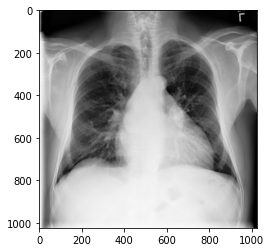

In [4]:
# verifikasi
d_nih_path_pa = NIH_Dataset_path(imgpath="/raid/COVID19/nih-dataset/images", views=["PA"])

print(len(d_nih_path_pa))

data = d_nih_path_pa[0]
data_image = data["img"]
data_label = data["lab"]
data_index = data["idx"]
data_path = data["image_path"]

print(data_label, data_index, data_path)


sample = data
plt.imshow(sample["img"][0], cmap="Greys_r");
dict(zip(d_nih_path_pa.pathologies,sample["lab"]))

In [6]:
! pwd

/workspace/update/torchxrayvision/scripts


In [21]:
! ls /workspace/update/torchxrayvision/torchxrayvision

Data_Entry_2017.csv.gz
NLMCXR_reports.tgz
PADCHEST_chest_x_ray_images_labels_160K_01.02.19.csv.gz
__init__.py
__pycache__
datasets.py
datasets_with_path.py
google2019_nih-chest-xray-labels.csv.gz
kaggle_stage_2_train_images_dicom_headers.csv.gz
kaggle_stage_2_train_labels.csv.zip
mimic-cxr-2.0.0-chexpert.csv.gz
mimic-cxr-2.0.0-metadata.csv.gz
mimic-cxr-2.0.0-negbio.csv.gz
mimic-cxr-2.0.0-split.csv.gz
models.py
nih_train_relabeled.csv
nih_valid_relabeled.csv
nlmcxr_dicom_metadata.csv.gz
nlmcxr_tsne_pa.csv.gz
scripts


In [ ]:
# read standard NIH labels 

In [10]:
import pandas as pd

In [128]:
label_stand_nih = pd.read_csv('/workspace/update/torchxrayvision/torchxrayvision/Data_Entry_2017.csv.gz')  

In [129]:
label_stand_nih

Image Index          Finding Labels  Follow-up #  Patient ID  \
0       00000001_000.png            Cardiomegaly            0           1   
1       00000001_001.png  Cardiomegaly|Emphysema            1           1   
2       00000001_002.png   Cardiomegaly|Effusion            2           1   
3       00000002_000.png              No Finding            0           2   
4       00000003_000.png                  Hernia            0           3   
...                  ...                     ...          ...         ...   
112115  00030801_001.png          Mass|Pneumonia            1       30801   
112116  00030802_000.png              No Finding            0       30802   
112117  00030803_000.png              No Finding            0       30803   
112118  00030804_000.png              No Finding            0       30804   
112119  00030805_000.png              No Finding            0       30805   

       Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0             058Y              M            PA                 2682     2749   
1             058Y              M            PA                 2894     2729   
2             058Y              M            PA                 2500     2048   
3             081Y              M            PA                 2500     2048   
4             081Y              F            PA                 2582     2991   
...            ...            ...           ...                  ...      ...   
112115        039Y              M            PA                 2048     2500   
112116        029Y              M            PA                 2048     2500   
112117        042Y              F            PA                 2048     2500   
112118        030Y              F            PA                 2048     2500   
112119        027Y              M            PA                 2048     2500   

        OriginalImagePixelSpacing[x     y]  Unnamed: 11  
0                             0.143  0.143          NaN  
1                             0.143  0.143          NaN  
2                             0.168  0.168          NaN  
3                             0.171  0.171          NaN  
4                             0.143  0.143          NaN  
...                             ...    ...          ...  
112115                        0.168  0.168          NaN  
112116                        0.168  0.168          NaN  
112117                        0.168  0.168          NaN  
112118                        0.168  0.168          NaN  
112119                        0.171  0.171          NaN  

[112120 rows x 12 columns]

In [132]:
label_stand_nih["Image Index"][112119]

'00030805_000.png'

In [16]:
image_index = label_stand_nih["Image Index"]
finding_labels = label_stand_nih["Finding Labels"]

In [19]:
image_index


0         00000001_000.png
1         00000001_001.png
2         00000001_002.png
3         00000002_000.png
4         00000003_000.png
                ...       
112115    00030801_001.png
112116    00030802_000.png
112117    00030803_000.png
112118    00030804_000.png
112119    00030805_000.png
Name: Image Index, Length: 112120, dtype: object

In [20]:
finding_labels

0                   Cardiomegaly
1         Cardiomegaly|Emphysema
2          Cardiomegaly|Effusion
3                     No Finding
4                         Hernia
                   ...          
112115            Mass|Pneumonia
112116                No Finding
112117                No Finding
112118                No Finding
112119                No Finding
Name: Finding Labels, Length: 112120, dtype: object

In [44]:
pathologies = [
"Atelectasis", "Consolidation", "Infiltration", "Pneumothorax",
"Edema", "Emphysema", "Fibrosis", "Effusion", "Pneumonia",
"Pleural_Thickening", "Cardiomegaly", "Nodule", "Mass", "Hernia"
]

In [ ]:
# processing relabelled NIH 

In [22]:
label_relabelled_nih = pd.read_csv('/workspace/update/torchxrayvision/torchxrayvision/nih_train_relabeled.csv')  

In [23]:
label_relabelled_nih

Path  Cardiomegaly  Emphysema  Effusion  Hernia  \
0      images/00000001_000.png             1          0         0       1   
1      images/00000001_001.png             1          1         0       1   
2      images/00000001_002.png             1          0         1       1   
3      images/00000002_000.png             0          1         0       1   
4      images/00000004_000.png             0          0         0       0   
...                        ...           ...        ...       ...     ...   
98632  images/00030800_000.png             0          0         0       0   
98633  images/00030802_000.png             0          0         0       0   
98634  images/00030803_000.png             0          0         0       0   
98635  images/00030804_000.png             0          0         0       0   
98636  images/00030805_000.png             0          0         0       0   

       Infiltration  Mass  Nodule  Atelectasis  Pneumothorax  \
0                 0     0       0            0             0   
1                 0     0       0            0             0   
2                 0     0       0            0             0   
3                 0     0       1            0             0   
4                 0     1       1            0             0   
...             ...   ...     ...          ...           ...   
98632             0     0       0            0             0   
98633             0     0       0            0             0   
98634             0     0       0            0             0   
98635             0     0       0            0             0   
98636             0     0       0            0             0   

       Pleural-Thickening  Pneumonia  Fibrosis  Edema  Consolidation  
0                       0          0         0      0              0  
1                       0          0         0      0              0  
2                       0          0         1      0              0  
3                       0          0         0      0              0  
4                       0          0         0      0              0  
...                   ...        ...       ...    ...            ...  
98632                   0          0         0      0              0  
98633                   0          0         0      0              0  
98634                   0          0         0      0              0  
98635                   0          0         0      0              0  
98636                   0          0         0      0              0  

[98637 rows x 15 columns]

In [24]:
label_relabelled_nih["Path"]

0        images/00000001_000.png
1        images/00000001_001.png
2        images/00000001_002.png
3        images/00000002_000.png
4        images/00000004_000.png
                  ...           
98632    images/00030800_000.png
98633    images/00030802_000.png
98634    images/00030803_000.png
98635    images/00030804_000.png
98636    images/00030805_000.png
Name: Path, Length: 98637, dtype: object

In [25]:
label_relabelled_nih["Cardiomegaly"]

0        1
1        1
2        1
3        0
4        0
        ..
98632    0
98633    0
98634    0
98635    0
98636    0
Name: Cardiomegaly, Length: 98637, dtype: int64

In [27]:
columns = label_relabelled_nih.columns
columns

Index(['Path', 'Cardiomegaly', 'Emphysema', 'Effusion', 'Hernia',
       'Infiltration', 'Mass', 'Nodule', 'Atelectasis', 'Pneumothorax',
       'Pleural-Thickening', 'Pneumonia', 'Fibrosis', 'Edema',
       'Consolidation'],
      dtype='object')

In [28]:
label_relabelled_nih_rename = label_relabelled_nih.rename(columns={'Pleural-Thickening': 'Pleural_Thickening'})

In [29]:
label_relabelled_nih_rename

Path  Cardiomegaly  Emphysema  Effusion  Hernia  \
0      images/00000001_000.png             1          0         0       1   
1      images/00000001_001.png             1          1         0       1   
2      images/00000001_002.png             1          0         1       1   
3      images/00000002_000.png             0          1         0       1   
4      images/00000004_000.png             0          0         0       0   
...                        ...           ...        ...       ...     ...   
98632  images/00030800_000.png             0          0         0       0   
98633  images/00030802_000.png             0          0         0       0   
98634  images/00030803_000.png             0          0         0       0   
98635  images/00030804_000.png             0          0         0       0   
98636  images/00030805_000.png             0          0         0       0   

       Infiltration  Mass  Nodule  Atelectasis  Pneumothorax  \
0                 0     0       0            0             0   
1                 0     0       0            0             0   
2                 0     0       0            0             0   
3                 0     0       1            0             0   
4                 0     1       1            0             0   
...             ...   ...     ...          ...           ...   
98632             0     0       0            0             0   
98633             0     0       0            0             0   
98634             0     0       0            0             0   
98635             0     0       0            0             0   
98636             0     0       0            0             0   

       Pleural_Thickening  Pneumonia  Fibrosis  Edema  Consolidation  
0                       0          0         0      0              0  
1                       0          0         0      0              0  
2                       0          0         1      0              0  
3                       0          0         0      0              0  
4                       0          0         0      0              0  
...                   ...        ...       ...    ...            ...  
98632                   0          0         0      0              0  
98633                   0          0         0      0              0  
98634                   0          0         0      0              0  
98635                   0          0         0      0              0  
98636                   0          0         0      0              0  

[98637 rows x 15 columns]

In [30]:
label_relabelled_nih_rename["Path"][0]

'images/00000001_000.png'

In [36]:
# remove string 
new_path = []
for i in range(0, 98637) :
    new_path.append(label_relabelled_nih_rename["Path"][i].lstrip('images/'))

In [37]:
new_path

['00000001_000.png',
 '00000001_001.png',
 '00000001_002.png',
 '00000002_000.png',
 '00000004_000.png',
 '00000005_000.png',
 '00000005_001.png',
 '00000005_002.png',
 '00000005_003.png',
 '00000005_004.png',
 '00000005_005.png',
 '00000005_006.png',
 '00000005_007.png',
 '00000006_000.png',
 '00000007_000.png',
 '00000009_000.png',
 '00000010_000.png',
 '00000011_000.png',
 '00000011_001.png',
 '00000011_002.png',
 '00000011_003.png',
 '00000011_004.png',
 '00000011_005.png',
 '00000011_006.png',
 '00000011_007.png',
 '00000011_008.png',
 '00000012_000.png',
 '00000013_000.png',
 '00000013_001.png',
 '00000013_002.png',
 '00000013_003.png',
 '00000013_004.png',
 '00000013_005.png',
 '00000013_006.png',
 '00000013_007.png',
 '00000013_008.png',
 '00000013_009.png',
 '00000013_010.png',
 '00000013_011.png',
 '00000013_012.png',
 '00000013_013.png',
 '00000013_014.png',
 '00000013_015.png',
 '00000013_016.png',
 '00000013_017.png',
 '00000013_018.png',
 '00000013_019.png',
 '00000013_02

In [38]:

for i in range(0, 98637) :
    label_relabelled_nih_rename["Path"].replace({ label_relabelled_nih_rename["Path"][i] : new_path[i]}, inplace=True)


In [39]:
label_relabelled_nih_rename

Path  Cardiomegaly  Emphysema  Effusion  Hernia  \
0      00000001_000.png             1          0         0       1   
1      00000001_001.png             1          1         0       1   
2      00000001_002.png             1          0         1       1   
3      00000002_000.png             0          1         0       1   
4      00000004_000.png             0          0         0       0   
...                 ...           ...        ...       ...     ...   
98632  00030800_000.png             0          0         0       0   
98633  00030802_000.png             0          0         0       0   
98634  00030803_000.png             0          0         0       0   
98635  00030804_000.png             0          0         0       0   
98636  00030805_000.png             0          0         0       0   

       Infiltration  Mass  Nodule  Atelectasis  Pneumothorax  \
0                 0     0       0            0             0   
1                 0     0       0            0             0   
2                 0     0       0            0             0   
3                 0     0       1            0             0   
4                 0     1       1            0             0   
...             ...   ...     ...          ...           ...   
98632             0     0       0            0             0   
98633             0     0       0            0             0   
98634             0     0       0            0             0   
98635             0     0       0            0             0   
98636             0     0       0            0             0   

       Pleural_Thickening  Pneumonia  Fibrosis  Edema  Consolidation  
0                       0          0         0      0              0  
1                       0          0         0      0              0  
2                       0          0         1      0              0  
3                       0          0         0      0              0  
4                       0          0         0      0              0  
...                   ...        ...       ...    ...            ...  
98632                   0          0         0      0              0  
98633                   0          0         0      0              0  
98634                   0          0         0      0              0  
98635                   0          0         0      0              0  
98636                   0          0         0      0              0  

[98637 rows x 15 columns]

In [42]:
label_relabelled_nih_rename["Path"][0]

'00000001_000.png'

In [56]:
finding_labels = []

for i in range(0, 98637) :
    label_name= ""
    for pathology in pathologies :
        
        if (label_relabelled_nih_rename[pathology][i]==1) :
            #print(pathology)
            label_name = label_name + "|" + pathology

    label_name=label_name[1:]
    #print(label_name)
    if (label_name == "") :
        label_name = "No Finding"
    finding_labels.append(label_name)
        
        

In [64]:
label_relabelled_nih_rename

Path  Cardiomegaly  Emphysema  Effusion  Hernia  \
0      00000001_000.png             1          0         0       1   
1      00000001_001.png             1          1         0       1   
2      00000001_002.png             1          0         1       1   
3      00000002_000.png             0          1         0       1   
4      00000004_000.png             0          0         0       0   
...                 ...           ...        ...       ...     ...   
98632  00030800_000.png             0          0         0       0   
98633  00030802_000.png             0          0         0       0   
98634  00030803_000.png             0          0         0       0   
98635  00030804_000.png             0          0         0       0   
98636  00030805_000.png             0          0         0       0   

       Infiltration  Mass  Nodule  Atelectasis  Pneumothorax  \
0                 0     0       0            0             0   
1                 0     0       0            0             0   
2                 0     0       0            0             0   
3                 0     0       1            0             0   
4                 0     1       1            0             0   
...             ...   ...     ...          ...           ...   
98632             0     0       0            0             0   
98633             0     0       0            0             0   
98634             0     0       0            0             0   
98635             0     0       0            0             0   
98636             0     0       0            0             0   

       Pleural_Thickening  Pneumonia  Fibrosis  Edema  Consolidation  
0                       0          0         0      0              0  
1                       0          0         0      0              0  
2                       0          0         1      0              0  
3                       0          0         0      0              0  
4                       0          0         0      0              0  
...                   ...        ...       ...    ...            ...  
98632                   0          0         0      0              0  
98633                   0          0         0      0              0  
98634                   0          0         0      0              0  
98635                   0          0         0      0              0  
98636                   0          0         0      0              0  

[98637 rows x 15 columns]

In [58]:
label_relabelled_nih_rename["Path"], finding_labels

(0        00000001_000.png
 1        00000001_001.png
 2        00000001_002.png
 3        00000002_000.png
 4        00000004_000.png
                ...       
 98632    00030800_000.png
 98633    00030802_000.png
 98634    00030803_000.png
 98635    00030804_000.png
 98636    00030805_000.png
 Name: Path, Length: 98637, dtype: object,
 ['Cardiomegaly|Hernia',
  'Emphysema|Cardiomegaly|Hernia',
  'Fibrosis|Effusion|Cardiomegaly|Hernia',
  'Emphysema|Nodule|Hernia',
  'Nodule|Mass',
  'No Finding',
  'No Finding',
  'No Finding',
  'No Finding',
  'No Finding',
  'No Finding',
  'Infiltration',
  'Infiltration|Effusion',
  'Emphysema|Fibrosis|Hernia',
  'Cardiomegaly|Hernia',
  'Atelectasis|Emphysema|Fibrosis|Hernia',
  'Infiltration|Fibrosis|Cardiomegaly|Hernia',
  'Effusion|Cardiomegaly|Hernia',
  'Fibrosis|Cardiomegaly|Hernia',
  'Fibrosis|Cardiomegaly|Hernia',
  'Fibrosis|Effusion|Cardiomegaly|Hernia',
  'Effusion',
  'Infiltration',
  'Atelectasis|Fibrosis|Hernia',
  'Atelectasis

In [117]:
len(label_relabelled_nih_rename["Path"][])

98637

In [69]:
view_position = []
patient_id = []

for image_index in new_data_relabelled_nih["Image Index"] :
    print(image_index)
    for nih_image_index in label_stand_nih["Image Index"] :
        if image_index == nih_image_index :
            
            print(label_stand_nih["View Position"])
            #view_position.append(label_stand_nih["View Position"])
            #patient_id.append(label_stand_nih["Patient ID"])

00000001_000.png
00000001_001.png
00000001_002.png
00000002_000.png
00000004_000.png
00000005_000.png
00000005_001.png
00000005_002.png
00000005_003.png
00000005_004.png
00000005_005.png
00000005_006.png
00000005_007.png
00000006_000.png
00000007_000.png
00000009_000.png
00000010_000.png
00000011_000.png
00000011_001.png
00000011_002.png
00000011_003.png
00000011_004.png
00000011_005.png
00000011_006.png
00000011_007.png
00000011_008.png
00000012_000.png
00000013_000.png
00000013_001.png
00000013_002.png
00000013_003.png
00000013_004.png
00000013_005.png
00000013_006.png
00000013_007.png
00000013_008.png
00000013_009.png
00000013_010.png
00000013_011.png
00000013_012.png
00000013_013.png
00000013_014.png
00000013_015.png
00000013_016.png
00000013_017.png
00000013_018.png
00000013_019.png
00000013_020.png
00000013_021.png
00000013_022.png
00000013_023.png
00000013_024.png
00000013_025.png
00000013_026.png
00000013_027.png
00000013_028.png
00000013_029.png
00000013_030.png
00000013_031.p

00000149_002.png
00000149_003.png
00000149_004.png
00000149_005.png
00000149_006.png
00000149_007.png
00000149_008.png
00000149_009.png
00000150_000.png
00000150_001.png
00000150_002.png
00000150_003.png
00000150_004.png
00000150_005.png
00000151_000.png
00000151_001.png
00000151_002.png
00000152_000.png
00000153_000.png
00000153_001.png
00000154_000.png
00000154_001.png
00000155_000.png
00000155_001.png
00000156_000.png
00000156_001.png
00000157_000.png
00000158_000.png
00000159_000.png
00000160_000.png
00000161_000.png
00000162_000.png
00000163_000.png
00000163_001.png
00000164_000.png
00000165_000.png
00000165_001.png
00000165_002.png
00000165_003.png
00000165_004.png
00000165_005.png
00000165_006.png
00000165_007.png
00000165_008.png
00000166_000.png
00000167_000.png
00000167_001.png
00000168_000.png
00000168_001.png
00000169_000.png
00000169_001.png
00000170_000.png
00000171_000.png
00000172_000.png
00000172_001.png
00000172_002.png
00000172_003.png
00000172_004.png
00000172_005.p

00000273_007.png
00000273_008.png
00000273_009.png
00000274_000.png
00000274_001.png
00000275_000.png
00000275_001.png
00000275_002.png
00000275_003.png
00000275_004.png
00000276_000.png
00000277_000.png
00000277_001.png
00000277_002.png
00000278_000.png
00000278_001.png
00000278_002.png
00000278_003.png
00000278_004.png
00000278_005.png
00000278_006.png
00000278_007.png
00000278_008.png
00000278_009.png
00000278_010.png
00000279_000.png
00000281_000.png
00000281_001.png
00000281_002.png
00000282_000.png
00000282_001.png
00000283_000.png
00000285_000.png
00000285_001.png
00000285_002.png
00000285_003.png
00000285_004.png
00000285_005.png
00000285_006.png
00000285_007.png
00000286_000.png
00000288_000.png
00000288_001.png
00000288_002.png
00000288_003.png
00000288_004.png
00000289_000.png
00000289_001.png
00000289_002.png
00000289_003.png
00000289_004.png
00000289_005.png
00000289_006.png
00000289_007.png
00000289_008.png
00000290_000.png
00000290_001.png
00000290_002.png
00000290_003.p

00000444_003.png
00000445_000.png
00000446_000.png
00000446_001.png
00000447_000.png
00000447_001.png
00000447_002.png
00000447_003.png
00000447_004.png
00000447_005.png
00000448_000.png
00000448_001.png
00000449_000.png
00000449_001.png
00000449_002.png
00000449_003.png
00000450_000.png
00000450_001.png
00000450_002.png
00000450_003.png
00000450_004.png
00000450_005.png
00000450_006.png
00000450_007.png
00000450_008.png
00000451_000.png
00000452_000.png
00000453_000.png
00000454_000.png
00000455_000.png
00000458_000.png
00000458_001.png
00000458_002.png
00000459_000.png
00000459_001.png
00000459_002.png
00000459_003.png
00000459_004.png
00000459_005.png
00000459_006.png
00000459_007.png
00000459_008.png
00000459_009.png
00000459_010.png
00000459_011.png
00000459_012.png
00000459_013.png
00000459_014.png
00000459_015.png
00000459_016.png
00000459_017.png
00000459_018.png
00000459_019.png
00000459_020.png
00000459_021.png
00000459_022.png
00000459_023.png
00000459_024.png
00000459_025.p

00000589_000.png
00000590_000.png
00000591_000.png
00000591_001.png
00000591_002.png
00000591_003.png
00000591_004.png
00000591_005.png
00000591_006.png
00000591_007.png
00000591_008.png
00000591_009.png
00000591_010.png
00000591_011.png
00000591_012.png
00000591_013.png
00000591_014.png
00000591_015.png
00000591_016.png
00000591_017.png
00000591_018.png
00000591_019.png
00000593_000.png
00000594_000.png
00000595_000.png
00000596_000.png
00000597_000.png
00000597_001.png
00000597_002.png
00000598_000.png
00000599_000.png
00000600_000.png
00000601_000.png
00000602_000.png
00000603_000.png
00000604_000.png
00000605_000.png
00000606_000.png
00000607_000.png
00000608_000.png
00000608_001.png
00000608_002.png
00000608_003.png
00000609_000.png
00000609_001.png
00000610_000.png
00000610_001.png
00000611_000.png
00000612_000.png
00000613_000.png
00000613_001.png
00000613_002.png
00000613_003.png
00000613_004.png
00000614_000.png
00000615_000.png
00000616_000.png
00000617_000.png
00000618_000.p

00000744_005.png
00000744_006.png
00000744_007.png
00000744_008.png
00000744_009.png
00000744_010.png
00000744_011.png
00000744_012.png
00000744_013.png
00000745_000.png
00000745_001.png
00000745_002.png
00000746_000.png
00000747_000.png
00000747_001.png
00000749_000.png
00000750_000.png
00000752_000.png
00000752_001.png
00000754_000.png
00000754_001.png
00000754_002.png
00000754_003.png
00000754_004.png
00000754_005.png
00000754_006.png
00000755_000.png
00000756_000.png
00000756_001.png
00000756_002.png
00000756_003.png
00000756_004.png
00000756_005.png
00000758_000.png
00000758_001.png
00000758_002.png
00000758_003.png
00000759_000.png
00000760_000.png
00000761_000.png
00000761_001.png
00000761_002.png
00000761_003.png
00000761_004.png
00000761_005.png
00000761_006.png
00000761_007.png
00000761_008.png
00000761_009.png
00000761_010.png
00000761_011.png
00000763_000.png
00000764_000.png
00000764_001.png
00000764_002.png
00000764_003.png
00000765_000.png
00000765_001.png
00000765_002.p

00000877_002.png
00000877_003.png
00000877_004.png
00000877_005.png
00000877_006.png
00000877_007.png
00000877_008.png
00000877_009.png
00000877_010.png
00000877_011.png
00000877_012.png
00000877_013.png
00000877_014.png
00000877_015.png
00000877_016.png
00000877_017.png
00000877_018.png
00000877_019.png
00000877_020.png
00000877_021.png
00000877_022.png
00000877_023.png
00000877_024.png
00000877_025.png
00000877_026.png
00000877_027.png
00000877_028.png
00000877_029.png
00000877_030.png
00000877_031.png
00000877_032.png
00000877_033.png
00000877_034.png
00000877_035.png
00000877_036.png
00000877_037.png
00000878_000.png
00000879_000.png
00000880_000.png
00000881_000.png
00000881_001.png
00000882_000.png
00000882_001.png
00000882_002.png
00000882_003.png
00000882_004.png
00000882_005.png
00000882_006.png
00000882_007.png
00000883_000.png
00000884_000.png
00000885_000.png
00000885_001.png
00000886_000.png
00000887_000.png
00000887_001.png
00000887_002.png
00000887_003.png
00000888_000.p

00001040_002.png
00001042_000.png
00001043_000.png
00001043_001.png
00001043_002.png
00001043_003.png
00001043_004.png
00001043_005.png
00001043_006.png
00001043_007.png
00001044_000.png
00001045_000.png
00001045_001.png
00001045_002.png
00001045_003.png
00001045_004.png
00001046_000.png
00001047_000.png
00001047_001.png
00001047_002.png
00001047_003.png
00001048_000.png
00001048_001.png
00001048_002.png
00001049_000.png
00001050_000.png
00001051_000.png
00001052_000.png
00001052_001.png
00001052_002.png
00001052_003.png
00001052_004.png
00001053_000.png
00001054_000.png
00001054_001.png
00001054_002.png
00001054_003.png
00001054_004.png
00001055_000.png
00001055_001.png
00001055_002.png
00001055_003.png
00001055_004.png
00001055_005.png
00001055_006.png
00001055_007.png
00001056_000.png
00001057_000.png
00001057_001.png
00001058_000.png
00001059_000.png
00001059_001.png
00001059_002.png
00001059_003.png
00001059_004.png
00001059_005.png
00001059_006.png
00001059_007.png
00001059_008.p

00001199_007.png
00001199_008.png
00001200_000.png
00001200_001.png
00001200_002.png
00001200_003.png
00001200_004.png
00001200_005.png
00001200_006.png
00001200_007.png
00001200_008.png
00001200_009.png
00001200_010.png
00001200_011.png
00001200_012.png
00001200_013.png
00001200_014.png
00001200_015.png
00001200_016.png
00001200_017.png
00001200_018.png
00001200_019.png
00001200_020.png
00001200_021.png
00001200_022.png
00001200_023.png
00001201_000.png
00001202_000.png
00001202_001.png
00001202_002.png
00001202_003.png
00001202_004.png
00001202_005.png
00001203_000.png
00001203_001.png
00001203_002.png
00001203_003.png
00001203_004.png
00001203_005.png
00001203_006.png
00001203_007.png
00001203_008.png
00001203_009.png
00001203_010.png
00001203_011.png
00001203_012.png
00001203_013.png
00001203_014.png
00001203_015.png
00001203_016.png
00001203_017.png
00001203_018.png
00001204_000.png
00001204_001.png
00001205_000.png
00001205_001.png
00001205_002.png
00001205_003.png
00001205_004.p

00001324_000.png
00001325_000.png
00001326_000.png
00001326_001.png
00001326_002.png
00001326_003.png
00001326_004.png
00001326_005.png
00001326_006.png
00001327_000.png
00001327_001.png
00001327_002.png
00001327_003.png
00001327_004.png
00001327_005.png
00001328_000.png
00001329_000.png
00001330_000.png
00001330_001.png
00001330_002.png
00001330_003.png
00001330_004.png
00001331_000.png
00001332_000.png
00001332_001.png
00001332_002.png
00001332_003.png
00001333_000.png
00001333_001.png
00001334_000.png
00001334_001.png
00001334_002.png
00001334_003.png
00001335_000.png
00001335_001.png
00001335_002.png
00001335_003.png
00001335_004.png
00001335_005.png
00001335_006.png
00001336_000.png
00001337_000.png
00001338_000.png
00001338_001.png
00001338_002.png
00001338_003.png
00001339_000.png
00001340_000.png
00001341_000.png
00001342_000.png
00001342_001.png
00001343_000.png
00001344_000.png
00001345_000.png
00001346_000.png
00001347_000.png
00001347_001.png
00001347_002.png
00001348_000.p

00001483_008.png
00001483_009.png
00001483_010.png
00001483_011.png
00001483_012.png
00001483_013.png
00001483_014.png
00001483_015.png
00001483_016.png
00001483_017.png
00001483_018.png
00001483_019.png
00001483_020.png
00001483_021.png
00001483_022.png
00001483_023.png
00001484_000.png
00001484_001.png
00001484_002.png
00001484_003.png
00001485_000.png
00001485_001.png
00001485_002.png
00001485_003.png
00001485_004.png
00001485_005.png
00001486_000.png
00001487_000.png
00001488_000.png
00001489_000.png
00001490_000.png
00001491_000.png
00001491_001.png
00001492_000.png
00001492_001.png
00001492_002.png
00001492_003.png
00001492_004.png
00001493_000.png
00001493_001.png
00001494_000.png
00001495_000.png
00001495_001.png
00001495_002.png
00001496_000.png
00001496_001.png
00001496_002.png
00001496_003.png
00001497_000.png
00001498_000.png
00001498_001.png
00001499_000.png
00001500_000.png
00001500_001.png
00001500_002.png
00001501_000.png
00001501_001.png
00001501_002.png
00001501_003.p

00001629_005.png
00001629_006.png
00001629_007.png
00001629_008.png
00001629_009.png
00001629_010.png
00001629_011.png
00001629_012.png
00001629_013.png
00001630_000.png
00001630_001.png
00001631_000.png
00001632_000.png
00001634_000.png
00001634_001.png
00001634_002.png
00001634_003.png
00001634_004.png
00001634_005.png
00001634_006.png
00001634_007.png
00001634_008.png
00001634_009.png
00001634_010.png
00001635_000.png
00001635_001.png
00001636_000.png
00001637_000.png
00001637_001.png
00001637_002.png
00001637_003.png
00001637_004.png
00001637_005.png
00001637_006.png
00001637_007.png
00001637_008.png
00001637_009.png
00001637_010.png
00001637_011.png
00001637_012.png
00001638_000.png
00001638_001.png
00001638_002.png
00001640_000.png
00001641_000.png
00001641_001.png
00001641_002.png
00001641_003.png
00001641_004.png
00001641_005.png
00001641_006.png
00001642_000.png
00001643_000.png
00001643_001.png
00001643_002.png
00001643_003.png
00001644_000.png
00001645_000.png
00001646_000.p

00001777_002.png
00001777_003.png
00001777_004.png
00001778_000.png
00001779_000.png
00001780_000.png
00001781_000.png
00001781_001.png
00001781_002.png
00001782_000.png
00001783_000.png
00001783_001.png
00001784_000.png
00001784_001.png
00001785_000.png
00001786_000.png
00001787_000.png
00001787_001.png
00001787_002.png
00001787_003.png
00001787_004.png
00001787_005.png
00001787_006.png
00001787_007.png
00001787_008.png
00001787_009.png
00001787_010.png
00001787_011.png
00001787_012.png
00001787_013.png
00001787_014.png
00001787_015.png
00001788_000.png
00001788_001.png
00001788_002.png
00001788_003.png
00001788_004.png
00001788_005.png
00001788_006.png
00001788_007.png
00001788_008.png
00001789_000.png
00001790_000.png
00001790_001.png
00001791_000.png
00001792_000.png
00001792_001.png
00001792_002.png
00001792_003.png
00001793_000.png
00001794_000.png
00001795_000.png
00001796_000.png
00001796_001.png
00001796_002.png
00001796_003.png
00001796_004.png
00001796_005.png
00001796_006.p

00001900_011.png
00001900_012.png
00001900_013.png
00001900_014.png
00001900_015.png
00001900_016.png
00001900_017.png
00001900_018.png
00001900_019.png
00001900_020.png
00001900_021.png
00001900_022.png
00001900_023.png
00001900_024.png
00001900_025.png
00001900_026.png
00001900_027.png
00001900_028.png
00001900_029.png
00001900_030.png
00001900_031.png
00001900_032.png
00001900_033.png
00001900_034.png
00001900_035.png
00001900_036.png
00001900_037.png
00001900_038.png
00001901_000.png
00001901_001.png
00001901_002.png
00001901_003.png
00001901_004.png
00001901_005.png
00001901_006.png
00001901_007.png
00001902_000.png
00001903_000.png
00001904_000.png
00001905_000.png
00001906_000.png
00001906_001.png
00001906_002.png
00001906_003.png
00001906_004.png
00001906_005.png
00001906_006.png
00001906_007.png
00001906_008.png
00001907_000.png
00001907_001.png
00001908_000.png
00001909_000.png
00001910_000.png
00001912_000.png
00001912_001.png
00001912_002.png
00001912_003.png
00001912_004.p

00002013_000.png
00002013_001.png
00002013_002.png
00002013_003.png
00002014_000.png
00002014_001.png
00002014_002.png
00002014_003.png
00002015_000.png
00002015_001.png
00002015_002.png
00002015_003.png
00002015_004.png
00002015_005.png
00002015_006.png
00002015_007.png
00002015_008.png
00002016_000.png
00002016_001.png
00002016_002.png
00002016_003.png
00002016_004.png
00002017_000.png
00002017_001.png
00002018_000.png
00002019_000.png
00002019_001.png
00002020_000.png
00002021_000.png
00002021_001.png
00002022_000.png
00002022_001.png
00002022_002.png
00002022_003.png
00002022_004.png
00002022_005.png
00002023_000.png
00002023_001.png
00002023_002.png
00002024_000.png
00002024_001.png
00002024_002.png
00002024_003.png
00002024_004.png
00002025_000.png
00002026_000.png
00002027_000.png
00002028_000.png
00002029_000.png
00002030_000.png
00002031_000.png
00002032_000.png
00002032_001.png
00002032_002.png
00002032_003.png
00002032_004.png
00002032_005.png
00002032_006.png
00002032_007.p

00002146_001.png
00002146_002.png
00002146_003.png
00002146_004.png
00002146_005.png
00002146_006.png
00002146_007.png
00002147_000.png
00002148_000.png
00002149_000.png
00002150_000.png
00002151_000.png
00002152_000.png
00002152_001.png
00002152_002.png
00002152_003.png
00002152_004.png
00002152_005.png
00002152_006.png
00002152_007.png
00002152_008.png
00002152_009.png
00002153_000.png
00002154_000.png
00002155_000.png
00002156_000.png
00002156_001.png
00002156_002.png
00002156_003.png
00002156_004.png
00002157_000.png
00002158_000.png
00002159_000.png
00002160_000.png
00002160_001.png
00002162_000.png
00002163_000.png
00002163_001.png
00002164_000.png
00002165_000.png
00002165_001.png
00002165_002.png
00002165_003.png
00002166_000.png
00002167_000.png
00002167_001.png
00002168_000.png
00002168_001.png
00002169_000.png
00002170_000.png
00002171_000.png
00002176_000.png
00002176_001.png
00002176_002.png
00002176_003.png
00002176_004.png
00002176_005.png
00002176_006.png
00002176_007.p

00002299_008.png
00002299_009.png
00002299_010.png
00002301_000.png
00002302_000.png
00002302_001.png
00002303_000.png
00002304_000.png
00002305_000.png
00002306_000.png
00002307_000.png
00002308_000.png
00002309_000.png
00002309_001.png
00002311_000.png
00002311_001.png
00002311_002.png
00002312_000.png
00002312_001.png
00002312_002.png
00002312_003.png
00002312_004.png
00002312_005.png
00002312_006.png
00002312_007.png
00002313_000.png
00002316_000.png
00002316_001.png
00002316_002.png
00002316_003.png
00002316_004.png
00002316_005.png
00002316_006.png
00002316_007.png
00002316_008.png
00002316_009.png
00002316_010.png
00002316_011.png
00002317_000.png
00002318_000.png
00002319_000.png
00002319_001.png
00002320_000.png
00002320_001.png
00002320_002.png
00002320_003.png
00002320_004.png
00002320_005.png
00002320_006.png
00002321_000.png
00002322_000.png
00002323_000.png
00002323_001.png
00002323_002.png
00002324_000.png
00002325_000.png
00002326_000.png
00002326_001.png
00002327_000.p

00002416_000.png
00002418_000.png
00002419_000.png
00002419_001.png
00002419_002.png
00002419_003.png
00002419_004.png
00002419_005.png
00002420_000.png
00002420_001.png
00002420_002.png
00002420_003.png
00002421_000.png
00002422_000.png
00002423_000.png
00002423_001.png
00002423_002.png
00002423_003.png
00002423_004.png
00002423_005.png
00002423_006.png
00002424_000.png
00002424_001.png
00002424_002.png
00002424_003.png
00002424_004.png
00002424_005.png
00002424_006.png
00002424_007.png
00002424_008.png
00002424_009.png
00002424_010.png
00002424_011.png
00002424_012.png
00002424_013.png
00002425_000.png
00002425_001.png
00002425_002.png
00002425_003.png
00002425_004.png
00002425_005.png
00002425_006.png
00002425_007.png
00002425_008.png
00002425_009.png
00002425_010.png
00002426_000.png
00002427_000.png
00002428_000.png
00002428_001.png
00002428_002.png
00002429_000.png
00002430_000.png
00002431_000.png
00002432_000.png
00002432_001.png
00002433_000.png
00002434_000.png
00002434_001.p

00002533_003.png
00002533_004.png
00002533_005.png
00002533_006.png
00002533_007.png
00002533_008.png
00002534_000.png
00002534_001.png
00002534_002.png
00002534_003.png
00002535_000.png
00002536_000.png
00002537_000.png
00002537_001.png
00002537_002.png
00002537_003.png
00002538_000.png
00002539_000.png
00002539_001.png
00002540_000.png
00002540_001.png
00002540_002.png
00002541_000.png
00002543_000.png
00002544_000.png
00002544_001.png
00002544_002.png
00002544_003.png
00002544_004.png
00002544_005.png
00002545_000.png
00002545_001.png
00002546_000.png
00002547_000.png
00002547_001.png
00002547_002.png
00002547_003.png
00002547_004.png
00002547_005.png
00002547_006.png
00002547_007.png
00002547_008.png
00002547_009.png
00002547_010.png
00002547_011.png
00002547_012.png
00002547_013.png
00002547_014.png
00002548_000.png
00002548_001.png
00002548_002.png
00002548_003.png
00002549_000.png
00002549_001.png
00002549_002.png
00002549_003.png
00002549_004.png
00002549_005.png
00002550_000.p

00002673_018.png
00002673_019.png
00002673_020.png
00002673_021.png
00002673_022.png
00002674_000.png
00002675_000.png
00002675_001.png
00002675_002.png
00002675_003.png
00002675_004.png
00002675_005.png
00002675_006.png
00002675_007.png
00002675_008.png
00002675_009.png
00002676_000.png
00002677_000.png
00002677_001.png
00002678_000.png
00002678_001.png
00002678_002.png
00002678_003.png
00002678_004.png
00002678_005.png
00002678_006.png
00002678_007.png
00002679_000.png
00002680_000.png
00002680_001.png
00002680_002.png
00002681_000.png
00002681_001.png
00002681_002.png
00002682_000.png
00002682_001.png
00002682_002.png
00002683_000.png
00002685_000.png
00002685_001.png
00002685_002.png
00002685_003.png
00002686_000.png
00002686_001.png
00002686_002.png
00002687_000.png
00002688_000.png
00002688_001.png
00002688_002.png
00002688_003.png
00002688_004.png
00002688_005.png
00002688_006.png
00002688_007.png
00002689_000.png
00002689_001.png
00002690_000.png
00002690_001.png
00002690_002.p

00002825_010.png
00002825_011.png
00002825_012.png
00002825_013.png
00002826_000.png
00002827_000.png
00002827_001.png
00002827_002.png
00002828_000.png
00002829_000.png
00002830_000.png
00002831_000.png
00002832_000.png
00002833_000.png
00002834_000.png
00002834_001.png
00002834_002.png
00002834_003.png
00002834_004.png
00002834_005.png
00002835_000.png
00002835_001.png
00002835_002.png
00002835_003.png
00002836_000.png
00002837_000.png
00002838_000.png
00002839_000.png
00002839_001.png
00002839_002.png
00002839_003.png
00002839_004.png
00002839_005.png
00002839_006.png
00002840_000.png
00002840_001.png
00002840_002.png
00002840_003.png
00002840_004.png
00002841_000.png
00002841_001.png
00002841_002.png
00002842_000.png
00002842_001.png
00002842_002.png
00002842_003.png
00002842_004.png
00002842_005.png
00002842_006.png
00002842_007.png
00002842_008.png
00002843_000.png
00002843_001.png
00002843_002.png
00002843_003.png
00002843_004.png
00002843_005.png
00002843_006.png
00002843_007.p

00003005_010.png
00003005_011.png
00003005_012.png
00003005_013.png
00003005_014.png
00003005_015.png
00003005_016.png
00003005_017.png
00003005_018.png
00003005_019.png
00003005_020.png
00003005_021.png
00003005_022.png
00003006_000.png
00003006_001.png
00003006_002.png
00003006_003.png
00003006_004.png
00003006_005.png
00003007_000.png
00003008_000.png
00003009_000.png
00003009_001.png
00003009_002.png
00003009_003.png
00003009_004.png
00003010_000.png
00003011_000.png
00003011_001.png
00003011_002.png
00003011_003.png
00003011_004.png
00003012_000.png
00003012_001.png
00003012_002.png
00003013_000.png
00003013_001.png
00003013_002.png
00003013_003.png
00003013_004.png
00003013_005.png
00003013_006.png
00003013_007.png
00003013_008.png
00003013_009.png
00003013_010.png
00003013_011.png
00003013_012.png
00003013_013.png
00003013_014.png
00003013_015.png
00003015_000.png
00003016_000.png
00003017_000.png
00003018_000.png
00003018_001.png
00003019_000.png
00003020_000.png
00003022_000.p

00003140_001.png
00003140_002.png
00003140_003.png
00003140_004.png
00003140_005.png
00003140_006.png
00003140_007.png
00003140_008.png
00003140_009.png
00003140_010.png
00003140_011.png
00003140_012.png
00003140_013.png
00003140_014.png
00003140_015.png
00003140_016.png
00003140_017.png
00003140_018.png
00003140_019.png
00003142_000.png
00003143_000.png
00003144_000.png
00003145_000.png
00003146_000.png
00003147_000.png
00003148_000.png
00003148_001.png
00003148_002.png
00003148_003.png
00003148_004.png
00003148_005.png
00003148_006.png
00003148_007.png
00003148_008.png
00003148_009.png
00003148_010.png
00003148_011.png
00003148_012.png
00003148_013.png
00003149_000.png
00003149_001.png
00003149_002.png
00003149_003.png
00003149_004.png
00003149_005.png
00003149_006.png
00003149_007.png
00003149_008.png
00003150_000.png
00003150_001.png
00003151_000.png
00003152_000.png
00003152_001.png
00003152_002.png
00003152_003.png
00003154_000.png
00003154_001.png
00003155_000.png
00003155_001.p

00003277_000.png
00003278_000.png
00003279_000.png
00003279_001.png
00003279_002.png
00003280_000.png
00003281_000.png
00003281_001.png
00003281_002.png
00003282_000.png
00003282_001.png
00003283_000.png
00003284_000.png
00003285_000.png
00003285_001.png
00003285_002.png
00003286_000.png
00003287_000.png
00003288_000.png
00003288_001.png
00003288_002.png
00003288_003.png
00003289_000.png
00003289_001.png
00003289_002.png
00003289_003.png
00003289_004.png
00003290_000.png
00003292_000.png
00003292_001.png
00003292_002.png
00003292_003.png
00003292_004.png
00003292_005.png
00003292_006.png
00003292_007.png
00003292_008.png
00003292_009.png
00003292_010.png
00003292_011.png
00003292_012.png
00003292_013.png
00003293_000.png
00003294_000.png
00003295_000.png
00003295_001.png
00003295_002.png
00003295_003.png
00003295_004.png
00003295_005.png
00003296_000.png
00003296_001.png
00003296_002.png
00003297_000.png
00003298_000.png
00003298_001.png
00003299_000.png
00003299_001.png
00003300_000.p

00003398_000.png
00003399_000.png
00003400_000.png
00003400_001.png
00003400_002.png
00003400_003.png
00003400_004.png
00003400_005.png
00003400_006.png
00003401_000.png
00003402_000.png
00003403_000.png
00003403_001.png
00003404_000.png
00003405_000.png
00003405_001.png
00003405_002.png
00003405_003.png
00003405_004.png
00003406_000.png
00003406_001.png
00003406_002.png
00003406_003.png
00003406_004.png
00003406_005.png
00003406_006.png
00003407_000.png
00003407_001.png
00003407_002.png
00003407_003.png
00003407_004.png
00003407_005.png
00003407_006.png
00003407_007.png
00003408_000.png
00003408_001.png
00003408_002.png
00003409_000.png
00003410_000.png
00003411_000.png
00003412_000.png
00003413_000.png
00003413_001.png
00003414_000.png
00003415_000.png
00003416_000.png
00003417_000.png
00003418_000.png
00003418_001.png
00003419_000.png
00003419_001.png
00003420_000.png
00003420_001.png
00003421_000.png
00003421_001.png
00003421_002.png
00003421_003.png
00003421_004.png
00003421_005.p

00003528_006.png
00003528_007.png
00003528_008.png
00003528_009.png
00003528_010.png
00003528_011.png
00003528_012.png
00003528_013.png
00003528_014.png
00003528_015.png
00003528_016.png
00003528_017.png
00003528_018.png
00003528_019.png
00003528_020.png
00003528_021.png
00003528_022.png
00003528_023.png
00003528_024.png
00003528_025.png
00003528_026.png
00003528_027.png
00003528_028.png
00003528_029.png
00003528_030.png
00003528_031.png
00003528_032.png
00003528_033.png
00003528_034.png
00003528_035.png
00003528_036.png
00003528_037.png
00003528_038.png
00003528_039.png
00003528_040.png
00003528_041.png
00003528_042.png
00003528_043.png
00003528_044.png
00003528_045.png
00003528_046.png
00003528_047.png
00003528_048.png
00003528_049.png
00003528_050.png
00003528_051.png
00003528_052.png
00003528_053.png
00003528_054.png
00003528_055.png
00003528_056.png
00003528_057.png
00003528_058.png
00003528_059.png
00003528_060.png
00003528_061.png
00003528_062.png
00003528_063.png
00003528_064.p

00003665_001.png
00003665_002.png
00003665_003.png
00003665_004.png
00003665_005.png
00003665_006.png
00003665_007.png
00003665_008.png
00003665_009.png
00003665_010.png
00003665_011.png
00003666_000.png
00003666_001.png
00003667_000.png
00003668_000.png
00003669_000.png
00003669_001.png
00003669_002.png
00003669_003.png
00003669_004.png
00003669_005.png
00003669_006.png
00003669_007.png
00003669_008.png
00003670_000.png
00003670_001.png
00003670_002.png
00003670_003.png
00003670_004.png
00003670_005.png
00003671_000.png
00003672_000.png
00003672_001.png
00003672_002.png
00003673_000.png
00003674_000.png
00003675_000.png
00003675_001.png
00003675_002.png
00003676_000.png
00003677_000.png
00003678_000.png
00003678_001.png
00003679_000.png
00003679_001.png
00003680_000.png
00003680_001.png
00003681_000.png
00003681_001.png
00003681_002.png
00003681_003.png
00003681_004.png
00003681_005.png
00003682_000.png
00003683_000.png
00003683_001.png
00003683_002.png
00003683_003.png
00003683_004.p

00003841_007.png
00003841_008.png
00003841_009.png
00003841_010.png
00003841_011.png
00003841_012.png
00003841_013.png
00003841_014.png
00003841_015.png
00003842_000.png
00003843_000.png
00003844_000.png
00003845_000.png
00003846_000.png
00003846_001.png
00003847_000.png
00003847_001.png
00003847_002.png
00003847_003.png
00003847_004.png
00003847_005.png
00003847_006.png
00003847_007.png
00003847_008.png
00003847_009.png
00003847_010.png
00003847_011.png
00003847_012.png
00003848_000.png
00003849_000.png
00003849_001.png
00003850_000.png
00003851_000.png
00003851_001.png
00003851_002.png
00003851_003.png
00003851_004.png
00003851_005.png
00003851_006.png
00003852_000.png
00003853_000.png
00003854_000.png
00003855_000.png
00003855_001.png
00003856_000.png
00003856_001.png
00003856_002.png
00003856_003.png
00003857_000.png
00003857_001.png
00003857_002.png
00003858_000.png
00003859_000.png
00003859_001.png
00003860_000.png
00003861_000.png
00003861_001.png
00003861_002.png
00003862_000.p

00004006_000.png
00004006_001.png
00004006_002.png
00004006_003.png
00004006_004.png
00004006_005.png
00004006_006.png
00004006_007.png
00004006_008.png
00004006_009.png
00004006_010.png
00004006_011.png
00004006_012.png
00004006_013.png
00004006_014.png
00004006_015.png
00004006_016.png
00004006_017.png
00004006_018.png
00004006_019.png
00004006_020.png
00004006_021.png
00004006_022.png
00004006_023.png
00004006_024.png
00004006_025.png
00004006_026.png
00004006_027.png
00004006_028.png
00004006_029.png
00004006_030.png
00004006_031.png
00004006_032.png
00004006_033.png
00004006_034.png
00004006_035.png
00004006_036.png
00004006_037.png
00004006_038.png
00004006_039.png
00004006_040.png
00004006_041.png
00004006_042.png
00004006_043.png
00004006_044.png
00004006_045.png
00004006_046.png
00004006_047.png
00004006_048.png
00004006_049.png
00004006_050.png
00004006_051.png
00004006_052.png
00004006_053.png
00004006_054.png
00004006_055.png
00004006_056.png
00004006_057.png
00004006_058.p

00004169_007.png
00004170_000.png
00004170_001.png
00004170_002.png
00004170_003.png
00004170_004.png
00004171_000.png
00004171_001.png
00004173_000.png
00004174_000.png
00004174_001.png
00004175_000.png
00004176_000.png
00004176_001.png
00004176_002.png
00004178_000.png
00004178_001.png
00004179_000.png
00004180_000.png
00004180_001.png
00004180_002.png
00004180_003.png
00004180_004.png
00004180_005.png
00004181_000.png
00004182_000.png
00004183_000.png
00004184_000.png
00004184_001.png
00004185_000.png
00004185_001.png
00004186_000.png
00004186_001.png
00004186_002.png
00004186_003.png
00004186_004.png
00004186_005.png
00004186_006.png
00004186_007.png
00004187_000.png
00004187_001.png
00004187_002.png
00004188_000.png
00004188_001.png
00004188_002.png
00004188_003.png
00004188_004.png
00004188_005.png
00004188_006.png
00004188_007.png
00004188_008.png
00004188_009.png
00004188_010.png
00004188_011.png
00004188_012.png
00004188_013.png
00004188_014.png
00004188_015.png
00004189_000.p

00004344_041.png
00004344_042.png
00004344_043.png
00004344_044.png
00004344_045.png
00004344_046.png
00004344_047.png
00004344_048.png
00004344_049.png
00004344_050.png
00004344_051.png
00004345_000.png
00004346_000.png
00004347_000.png
00004348_000.png
00004349_000.png
00004350_000.png
00004351_000.png
00004351_001.png
00004351_002.png
00004351_003.png
00004352_000.png
00004353_000.png
00004354_000.png
00004356_000.png
00004357_000.png
00004358_000.png
00004358_001.png
00004358_002.png
00004358_003.png
00004358_004.png
00004358_005.png
00004359_000.png
00004360_000.png
00004360_001.png
00004360_002.png
00004360_003.png
00004360_004.png
00004360_005.png
00004360_006.png
00004360_007.png
00004360_008.png
00004360_009.png
00004360_010.png
00004360_011.png
00004360_012.png
00004360_013.png
00004360_014.png
00004360_015.png
00004360_016.png
00004360_017.png
00004360_018.png
00004360_019.png
00004360_020.png
00004360_021.png
00004360_022.png
00004360_023.png
00004361_000.png
00004362_000.p

00004522_001.png
00004524_000.png
00004525_000.png
00004525_001.png
00004525_002.png
00004525_003.png
00004525_004.png
00004525_005.png
00004525_006.png
00004525_007.png
00004525_008.png
00004526_000.png
00004526_001.png
00004526_002.png
00004526_003.png
00004526_004.png
00004526_005.png
00004526_006.png
00004526_007.png
00004526_008.png
00004526_009.png
00004526_010.png
00004526_011.png
00004526_012.png
00004526_013.png
00004526_014.png
00004526_015.png
00004526_016.png
00004526_017.png
00004526_018.png
00004526_019.png
00004526_020.png
00004526_021.png
00004526_022.png
00004526_023.png
00004526_024.png
00004527_000.png
00004528_000.png
00004529_000.png
00004529_001.png
00004530_000.png
00004530_001.png
00004530_002.png
00004531_000.png
00004531_001.png
00004531_002.png
00004532_000.png
00004532_001.png
00004532_002.png
00004532_003.png
00004532_004.png
00004532_005.png
00004532_006.png
00004533_000.png
00004533_001.png
00004533_002.png
00004533_003.png
00004533_004.png
00004533_005.p

00004656_000.png
00004656_001.png
00004656_002.png
00004656_003.png
00004657_000.png
00004658_000.png
00004659_000.png
00004660_000.png
00004661_000.png
00004662_000.png
00004663_000.png
00004664_000.png
00004665_000.png
00004665_001.png
00004665_002.png
00004665_003.png
00004665_004.png
00004666_000.png
00004666_001.png
00004667_000.png
00004668_000.png
00004668_001.png
00004668_002.png
00004668_003.png
00004668_004.png
00004669_000.png
00004669_001.png
00004670_000.png
00004671_000.png
00004671_001.png
00004671_002.png
00004671_003.png
00004671_004.png
00004671_005.png
00004671_006.png
00004671_007.png
00004671_008.png
00004672_000.png
00004672_001.png
00004673_000.png
00004673_001.png
00004673_002.png
00004673_003.png
00004673_004.png
00004673_005.png
00004673_006.png
00004673_007.png
00004673_008.png
00004673_009.png
00004673_010.png
00004673_011.png
00004673_012.png
00004673_013.png
00004673_014.png
00004673_015.png
00004673_016.png
00004673_017.png
00004674_000.png
00004674_001.p

00004832_032.png
00004832_033.png
00004832_034.png
00004832_035.png
00004832_036.png
00004833_000.png
00004833_001.png
00004833_002.png
00004833_003.png
00004833_004.png
00004833_005.png
00004833_006.png
00004833_007.png
00004833_008.png
00004833_009.png
00004833_010.png
00004833_011.png
00004833_012.png
00004833_013.png
00004833_014.png
00004833_015.png
00004833_016.png
00004833_017.png
00004833_018.png
00004833_019.png
00004833_020.png
00004833_021.png
00004833_022.png
00004833_023.png
00004833_024.png
00004833_025.png
00004833_026.png
00004833_027.png
00004833_028.png
00004833_029.png
00004833_030.png
00004833_031.png
00004833_032.png
00004833_033.png
00004833_034.png
00004833_035.png
00004833_036.png
00004833_037.png
00004833_038.png
00004833_039.png
00004833_040.png
00004833_041.png
00004833_042.png
00004833_043.png
00004833_044.png
00004833_045.png
00004833_046.png
00004833_047.png
00004834_000.png
00004835_000.png
00004836_000.png
00004837_000.png
00004837_001.png
00004837_002.p

00004933_003.png
00004934_000.png
00004935_000.png
00004935_001.png
00004935_002.png
00004935_003.png
00004936_000.png
00004936_001.png
00004937_000.png
00004937_001.png
00004937_002.png
00004937_003.png
00004938_000.png
00004939_000.png
00004940_000.png
00004941_000.png
00004942_000.png
00004943_000.png
00004943_001.png
00004943_002.png
00004943_003.png
00004943_004.png
00004943_005.png
00004944_000.png
00004945_000.png
00004946_000.png
00004946_001.png
00004946_002.png
00004947_000.png
00004948_000.png
00004948_001.png
00004949_000.png
00004950_000.png
00004950_001.png
00004950_002.png
00004950_003.png
00004950_004.png
00004951_000.png
00004952_000.png
00004953_000.png
00004954_000.png
00004955_000.png
00004955_001.png
00004956_000.png
00004957_000.png
00004957_001.png
00004957_002.png
00004957_003.png
00004957_004.png
00004957_005.png
00004958_000.png
00004958_001.png
00004959_000.png
00004959_001.png
00004959_002.png
00004959_003.png
00004959_004.png
00004959_005.png
00004959_006.p

00005079_010.png
00005079_011.png
00005079_012.png
00005079_013.png
00005079_014.png
00005079_015.png
00005079_016.png
00005079_017.png
00005079_018.png
00005079_019.png
00005079_020.png
00005079_021.png
00005079_022.png
00005079_023.png
00005079_024.png
00005079_025.png
00005079_026.png
00005080_000.png
00005081_000.png
00005081_001.png
00005081_002.png
00005081_003.png
00005081_004.png
00005081_005.png
00005082_000.png
00005083_000.png
00005084_000.png
00005085_000.png
00005085_001.png
00005087_000.png
00005087_001.png
00005088_000.png
00005089_000.png
00005089_001.png
00005089_002.png
00005089_003.png
00005089_004.png
00005089_005.png
00005089_006.png
00005089_007.png
00005089_008.png
00005089_009.png
00005089_010.png
00005089_011.png
00005089_012.png
00005089_013.png
00005089_014.png
00005089_015.png
00005089_016.png
00005089_017.png
00005089_018.png
00005089_019.png
00005089_020.png
00005089_021.png
00005089_022.png
00005089_023.png
00005089_024.png
00005089_025.png
00005089_026.p

00005231_000.png
00005231_001.png
00005231_002.png
00005231_003.png
00005232_000.png
00005233_000.png
00005234_000.png
00005236_000.png
00005237_000.png
00005238_000.png
00005238_001.png
00005238_002.png
00005238_003.png
00005239_000.png
00005240_000.png
00005240_001.png
00005240_002.png
00005241_000.png
00005241_001.png
00005241_002.png
00005241_003.png
00005242_000.png
00005242_001.png
00005242_002.png
00005243_000.png
00005244_000.png
00005245_000.png
00005247_000.png
00005247_001.png
00005248_000.png
00005248_001.png
00005249_000.png
00005250_000.png
00005250_001.png
00005251_000.png
00005252_000.png
00005252_001.png
00005253_000.png
00005254_000.png
00005254_001.png
00005254_002.png
00005254_003.png
00005254_004.png
00005254_005.png
00005254_006.png
00005254_007.png
00005254_008.png
00005254_009.png
00005254_010.png
00005254_011.png
00005254_012.png
00005254_013.png
00005254_014.png
00005254_015.png
00005255_000.png
00005256_000.png
00005257_000.png
00005258_000.png
00005259_000.p

00005400_011.png
00005402_000.png
00005402_001.png
00005403_000.png
00005403_001.png
00005403_002.png
00005403_003.png
00005403_004.png
00005403_005.png
00005403_006.png
00005403_007.png
00005403_008.png
00005403_009.png
00005403_010.png
00005403_011.png
00005403_012.png
00005403_013.png
00005403_014.png
00005403_015.png
00005403_016.png
00005403_017.png
00005403_018.png
00005403_019.png
00005403_020.png
00005403_021.png
00005403_022.png
00005403_023.png
00005403_024.png
00005403_025.png
00005403_026.png
00005403_027.png
00005403_028.png
00005403_029.png
00005403_030.png
00005403_031.png
00005404_000.png
00005404_001.png
00005405_000.png
00005406_000.png
00005408_000.png
00005409_000.png
00005410_000.png
00005410_001.png
00005410_002.png
00005410_003.png
00005410_004.png
00005411_000.png
00005412_000.png
00005413_000.png
00005413_001.png
00005413_002.png
00005413_003.png
00005414_000.png
00005415_000.png
00005416_000.png
00005416_001.png
00005416_002.png
00005416_003.png
00005416_004.p

00005567_005.png
00005567_006.png
00005567_007.png
00005567_008.png
00005567_009.png
00005567_010.png
00005567_011.png
00005567_012.png
00005567_013.png
00005567_014.png
00005567_015.png
00005567_016.png
00005567_017.png
00005567_018.png
00005567_019.png
00005567_020.png
00005567_021.png
00005567_022.png
00005567_023.png
00005567_024.png
00005567_025.png
00005569_000.png
00005569_001.png
00005569_002.png
00005570_000.png
00005571_000.png
00005572_000.png
00005573_000.png
00005573_001.png
00005573_002.png
00005573_003.png
00005573_004.png
00005574_000.png
00005574_001.png
00005574_002.png
00005575_000.png
00005576_000.png
00005577_000.png
00005577_001.png
00005577_002.png
00005577_003.png
00005577_004.png
00005577_005.png
00005577_006.png
00005579_000.png
00005579_001.png
00005579_002.png
00005579_003.png
00005579_004.png
00005579_005.png
00005579_006.png
00005579_007.png
00005581_000.png
00005582_000.png
00005583_000.png
00005584_000.png
00005584_001.png
00005584_002.png
00005585_000.p

00005699_013.png
00005699_014.png
00005700_000.png
00005700_001.png
00005701_000.png
00005701_001.png
00005701_002.png
00005702_000.png
00005702_001.png
00005702_002.png
00005702_003.png
00005703_000.png
00005704_000.png
00005705_000.png
00005705_001.png
00005706_000.png
00005706_001.png
00005706_002.png
00005707_000.png
00005708_000.png
00005709_000.png
00005710_000.png
00005711_000.png
00005711_001.png
00005711_002.png
00005711_003.png
00005712_000.png
00005712_001.png
00005712_002.png
00005712_003.png
00005712_004.png
00005712_005.png
00005712_006.png
00005712_007.png
00005712_008.png
00005712_009.png
00005712_010.png
00005712_011.png
00005712_012.png
00005712_013.png
00005712_014.png
00005712_015.png
00005712_016.png
00005712_017.png
00005712_018.png
00005712_019.png
00005712_020.png
00005712_021.png
00005712_022.png
00005712_023.png
00005712_024.png
00005712_025.png
00005712_026.png
00005712_027.png
00005712_028.png
00005712_029.png
00005712_030.png
00005712_031.png
00005712_032.p

00005798_001.png
00005798_002.png
00005798_003.png
00005798_004.png
00005798_005.png
00005798_006.png
00005798_007.png
00005798_008.png
00005798_009.png
00005798_010.png
00005798_011.png
00005799_000.png
00005799_001.png
00005800_000.png
00005802_000.png
00005803_000.png
00005804_000.png
00005804_001.png
00005804_002.png
00005804_003.png
00005804_004.png
00005804_005.png
00005804_006.png
00005804_007.png
00005804_008.png
00005805_000.png
00005806_000.png
00005806_001.png
00005806_002.png
00005806_003.png
00005806_004.png
00005806_005.png
00005806_006.png
00005806_007.png
00005806_008.png
00005806_009.png
00005806_010.png
00005806_011.png
00005807_000.png
00005807_001.png
00005808_000.png
00005808_001.png
00005808_002.png
00005809_000.png
00005809_001.png
00005809_002.png
00005810_000.png
00005812_000.png
00005812_001.png
00005813_000.png
00005814_000.png
00005814_001.png
00005814_002.png
00005814_003.png
00005814_004.png
00005814_005.png
00005814_006.png
00005814_007.png
00005815_000.p

00005950_007.png
00005951_000.png
00005952_000.png
00005952_001.png
00005952_002.png
00005952_003.png
00005953_000.png
00005954_000.png
00005954_001.png
00005954_002.png
00005954_003.png
00005954_004.png
00005954_005.png
00005954_006.png
00005954_007.png
00005954_008.png
00005956_000.png
00005957_000.png
00005958_000.png
00005959_000.png
00005960_000.png
00005961_000.png
00005964_000.png
00005964_001.png
00005964_002.png
00005965_000.png
00005967_000.png
00005968_000.png
00005969_000.png
00005969_001.png
00005970_000.png
00005970_001.png
00005970_002.png
00005970_003.png
00005970_004.png
00005970_005.png
00005970_006.png
00005970_007.png
00005971_000.png
00005972_000.png
00005973_000.png
00005973_001.png
00005973_002.png
00005974_000.png
00005975_000.png
00005975_001.png
00005975_002.png
00005976_000.png
00005976_001.png
00005976_002.png
00005976_003.png
00005976_004.png
00005976_005.png
00005977_000.png
00005977_001.png
00005977_002.png
00005977_003.png
00005977_004.png
00005977_005.p

00006084_001.png
00006084_002.png
00006084_003.png
00006084_004.png
00006084_005.png
00006085_000.png
00006086_000.png
00006086_001.png
00006086_002.png
00006087_000.png
00006088_000.png
00006089_000.png
00006090_000.png
00006090_001.png
00006091_000.png
00006091_001.png
00006092_000.png
00006093_000.png
00006094_000.png
00006095_000.png
00006095_001.png
00006096_000.png
00006096_001.png
00006096_002.png
00006096_003.png
00006096_004.png
00006096_005.png
00006096_006.png
00006096_007.png
00006096_008.png
00006096_009.png
00006096_010.png
00006096_011.png
00006096_012.png
00006097_000.png
00006097_001.png
00006097_002.png
00006097_003.png
00006097_004.png
00006097_005.png
00006097_006.png
00006098_000.png
00006098_001.png
00006098_002.png
00006098_003.png
00006098_004.png
00006098_005.png
00006098_006.png
00006098_007.png
00006098_008.png
00006099_000.png
00006099_001.png
00006099_002.png
00006100_000.png
00006100_001.png
00006100_002.png
00006101_000.png
00006103_000.png
00006104_000.p

00006252_001.png
00006252_002.png
00006252_003.png
00006252_004.png
00006252_005.png
00006252_006.png
00006252_007.png
00006252_008.png
00006252_009.png
00006252_010.png
00006252_011.png
00006252_012.png
00006252_013.png
00006252_014.png
00006252_015.png
00006252_016.png
00006253_000.png
00006253_001.png
00006253_002.png
00006253_003.png
00006254_000.png
00006254_001.png
00006255_000.png
00006255_001.png
00006255_002.png
00006255_003.png
00006255_004.png
00006255_005.png
00006255_006.png
00006255_007.png
00006256_000.png
00006256_001.png
00006257_000.png
00006258_000.png
00006258_001.png
00006259_000.png
00006260_000.png
00006260_001.png
00006260_002.png
00006260_003.png
00006260_004.png
00006260_005.png
00006260_006.png
00006260_007.png
00006260_008.png
00006260_009.png
00006260_010.png
00006261_000.png
00006262_000.png
00006263_000.png
00006264_000.png
00006266_000.png
00006268_000.png
00006269_000.png
00006270_000.png
00006270_001.png
00006270_002.png
00006270_003.png
00006270_004.p

00006330_011.png
00006330_012.png
00006330_013.png
00006330_014.png
00006331_000.png
00006331_001.png
00006331_002.png
00006331_003.png
00006331_004.png
00006334_000.png
00006335_000.png
00006335_001.png
00006336_000.png
00006336_001.png
00006336_002.png
00006336_003.png
00006336_004.png
00006336_005.png
00006336_006.png
00006337_000.png
00006339_000.png
00006339_001.png
00006339_002.png
00006339_003.png
00006340_000.png
00006341_000.png
00006341_001.png
00006341_002.png
00006342_000.png
00006342_001.png
00006342_002.png
00006342_003.png
00006342_004.png
00006342_005.png
00006342_006.png
00006343_000.png
00006344_000.png
00006344_001.png
00006344_002.png
00006345_000.png
00006346_000.png
00006346_001.png
00006348_000.png
00006348_001.png
00006349_000.png
00006349_001.png
00006349_002.png
00006350_000.png
00006351_000.png
00006351_001.png
00006351_002.png
00006351_003.png
00006351_004.png
00006352_000.png
00006353_000.png
00006354_000.png
00006355_000.png
00006355_001.png
00006355_002.p

00006490_000.png
00006490_001.png
00006490_002.png
00006490_003.png
00006490_004.png
00006490_005.png
00006490_006.png
00006490_007.png
00006490_008.png
00006490_009.png
00006491_000.png
00006491_001.png
00006491_002.png
00006492_000.png
00006492_001.png
00006492_002.png
00006492_003.png
00006492_004.png
00006492_005.png
00006492_006.png
00006492_007.png
00006493_000.png
00006494_000.png
00006495_000.png
00006495_001.png
00006495_002.png
00006495_003.png
00006495_004.png
00006495_005.png
00006496_000.png
00006497_000.png
00006497_001.png
00006497_002.png
00006497_003.png
00006497_004.png
00006498_000.png
00006498_001.png
00006498_002.png
00006498_003.png
00006498_004.png
00006499_000.png
00006499_001.png
00006499_002.png
00006499_003.png
00006499_004.png
00006499_005.png
00006499_006.png
00006499_007.png
00006500_000.png
00006500_001.png
00006500_002.png
00006500_003.png
00006500_004.png
00006500_005.png
00006500_006.png
00006500_007.png
00006500_008.png
00006500_009.png
00006500_010.p

00006642_043.png
00006642_044.png
00006642_045.png
00006642_046.png
00006642_047.png
00006642_048.png
00006642_049.png
00006642_050.png
00006642_051.png
00006643_000.png
00006644_000.png
00006645_000.png
00006646_000.png
00006647_000.png
00006647_001.png
00006647_002.png
00006647_003.png
00006647_004.png
00006647_005.png
00006647_006.png
00006647_007.png
00006648_000.png
00006648_001.png
00006649_000.png
00006650_000.png
00006651_000.png
00006652_000.png
00006652_001.png
00006653_000.png
00006653_001.png
00006653_002.png
00006653_003.png
00006653_004.png
00006653_005.png
00006653_006.png
00006653_007.png
00006653_008.png
00006653_009.png
00006653_010.png
00006653_011.png
00006653_012.png
00006653_013.png
00006653_014.png
00006653_015.png
00006653_016.png
00006653_017.png
00006653_018.png
00006653_019.png
00006653_020.png
00006653_021.png
00006653_022.png
00006653_023.png
00006653_024.png
00006653_025.png
00006653_026.png
00006653_027.png
00006653_028.png
00006653_029.png
00006653_030.p

00006769_012.png
00006769_013.png
00006769_014.png
00006769_015.png
00006769_016.png
00006769_017.png
00006769_018.png
00006769_019.png
00006769_020.png
00006769_021.png
00006769_022.png
00006770_000.png
00006770_001.png
00006770_002.png
00006770_003.png
00006771_000.png
00006772_000.png
00006773_000.png
00006774_000.png
00006774_001.png
00006774_002.png
00006774_003.png
00006774_004.png
00006774_005.png
00006774_006.png
00006774_007.png
00006774_008.png
00006774_009.png
00006774_010.png
00006775_000.png
00006775_001.png
00006775_002.png
00006776_000.png
00006776_001.png
00006778_000.png
00006779_000.png
00006780_000.png
00006781_000.png
00006781_001.png
00006781_002.png
00006781_003.png
00006781_004.png
00006782_000.png
00006782_001.png
00006782_002.png
00006783_000.png
00006783_001.png
00006783_002.png
00006783_003.png
00006783_004.png
00006783_005.png
00006783_006.png
00006783_007.png
00006783_008.png
00006783_009.png
00006783_010.png
00006784_000.png
00006784_001.png
00006784_002.p

00006904_011.png
00006904_012.png
00006904_013.png
00006904_014.png
00006904_015.png
00006905_000.png
00006905_001.png
00006906_000.png
00006906_001.png
00006906_002.png
00006906_003.png
00006906_004.png
00006906_005.png
00006906_006.png
00006906_007.png
00006906_008.png
00006906_009.png
00006906_010.png
00006906_011.png
00006906_012.png
00006906_013.png
00006906_014.png
00006906_015.png
00006906_016.png
00006906_017.png
00006906_018.png
00006906_019.png
00006906_020.png
00006906_021.png
00006906_022.png
00006906_023.png
00006906_024.png
00006906_025.png
00006906_026.png
00006906_027.png
00006906_028.png
00006906_029.png
00006906_030.png
00006906_031.png
00006906_032.png
00006906_033.png
00006906_034.png
00006906_035.png
00006906_036.png
00006906_037.png
00006906_038.png
00006906_039.png
00006906_040.png
00006906_041.png
00006906_042.png
00006907_000.png
00006908_000.png
00006909_000.png
00006910_000.png
00006910_001.png
00006910_002.png
00006910_003.png
00006911_000.png
00006912_000.p

00007011_000.png
00007012_000.png
00007012_001.png
00007013_000.png
00007014_000.png
00007015_000.png
00007016_000.png
00007016_001.png
00007017_000.png
00007017_001.png
00007017_002.png
00007017_003.png
00007017_004.png
00007017_005.png
00007017_006.png
00007017_007.png
00007017_008.png
00007017_009.png
00007018_000.png
00007018_001.png
00007018_002.png
00007018_003.png
00007018_004.png
00007018_005.png
00007018_006.png
00007018_007.png
00007018_008.png
00007018_009.png
00007018_010.png
00007018_011.png
00007018_012.png
00007018_013.png
00007018_014.png
00007018_015.png
00007018_016.png
00007018_017.png
00007018_018.png
00007018_019.png
00007018_020.png
00007018_021.png
00007018_022.png
00007018_023.png
00007018_024.png
00007018_025.png
00007018_026.png
00007018_027.png
00007018_028.png
00007018_029.png
00007018_030.png
00007018_031.png
00007018_032.png
00007018_033.png
00007018_034.png
00007018_035.png
00007018_036.png
00007018_037.png
00007018_038.png
00007018_039.png
00007018_040.p

00007152_004.png
00007152_005.png
00007152_006.png
00007152_007.png
00007152_008.png
00007152_009.png
00007152_010.png
00007152_011.png
00007153_000.png
00007153_001.png
00007154_000.png
00007154_001.png
00007155_000.png
00007156_000.png
00007156_001.png
00007157_000.png
00007157_001.png
00007157_002.png
00007157_003.png
00007157_004.png
00007157_005.png
00007157_006.png
00007157_007.png
00007157_008.png
00007157_009.png
00007157_010.png
00007157_011.png
00007157_012.png
00007157_013.png
00007157_014.png
00007157_015.png
00007157_016.png
00007157_017.png
00007157_018.png
00007157_019.png
00007157_020.png
00007157_021.png
00007157_022.png
00007157_023.png
00007157_024.png
00007157_025.png
00007157_026.png
00007157_027.png
00007157_028.png
00007157_029.png
00007157_030.png
00007157_031.png
00007157_032.png
00007157_033.png
00007157_034.png
00007157_035.png
00007158_000.png
00007159_000.png
00007159_001.png
00007159_002.png
00007160_000.png
00007160_001.png
00007160_002.png
00007160_003.p

00007296_003.png
00007297_000.png
00007297_001.png
00007298_000.png
00007298_001.png
00007298_002.png
00007299_000.png
00007300_000.png
00007301_000.png
00007301_001.png
00007301_002.png
00007301_003.png
00007301_004.png
00007301_005.png
00007302_000.png
00007304_000.png
00007304_001.png
00007304_002.png
00007304_003.png
00007304_004.png
00007304_005.png
00007305_000.png
00007307_000.png
00007307_001.png
00007307_002.png
00007307_003.png
00007307_004.png
00007307_005.png
00007307_006.png
00007307_007.png
00007308_000.png
00007308_001.png
00007309_000.png
00007310_000.png
00007312_000.png
00007313_000.png
00007313_001.png
00007313_002.png
00007314_000.png
00007314_001.png
00007316_000.png
00007317_000.png
00007317_001.png
00007317_002.png
00007317_003.png
00007317_004.png
00007317_005.png
00007317_006.png
00007317_007.png
00007317_008.png
00007317_009.png
00007317_010.png
00007317_011.png
00007317_012.png
00007317_013.png
00007317_014.png
00007317_015.png
00007317_016.png
00007317_017.p

00007450_005.png
00007450_006.png
00007450_007.png
00007451_000.png
00007451_001.png
00007451_002.png
00007451_003.png
00007451_004.png
00007451_005.png
00007451_006.png
00007451_007.png
00007451_008.png
00007451_009.png
00007451_010.png
00007451_011.png
00007451_012.png
00007451_013.png
00007451_014.png
00007452_000.png
00007452_001.png
00007453_000.png
00007453_001.png
00007453_002.png
00007453_003.png
00007454_000.png
00007454_001.png
00007454_002.png
00007454_003.png
00007455_000.png
00007455_001.png
00007455_002.png
00007455_003.png
00007455_004.png
00007456_000.png
00007457_000.png
00007458_000.png
00007458_001.png
00007458_002.png
00007459_000.png
00007459_001.png
00007459_002.png
00007459_003.png
00007461_000.png
00007462_000.png
00007463_000.png
00007464_000.png
00007465_000.png
00007465_001.png
00007466_000.png
00007467_000.png
00007468_000.png
00007469_000.png
00007470_000.png
00007470_001.png
00007470_002.png
00007470_003.png
00007471_000.png
00007471_001.png
00007471_002.p

00007576_003.png
00007576_004.png
00007576_005.png
00007576_006.png
00007576_007.png
00007576_008.png
00007576_009.png
00007576_010.png
00007576_011.png
00007576_012.png
00007576_013.png
00007576_014.png
00007576_015.png
00007576_016.png
00007576_017.png
00007576_018.png
00007576_019.png
00007576_020.png
00007576_021.png
00007576_022.png
00007576_023.png
00007576_024.png
00007576_025.png
00007576_026.png
00007576_027.png
00007576_028.png
00007576_029.png
00007576_030.png
00007576_031.png
00007576_032.png
00007576_033.png
00007576_034.png
00007576_035.png
00007576_036.png
00007576_037.png
00007576_038.png
00007576_039.png
00007576_040.png
00007576_041.png
00007576_042.png
00007576_043.png
00007576_044.png
00007576_045.png
00007576_046.png
00007576_047.png
00007576_048.png
00007576_049.png
00007576_050.png
00007577_000.png
00007579_000.png
00007580_000.png
00007582_000.png
00007582_001.png
00007583_000.png
00007583_001.png
00007583_002.png
00007583_003.png
00007584_000.png
00007585_000.p

00007691_001.png
00007691_002.png
00007691_003.png
00007691_004.png
00007691_005.png
00007691_006.png
00007692_000.png
00007693_000.png
00007694_000.png
00007695_000.png
00007695_001.png
00007695_002.png
00007695_003.png
00007695_004.png
00007696_000.png
00007698_000.png
00007699_000.png
00007699_001.png
00007699_002.png
00007699_003.png
00007700_000.png
00007700_001.png
00007700_002.png
00007700_003.png
00007700_004.png
00007700_005.png
00007701_000.png
00007702_000.png
00007703_000.png
00007703_001.png
00007704_000.png
00007705_000.png
00007705_001.png
00007706_000.png
00007706_001.png
00007707_000.png
00007708_000.png
00007708_001.png
00007708_002.png
00007708_003.png
00007708_004.png
00007708_005.png
00007708_006.png
00007708_007.png
00007708_008.png
00007708_009.png
00007709_000.png
00007710_000.png
00007711_000.png
00007712_000.png
00007712_001.png
00007712_002.png
00007712_003.png
00007713_000.png
00007713_001.png
00007713_002.png
00007713_003.png
00007714_000.png
00007714_001.p

00007861_000.png
00007862_000.png
00007862_001.png
00007862_002.png
00007862_003.png
00007862_004.png
00007862_005.png
00007862_006.png
00007862_007.png
00007862_008.png
00007862_009.png
00007862_010.png
00007862_011.png
00007862_012.png
00007862_013.png
00007863_000.png
00007864_000.png
00007864_001.png
00007864_002.png
00007864_003.png
00007864_004.png
00007864_005.png
00007864_006.png
00007864_007.png
00007864_008.png
00007864_009.png
00007864_010.png
00007864_011.png
00007864_012.png
00007864_013.png
00007864_014.png
00007864_015.png
00007864_016.png
00007864_017.png
00007865_000.png
00007865_001.png
00007865_002.png
00007865_003.png
00007865_004.png
00007865_005.png
00007865_006.png
00007866_000.png
00007867_000.png
00007867_001.png
00007867_002.png
00007867_003.png
00007869_000.png
00007869_001.png
00007869_002.png
00007869_003.png
00007869_004.png
00007870_000.png
00007870_001.png
00007870_002.png
00007871_000.png
00007871_001.png
00007871_002.png
00007871_003.png
00007871_004.p

00008008_064.png
00008008_065.png
00008008_066.png
00008008_067.png
00008008_068.png
00008011_000.png
00008012_000.png
00008012_001.png
00008012_002.png
00008012_003.png
00008012_004.png
00008012_005.png
00008012_006.png
00008013_000.png
00008013_001.png
00008013_002.png
00008013_003.png
00008013_004.png
00008013_005.png
00008013_006.png
00008013_007.png
00008013_008.png
00008013_009.png
00008014_000.png
00008015_000.png
00008016_000.png
00008017_000.png
00008018_000.png
00008019_000.png
00008019_001.png
00008019_002.png
00008019_003.png
00008019_004.png
00008020_000.png
00008020_001.png
00008021_000.png
00008021_001.png
00008021_002.png
00008022_000.png
00008023_000.png
00008023_001.png
00008023_002.png
00008023_003.png
00008023_004.png
00008023_005.png
00008024_000.png
00008025_000.png
00008025_001.png
00008025_002.png
00008025_003.png
00008025_004.png
00008026_000.png
00008026_001.png
00008026_002.png
00008026_003.png
00008026_004.png
00008028_000.png
00008029_000.png
00008029_001.p

00008156_002.png
00008156_003.png
00008156_004.png
00008156_005.png
00008157_000.png
00008157_001.png
00008158_000.png
00008159_000.png
00008160_000.png
00008161_000.png
00008162_000.png
00008162_001.png
00008162_002.png
00008163_000.png
00008164_000.png
00008164_001.png
00008164_002.png
00008164_003.png
00008164_004.png
00008164_005.png
00008164_006.png
00008164_007.png
00008165_000.png
00008165_001.png
00008166_000.png
00008167_000.png
00008168_000.png
00008168_001.png
00008168_002.png
00008168_003.png
00008168_004.png
00008168_005.png
00008168_006.png
00008168_007.png
00008168_008.png
00008168_009.png
00008168_010.png
00008168_011.png
00008168_012.png
00008168_013.png
00008168_014.png
00008169_000.png
00008170_000.png
00008171_000.png
00008172_000.png
00008172_001.png
00008173_000.png
00008173_001.png
00008173_002.png
00008174_000.png
00008175_000.png
00008175_001.png
00008175_002.png
00008176_000.png
00008177_000.png
00008178_000.png
00008179_000.png
00008180_000.png
00008180_001.p

00008304_005.png
00008304_006.png
00008304_007.png
00008305_000.png
00008306_000.png
00008307_000.png
00008308_000.png
00008309_000.png
00008309_001.png
00008309_002.png
00008309_003.png
00008309_004.png
00008309_005.png
00008309_006.png
00008309_007.png
00008309_008.png
00008309_009.png
00008309_010.png
00008309_011.png
00008309_012.png
00008309_013.png
00008309_014.png
00008309_015.png
00008310_000.png
00008311_000.png
00008312_000.png
00008312_001.png
00008312_002.png
00008312_003.png
00008313_000.png
00008314_000.png
00008315_000.png
00008317_000.png
00008318_000.png
00008318_001.png
00008319_000.png
00008320_000.png
00008321_000.png
00008322_000.png
00008324_000.png
00008325_000.png
00008326_000.png
00008326_001.png
00008326_002.png
00008327_000.png
00008327_001.png
00008329_000.png
00008330_000.png
00008331_000.png
00008332_000.png
00008333_000.png
00008333_001.png
00008334_000.png
00008335_000.png
00008336_000.png
00008337_000.png
00008337_001.png
00008338_000.png
00008339_000.p

00008468_058.png
00008468_059.png
00008468_060.png
00008468_061.png
00008468_062.png
00008468_063.png
00008468_064.png
00008468_065.png
00008468_066.png
00008468_067.png
00008468_068.png
00008468_069.png
00008469_000.png
00008470_000.png
00008470_001.png
00008470_002.png
00008470_003.png
00008470_004.png
00008470_005.png
00008470_006.png
00008470_007.png
00008470_008.png
00008470_009.png
00008470_010.png
00008470_011.png
00008472_000.png
00008473_000.png
00008473_001.png
00008473_002.png
00008473_003.png
00008473_004.png
00008473_005.png
00008473_006.png
00008473_007.png
00008473_008.png
00008473_009.png
00008473_010.png
00008473_011.png
00008473_012.png
00008474_000.png
00008475_000.png
00008475_001.png
00008476_000.png
00008476_001.png
00008476_002.png
00008476_003.png
00008476_004.png
00008477_000.png
00008477_001.png
00008477_002.png
00008477_003.png
00008477_004.png
00008477_005.png
00008477_006.png
00008477_007.png
00008478_000.png
00008479_000.png
00008479_001.png
00008480_000.p

00008613_005.png
00008613_006.png
00008613_007.png
00008613_008.png
00008613_009.png
00008613_010.png
00008613_011.png
00008613_012.png
00008613_013.png
00008613_014.png
00008614_000.png
00008615_000.png
00008615_001.png
00008615_002.png
00008615_003.png
00008616_000.png
00008617_000.png
00008617_001.png
00008618_000.png
00008619_000.png
00008620_000.png
00008620_001.png
00008620_002.png
00008620_003.png
00008621_000.png
00008622_000.png
00008623_000.png
00008623_001.png
00008623_002.png
00008624_000.png
00008625_000.png
00008625_001.png
00008625_002.png
00008626_000.png
00008626_001.png
00008626_002.png
00008626_003.png
00008626_004.png
00008626_005.png
00008626_006.png
00008626_007.png
00008626_008.png
00008626_009.png
00008626_010.png
00008626_011.png
00008626_012.png
00008626_013.png
00008626_014.png
00008626_015.png
00008626_016.png
00008626_017.png
00008626_018.png
00008626_019.png
00008626_020.png
00008626_021.png
00008626_022.png
00008626_023.png
00008626_024.png
00008626_025.p

00008802_006.png
00008802_007.png
00008802_008.png
00008802_009.png
00008803_000.png
00008803_001.png
00008803_002.png
00008803_003.png
00008803_004.png
00008803_005.png
00008803_006.png
00008804_000.png
00008805_000.png
00008806_000.png
00008806_001.png
00008806_002.png
00008806_003.png
00008806_004.png
00008806_005.png
00008806_006.png
00008806_007.png
00008806_008.png
00008806_009.png
00008806_010.png
00008806_011.png
00008806_012.png
00008806_013.png
00008806_014.png
00008806_015.png
00008806_016.png
00008807_000.png
00008807_001.png
00008807_002.png
00008807_003.png
00008807_004.png
00008808_000.png
00008808_001.png
00008808_002.png
00008808_003.png
00008809_000.png
00008809_001.png
00008810_000.png
00008811_000.png
00008812_000.png
00008812_001.png
00008812_002.png
00008812_003.png
00008813_000.png
00008814_000.png
00008814_001.png
00008814_002.png
00008814_003.png
00008814_004.png
00008814_005.png
00008814_006.png
00008814_007.png
00008814_008.png
00008814_009.png
00008814_010.p

00008943_004.png
00008943_005.png
00008943_006.png
00008943_007.png
00008943_008.png
00008944_000.png
00008944_001.png
00008944_002.png
00008944_003.png
00008944_004.png
00008944_005.png
00008945_000.png
00008946_000.png
00008947_000.png
00008947_001.png
00008947_002.png
00008947_003.png
00008947_004.png
00008948_000.png
00008949_000.png
00008950_000.png
00008950_001.png
00008950_002.png
00008951_000.png
00008951_001.png
00008951_002.png
00008951_003.png
00008951_004.png
00008951_005.png
00008951_006.png
00008951_007.png
00008952_000.png
00008952_001.png
00008952_002.png
00008953_000.png
00008954_000.png
00008955_000.png
00008955_001.png
00008956_000.png
00008957_000.png
00008958_000.png
00008958_001.png
00008959_000.png
00008959_001.png
00008960_000.png
00008961_000.png
00008962_000.png
00008962_001.png
00008962_002.png
00008962_003.png
00008963_000.png
00008964_000.png
00008964_001.png
00008964_002.png
00008964_003.png
00008964_004.png
00008964_005.png
00008964_006.png
00008964_007.p

00009138_006.png
00009138_007.png
00009138_008.png
00009138_009.png
00009138_010.png
00009138_011.png
00009138_012.png
00009138_013.png
00009138_014.png
00009138_015.png
00009138_016.png
00009138_017.png
00009138_018.png
00009138_019.png
00009138_020.png
00009138_021.png
00009138_022.png
00009138_023.png
00009138_024.png
00009138_025.png
00009138_026.png
00009138_027.png
00009138_028.png
00009138_029.png
00009138_030.png
00009138_031.png
00009138_032.png
00009138_033.png
00009138_034.png
00009138_035.png
00009138_036.png
00009138_037.png
00009138_038.png
00009138_039.png
00009138_040.png
00009138_041.png
00009138_042.png
00009138_043.png
00009138_044.png
00009138_045.png
00009139_000.png
00009140_000.png
00009140_001.png
00009140_002.png
00009141_000.png
00009142_000.png
00009142_001.png
00009142_002.png
00009142_003.png
00009142_004.png
00009143_000.png
00009144_000.png
00009144_001.png
00009144_002.png
00009144_003.png
00009145_000.png
00009146_000.png
00009147_000.png
00009148_000.p

00009301_001.png
00009301_002.png
00009301_003.png
00009301_004.png
00009302_000.png
00009302_001.png
00009302_002.png
00009302_003.png
00009302_004.png
00009302_005.png
00009302_006.png
00009302_007.png
00009302_008.png
00009302_009.png
00009302_010.png
00009302_011.png
00009302_012.png
00009302_013.png
00009302_014.png
00009302_015.png
00009302_016.png
00009302_017.png
00009302_018.png
00009302_019.png
00009302_020.png
00009302_021.png
00009302_022.png
00009302_023.png
00009302_024.png
00009302_025.png
00009302_026.png
00009302_027.png
00009303_000.png
00009304_000.png
00009305_000.png
00009305_001.png
00009305_002.png
00009305_003.png
00009305_004.png
00009306_000.png
00009307_000.png
00009307_001.png
00009307_002.png
00009308_000.png
00009309_000.png
00009309_001.png
00009309_002.png
00009309_003.png
00009309_004.png
00009309_005.png
00009309_006.png
00009309_007.png
00009309_008.png
00009310_000.png
00009312_000.png
00009313_000.png
00009314_000.png
00009315_000.png
00009315_001.p

00009430_001.png
00009430_002.png
00009431_000.png
00009431_001.png
00009431_002.png
00009431_003.png
00009431_004.png
00009431_005.png
00009431_006.png
00009431_007.png
00009431_008.png
00009431_009.png
00009431_010.png
00009431_011.png
00009431_012.png
00009431_013.png
00009431_014.png
00009431_015.png
00009431_016.png
00009431_017.png
00009432_000.png
00009432_001.png
00009432_002.png
00009432_003.png
00009432_004.png
00009432_005.png
00009433_000.png
00009434_000.png
00009434_001.png
00009435_000.png
00009436_000.png
00009436_001.png
00009436_002.png
00009436_003.png
00009436_004.png
00009436_005.png
00009436_006.png
00009436_007.png
00009436_008.png
00009436_009.png
00009437_000.png
00009437_001.png
00009437_002.png
00009437_003.png
00009437_004.png
00009437_005.png
00009437_006.png
00009437_007.png
00009437_008.png
00009437_009.png
00009437_010.png
00009437_011.png
00009437_012.png
00009437_013.png
00009437_014.png
00009438_000.png
00009438_001.png
00009439_000.png
00009440_000.p

00009592_003.png
00009593_000.png
00009593_001.png
00009594_000.png
00009594_001.png
00009594_002.png
00009594_003.png
00009594_004.png
00009594_005.png
00009595_000.png
00009595_001.png
00009595_002.png
00009595_003.png
00009595_004.png
00009595_005.png
00009595_006.png
00009595_007.png
00009595_008.png
00009595_009.png
00009595_010.png
00009595_011.png
00009595_012.png
00009595_013.png
00009595_014.png
00009595_015.png
00009595_016.png
00009595_017.png
00009595_018.png
00009595_019.png
00009596_000.png
00009598_000.png
00009599_000.png
00009600_000.png
00009600_001.png
00009600_002.png
00009600_003.png
00009600_004.png
00009600_005.png
00009600_006.png
00009600_007.png
00009600_008.png
00009600_009.png
00009600_010.png
00009600_011.png
00009600_012.png
00009600_013.png
00009600_014.png
00009600_015.png
00009600_016.png
00009600_017.png
00009600_018.png
00009600_019.png
00009600_020.png
00009600_021.png
00009600_022.png
00009600_023.png
00009600_024.png
00009600_025.png
00009602_000.p

00009727_006.png
00009727_007.png
00009727_008.png
00009727_009.png
00009727_010.png
00009727_011.png
00009727_012.png
00009727_013.png
00009727_014.png
00009727_015.png
00009727_016.png
00009727_017.png
00009727_018.png
00009727_019.png
00009727_020.png
00009727_021.png
00009727_022.png
00009727_023.png
00009727_024.png
00009727_025.png
00009727_026.png
00009727_027.png
00009727_028.png
00009727_029.png
00009727_030.png
00009727_031.png
00009727_032.png
00009727_033.png
00009727_034.png
00009727_035.png
00009727_036.png
00009727_037.png
00009727_038.png
00009727_039.png
00009727_040.png
00009727_041.png
00009727_042.png
00009727_043.png
00009727_044.png
00009727_045.png
00009727_046.png
00009727_047.png
00009727_048.png
00009728_000.png
00009729_000.png
00009729_001.png
00009730_000.png
00009730_001.png
00009730_002.png
00009730_003.png
00009730_004.png
00009730_005.png
00009730_006.png
00009730_007.png
00009731_000.png
00009732_000.png
00009733_000.png
00009734_000.png
00009735_000.p

00009889_012.png
00009889_013.png
00009889_014.png
00009889_015.png
00009889_016.png
00009889_017.png
00009889_018.png
00009889_019.png
00009889_020.png
00009889_021.png
00009889_022.png
00009889_023.png
00009889_024.png
00009889_025.png
00009889_026.png
00009889_027.png
00009889_028.png
00009889_029.png
00009889_030.png
00009889_031.png
00009889_032.png
00009889_033.png
00009889_034.png
00009889_035.png
00009889_036.png
00009889_037.png
00009889_038.png
00009889_039.png
00009889_040.png
00009889_041.png
00009890_000.png
00009890_001.png
00009890_002.png
00009890_003.png
00009890_004.png
00009890_005.png
00009891_000.png
00009892_000.png
00009892_001.png
00009892_002.png
00009892_003.png
00009892_004.png
00009892_005.png
00009892_006.png
00009892_007.png
00009892_008.png
00009892_009.png
00009892_010.png
00009892_011.png
00009892_012.png
00009892_013.png
00009892_014.png
00009892_015.png
00009892_016.png
00009892_017.png
00009892_018.png
00009892_019.png
00009892_020.png
00009892_021.p

00009996_014.png
00009996_015.png
00009996_016.png
00009996_017.png
00009996_018.png
00009996_019.png
00009996_020.png
00009996_021.png
00009996_022.png
00009996_023.png
00009996_024.png
00009997_000.png
00009997_001.png
00009998_000.png
00009998_001.png
00009998_002.png
00009998_003.png
00009998_004.png
00009999_000.png
00009999_001.png
00010000_000.png
00010000_001.png
00010001_000.png
00010001_001.png
00010001_002.png
00010001_003.png
00010002_000.png
00010003_000.png
00010003_001.png
00010003_002.png
00010004_000.png
00010005_000.png
00010006_000.png
00010006_001.png
00010006_002.png
00010008_000.png
00010009_000.png
00010010_000.png
00010010_001.png
00010010_002.png
00010010_003.png
00010010_004.png
00010010_005.png
00010010_006.png
00010010_007.png
00010010_008.png
00010010_009.png
00010011_000.png
00010012_000.png
00010012_001.png
00010012_002.png
00010012_003.png
00010012_004.png
00010012_005.png
00010012_006.png
00010012_007.png
00010012_008.png
00010012_009.png
00010012_010.p

00010129_000.png
00010129_001.png
00010130_000.png
00010131_000.png
00010131_001.png
00010131_002.png
00010131_003.png
00010131_004.png
00010131_005.png
00010131_006.png
00010131_007.png
00010132_000.png
00010132_001.png
00010133_000.png
00010133_001.png
00010134_000.png
00010135_000.png
00010136_000.png
00010136_001.png
00010136_002.png
00010136_003.png
00010138_000.png
00010139_000.png
00010140_000.png
00010141_000.png
00010142_000.png
00010142_001.png
00010142_002.png
00010142_003.png
00010142_004.png
00010142_005.png
00010142_006.png
00010142_007.png
00010142_008.png
00010142_009.png
00010142_010.png
00010142_011.png
00010143_000.png
00010144_000.png
00010144_001.png
00010144_002.png
00010144_003.png
00010145_000.png
00010145_001.png
00010145_002.png
00010145_003.png
00010145_004.png
00010145_005.png
00010145_006.png
00010145_007.png
00010146_000.png
00010146_001.png
00010146_002.png
00010146_003.png
00010146_004.png
00010146_005.png
00010146_006.png
00010146_007.png
00010146_008.p

00010306_002.png
00010306_003.png
00010306_004.png
00010306_005.png
00010306_006.png
00010306_007.png
00010306_008.png
00010308_000.png
00010308_001.png
00010308_002.png
00010308_003.png
00010308_004.png
00010308_005.png
00010308_006.png
00010308_007.png
00010308_008.png
00010308_009.png
00010308_010.png
00010308_011.png
00010308_012.png
00010308_013.png
00010308_014.png
00010308_015.png
00010308_016.png
00010308_017.png
00010308_018.png
00010308_019.png
00010308_020.png
00010308_021.png
00010308_022.png
00010308_023.png
00010308_024.png
00010308_025.png
00010309_000.png
00010310_000.png
00010311_000.png
00010311_001.png
00010311_002.png
00010312_000.png
00010312_001.png
00010312_002.png
00010312_003.png
00010312_004.png
00010313_000.png
00010314_000.png
00010314_001.png
00010314_002.png
00010314_003.png
00010314_004.png
00010314_005.png
00010314_006.png
00010314_007.png
00010314_008.png
00010314_009.png
00010314_010.png
00010314_011.png
00010314_012.png
00010314_013.png
00010314_014.p

00010425_000.png
00010426_000.png
00010426_001.png
00010426_002.png
00010426_003.png
00010429_000.png
00010429_001.png
00010430_000.png
00010430_001.png
00010430_002.png
00010431_000.png
00010431_001.png
00010432_000.png
00010432_001.png
00010433_000.png
00010433_001.png
00010433_002.png
00010433_003.png
00010433_004.png
00010433_005.png
00010433_006.png
00010433_007.png
00010433_008.png
00010433_009.png
00010433_010.png
00010433_011.png
00010434_000.png
00010435_000.png
00010435_001.png
00010435_002.png
00010436_000.png
00010436_001.png
00010436_002.png
00010436_003.png
00010436_004.png
00010436_005.png
00010437_000.png
00010437_001.png
00010437_002.png
00010437_003.png
00010438_000.png
00010438_001.png
00010439_000.png
00010440_000.png
00010440_001.png
00010441_000.png
00010443_000.png
00010443_001.png
00010444_000.png
00010444_001.png
00010444_002.png
00010445_000.png
00010445_001.png
00010445_002.png
00010445_003.png
00010445_004.png
00010445_005.png
00010446_000.png
00010447_000.p

00010531_026.png
00010531_027.png
00010531_028.png
00010531_029.png
00010531_030.png
00010531_031.png
00010531_032.png
00010531_033.png
00010531_034.png
00010531_035.png
00010531_036.png
00010531_037.png
00010531_038.png
00010531_039.png
00010531_040.png
00010531_041.png
00010531_042.png
00010531_043.png
00010531_044.png
00010531_045.png
00010531_046.png
00010531_047.png
00010531_048.png
00010531_049.png
00010531_050.png
00010531_051.png
00010531_052.png
00010531_053.png
00010531_054.png
00010531_055.png
00010531_056.png
00010531_057.png
00010531_058.png
00010531_059.png
00010531_060.png
00010531_061.png
00010531_062.png
00010531_063.png
00010531_064.png
00010531_065.png
00010531_066.png
00010531_067.png
00010531_068.png
00010531_069.png
00010531_070.png
00010531_071.png
00010531_072.png
00010531_073.png
00010531_074.png
00010531_075.png
00010531_076.png
00010531_077.png
00010531_078.png
00010531_079.png
00010531_080.png
00010531_081.png
00010531_082.png
00010531_083.png
00010531_084.p

00010613_002.png
00010613_003.png
00010613_004.png
00010613_005.png
00010613_006.png
00010613_007.png
00010613_008.png
00010613_009.png
00010613_010.png
00010613_011.png
00010613_012.png
00010613_013.png
00010613_014.png
00010613_015.png
00010613_016.png
00010613_017.png
00010613_018.png
00010613_019.png
00010613_020.png
00010613_021.png
00010613_022.png
00010614_000.png
00010615_000.png
00010615_001.png
00010616_000.png
00010617_000.png
00010618_000.png
00010618_001.png
00010618_002.png
00010619_000.png
00010620_000.png
00010620_001.png
00010620_002.png
00010620_003.png
00010620_004.png
00010621_000.png
00010622_000.png
00010623_000.png
00010624_000.png
00010625_000.png
00010625_001.png
00010625_002.png
00010625_003.png
00010625_004.png
00010625_005.png
00010625_006.png
00010625_007.png
00010625_008.png
00010625_009.png
00010625_010.png
00010625_011.png
00010625_012.png
00010625_013.png
00010625_014.png
00010625_015.png
00010625_016.png
00010625_017.png
00010625_018.png
00010625_019.p

00010729_001.png
00010729_002.png
00010729_003.png
00010729_004.png
00010729_005.png
00010729_006.png
00010730_000.png
00010731_000.png
00010733_000.png
00010734_000.png
00010735_000.png
00010736_000.png
00010737_000.png
00010737_001.png
00010737_002.png
00010737_003.png
00010737_004.png
00010737_005.png
00010737_006.png
00010737_007.png
00010737_008.png
00010737_009.png
00010737_010.png
00010737_011.png
00010737_012.png
00010737_013.png
00010737_014.png
00010737_015.png
00010737_016.png
00010737_017.png
00010737_018.png
00010737_019.png
00010737_020.png
00010737_021.png
00010737_022.png
00010737_023.png
00010737_024.png
00010738_000.png
00010739_000.png
00010740_000.png
00010740_001.png
00010740_002.png
00010740_003.png
00010740_004.png
00010740_005.png
00010740_006.png
00010741_000.png
00010741_001.png
00010741_002.png
00010741_003.png
00010741_004.png
00010741_005.png
00010741_006.png
00010741_007.png
00010741_008.png
00010741_009.png
00010741_010.png
00010741_011.png
00010741_012.p

00010814_007.png
00010814_008.png
00010814_009.png
00010815_000.png
00010815_001.png
00010815_002.png
00010815_003.png
00010815_004.png
00010815_005.png
00010815_006.png
00010815_007.png
00010815_008.png
00010815_009.png
00010815_010.png
00010815_011.png
00010815_012.png
00010815_013.png
00010815_014.png
00010815_015.png
00010815_016.png
00010815_017.png
00010815_018.png
00010815_019.png
00010815_020.png
00010815_021.png
00010815_022.png
00010815_023.png
00010815_024.png
00010815_025.png
00010816_000.png
00010816_001.png
00010816_002.png
00010816_003.png
00010816_004.png
00010816_005.png
00010816_006.png
00010816_007.png
00010817_000.png
00010818_000.png
00010819_000.png
00010819_001.png
00010820_000.png
00010821_000.png
00010822_000.png
00010822_001.png
00010823_000.png
00010825_000.png
00010825_001.png
00010826_000.png
00010826_001.png
00010827_000.png
00010828_000.png
00010828_001.png
00010828_002.png
00010828_003.png
00010828_004.png
00010828_005.png
00010828_006.png
00010828_007.p

00010949_002.png
00010949_003.png
00010949_004.png
00010949_005.png
00010950_000.png
00010951_000.png
00010952_000.png
00010953_000.png
00010953_001.png
00010953_002.png
00010953_003.png
00010953_004.png
00010953_005.png
00010953_006.png
00010953_007.png
00010953_008.png
00010953_009.png
00010953_010.png
00010953_011.png
00010953_012.png
00010954_000.png
00010955_000.png
00010955_001.png
00010956_000.png
00010957_000.png
00010958_000.png
00010959_000.png
00010959_001.png
00010959_002.png
00010959_003.png
00010959_004.png
00010959_005.png
00010959_006.png
00010959_007.png
00010959_008.png
00010959_009.png
00010959_010.png
00010959_011.png
00010961_000.png
00010962_000.png
00010962_001.png
00010962_002.png
00010962_003.png
00010962_004.png
00010962_005.png
00010963_000.png
00010964_000.png
00010965_000.png
00010966_000.png
00010967_000.png
00010967_001.png
00010967_002.png
00010967_003.png
00010967_004.png
00010967_005.png
00010967_006.png
00010967_007.png
00010967_008.png
00010967_009.p

00011124_001.png
00011124_002.png
00011124_003.png
00011125_000.png
00011126_000.png
00011126_001.png
00011127_000.png
00011128_000.png
00011129_000.png
00011130_000.png
00011130_001.png
00011130_002.png
00011130_003.png
00011130_004.png
00011130_005.png
00011130_006.png
00011130_007.png
00011130_008.png
00011130_009.png
00011131_000.png
00011132_000.png
00011133_000.png
00011134_000.png
00011135_000.png
00011136_000.png
00011136_001.png
00011136_002.png
00011136_003.png
00011136_004.png
00011136_005.png
00011136_006.png
00011136_007.png
00011136_008.png
00011136_009.png
00011136_010.png
00011136_011.png
00011136_012.png
00011136_013.png
00011136_014.png
00011136_015.png
00011136_016.png
00011136_017.png
00011136_018.png
00011136_019.png
00011136_020.png
00011136_021.png
00011136_022.png
00011137_000.png
00011139_000.png
00011139_001.png
00011139_002.png
00011139_003.png
00011141_000.png
00011142_000.png
00011143_000.png
00011143_001.png
00011143_002.png
00011143_003.png
00011143_004.p

00011238_000.png
00011238_001.png
00011239_000.png
00011240_000.png
00011240_001.png
00011240_002.png
00011241_000.png
00011241_001.png
00011241_002.png
00011242_000.png
00011242_001.png
00011242_002.png
00011242_003.png
00011242_004.png
00011243_000.png
00011243_001.png
00011243_002.png
00011243_003.png
00011244_000.png
00011245_000.png
00011246_000.png
00011246_001.png
00011247_000.png
00011248_000.png
00011250_000.png
00011250_001.png
00011251_000.png
00011251_001.png
00011251_002.png
00011251_003.png
00011251_004.png
00011251_005.png
00011251_006.png
00011251_007.png
00011251_008.png
00011251_009.png
00011251_010.png
00011251_011.png
00011251_012.png
00011251_013.png
00011251_014.png
00011251_015.png
00011251_016.png
00011251_017.png
00011251_018.png
00011251_019.png
00011251_020.png
00011251_021.png
00011251_022.png
00011252_000.png
00011253_000.png
00011253_001.png
00011254_000.png
00011255_000.png
00011255_001.png
00011255_002.png
00011255_003.png
00011255_004.png
00011255_005.p

00011380_002.png
00011380_003.png
00011380_004.png
00011380_005.png
00011380_006.png
00011380_007.png
00011380_008.png
00011380_009.png
00011380_010.png
00011380_011.png
00011380_012.png
00011380_013.png
00011380_014.png
00011380_015.png
00011380_016.png
00011380_017.png
00011380_018.png
00011380_019.png
00011380_020.png
00011380_021.png
00011380_022.png
00011380_023.png
00011380_024.png
00011380_025.png
00011380_026.png
00011381_000.png
00011382_000.png
00011382_001.png
00011383_000.png
00011384_000.png
00011385_000.png
00011385_001.png
00011385_002.png
00011386_000.png
00011387_000.png
00011388_000.png
00011388_001.png
00011389_000.png
00011389_001.png
00011390_000.png
00011390_001.png
00011391_000.png
00011391_001.png
00011391_002.png
00011391_003.png
00011391_004.png
00011391_005.png
00011391_006.png
00011391_007.png
00011391_008.png
00011391_009.png
00011391_010.png
00011391_011.png
00011391_012.png
00011391_013.png
00011391_014.png
00011391_015.png
00011391_016.png
00011391_017.p

00011481_020.png
00011481_021.png
00011481_022.png
00011481_023.png
00011481_024.png
00011481_025.png
00011482_000.png
00011482_001.png
00011483_000.png
00011484_000.png
00011486_000.png
00011487_000.png
00011488_000.png
00011490_000.png
00011490_001.png
00011490_002.png
00011491_000.png
00011491_001.png
00011491_002.png
00011491_003.png
00011491_004.png
00011492_000.png
00011494_000.png
00011494_001.png
00011494_002.png
00011494_003.png
00011495_000.png
00011495_001.png
00011495_002.png
00011495_003.png
00011495_004.png
00011496_000.png
00011497_000.png
00011497_001.png
00011498_000.png
00011499_000.png
00011500_000.png
00011501_000.png
00011502_000.png
00011502_001.png
00011503_000.png
00011503_001.png
00011503_002.png
00011504_000.png
00011504_001.png
00011504_002.png
00011504_003.png
00011504_004.png
00011504_005.png
00011504_006.png
00011504_007.png
00011504_008.png
00011504_009.png
00011504_010.png
00011504_011.png
00011504_012.png
00011504_013.png
00011504_014.png
00011504_015.p

00011630_001.png
00011630_002.png
00011630_003.png
00011630_004.png
00011630_005.png
00011630_006.png
00011631_000.png
00011632_000.png
00011632_001.png
00011632_002.png
00011632_003.png
00011632_004.png
00011632_005.png
00011632_006.png
00011632_007.png
00011632_008.png
00011632_009.png
00011632_010.png
00011632_011.png
00011632_012.png
00011632_013.png
00011632_014.png
00011632_015.png
00011632_016.png
00011632_017.png
00011632_018.png
00011632_019.png
00011632_020.png
00011632_021.png
00011632_022.png
00011632_023.png
00011632_024.png
00011632_025.png
00011632_026.png
00011632_027.png
00011632_028.png
00011632_029.png
00011632_030.png
00011632_031.png
00011633_000.png
00011633_001.png
00011633_002.png
00011633_003.png
00011634_000.png
00011635_000.png
00011635_001.png
00011635_002.png
00011636_000.png
00011637_000.png
00011638_000.png
00011639_000.png
00011640_000.png
00011640_001.png
00011640_002.png
00011641_000.png
00011642_000.png
00011642_001.png
00011643_000.png
00011644_000.p

00011772_000.png
00011772_001.png
00011772_002.png
00011773_000.png
00011774_000.png
00011774_001.png
00011774_002.png
00011775_000.png
00011776_000.png
00011777_000.png
00011778_000.png
00011780_000.png
00011780_001.png
00011780_002.png
00011780_003.png
00011780_004.png
00011781_000.png
00011782_000.png
00011782_001.png
00011782_002.png
00011782_003.png
00011782_004.png
00011782_005.png
00011782_006.png
00011782_007.png
00011783_000.png
00011784_000.png
00011785_000.png
00011785_001.png
00011785_002.png
00011785_003.png
00011785_004.png
00011786_000.png
00011789_000.png
00011789_001.png
00011789_002.png
00011789_003.png
00011789_004.png
00011789_005.png
00011789_006.png
00011789_007.png
00011789_008.png
00011790_000.png
00011791_000.png
00011792_000.png
00011792_001.png
00011792_002.png
00011793_000.png
00011793_001.png
00011793_002.png
00011793_003.png
00011793_004.png
00011794_000.png
00011794_001.png
00011794_002.png
00011794_003.png
00011794_004.png
00011794_005.png
00011794_006.p

00011877_012.png
00011877_013.png
00011878_000.png
00011879_000.png
00011880_000.png
00011881_000.png
00011882_000.png
00011882_001.png
00011882_002.png
00011883_000.png
00011884_000.png
00011884_001.png
00011884_002.png
00011884_003.png
00011886_000.png
00011886_001.png
00011886_002.png
00011886_003.png
00011886_004.png
00011886_005.png
00011886_006.png
00011886_007.png
00011886_008.png
00011886_009.png
00011886_010.png
00011886_011.png
00011886_012.png
00011886_013.png
00011887_000.png
00011888_000.png
00011889_000.png
00011890_000.png
00011890_001.png
00011891_000.png
00011892_000.png
00011893_000.png
00011894_000.png
00011894_001.png
00011894_002.png
00011894_003.png
00011894_004.png
00011894_005.png
00011894_006.png
00011894_007.png
00011894_008.png
00011895_000.png
00011895_001.png
00011896_000.png
00011896_001.png
00011896_002.png
00011896_003.png
00011896_004.png
00011896_005.png
00011896_006.png
00011896_007.png
00011896_008.png
00011896_009.png
00011896_010.png
00011896_011.p

00011987_002.png
00011987_003.png
00011987_004.png
00011987_005.png
00011987_006.png
00011987_007.png
00011987_008.png
00011987_009.png
00011987_010.png
00011987_011.png
00011988_000.png
00011988_001.png
00011990_000.png
00011991_000.png
00011992_000.png
00011993_000.png
00011994_000.png
00011995_000.png
00011996_000.png
00011997_000.png
00011997_001.png
00011997_002.png
00011997_003.png
00011997_004.png
00011997_005.png
00011997_006.png
00011997_007.png
00011997_008.png
00011997_009.png
00011997_010.png
00011998_000.png
00011998_001.png
00011998_002.png
00011999_000.png
00011999_001.png
00011999_002.png
00011999_003.png
00011999_004.png
00012000_000.png
00012001_000.png
00012001_001.png
00012001_002.png
00012001_003.png
00012002_000.png
00012003_000.png
00012003_001.png
00012004_000.png
00012005_000.png
00012005_001.png
00012005_002.png
00012005_003.png
00012005_004.png
00012005_005.png
00012006_000.png
00012007_000.png
00012007_001.png
00012007_002.png
00012007_003.png
00012007_004.p

00012089_006.png
00012089_007.png
00012089_008.png
00012089_009.png
00012089_010.png
00012089_011.png
00012089_012.png
00012089_013.png
00012090_000.png
00012091_000.png
00012092_000.png
00012092_001.png
00012092_002.png
00012092_003.png
00012092_004.png
00012092_005.png
00012093_000.png
00012093_001.png
00012093_002.png
00012093_003.png
00012093_004.png
00012093_005.png
00012093_006.png
00012095_000.png
00012096_000.png
00012096_001.png
00012097_000.png
00012097_001.png
00012097_002.png
00012097_003.png
00012097_004.png
00012097_005.png
00012097_006.png
00012097_007.png
00012097_008.png
00012097_009.png
00012097_010.png
00012097_011.png
00012098_000.png
00012098_001.png
00012099_000.png
00012099_001.png
00012100_000.png
00012100_001.png
00012100_002.png
00012100_003.png
00012102_000.png
00012103_000.png
00012103_001.png
00012103_002.png
00012104_000.png
00012105_000.png
00012105_001.png
00012106_000.png
00012107_000.png
00012107_001.png
00012107_002.png
00012108_000.png
00012108_001.p

00012227_000.png
00012227_001.png
00012228_000.png
00012228_001.png
00012228_002.png
00012229_000.png
00012229_001.png
00012229_002.png
00012229_003.png
00012229_004.png
00012229_005.png
00012230_000.png
00012231_000.png
00012232_000.png
00012234_000.png
00012235_000.png
00012236_000.png
00012236_001.png
00012236_002.png
00012236_003.png
00012236_004.png
00012236_005.png
00012236_006.png
00012236_007.png
00012236_008.png
00012236_009.png
00012236_010.png
00012236_011.png
00012236_012.png
00012236_013.png
00012236_014.png
00012236_015.png
00012237_000.png
00012237_001.png
00012238_000.png
00012238_001.png
00012238_002.png
00012238_003.png
00012238_004.png
00012238_005.png
00012238_006.png
00012238_007.png
00012238_008.png
00012238_009.png
00012238_010.png
00012238_011.png
00012238_012.png
00012238_013.png
00012238_014.png
00012239_000.png
00012240_000.png
00012240_001.png
00012241_000.png
00012241_001.png
00012241_002.png
00012241_003.png
00012241_004.png
00012241_005.png
00012241_006.p

00012364_032.png
00012364_033.png
00012364_034.png
00012364_035.png
00012364_036.png
00012364_037.png
00012364_038.png
00012364_039.png
00012364_040.png
00012364_041.png
00012364_042.png
00012364_043.png
00012364_044.png
00012364_045.png
00012364_046.png
00012364_047.png
00012364_048.png
00012364_049.png
00012364_050.png
00012364_051.png
00012364_052.png
00012364_053.png
00012364_054.png
00012364_055.png
00012364_056.png
00012364_057.png
00012364_058.png
00012364_059.png
00012364_060.png
00012364_061.png
00012364_062.png
00012364_063.png
00012364_064.png
00012364_065.png
00012364_066.png
00012364_067.png
00012364_068.png
00012364_069.png
00012364_070.png
00012364_071.png
00012364_072.png
00012364_073.png
00012364_074.png
00012364_075.png
00012364_076.png
00012364_077.png
00012364_078.png
00012364_079.png
00012365_000.png
00012366_000.png
00012367_000.png
00012367_001.png
00012367_002.png
00012368_000.png
00012368_001.png
00012368_002.png
00012369_000.png
00012369_001.png
00012369_002.p

00012502_010.png
00012502_011.png
00012502_012.png
00012502_013.png
00012503_000.png
00012504_000.png
00012504_001.png
00012506_000.png
00012507_000.png
00012508_000.png
00012508_001.png
00012508_002.png
00012508_003.png
00012508_004.png
00012508_005.png
00012509_000.png
00012509_001.png
00012509_002.png
00012509_003.png
00012509_004.png
00012509_005.png
00012509_006.png
00012509_007.png
00012509_008.png
00012509_009.png
00012510_000.png
00012511_000.png
00012511_001.png
00012511_002.png
00012511_003.png
00012511_004.png
00012511_005.png
00012511_006.png
00012512_000.png
00012513_000.png
00012515_000.png
00012515_001.png
00012515_002.png
00012515_003.png
00012515_004.png
00012515_005.png
00012515_006.png
00012515_007.png
00012515_008.png
00012515_009.png
00012515_010.png
00012515_011.png
00012515_012.png
00012515_013.png
00012515_014.png
00012515_015.png
00012516_000.png
00012517_000.png
00012519_000.png
00012520_000.png
00012520_001.png
00012520_002.png
00012520_003.png
00012520_004.p

00012630_000.png
00012631_000.png
00012632_000.png
00012633_000.png
00012634_000.png
00012635_000.png
00012635_001.png
00012635_002.png
00012635_003.png
00012635_004.png
00012635_005.png
00012635_006.png
00012635_007.png
00012635_008.png
00012635_009.png
00012635_010.png
00012635_011.png
00012635_012.png
00012635_013.png
00012635_014.png
00012635_015.png
00012635_016.png
00012635_017.png
00012635_018.png
00012636_000.png
00012636_001.png
00012636_002.png
00012636_003.png
00012636_004.png
00012636_005.png
00012636_006.png
00012636_007.png
00012636_008.png
00012637_000.png
00012638_000.png
00012639_000.png
00012640_000.png
00012640_001.png
00012640_002.png
00012640_003.png
00012640_004.png
00012640_005.png
00012640_006.png
00012640_007.png
00012640_008.png
00012640_009.png
00012640_010.png
00012640_011.png
00012640_012.png
00012640_013.png
00012640_014.png
00012640_015.png
00012640_016.png
00012640_017.png
00012640_018.png
00012640_019.png
00012640_020.png
00012640_021.png
00012640_022.p

00012787_001.png
00012787_002.png
00012787_003.png
00012788_000.png
00012789_000.png
00012790_000.png
00012791_000.png
00012792_000.png
00012793_000.png
00012793_001.png
00012794_000.png
00012794_001.png
00012795_000.png
00012796_000.png
00012796_001.png
00012796_002.png
00012796_003.png
00012797_000.png
00012798_000.png
00012799_000.png
00012799_001.png
00012799_002.png
00012800_000.png
00012801_000.png
00012801_001.png
00012801_002.png
00012801_003.png
00012801_004.png
00012801_005.png
00012802_000.png
00012803_000.png
00012804_000.png
00012804_001.png
00012804_002.png
00012804_003.png
00012804_004.png
00012804_005.png
00012804_006.png
00012804_007.png
00012804_008.png
00012804_009.png
00012804_010.png
00012804_011.png
00012805_000.png
00012805_001.png
00012805_002.png
00012805_003.png
00012805_004.png
00012805_005.png
00012805_006.png
00012805_007.png
00012805_008.png
00012805_009.png
00012806_000.png
00012807_000.png
00012808_000.png
00012809_000.png
00012810_000.png
00012810_001.p

00012931_004.png
00012931_005.png
00012931_006.png
00012931_007.png
00012931_008.png
00012931_009.png
00012931_010.png
00012931_011.png
00012931_012.png
00012931_013.png
00012931_014.png
00012931_015.png
00012931_016.png
00012931_017.png
00012931_018.png
00012931_019.png
00012931_020.png
00012931_021.png
00012931_022.png
00012931_023.png
00012931_024.png
00012931_025.png
00012931_026.png
00012931_027.png
00012931_028.png
00012931_029.png
00012931_030.png
00012931_031.png
00012931_032.png
00012931_033.png
00012931_034.png
00012931_035.png
00012931_036.png
00012931_037.png
00012931_038.png
00012931_039.png
00012932_000.png
00012932_001.png
00012933_000.png
00012933_001.png
00012934_000.png
00012936_000.png
00012937_000.png
00012937_001.png
00012937_002.png
00012937_003.png
00012937_004.png
00012937_005.png
00012937_006.png
00012937_007.png
00012938_000.png
00012939_000.png
00012939_001.png
00012939_002.png
00012940_000.png
00012941_000.png
00012942_000.png
00012942_001.png
00012942_002.p

00013060_003.png
00013060_004.png
00013060_005.png
00013060_006.png
00013060_007.png
00013060_008.png
00013060_009.png
00013060_010.png
00013061_000.png
00013062_000.png
00013062_001.png
00013062_002.png
00013062_003.png
00013062_004.png
00013063_000.png
00013063_001.png
00013063_002.png
00013064_000.png
00013064_001.png
00013064_002.png
00013064_003.png
00013065_000.png
00013066_000.png
00013067_000.png
00013068_000.png
00013069_000.png
00013069_001.png
00013069_002.png
00013069_003.png
00013070_000.png
00013071_000.png
00013071_001.png
00013071_002.png
00013071_003.png
00013071_004.png
00013072_000.png
00013072_001.png
00013072_002.png
00013072_003.png
00013072_004.png
00013073_000.png
00013073_001.png
00013073_002.png
00013073_003.png
00013073_004.png
00013073_005.png
00013073_006.png
00013073_007.png
00013073_008.png
00013074_000.png
00013075_000.png
00013075_001.png
00013076_000.png
00013077_000.png
00013077_001.png
00013077_002.png
00013077_003.png
00013077_004.png
00013077_005.p

00013231_000.png
00013231_001.png
00013231_002.png
00013231_003.png
00013231_004.png
00013231_005.png
00013231_006.png
00013231_007.png
00013231_008.png
00013231_009.png
00013231_010.png
00013232_000.png
00013232_001.png
00013232_002.png
00013233_000.png
00013234_000.png
00013235_000.png
00013236_000.png
00013236_001.png
00013236_002.png
00013236_003.png
00013236_004.png
00013236_005.png
00013236_006.png
00013236_007.png
00013237_000.png
00013240_000.png
00013241_000.png
00013242_000.png
00013243_000.png
00013243_001.png
00013243_002.png
00013243_003.png
00013243_004.png
00013244_000.png
00013244_001.png
00013244_002.png
00013244_003.png
00013244_004.png
00013244_005.png
00013244_006.png
00013244_007.png
00013244_008.png
00013244_009.png
00013244_010.png
00013244_011.png
00013244_012.png
00013244_013.png
00013244_014.png
00013244_015.png
00013245_000.png
00013245_001.png
00013245_002.png
00013245_003.png
00013245_004.png
00013245_005.png
00013245_006.png
00013245_007.png
00013246_000.p

00013358_000.png
00013359_000.png
00013359_001.png
00013359_002.png
00013359_003.png
00013359_004.png
00013359_005.png
00013360_000.png
00013361_000.png
00013362_000.png
00013363_000.png
00013364_000.png
00013364_001.png
00013364_002.png
00013365_000.png
00013366_000.png
00013367_000.png
00013368_000.png
00013369_000.png
00013370_000.png
00013370_001.png
00013370_002.png
00013370_003.png
00013370_004.png
00013370_005.png
00013371_000.png
00013372_000.png
00013372_001.png
00013372_002.png
00013373_000.png
00013374_000.png
00013375_000.png
00013376_000.png
00013376_001.png
00013379_000.png
00013379_001.png
00013380_000.png
00013380_001.png
00013380_002.png
00013380_003.png
00013380_004.png
00013380_005.png
00013380_006.png
00013380_007.png
00013380_008.png
00013380_009.png
00013380_010.png
00013380_011.png
00013380_012.png
00013380_013.png
00013380_014.png
00013380_015.png
00013380_016.png
00013380_017.png
00013381_000.png
00013382_000.png
00013383_000.png
00013384_000.png
00013384_001.p

00013517_000.png
00013517_001.png
00013518_000.png
00013518_001.png
00013518_002.png
00013520_000.png
00013520_001.png
00013520_002.png
00013520_003.png
00013520_004.png
00013520_005.png
00013520_006.png
00013520_007.png
00013520_008.png
00013520_009.png
00013520_010.png
00013520_011.png
00013520_012.png
00013520_013.png
00013520_014.png
00013520_015.png
00013520_016.png
00013520_017.png
00013520_018.png
00013520_019.png
00013520_020.png
00013520_021.png
00013520_022.png
00013520_023.png
00013521_000.png
00013522_000.png
00013523_000.png
00013523_001.png
00013523_002.png
00013523_003.png
00013523_004.png
00013523_005.png
00013523_006.png
00013523_007.png
00013523_008.png
00013524_000.png
00013525_000.png
00013525_001.png
00013526_000.png
00013526_001.png
00013526_002.png
00013526_003.png
00013527_000.png
00013527_001.png
00013527_002.png
00013527_003.png
00013527_004.png
00013528_000.png
00013529_000.png
00013530_000.png
00013531_000.png
00013531_001.png
00013531_002.png
00013531_003.p

00013616_021.png
00013616_022.png
00013616_023.png
00013616_024.png
00013616_025.png
00013616_026.png
00013616_027.png
00013616_028.png
00013616_029.png
00013616_030.png
00013616_031.png
00013616_032.png
00013616_033.png
00013616_034.png
00013616_035.png
00013616_036.png
00013616_037.png
00013616_038.png
00013616_039.png
00013616_040.png
00013616_041.png
00013616_042.png
00013616_043.png
00013616_044.png
00013616_045.png
00013616_046.png
00013616_047.png
00013616_048.png
00013616_049.png
00013616_050.png
00013616_051.png
00013616_052.png
00013616_053.png
00013616_054.png
00013617_000.png
00013618_000.png
00013619_000.png
00013620_000.png
00013620_001.png
00013620_002.png
00013620_003.png
00013620_004.png
00013620_005.png
00013620_006.png
00013620_007.png
00013620_008.png
00013620_009.png
00013620_010.png
00013620_011.png
00013620_012.png
00013620_013.png
00013620_014.png
00013620_015.png
00013620_016.png
00013620_017.png
00013620_018.png
00013620_019.png
00013620_020.png
00013620_021.p

00013673_005.png
00013673_006.png
00013673_007.png
00013674_000.png
00013675_000.png
00013676_000.png
00013677_000.png
00013678_000.png
00013678_001.png
00013678_002.png
00013678_003.png
00013678_004.png
00013678_005.png
00013678_006.png
00013679_000.png
00013679_001.png
00013680_000.png
00013681_000.png
00013683_000.png
00013684_000.png
00013684_001.png
00013684_002.png
00013685_000.png
00013685_001.png
00013685_002.png
00013685_003.png
00013685_004.png
00013685_005.png
00013685_006.png
00013685_007.png
00013685_008.png
00013685_009.png
00013685_010.png
00013685_011.png
00013685_012.png
00013685_013.png
00013685_014.png
00013685_015.png
00013685_016.png
00013685_017.png
00013685_018.png
00013685_019.png
00013685_020.png
00013685_021.png
00013685_022.png
00013685_023.png
00013685_024.png
00013685_025.png
00013685_026.png
00013685_027.png
00013685_028.png
00013685_029.png
00013685_030.png
00013685_031.png
00013685_032.png
00013685_033.png
00013685_034.png
00013685_035.png
00013685_036.p

00013819_000.png
00013820_000.png
00013820_001.png
00013820_002.png
00013821_000.png
00013822_000.png
00013822_001.png
00013823_000.png
00013823_001.png
00013824_000.png
00013825_000.png
00013825_001.png
00013825_002.png
00013826_000.png
00013826_001.png
00013826_002.png
00013826_003.png
00013826_004.png
00013826_005.png
00013826_006.png
00013826_007.png
00013827_000.png
00013828_000.png
00013829_000.png
00013829_001.png
00013829_002.png
00013829_003.png
00013829_004.png
00013829_005.png
00013829_006.png
00013829_007.png
00013829_008.png
00013829_009.png
00013830_000.png
00013832_000.png
00013833_000.png
00013833_001.png
00013833_002.png
00013833_003.png
00013833_004.png
00013833_005.png
00013833_006.png
00013833_007.png
00013833_008.png
00013834_000.png
00013834_001.png
00013834_002.png
00013834_003.png
00013834_004.png
00013834_005.png
00013834_006.png
00013834_007.png
00013834_008.png
00013834_009.png
00013834_010.png
00013834_011.png
00013834_012.png
00013834_013.png
00013834_014.p

00013937_011.png
00013938_000.png
00013938_001.png
00013939_000.png
00013940_000.png
00013942_000.png
00013943_000.png
00013944_000.png
00013944_001.png
00013945_000.png
00013946_000.png
00013946_001.png
00013946_002.png
00013946_003.png
00013946_004.png
00013946_005.png
00013946_006.png
00013946_007.png
00013946_008.png
00013947_000.png
00013948_000.png
00013949_000.png
00013950_000.png
00013950_001.png
00013950_002.png
00013950_003.png
00013950_004.png
00013950_005.png
00013950_006.png
00013950_007.png
00013951_000.png
00013951_001.png
00013951_002.png
00013951_003.png
00013951_004.png
00013951_005.png
00013951_006.png
00013951_007.png
00013952_000.png
00013952_001.png
00013952_002.png
00013952_003.png
00013952_004.png
00013952_005.png
00013952_006.png
00013952_007.png
00013953_000.png
00013953_001.png
00013954_000.png
00013955_000.png
00013955_001.png
00013955_002.png
00013955_003.png
00013956_000.png
00013957_000.png
00013959_000.png
00013960_000.png
00013960_001.png
00013962_000.p

00014023_001.png
00014023_002.png
00014024_000.png
00014024_001.png
00014024_002.png
00014024_003.png
00014024_004.png
00014024_005.png
00014024_006.png
00014024_007.png
00014024_008.png
00014025_000.png
00014026_000.png
00014027_000.png
00014027_001.png
00014028_000.png
00014028_001.png
00014030_000.png
00014031_000.png
00014031_001.png
00014031_002.png
00014031_003.png
00014032_000.png
00014032_001.png
00014032_002.png
00014032_003.png
00014032_004.png
00014032_005.png
00014032_006.png
00014032_007.png
00014032_008.png
00014032_009.png
00014032_010.png
00014032_011.png
00014032_012.png
00014032_013.png
00014032_014.png
00014032_015.png
00014032_016.png
00014032_017.png
00014033_000.png
00014033_001.png
00014033_002.png
00014033_003.png
00014033_004.png
00014035_000.png
00014035_001.png
00014036_000.png
00014036_001.png
00014036_002.png
00014037_000.png
00014038_000.png
00014038_001.png
00014039_000.png
00014040_000.png
00014041_000.png
00014042_000.png
00014043_000.png
00014044_000.p

00014141_000.png
00014141_001.png
00014141_002.png
00014142_000.png
00014143_000.png
00014143_001.png
00014144_000.png
00014144_001.png
00014146_000.png
00014146_001.png
00014146_002.png
00014146_003.png
00014146_004.png
00014146_005.png
00014146_006.png
00014146_007.png
00014146_008.png
00014146_009.png
00014146_010.png
00014147_000.png
00014148_000.png
00014149_000.png
00014149_001.png
00014149_002.png
00014149_003.png
00014149_004.png
00014149_005.png
00014149_006.png
00014149_007.png
00014149_008.png
00014149_009.png
00014149_010.png
00014149_011.png
00014149_012.png
00014149_013.png
00014149_014.png
00014149_015.png
00014149_016.png
00014149_017.png
00014149_018.png
00014149_019.png
00014149_020.png
00014149_021.png
00014149_022.png
00014149_023.png
00014149_024.png
00014149_025.png
00014149_026.png
00014149_027.png
00014149_028.png
00014149_029.png
00014149_030.png
00014149_031.png
00014149_032.png
00014149_033.png
00014149_034.png
00014149_035.png
00014149_036.png
00014149_037.p

00014247_000.png
00014248_000.png
00014250_000.png
00014251_000.png
00014251_001.png
00014251_002.png
00014251_003.png
00014251_004.png
00014251_005.png
00014251_006.png
00014251_007.png
00014251_008.png
00014251_009.png
00014251_010.png
00014251_011.png
00014251_012.png
00014251_013.png
00014251_014.png
00014251_015.png
00014251_016.png
00014251_017.png
00014251_018.png
00014251_019.png
00014251_020.png
00014251_021.png
00014251_022.png
00014251_023.png
00014251_024.png
00014251_025.png
00014251_026.png
00014251_027.png
00014251_028.png
00014251_029.png
00014252_000.png
00014252_001.png
00014253_000.png
00014253_001.png
00014253_002.png
00014253_003.png
00014253_004.png
00014253_005.png
00014253_006.png
00014253_007.png
00014253_008.png
00014253_009.png
00014253_010.png
00014253_011.png
00014253_012.png
00014253_013.png
00014253_014.png
00014253_015.png
00014253_016.png
00014253_017.png
00014253_018.png
00014253_019.png
00014253_020.png
00014253_021.png
00014253_022.png
00014253_023.p

00014361_002.png
00014362_000.png
00014362_001.png
00014362_002.png
00014362_003.png
00014362_004.png
00014362_005.png
00014362_006.png
00014362_007.png
00014362_008.png
00014362_009.png
00014362_010.png
00014362_011.png
00014362_012.png
00014362_013.png
00014362_014.png
00014362_015.png
00014362_016.png
00014362_017.png
00014362_018.png
00014362_019.png
00014362_020.png
00014362_021.png
00014362_022.png
00014362_023.png
00014363_000.png
00014364_000.png
00014364_001.png
00014364_002.png
00014364_003.png
00014364_004.png
00014364_005.png
00014364_006.png
00014365_000.png
00014365_001.png
00014366_000.png
00014366_001.png
00014367_000.png
00014367_001.png
00014367_002.png
00014367_003.png
00014369_000.png
00014370_000.png
00014371_000.png
00014372_000.png
00014373_000.png
00014374_000.png
00014375_000.png
00014376_000.png
00014377_000.png
00014377_001.png
00014378_000.png
00014378_001.png
00014380_000.png
00014380_001.png
00014380_002.png
00014380_003.png
00014380_004.png
00014380_005.p

00014509_000.png
00014509_001.png
00014510_000.png
00014511_000.png
00014511_001.png
00014512_000.png
00014513_000.png
00014513_001.png
00014514_000.png
00014514_001.png
00014514_002.png
00014515_000.png
00014516_000.png
00014517_000.png
00014517_001.png
00014517_002.png
00014518_000.png
00014519_000.png
00014520_000.png
00014520_001.png
00014520_002.png
00014520_003.png
00014520_004.png
00014520_005.png
00014520_006.png
00014520_007.png
00014520_008.png
00014520_009.png
00014520_010.png
00014520_011.png
00014520_012.png
00014520_013.png
00014520_014.png
00014520_015.png
00014520_016.png
00014520_017.png
00014520_018.png
00014520_019.png
00014520_020.png
00014520_021.png
00014520_022.png
00014520_023.png
00014520_024.png
00014520_025.png
00014520_026.png
00014521_000.png
00014521_001.png
00014521_002.png
00014522_000.png
00014523_000.png
00014523_001.png
00014523_002.png
00014523_003.png
00014524_000.png
00014524_001.png
00014524_002.png
00014524_003.png
00014524_004.png
00014524_005.p

00014626_029.png
00014626_030.png
00014626_031.png
00014626_032.png
00014626_033.png
00014626_034.png
00014626_035.png
00014626_036.png
00014626_037.png
00014626_038.png
00014626_039.png
00014626_040.png
00014626_041.png
00014626_042.png
00014627_000.png
00014629_000.png
00014630_000.png
00014631_000.png
00014632_000.png
00014633_000.png
00014634_000.png
00014634_001.png
00014636_000.png
00014637_000.png
00014637_001.png
00014637_002.png
00014637_003.png
00014637_004.png
00014637_005.png
00014637_006.png
00014637_007.png
00014637_008.png
00014637_009.png
00014637_010.png
00014638_000.png
00014639_000.png
00014640_000.png
00014640_001.png
00014640_002.png
00014641_000.png
00014642_000.png
00014643_000.png
00014644_000.png
00014644_001.png
00014644_002.png
00014645_000.png
00014646_000.png
00014646_001.png
00014646_002.png
00014646_003.png
00014646_004.png
00014646_005.png
00014646_006.png
00014646_007.png
00014646_008.png
00014647_000.png
00014647_001.png
00014647_002.png
00014647_003.p

00014732_004.png
00014732_005.png
00014732_006.png
00014733_000.png
00014733_001.png
00014734_000.png
00014735_000.png
00014735_001.png
00014736_000.png
00014737_000.png
00014737_001.png
00014737_002.png
00014737_003.png
00014737_004.png
00014737_005.png
00014737_006.png
00014738_000.png
00014739_000.png
00014740_000.png
00014741_000.png
00014741_001.png
00014741_002.png
00014741_003.png
00014741_004.png
00014741_005.png
00014741_006.png
00014741_007.png
00014741_008.png
00014741_009.png
00014741_010.png
00014742_000.png
00014742_001.png
00014744_000.png
00014744_001.png
00014744_002.png
00014744_003.png
00014744_004.png
00014744_005.png
00014744_006.png
00014744_007.png
00014744_008.png
00014744_009.png
00014745_000.png
00014746_000.png
00014747_000.png
00014748_000.png
00014749_000.png
00014750_000.png
00014751_000.png
00014751_001.png
00014751_002.png
00014751_003.png
00014751_004.png
00014751_005.png
00014751_006.png
00014752_000.png
00014752_001.png
00014752_002.png
00014753_000.p

00014876_000.png
00014878_000.png
00014879_000.png
00014879_001.png
00014879_002.png
00014879_003.png
00014879_004.png
00014879_005.png
00014879_006.png
00014879_007.png
00014879_008.png
00014879_009.png
00014879_010.png
00014879_011.png
00014879_012.png
00014879_013.png
00014881_000.png
00014882_000.png
00014883_000.png
00014884_000.png
00014884_001.png
00014884_002.png
00014884_003.png
00014884_004.png
00014884_005.png
00014885_000.png
00014885_001.png
00014885_002.png
00014885_003.png
00014885_004.png
00014885_005.png
00014885_006.png
00014886_000.png
00014887_000.png
00014888_000.png
00014888_001.png
00014888_002.png
00014888_003.png
00014888_004.png
00014888_005.png
00014888_006.png
00014888_007.png
00014888_008.png
00014888_009.png
00014888_010.png
00014888_011.png
00014888_012.png
00014888_013.png
00014888_014.png
00014888_015.png
00014888_016.png
00014888_017.png
00014888_018.png
00014888_019.png
00014888_020.png
00014888_021.png
00014888_022.png
00014889_000.png
00014889_001.p

00015031_019.png
00015031_020.png
00015031_021.png
00015031_022.png
00015031_023.png
00015031_024.png
00015031_025.png
00015031_026.png
00015031_027.png
00015031_028.png
00015031_029.png
00015031_030.png
00015031_031.png
00015032_000.png
00015032_001.png
00015032_002.png
00015033_000.png
00015034_000.png
00015034_001.png
00015034_002.png
00015034_003.png
00015034_004.png
00015034_005.png
00015034_006.png
00015034_007.png
00015034_008.png
00015034_009.png
00015035_000.png
00015036_000.png
00015036_001.png
00015036_002.png
00015037_000.png
00015038_000.png
00015039_000.png
00015039_001.png
00015039_002.png
00015039_003.png
00015039_004.png
00015039_005.png
00015039_006.png
00015039_007.png
00015039_008.png
00015039_009.png
00015039_010.png
00015039_011.png
00015039_012.png
00015039_013.png
00015040_000.png
00015040_001.png
00015040_002.png
00015041_000.png
00015041_001.png
00015041_002.png
00015041_003.png
00015041_004.png
00015041_005.png
00015041_006.png
00015041_007.png
00015041_008.p

00015160_006.png
00015160_007.png
00015160_008.png
00015160_009.png
00015160_010.png
00015160_011.png
00015160_012.png
00015160_013.png
00015160_014.png
00015160_015.png
00015160_016.png
00015160_017.png
00015160_018.png
00015160_019.png
00015160_020.png
00015160_021.png
00015160_022.png
00015160_023.png
00015160_024.png
00015160_025.png
00015160_026.png
00015160_027.png
00015160_028.png
00015161_000.png
00015162_000.png
00015162_001.png
00015162_002.png
00015162_003.png
00015163_000.png
00015163_001.png
00015163_002.png
00015163_003.png
00015164_000.png
00015166_000.png
00015166_001.png
00015166_002.png
00015166_003.png
00015166_004.png
00015169_000.png
00015170_000.png
00015170_001.png
00015170_002.png
00015170_003.png
00015170_004.png
00015170_005.png
00015170_006.png
00015170_007.png
00015170_008.png
00015171_000.png
00015171_001.png
00015171_002.png
00015171_003.png
00015171_004.png
00015171_005.png
00015171_006.png
00015171_007.png
00015171_008.png
00015171_009.png
00015171_010.p

00015334_000.png
00015335_000.png
00015336_000.png
00015337_000.png
00015337_001.png
00015338_000.png
00015338_001.png
00015338_002.png
00015338_003.png
00015338_004.png
00015338_005.png
00015338_006.png
00015338_007.png
00015338_008.png
00015338_009.png
00015338_010.png
00015338_011.png
00015338_012.png
00015338_013.png
00015338_014.png
00015338_015.png
00015338_016.png
00015338_017.png
00015338_018.png
00015338_019.png
00015338_020.png
00015338_021.png
00015338_022.png
00015338_023.png
00015339_000.png
00015340_000.png
00015341_000.png
00015342_000.png
00015344_000.png
00015344_001.png
00015344_002.png
00015344_003.png
00015344_004.png
00015344_005.png
00015345_000.png
00015346_000.png
00015347_000.png
00015348_000.png
00015348_001.png
00015348_002.png
00015348_003.png
00015349_000.png
00015350_000.png
00015350_001.png
00015350_002.png
00015351_000.png
00015351_001.png
00015351_002.png
00015351_003.png
00015351_004.png
00015351_005.png
00015351_006.png
00015352_000.png
00015353_000.p

00015467_001.png
00015468_000.png
00015469_000.png
00015470_000.png
00015471_000.png
00015472_000.png
00015473_000.png
00015474_000.png
00015475_000.png
00015476_000.png
00015477_000.png
00015477_001.png
00015477_002.png
00015477_003.png
00015477_004.png
00015478_000.png
00015479_000.png
00015480_000.png
00015481_000.png
00015482_000.png
00015483_000.png
00015484_000.png
00015485_000.png
00015485_001.png
00015485_002.png
00015485_003.png
00015485_004.png
00015486_000.png
00015486_001.png
00015486_002.png
00015486_003.png
00015486_004.png
00015487_000.png
00015487_001.png
00015487_002.png
00015487_003.png
00015487_004.png
00015488_000.png
00015488_001.png
00015488_002.png
00015488_003.png
00015489_000.png
00015490_000.png
00015490_001.png
00015490_002.png
00015490_003.png
00015491_000.png
00015493_000.png
00015493_001.png
00015493_002.png
00015494_000.png
00015494_001.png
00015494_002.png
00015494_003.png
00015494_004.png
00015495_000.png
00015495_001.png
00015495_002.png
00015495_003.p

00015571_000.png
00015572_000.png
00015572_001.png
00015572_002.png
00015572_003.png
00015572_004.png
00015572_005.png
00015572_006.png
00015572_007.png
00015572_008.png
00015572_009.png
00015572_010.png
00015572_011.png
00015572_012.png
00015573_000.png
00015573_001.png
00015573_002.png
00015574_000.png
00015575_000.png
00015576_000.png
00015576_001.png
00015577_000.png
00015578_000.png
00015578_001.png
00015579_000.png
00015580_000.png
00015580_001.png
00015581_000.png
00015581_001.png
00015581_002.png
00015581_003.png
00015581_004.png
00015581_005.png
00015581_006.png
00015581_007.png
00015581_008.png
00015581_009.png
00015581_010.png
00015581_011.png
00015582_000.png
00015582_001.png
00015582_002.png
00015583_000.png
00015584_000.png
00015584_001.png
00015584_002.png
00015584_003.png
00015584_004.png
00015584_005.png
00015584_006.png
00015584_007.png
00015584_008.png
00015584_009.png
00015584_010.png
00015584_011.png
00015585_000.png
00015586_000.png
00015587_000.png
00015587_001.p

00015679_003.png
00015679_004.png
00015679_005.png
00015679_006.png
00015679_007.png
00015679_008.png
00015679_009.png
00015679_010.png
00015679_011.png
00015679_012.png
00015679_013.png
00015679_014.png
00015679_015.png
00015679_016.png
00015679_017.png
00015680_000.png
00015681_000.png
00015682_000.png
00015683_000.png
00015684_000.png
00015685_000.png
00015685_001.png
00015685_002.png
00015685_003.png
00015685_004.png
00015685_005.png
00015686_000.png
00015687_000.png
00015687_001.png
00015688_000.png
00015688_001.png
00015689_000.png
00015690_000.png
00015691_000.png
00015691_001.png
00015692_000.png
00015693_000.png
00015693_001.png
00015693_002.png
00015693_003.png
00015693_004.png
00015693_005.png
00015693_006.png
00015693_007.png
00015693_008.png
00015693_009.png
00015693_010.png
00015693_011.png
00015694_000.png
00015695_000.png
00015696_000.png
00015696_001.png
00015696_002.png
00015697_000.png
00015697_001.png
00015698_000.png
00015698_001.png
00015699_000.png
00015699_001.p

00015809_000.png
00015809_001.png
00015809_002.png
00015809_003.png
00015809_004.png
00015809_005.png
00015809_006.png
00015809_007.png
00015809_008.png
00015809_009.png
00015809_010.png
00015809_011.png
00015809_012.png
00015809_013.png
00015809_014.png
00015809_015.png
00015809_016.png
00015809_017.png
00015809_018.png
00015809_019.png
00015809_020.png
00015809_021.png
00015809_022.png
00015809_023.png
00015809_024.png
00015810_000.png
00015811_000.png
00015811_001.png
00015811_002.png
00015812_000.png
00015813_000.png
00015813_001.png
00015813_002.png
00015813_003.png
00015813_004.png
00015813_005.png
00015814_000.png
00015814_001.png
00015814_002.png
00015814_003.png
00015814_004.png
00015814_005.png
00015814_006.png
00015814_007.png
00015814_008.png
00015814_009.png
00015814_010.png
00015814_011.png
00015814_012.png
00015814_013.png
00015815_000.png
00015816_000.png
00015816_001.png
00015816_002.png
00015816_003.png
00015817_000.png
00015817_001.png
00015817_002.png
00015817_003.p

00015927_002.png
00015927_003.png
00015928_000.png
00015929_000.png
00015929_001.png
00015929_002.png
00015929_003.png
00015929_004.png
00015929_005.png
00015929_006.png
00015929_007.png
00015929_008.png
00015929_009.png
00015929_010.png
00015929_011.png
00015929_012.png
00015929_013.png
00015930_000.png
00015931_000.png
00015931_001.png
00015932_000.png
00015933_000.png
00015935_000.png
00015936_000.png
00015937_000.png
00015938_000.png
00015939_000.png
00015940_000.png
00015940_001.png
00015940_002.png
00015940_003.png
00015941_000.png
00015942_000.png
00015942_001.png
00015942_002.png
00015942_003.png
00015942_004.png
00015943_000.png
00015944_000.png
00015945_000.png
00015945_001.png
00015946_000.png
00015946_001.png
00015946_002.png
00015946_003.png
00015946_004.png
00015947_000.png
00015948_000.png
00015949_000.png
00015950_000.png
00015951_000.png
00015952_000.png
00015953_000.png
00015953_001.png
00015953_002.png
00015953_003.png
00015953_004.png
00015953_005.png
00015953_006.p

00016059_000.png
00016060_000.png
00016060_001.png
00016061_000.png
00016062_000.png
00016063_000.png
00016065_000.png
00016065_001.png
00016065_002.png
00016066_000.png
00016067_000.png
00016067_001.png
00016068_000.png
00016070_000.png
00016070_001.png
00016071_000.png
00016072_000.png
00016074_000.png
00016074_001.png
00016074_002.png
00016074_003.png
00016074_004.png
00016074_005.png
00016074_006.png
00016074_007.png
00016074_008.png
00016074_009.png
00016074_010.png
00016074_011.png
00016074_012.png
00016074_013.png
00016075_000.png
00016075_001.png
00016075_002.png
00016075_003.png
00016075_004.png
00016075_005.png
00016075_006.png
00016075_007.png
00016076_000.png
00016077_000.png
00016077_001.png
00016077_002.png
00016078_000.png
00016079_000.png
00016079_001.png
00016079_002.png
00016079_003.png
00016079_004.png
00016079_005.png
00016079_006.png
00016079_007.png
00016079_008.png
00016079_009.png
00016079_010.png
00016079_011.png
00016079_012.png
00016079_013.png
00016079_014.p

00016234_001.png
00016235_000.png
00016236_000.png
00016237_000.png
00016237_001.png
00016238_000.png
00016238_001.png
00016238_002.png
00016238_003.png
00016238_004.png
00016238_005.png
00016238_006.png
00016238_007.png
00016238_008.png
00016239_000.png
00016239_001.png
00016239_002.png
00016239_003.png
00016239_004.png
00016240_000.png
00016240_001.png
00016240_002.png
00016240_003.png
00016240_004.png
00016240_005.png
00016240_006.png
00016240_007.png
00016240_008.png
00016240_009.png
00016240_010.png
00016241_000.png
00016244_000.png
00016244_001.png
00016244_002.png
00016244_003.png
00016244_004.png
00016244_005.png
00016244_006.png
00016244_007.png
00016244_008.png
00016245_000.png
00016246_000.png
00016247_000.png
00016248_000.png
00016249_000.png
00016249_001.png
00016249_002.png
00016250_000.png
00016251_000.png
00016252_000.png
00016253_000.png
00016254_000.png
00016255_000.png
00016256_000.png
00016256_001.png
00016256_002.png
00016256_003.png
00016257_000.png
00016259_000.p

00016404_012.png
00016404_013.png
00016404_014.png
00016404_015.png
00016404_016.png
00016406_000.png
00016406_001.png
00016406_002.png
00016406_003.png
00016406_004.png
00016406_005.png
00016407_000.png
00016408_000.png
00016409_000.png
00016411_000.png
00016412_000.png
00016413_000.png
00016413_001.png
00016414_000.png
00016414_001.png
00016414_002.png
00016415_000.png
00016416_000.png
00016418_000.png
00016420_000.png
00016420_001.png
00016420_002.png
00016420_003.png
00016421_000.png
00016421_001.png
00016422_000.png
00016422_001.png
00016422_002.png
00016422_003.png
00016422_004.png
00016422_005.png
00016422_006.png
00016422_007.png
00016422_008.png
00016422_009.png
00016423_000.png
00016424_000.png
00016424_001.png
00016424_002.png
00016424_003.png
00016424_004.png
00016424_005.png
00016425_000.png
00016426_000.png
00016427_000.png
00016428_000.png
00016430_000.png
00016431_000.png
00016433_000.png
00016434_000.png
00016434_001.png
00016434_002.png
00016434_003.png
00016434_004.p

00016549_000.png
00016549_001.png
00016550_000.png
00016550_001.png
00016550_002.png
00016550_003.png
00016550_004.png
00016550_005.png
00016550_006.png
00016550_007.png
00016550_008.png
00016550_009.png
00016550_010.png
00016550_011.png
00016550_012.png
00016550_013.png
00016550_014.png
00016550_015.png
00016550_016.png
00016550_017.png
00016550_018.png
00016550_019.png
00016550_020.png
00016550_021.png
00016550_022.png
00016550_023.png
00016550_024.png
00016550_025.png
00016551_000.png
00016552_000.png
00016552_001.png
00016553_000.png
00016554_000.png
00016554_001.png
00016554_002.png
00016554_003.png
00016554_004.png
00016555_000.png
00016556_000.png
00016556_001.png
00016556_002.png
00016557_000.png
00016557_001.png
00016557_002.png
00016557_003.png
00016557_004.png
00016558_000.png
00016559_000.png
00016560_000.png
00016561_000.png
00016561_001.png
00016561_002.png
00016561_003.png
00016562_000.png
00016563_000.png
00016563_001.png
00016564_000.png
00016564_001.png
00016565_000.p

00016661_000.png
00016661_001.png
00016661_002.png
00016661_003.png
00016662_000.png
00016662_001.png
00016663_000.png
00016663_001.png
00016664_000.png
00016665_000.png
00016666_000.png
00016667_000.png
00016668_000.png
00016668_001.png
00016668_002.png
00016668_003.png
00016668_004.png
00016668_005.png
00016668_006.png
00016670_000.png
00016671_000.png
00016671_001.png
00016671_002.png
00016671_003.png
00016671_004.png
00016671_005.png
00016671_006.png
00016672_000.png
00016672_001.png
00016672_002.png
00016672_003.png
00016672_004.png
00016672_005.png
00016672_006.png
00016672_007.png
00016672_008.png
00016672_009.png
00016673_000.png
00016675_000.png
00016675_001.png
00016676_000.png
00016677_000.png
00016677_001.png
00016677_002.png
00016677_003.png
00016677_004.png
00016678_000.png
00016678_001.png
00016678_002.png
00016678_003.png
00016678_004.png
00016678_005.png
00016678_006.png
00016679_000.png
00016680_000.png
00016681_000.png
00016682_000.png
00016683_000.png
00016684_000.p

00016796_008.png
00016796_009.png
00016796_010.png
00016796_011.png
00016796_012.png
00016796_013.png
00016796_014.png
00016797_000.png
00016797_001.png
00016797_002.png
00016797_003.png
00016797_004.png
00016797_005.png
00016797_006.png
00016797_007.png
00016797_008.png
00016797_009.png
00016797_010.png
00016797_011.png
00016797_012.png
00016797_013.png
00016797_014.png
00016797_015.png
00016797_016.png
00016798_000.png
00016798_001.png
00016798_002.png
00016798_003.png
00016798_004.png
00016798_005.png
00016798_006.png
00016798_007.png
00016798_008.png
00016798_009.png
00016798_010.png
00016798_011.png
00016798_012.png
00016799_000.png
00016800_000.png
00016800_001.png
00016800_002.png
00016800_003.png
00016800_004.png
00016800_005.png
00016800_006.png
00016800_007.png
00016800_008.png
00016800_009.png
00016800_010.png
00016800_011.png
00016800_012.png
00016800_013.png
00016800_014.png
00016800_015.png
00016800_016.png
00016800_017.png
00016800_018.png
00016800_019.png
00016800_020.p

00016926_000.png
00016926_001.png
00016926_002.png
00016926_003.png
00016927_000.png
00016927_001.png
00016928_000.png
00016929_000.png
00016929_001.png
00016930_000.png
00016930_001.png
00016930_002.png
00016930_003.png
00016930_004.png
00016930_005.png
00016930_006.png
00016930_007.png
00016930_008.png
00016930_009.png
00016930_010.png
00016930_011.png
00016931_000.png
00016932_000.png
00016932_001.png
00016932_002.png
00016932_003.png
00016932_004.png
00016934_000.png
00016934_001.png
00016934_002.png
00016934_003.png
00016934_004.png
00016934_005.png
00016934_006.png
00016934_007.png
00016934_008.png
00016934_009.png
00016934_010.png
00016934_011.png
00016934_012.png
00016934_013.png
00016934_014.png
00016934_015.png
00016934_016.png
00016934_017.png
00016934_018.png
00016934_019.png
00016934_020.png
00016934_021.png
00016934_022.png
00016934_023.png
00016934_024.png
00016934_025.png
00016934_026.png
00016934_027.png
00016934_028.png
00016934_029.png
00016934_030.png
00016934_031.p

00017049_007.png
00017049_008.png
00017049_009.png
00017049_010.png
00017049_011.png
00017049_012.png
00017049_013.png
00017049_014.png
00017050_000.png
00017050_001.png
00017050_002.png
00017050_003.png
00017050_004.png
00017051_000.png
00017051_001.png
00017051_002.png
00017051_003.png
00017051_004.png
00017052_000.png
00017052_001.png
00017052_002.png
00017053_000.png
00017054_000.png
00017055_000.png
00017055_001.png
00017055_002.png
00017055_003.png
00017055_004.png
00017055_005.png
00017055_006.png
00017055_007.png
00017055_008.png
00017055_009.png
00017057_000.png
00017058_000.png
00017060_000.png
00017060_001.png
00017061_000.png
00017061_001.png
00017061_002.png
00017061_003.png
00017061_004.png
00017061_005.png
00017062_000.png
00017063_000.png
00017064_000.png
00017064_001.png
00017064_002.png
00017064_003.png
00017064_004.png
00017064_005.png
00017064_006.png
00017064_007.png
00017064_008.png
00017064_009.png
00017064_010.png
00017064_011.png
00017064_012.png
00017064_013.p

00017158_000.png
00017158_001.png
00017158_002.png
00017158_003.png
00017158_004.png
00017158_005.png
00017158_006.png
00017158_007.png
00017158_008.png
00017158_009.png
00017158_010.png
00017158_011.png
00017158_012.png
00017158_013.png
00017158_014.png
00017158_015.png
00017158_016.png
00017158_017.png
00017158_018.png
00017158_019.png
00017158_020.png
00017158_021.png
00017158_022.png
00017158_023.png
00017158_024.png
00017158_025.png
00017158_026.png
00017158_027.png
00017158_028.png
00017158_029.png
00017158_030.png
00017158_031.png
00017158_032.png
00017158_033.png
00017158_034.png
00017158_035.png
00017158_036.png
00017158_037.png
00017158_038.png
00017158_039.png
00017158_040.png
00017158_041.png
00017158_042.png
00017158_043.png
00017158_044.png
00017158_045.png
00017158_046.png
00017158_047.png
00017158_048.png
00017158_049.png
00017158_050.png
00017158_051.png
00017158_052.png
00017159_000.png
00017160_000.png
00017160_001.png
00017161_000.png
00017162_000.png
00017163_000.p

00017313_002.png
00017313_003.png
00017313_004.png
00017313_005.png
00017313_006.png
00017314_000.png
00017315_000.png
00017316_000.png
00017317_000.png
00017318_000.png
00017318_001.png
00017318_002.png
00017318_003.png
00017318_004.png
00017318_005.png
00017318_006.png
00017318_007.png
00017318_008.png
00017318_009.png
00017318_010.png
00017318_011.png
00017318_012.png
00017318_013.png
00017318_014.png
00017318_015.png
00017318_016.png
00017318_017.png
00017318_018.png
00017318_019.png
00017318_020.png
00017318_021.png
00017318_022.png
00017319_000.png
00017320_000.png
00017321_000.png
00017321_001.png
00017321_002.png
00017322_000.png
00017324_000.png
00017324_001.png
00017324_002.png
00017324_003.png
00017324_004.png
00017324_005.png
00017324_006.png
00017324_007.png
00017324_008.png
00017324_009.png
00017324_010.png
00017324_011.png
00017324_012.png
00017324_013.png
00017324_014.png
00017324_015.png
00017324_016.png
00017324_017.png
00017324_018.png
00017324_019.png
00017324_020.p

00017447_000.png
00017448_000.png
00017448_001.png
00017448_002.png
00017448_003.png
00017448_004.png
00017448_005.png
00017448_006.png
00017448_007.png
00017449_000.png
00017450_000.png
00017450_001.png
00017450_002.png
00017450_003.png
00017450_004.png
00017450_005.png
00017451_000.png
00017451_001.png
00017452_000.png
00017452_001.png
00017453_000.png
00017454_000.png
00017454_001.png
00017454_002.png
00017454_003.png
00017454_004.png
00017454_005.png
00017454_006.png
00017455_000.png
00017455_001.png
00017456_000.png
00017456_001.png
00017457_000.png
00017458_000.png
00017458_001.png
00017458_002.png
00017458_003.png
00017458_004.png
00017458_005.png
00017458_006.png
00017458_007.png
00017458_008.png
00017458_009.png
00017458_010.png
00017458_011.png
00017458_012.png
00017459_000.png
00017460_000.png
00017461_000.png
00017462_000.png
00017462_001.png
00017462_002.png
00017463_000.png
00017464_000.png
00017464_001.png
00017464_002.png
00017464_003.png
00017464_004.png
00017464_005.p

00017605_005.png
00017605_006.png
00017605_007.png
00017605_008.png
00017605_009.png
00017605_010.png
00017605_011.png
00017605_012.png
00017605_013.png
00017605_014.png
00017605_015.png
00017606_000.png
00017606_001.png
00017606_002.png
00017606_003.png
00017606_004.png
00017606_005.png
00017606_006.png
00017606_007.png
00017606_008.png
00017606_009.png
00017606_010.png
00017606_011.png
00017606_012.png
00017606_013.png
00017606_014.png
00017606_015.png
00017606_016.png
00017606_017.png
00017606_018.png
00017606_019.png
00017606_020.png
00017606_021.png
00017606_022.png
00017606_023.png
00017606_024.png
00017606_025.png
00017606_026.png
00017606_027.png
00017606_028.png
00017606_029.png
00017606_030.png
00017606_031.png
00017606_032.png
00017606_033.png
00017606_034.png
00017606_035.png
00017606_036.png
00017606_037.png
00017606_038.png
00017606_039.png
00017606_040.png
00017606_041.png
00017606_042.png
00017606_043.png
00017606_044.png
00017606_045.png
00017607_000.png
00017608_000.p

00017714_001.png
00017714_002.png
00017714_003.png
00017714_004.png
00017714_005.png
00017714_006.png
00017714_007.png
00017714_008.png
00017714_009.png
00017714_010.png
00017714_011.png
00017714_012.png
00017714_013.png
00017714_014.png
00017714_015.png
00017714_016.png
00017714_017.png
00017714_018.png
00017714_019.png
00017714_020.png
00017714_021.png
00017714_022.png
00017714_023.png
00017714_024.png
00017714_025.png
00017714_026.png
00017714_027.png
00017714_028.png
00017714_029.png
00017714_030.png
00017714_031.png
00017714_032.png
00017714_033.png
00017714_034.png
00017714_035.png
00017714_036.png
00017714_037.png
00017715_000.png
00017716_000.png
00017716_001.png
00017716_002.png
00017717_000.png
00017717_001.png
00017717_002.png
00017717_003.png
00017717_004.png
00017718_000.png
00017718_001.png
00017718_002.png
00017718_003.png
00017718_004.png
00017718_005.png
00017719_000.png
00017719_001.png
00017719_002.png
00017719_003.png
00017719_004.png
00017719_005.png
00017720_000.p

00017852_015.png
00017852_016.png
00017852_017.png
00017852_018.png
00017852_019.png
00017852_020.png
00017852_021.png
00017852_022.png
00017852_023.png
00017852_024.png
00017852_025.png
00017852_026.png
00017852_027.png
00017852_028.png
00017852_029.png
00017852_030.png
00017852_031.png
00017852_032.png
00017852_033.png
00017852_034.png
00017852_035.png
00017852_036.png
00017852_037.png
00017852_038.png
00017852_039.png
00017853_000.png
00017854_000.png
00017855_000.png
00017856_000.png
00017857_000.png
00017858_000.png
00017858_001.png
00017858_002.png
00017858_003.png
00017858_004.png
00017858_005.png
00017858_006.png
00017858_007.png
00017859_000.png
00017860_000.png
00017861_000.png
00017861_001.png
00017861_002.png
00017861_003.png
00017861_004.png
00017861_005.png
00017862_000.png
00017862_001.png
00017862_002.png
00017862_003.png
00017862_004.png
00017862_005.png
00017862_006.png
00017862_007.png
00017862_008.png
00017862_009.png
00017862_010.png
00017862_011.png
00017862_012.p

00017981_005.png
00017981_006.png
00017981_007.png
00017981_008.png
00017981_009.png
00017981_010.png
00017981_011.png
00017981_012.png
00017981_013.png
00017981_014.png
00017981_015.png
00017981_016.png
00017981_017.png
00017981_018.png
00017981_019.png
00017981_020.png
00017981_021.png
00017981_022.png
00017981_023.png
00017981_024.png
00017981_025.png
00017981_026.png
00017981_027.png
00017981_028.png
00017981_029.png
00017981_030.png
00017981_031.png
00017981_032.png
00017982_000.png
00017983_000.png
00017984_000.png
00017985_000.png
00017985_001.png
00017985_002.png
00017985_003.png
00017985_004.png
00017985_005.png
00017985_006.png
00017985_007.png
00017985_008.png
00017985_009.png
00017985_010.png
00017985_011.png
00017986_000.png
00017987_000.png
00017988_000.png
00017988_001.png
00017988_002.png
00017988_003.png
00017988_004.png
00017991_000.png
00017991_001.png
00017991_002.png
00017991_003.png
00017991_004.png
00017991_005.png
00017991_006.png
00017991_007.png
00017991_008.p

00018078_001.png
00018078_002.png
00018079_000.png
00018080_000.png
00018080_001.png
00018080_002.png
00018080_003.png
00018080_004.png
00018080_005.png
00018080_006.png
00018080_007.png
00018080_008.png
00018080_009.png
00018080_010.png
00018080_011.png
00018080_012.png
00018080_013.png
00018080_014.png
00018080_015.png
00018080_016.png
00018080_017.png
00018081_000.png
00018082_000.png
00018083_000.png
00018084_000.png
00018084_001.png
00018084_002.png
00018086_000.png
00018088_000.png
00018091_000.png
00018091_001.png
00018091_002.png
00018091_003.png
00018091_004.png
00018091_005.png
00018091_006.png
00018091_007.png
00018091_008.png
00018091_009.png
00018091_010.png
00018091_011.png
00018091_012.png
00018091_013.png
00018091_014.png
00018091_015.png
00018091_016.png
00018091_017.png
00018091_018.png
00018091_019.png
00018091_020.png
00018091_021.png
00018091_022.png
00018091_023.png
00018091_024.png
00018091_025.png
00018091_026.png
00018091_027.png
00018091_028.png
00018092_000.p

00018223_000.png
00018223_001.png
00018223_002.png
00018224_000.png
00018224_001.png
00018224_002.png
00018224_003.png
00018224_004.png
00018224_005.png
00018224_006.png
00018224_007.png
00018224_008.png
00018224_009.png
00018224_010.png
00018224_011.png
00018224_012.png
00018224_013.png
00018224_014.png
00018224_015.png
00018224_016.png
00018225_000.png
00018225_001.png
00018225_002.png
00018225_003.png
00018225_004.png
00018225_005.png
00018226_000.png
00018227_000.png
00018227_001.png
00018228_000.png
00018228_001.png
00018229_000.png
00018229_001.png
00018230_000.png
00018231_000.png
00018232_000.png
00018232_001.png
00018233_000.png
00018233_001.png
00018233_002.png
00018233_003.png
00018233_004.png
00018233_005.png
00018233_006.png
00018233_007.png
00018233_008.png
00018233_009.png
00018233_010.png
00018233_011.png
00018233_012.png
00018233_013.png
00018233_014.png
00018233_015.png
00018233_016.png
00018233_017.png
00018233_018.png
00018233_019.png
00018233_020.png
00018233_021.p

00018326_001.png
00018326_002.png
00018327_000.png
00018328_000.png
00018329_000.png
00018329_001.png
00018329_002.png
00018329_003.png
00018329_004.png
00018329_005.png
00018329_006.png
00018329_007.png
00018329_008.png
00018329_009.png
00018329_010.png
00018329_011.png
00018329_012.png
00018330_000.png
00018331_000.png
00018331_001.png
00018331_002.png
00018331_003.png
00018331_004.png
00018331_005.png
00018331_006.png
00018331_007.png
00018331_008.png
00018331_009.png
00018332_000.png
00018333_000.png
00018334_000.png
00018334_001.png
00018334_002.png
00018334_003.png
00018334_004.png
00018334_005.png
00018335_000.png
00018335_001.png
00018335_002.png
00018335_003.png
00018335_004.png
00018335_005.png
00018335_006.png
00018335_007.png
00018335_008.png
00018335_009.png
00018335_010.png
00018335_011.png
00018335_012.png
00018335_013.png
00018336_000.png
00018337_000.png
00018338_000.png
00018339_000.png
00018340_000.png
00018341_000.png
00018342_000.png
00018343_000.png
00018343_001.p

00018445_000.png
00018445_001.png
00018445_002.png
00018446_000.png
00018447_000.png
00018447_001.png
00018447_002.png
00018448_000.png
00018448_001.png
00018448_002.png
00018448_003.png
00018448_004.png
00018448_005.png
00018448_006.png
00018448_007.png
00018448_008.png
00018448_009.png
00018448_010.png
00018448_011.png
00018448_012.png
00018448_013.png
00018448_014.png
00018448_015.png
00018448_016.png
00018448_017.png
00018448_018.png
00018449_000.png
00018450_000.png
00018451_000.png
00018451_001.png
00018451_002.png
00018451_003.png
00018451_004.png
00018451_005.png
00018451_006.png
00018451_007.png
00018451_008.png
00018451_009.png
00018451_010.png
00018451_011.png
00018451_012.png
00018451_013.png
00018451_014.png
00018451_015.png
00018451_016.png
00018451_017.png
00018452_000.png
00018453_000.png
00018454_000.png
00018455_000.png
00018455_001.png
00018456_000.png
00018457_000.png
00018458_000.png
00018458_001.png
00018459_000.png
00018459_001.png
00018460_000.png
00018462_000.p

00018574_013.png
00018574_014.png
00018574_015.png
00018574_016.png
00018574_017.png
00018574_018.png
00018574_019.png
00018574_020.png
00018574_021.png
00018575_000.png
00018576_000.png
00018576_001.png
00018577_000.png
00018578_000.png
00018579_000.png
00018580_000.png
00018581_000.png
00018582_000.png
00018583_000.png
00018584_000.png
00018584_001.png
00018584_002.png
00018584_003.png
00018585_000.png
00018586_000.png
00018586_001.png
00018587_000.png
00018587_001.png
00018587_002.png
00018587_003.png
00018587_004.png
00018588_000.png
00018588_001.png
00018588_002.png
00018588_003.png
00018588_004.png
00018588_005.png
00018589_000.png
00018589_001.png
00018589_002.png
00018589_003.png
00018590_000.png
00018591_000.png
00018591_001.png
00018591_002.png
00018591_003.png
00018591_004.png
00018591_005.png
00018591_006.png
00018591_007.png
00018592_000.png
00018592_001.png
00018592_002.png
00018592_003.png
00018592_004.png
00018592_005.png
00018592_006.png
00018592_007.png
00018592_008.p

00018700_000.png
00018700_001.png
00018701_000.png
00018701_001.png
00018701_002.png
00018701_003.png
00018701_004.png
00018701_005.png
00018701_006.png
00018702_000.png
00018703_000.png
00018703_001.png
00018703_002.png
00018703_003.png
00018703_004.png
00018703_005.png
00018704_000.png
00018704_001.png
00018706_000.png
00018707_000.png
00018707_001.png
00018707_002.png
00018707_003.png
00018708_000.png
00018708_001.png
00018709_000.png
00018710_000.png
00018712_000.png
00018713_000.png
00018714_000.png
00018714_001.png
00018714_002.png
00018715_000.png
00018715_001.png
00018716_000.png
00018716_001.png
00018716_002.png
00018716_003.png
00018716_004.png
00018716_005.png
00018716_006.png
00018716_007.png
00018716_008.png
00018717_000.png
00018717_001.png
00018718_000.png
00018719_000.png
00018720_000.png
00018721_000.png
00018721_001.png
00018721_002.png
00018721_003.png
00018721_004.png
00018721_005.png
00018721_006.png
00018721_007.png
00018721_008.png
00018721_009.png
00018721_010.p

00018865_040.png
00018865_041.png
00018865_042.png
00018865_043.png
00018865_044.png
00018865_045.png
00018865_046.png
00018865_047.png
00018865_048.png
00018865_049.png
00018865_050.png
00018866_000.png
00018866_001.png
00018866_002.png
00018866_003.png
00018867_000.png
00018867_001.png
00018867_002.png
00018867_003.png
00018867_004.png
00018867_005.png
00018867_006.png
00018867_007.png
00018867_008.png
00018867_009.png
00018867_010.png
00018867_011.png
00018867_012.png
00018867_013.png
00018867_014.png
00018867_015.png
00018867_016.png
00018867_017.png
00018867_018.png
00018867_019.png
00018867_020.png
00018867_021.png
00018867_022.png
00018867_023.png
00018867_024.png
00018867_025.png
00018867_026.png
00018867_027.png
00018867_028.png
00018867_029.png
00018867_030.png
00018867_031.png
00018867_032.png
00018867_033.png
00018867_034.png
00018867_035.png
00018867_036.png
00018867_037.png
00018867_038.png
00018867_039.png
00018868_000.png
00018869_000.png
00018870_000.png
00018870_001.p

00019018_005.png
00019018_006.png
00019018_007.png
00019018_008.png
00019018_009.png
00019018_010.png
00019018_011.png
00019018_012.png
00019018_013.png
00019018_014.png
00019018_015.png
00019018_016.png
00019018_017.png
00019018_018.png
00019018_019.png
00019018_020.png
00019018_021.png
00019018_022.png
00019018_023.png
00019018_024.png
00019018_025.png
00019018_026.png
00019018_027.png
00019018_028.png
00019018_029.png
00019018_030.png
00019018_031.png
00019018_032.png
00019018_033.png
00019019_000.png
00019019_001.png
00019019_002.png
00019020_000.png
00019021_000.png
00019021_001.png
00019021_002.png
00019021_003.png
00019021_004.png
00019021_005.png
00019021_006.png
00019021_007.png
00019021_008.png
00019021_009.png
00019022_000.png
00019023_000.png
00019023_001.png
00019024_000.png
00019024_001.png
00019025_000.png
00019026_000.png
00019028_000.png
00019029_000.png
00019030_000.png
00019030_001.png
00019031_000.png
00019031_001.png
00019031_002.png
00019032_000.png
00019033_000.p

00019169_008.png
00019169_009.png
00019169_010.png
00019169_011.png
00019169_012.png
00019169_013.png
00019169_014.png
00019169_015.png
00019169_016.png
00019169_017.png
00019169_018.png
00019169_019.png
00019169_020.png
00019169_021.png
00019169_022.png
00019169_023.png
00019170_000.png
00019171_000.png
00019172_000.png
00019172_001.png
00019172_002.png
00019172_003.png
00019172_004.png
00019172_005.png
00019173_000.png
00019173_001.png
00019173_002.png
00019174_000.png
00019175_000.png
00019177_000.png
00019177_001.png
00019177_002.png
00019178_000.png
00019179_000.png
00019180_000.png
00019180_001.png
00019181_000.png
00019181_001.png
00019181_002.png
00019181_003.png
00019181_004.png
00019181_005.png
00019181_006.png
00019181_007.png
00019181_008.png
00019182_000.png
00019182_001.png
00019182_002.png
00019183_000.png
00019184_000.png
00019184_001.png
00019184_002.png
00019184_003.png
00019184_004.png
00019184_005.png
00019184_006.png
00019185_000.png
00019185_001.png
00019186_000.p

00019299_002.png
00019299_003.png
00019299_004.png
00019299_005.png
00019299_006.png
00019299_007.png
00019299_008.png
00019299_009.png
00019299_010.png
00019299_011.png
00019299_012.png
00019299_013.png
00019299_014.png
00019299_015.png
00019299_016.png
00019299_017.png
00019300_000.png
00019301_000.png
00019302_000.png
00019304_000.png
00019305_000.png
00019305_001.png
00019305_002.png
00019306_000.png
00019306_001.png
00019306_002.png
00019307_000.png
00019307_001.png
00019308_000.png
00019308_001.png
00019308_002.png
00019308_003.png
00019308_004.png
00019308_005.png
00019308_006.png
00019308_007.png
00019308_008.png
00019308_009.png
00019308_010.png
00019308_011.png
00019308_012.png
00019308_013.png
00019308_014.png
00019308_015.png
00019309_000.png
00019309_001.png
00019309_002.png
00019311_000.png
00019312_000.png
00019312_001.png
00019313_000.png
00019313_001.png
00019313_002.png
00019313_003.png
00019313_004.png
00019313_005.png
00019313_006.png
00019313_007.png
00019313_008.p

00019460_004.png
00019461_000.png
00019462_000.png
00019463_000.png
00019464_000.png
00019464_001.png
00019464_002.png
00019464_003.png
00019464_004.png
00019464_005.png
00019466_000.png
00019466_001.png
00019466_002.png
00019466_003.png
00019466_004.png
00019466_005.png
00019467_000.png
00019468_000.png
00019469_000.png
00019473_000.png
00019473_001.png
00019473_002.png
00019473_003.png
00019473_004.png
00019474_000.png
00019475_000.png
00019475_001.png
00019475_002.png
00019475_003.png
00019475_004.png
00019475_005.png
00019475_006.png
00019475_007.png
00019476_000.png
00019476_001.png
00019477_000.png
00019477_001.png
00019477_002.png
00019477_003.png
00019477_004.png
00019478_000.png
00019478_001.png
00019478_002.png
00019479_000.png
00019479_001.png
00019479_002.png
00019479_003.png
00019479_004.png
00019479_005.png
00019479_006.png
00019479_007.png
00019479_008.png
00019479_009.png
00019479_010.png
00019480_000.png
00019480_001.png
00019481_000.png
00019482_000.png
00019482_001.p

00019624_003.png
00019624_004.png
00019624_005.png
00019625_000.png
00019625_001.png
00019625_002.png
00019625_003.png
00019625_004.png
00019625_005.png
00019625_006.png
00019625_007.png
00019625_008.png
00019625_009.png
00019625_010.png
00019626_000.png
00019627_000.png
00019627_001.png
00019628_000.png
00019629_000.png
00019630_000.png
00019632_000.png
00019633_000.png
00019633_001.png
00019633_002.png
00019634_000.png
00019634_001.png
00019634_002.png
00019634_003.png
00019634_004.png
00019634_005.png
00019634_006.png
00019634_007.png
00019634_008.png
00019634_009.png
00019634_010.png
00019634_011.png
00019634_012.png
00019636_000.png
00019637_000.png
00019637_001.png
00019637_002.png
00019637_003.png
00019637_004.png
00019637_005.png
00019637_006.png
00019637_007.png
00019637_008.png
00019637_009.png
00019637_010.png
00019637_011.png
00019637_012.png
00019638_000.png
00019638_001.png
00019638_002.png
00019638_003.png
00019639_000.png
00019639_001.png
00019639_002.png
00019639_003.p

00019752_000.png
00019753_000.png
00019753_001.png
00019753_002.png
00019753_003.png
00019753_004.png
00019753_005.png
00019753_006.png
00019753_007.png
00019753_008.png
00019753_009.png
00019753_010.png
00019753_011.png
00019753_012.png
00019753_013.png
00019754_000.png
00019754_001.png
00019754_002.png
00019754_003.png
00019754_004.png
00019754_005.png
00019754_006.png
00019754_007.png
00019755_000.png
00019756_000.png
00019756_001.png
00019756_002.png
00019756_003.png
00019756_004.png
00019756_005.png
00019756_006.png
00019756_007.png
00019756_008.png
00019756_009.png
00019757_000.png
00019757_001.png
00019757_002.png
00019757_003.png
00019757_004.png
00019758_000.png
00019758_001.png
00019758_002.png
00019758_003.png
00019758_004.png
00019758_005.png
00019758_006.png
00019758_007.png
00019759_000.png
00019759_001.png
00019760_000.png
00019761_000.png
00019762_000.png
00019763_000.png
00019764_000.png
00019765_000.png
00019765_001.png
00019765_002.png
00019765_003.png
00019765_004.p

00019880_002.png
00019880_003.png
00019880_004.png
00019880_005.png
00019880_006.png
00019880_007.png
00019880_008.png
00019881_000.png
00019881_001.png
00019882_000.png
00019883_000.png
00019884_000.png
00019884_001.png
00019884_002.png
00019884_003.png
00019884_004.png
00019884_005.png
00019884_006.png
00019884_007.png
00019884_008.png
00019884_009.png
00019884_010.png
00019885_000.png
00019886_000.png
00019887_000.png
00019887_001.png
00019888_000.png
00019888_001.png
00019889_000.png
00019889_001.png
00019889_002.png
00019889_003.png
00019889_004.png
00019889_005.png
00019889_006.png
00019890_000.png
00019891_000.png
00019891_001.png
00019891_002.png
00019891_003.png
00019891_004.png
00019892_000.png
00019892_001.png
00019892_002.png
00019892_003.png
00019892_004.png
00019892_005.png
00019892_006.png
00019892_007.png
00019892_008.png
00019892_009.png
00019892_010.png
00019892_011.png
00019892_012.png
00019892_013.png
00019892_014.png
00019892_015.png
00019892_016.png
00019892_017.p

00019994_005.png
00019995_000.png
00019995_001.png
00019996_000.png
00019996_001.png
00019996_002.png
00019997_000.png
00019997_001.png
00019997_002.png
00019997_003.png
00019997_004.png
00019998_000.png
00019999_000.png
00019999_001.png
00019999_002.png
00019999_003.png
00019999_004.png
00020000_000.png
00020001_000.png
00020002_000.png
00020003_000.png
00020004_000.png
00020004_001.png
00020004_002.png
00020005_000.png
00020006_000.png
00020006_001.png
00020007_000.png
00020008_000.png
00020008_001.png
00020008_002.png
00020009_000.png
00020010_000.png
00020010_001.png
00020011_000.png
00020012_000.png
00020013_000.png
00020014_000.png
00020015_000.png
00020016_000.png
00020017_000.png
00020018_000.png
00020018_001.png
00020018_002.png
00020018_003.png
00020018_004.png
00020018_005.png
00020018_006.png
00020019_000.png
00020019_001.png
00020020_000.png
00020020_001.png
00020020_002.png
00020020_003.png
00020020_004.png
00020020_005.png
00020020_006.png
00020020_007.png
00020021_000.p

00020166_001.png
00020166_002.png
00020166_003.png
00020166_004.png
00020166_005.png
00020166_006.png
00020167_000.png
00020167_001.png
00020168_000.png
00020169_000.png
00020170_000.png
00020170_001.png
00020170_002.png
00020170_003.png
00020170_004.png
00020170_005.png
00020170_006.png
00020171_000.png
00020172_000.png
00020173_000.png
00020173_001.png
00020174_000.png
00020176_000.png
00020177_000.png
00020177_001.png
00020178_000.png
00020179_000.png
00020180_000.png
00020181_000.png
00020182_000.png
00020183_000.png
00020184_000.png
00020184_001.png
00020184_002.png
00020184_003.png
00020184_004.png
00020184_005.png
00020184_006.png
00020184_007.png
00020184_008.png
00020184_009.png
00020184_010.png
00020184_011.png
00020184_012.png
00020184_013.png
00020184_014.png
00020184_015.png
00020184_016.png
00020184_017.png
00020184_018.png
00020184_019.png
00020184_020.png
00020184_021.png
00020185_000.png
00020185_001.png
00020185_002.png
00020185_003.png
00020185_004.png
00020185_005.p

00020286_028.png
00020286_029.png
00020286_030.png
00020286_031.png
00020286_032.png
00020286_033.png
00020286_034.png
00020286_035.png
00020286_036.png
00020286_037.png
00020286_038.png
00020286_039.png
00020286_040.png
00020287_000.png
00020288_000.png
00020289_000.png
00020289_001.png
00020289_002.png
00020289_003.png
00020289_004.png
00020289_005.png
00020291_000.png
00020291_001.png
00020292_000.png
00020293_000.png
00020293_001.png
00020293_002.png
00020294_000.png
00020294_001.png
00020294_002.png
00020294_003.png
00020294_004.png
00020294_005.png
00020294_006.png
00020294_007.png
00020294_008.png
00020294_009.png
00020294_010.png
00020294_011.png
00020295_000.png
00020296_000.png
00020297_000.png
00020297_001.png
00020297_002.png
00020297_003.png
00020298_000.png
00020298_001.png
00020298_002.png
00020298_003.png
00020299_000.png
00020300_000.png
00020301_000.png
00020302_000.png
00020303_000.png
00020304_000.png
00020305_000.png
00020306_000.png
00020307_000.png
00020307_001.p

00020431_001.png
00020432_000.png
00020432_001.png
00020433_000.png
00020434_000.png
00020434_001.png
00020434_002.png
00020434_003.png
00020434_004.png
00020434_005.png
00020434_006.png
00020434_007.png
00020434_008.png
00020434_009.png
00020434_010.png
00020434_011.png
00020434_012.png
00020435_000.png
00020436_000.png
00020436_001.png
00020436_002.png
00020436_003.png
00020436_004.png
00020436_005.png
00020438_000.png
00020438_001.png
00020438_002.png
00020438_003.png
00020438_004.png
00020438_005.png
00020438_006.png
00020438_007.png
00020438_008.png
00020438_009.png
00020438_010.png
00020438_011.png
00020438_012.png
00020438_013.png
00020438_014.png
00020438_015.png
00020438_016.png
00020438_017.png
00020438_018.png
00020439_000.png
00020440_000.png
00020441_000.png
00020441_001.png
00020442_000.png
00020443_000.png
00020444_000.png
00020445_000.png
00020446_000.png
00020446_001.png
00020446_002.png
00020447_000.png
00020448_000.png
00020449_000.png
00020450_000.png
00020450_001.p

00020560_000.png
00020561_000.png
00020562_000.png
00020563_000.png
00020563_001.png
00020564_000.png
00020564_001.png
00020565_000.png
00020565_001.png
00020565_002.png
00020565_003.png
00020566_000.png
00020566_001.png
00020567_000.png
00020568_000.png
00020569_000.png
00020570_000.png
00020571_000.png
00020572_000.png
00020572_001.png
00020573_000.png
00020573_001.png
00020573_002.png
00020573_003.png
00020574_000.png
00020575_000.png
00020576_000.png
00020576_001.png
00020576_002.png
00020577_000.png
00020578_000.png
00020579_000.png
00020580_000.png
00020580_001.png
00020580_002.png
00020580_003.png
00020581_000.png
00020582_000.png
00020583_000.png
00020584_000.png
00020585_000.png
00020585_001.png
00020585_002.png
00020585_003.png
00020585_004.png
00020587_000.png
00020588_000.png
00020589_000.png
00020589_001.png
00020589_002.png
00020589_003.png
00020589_004.png
00020589_005.png
00020589_006.png
00020589_007.png
00020589_008.png
00020589_009.png
00020589_010.png
00020589_011.p

00020718_000.png
00020718_001.png
00020718_002.png
00020719_000.png
00020719_001.png
00020719_002.png
00020720_000.png
00020720_001.png
00020721_000.png
00020722_000.png
00020722_001.png
00020723_000.png
00020723_001.png
00020723_002.png
00020724_000.png
00020724_001.png
00020725_000.png
00020725_001.png
00020725_002.png
00020725_003.png
00020725_004.png
00020725_005.png
00020725_006.png
00020725_007.png
00020725_008.png
00020725_009.png
00020725_010.png
00020725_011.png
00020725_012.png
00020725_013.png
00020725_014.png
00020725_015.png
00020725_016.png
00020725_017.png
00020725_018.png
00020725_019.png
00020725_020.png
00020725_021.png
00020725_022.png
00020725_023.png
00020725_024.png
00020725_025.png
00020725_026.png
00020725_027.png
00020725_028.png
00020725_029.png
00020725_030.png
00020725_031.png
00020725_032.png
00020725_033.png
00020725_034.png
00020725_035.png
00020725_036.png
00020726_000.png
00020726_001.png
00020726_002.png
00020726_003.png
00020726_004.png
00020727_000.p

00020892_000.png
00020892_001.png
00020892_002.png
00020893_000.png
00020895_000.png
00020895_001.png
00020896_000.png
00020897_000.png
00020898_000.png
00020899_000.png
00020900_000.png
00020900_001.png
00020900_002.png
00020900_003.png
00020900_004.png
00020900_005.png
00020900_006.png
00020900_007.png
00020900_008.png
00020900_009.png
00020900_010.png
00020900_011.png
00020900_012.png
00020900_013.png
00020900_014.png
00020900_015.png
00020900_016.png
00020900_017.png
00020900_018.png
00020901_000.png
00020902_000.png
00020903_000.png
00020904_000.png
00020904_001.png
00020904_002.png
00020904_003.png
00020904_004.png
00020904_005.png
00020904_006.png
00020904_007.png
00020904_008.png
00020904_009.png
00020904_010.png
00020904_011.png
00020904_012.png
00020905_000.png
00020906_000.png
00020907_000.png
00020907_001.png
00020908_000.png
00020908_001.png
00020908_002.png
00020908_003.png
00020908_004.png
00020908_005.png
00020909_000.png
00020909_001.png
00020910_000.png
00020911_000.p

00021031_001.png
00021032_000.png
00021033_000.png
00021034_000.png
00021036_000.png
00021036_001.png
00021036_002.png
00021036_003.png
00021036_004.png
00021036_005.png
00021036_006.png
00021036_007.png
00021036_008.png
00021036_009.png
00021037_000.png
00021038_000.png
00021039_000.png
00021039_001.png
00021039_002.png
00021041_000.png
00021041_001.png
00021041_002.png
00021041_003.png
00021041_004.png
00021041_005.png
00021041_006.png
00021041_007.png
00021041_008.png
00021041_009.png
00021041_010.png
00021041_011.png
00021041_012.png
00021042_000.png
00021043_000.png
00021044_000.png
00021046_000.png
00021048_000.png
00021048_001.png
00021049_000.png
00021049_001.png
00021050_000.png
00021051_000.png
00021051_001.png
00021051_002.png
00021051_003.png
00021051_004.png
00021052_000.png
00021053_000.png
00021054_000.png
00021054_001.png
00021054_002.png
00021055_000.png
00021056_000.png
00021059_000.png
00021060_000.png
00021061_000.png
00021061_001.png
00021062_000.png
00021063_000.p

00021219_009.png
00021219_010.png
00021219_011.png
00021219_012.png
00021219_013.png
00021219_014.png
00021219_015.png
00021219_016.png
00021219_017.png
00021219_018.png
00021220_000.png
00021220_001.png
00021220_002.png
00021221_000.png
00021222_000.png
00021222_001.png
00021222_002.png
00021222_003.png
00021222_004.png
00021222_005.png
00021222_006.png
00021222_007.png
00021222_008.png
00021222_009.png
00021222_010.png
00021222_011.png
00021222_012.png
00021222_013.png
00021222_014.png
00021222_015.png
00021222_016.png
00021222_017.png
00021222_018.png
00021222_019.png
00021222_020.png
00021222_021.png
00021222_022.png
00021223_000.png
00021223_001.png
00021224_000.png
00021225_000.png
00021226_000.png
00021226_001.png
00021226_002.png
00021227_000.png
00021227_001.png
00021227_002.png
00021228_000.png
00021229_000.png
00021230_000.png
00021230_001.png
00021230_002.png
00021231_000.png
00021231_001.png
00021231_002.png
00021231_003.png
00021231_004.png
00021231_005.png
00021231_006.p

00021369_001.png
00021369_002.png
00021369_003.png
00021370_000.png
00021371_000.png
00021371_001.png
00021371_002.png
00021372_000.png
00021373_000.png
00021373_001.png
00021373_002.png
00021373_003.png
00021373_004.png
00021373_005.png
00021373_006.png
00021373_007.png
00021373_008.png
00021373_009.png
00021373_010.png
00021374_000.png
00021374_001.png
00021374_002.png
00021374_003.png
00021374_004.png
00021374_005.png
00021374_006.png
00021374_007.png
00021374_008.png
00021374_009.png
00021374_010.png
00021374_011.png
00021374_012.png
00021374_013.png
00021374_014.png
00021374_015.png
00021374_016.png
00021374_017.png
00021374_018.png
00021374_019.png
00021374_020.png
00021374_021.png
00021374_022.png
00021374_023.png
00021374_024.png
00021374_025.png
00021374_026.png
00021374_027.png
00021374_028.png
00021374_029.png
00021374_030.png
00021374_031.png
00021374_032.png
00021374_033.png
00021374_034.png
00021374_035.png
00021374_036.png
00021374_037.png
00021374_038.png
00021374_039.p

00021494_019.png
00021494_020.png
00021494_021.png
00021494_022.png
00021494_023.png
00021494_024.png
00021494_025.png
00021494_026.png
00021495_000.png
00021495_001.png
00021495_002.png
00021495_003.png
00021495_004.png
00021495_005.png
00021495_006.png
00021495_007.png
00021495_008.png
00021496_000.png
00021497_000.png
00021497_001.png
00021498_000.png
00021501_000.png
00021502_000.png
00021503_000.png
00021504_000.png
00021505_000.png
00021506_000.png
00021506_001.png
00021506_002.png
00021507_000.png
00021508_000.png
00021508_001.png
00021508_002.png
00021508_003.png
00021508_004.png
00021510_000.png
00021511_000.png
00021512_000.png
00021513_000.png
00021514_000.png
00021515_000.png
00021515_001.png
00021516_000.png
00021517_000.png
00021518_000.png
00021519_000.png
00021520_000.png
00021521_000.png
00021522_000.png
00021523_000.png
00021524_000.png
00021525_000.png
00021525_001.png
00021526_000.png
00021527_000.png
00021528_000.png
00021528_001.png
00021528_002.png
00021528_003.p

00021662_000.png
00021663_000.png
00021663_001.png
00021663_002.png
00021663_003.png
00021663_004.png
00021663_005.png
00021663_006.png
00021663_007.png
00021663_008.png
00021663_009.png
00021664_000.png
00021665_000.png
00021666_000.png
00021666_001.png
00021666_002.png
00021666_003.png
00021666_004.png
00021667_000.png
00021668_000.png
00021669_000.png
00021670_000.png
00021670_001.png
00021670_002.png
00021670_003.png
00021670_004.png
00021670_005.png
00021670_006.png
00021670_007.png
00021670_008.png
00021670_009.png
00021670_010.png
00021670_011.png
00021670_012.png
00021670_013.png
00021670_014.png
00021670_015.png
00021670_016.png
00021670_017.png
00021670_018.png
00021670_019.png
00021670_020.png
00021670_021.png
00021670_022.png
00021670_023.png
00021670_024.png
00021670_025.png
00021670_026.png
00021670_027.png
00021670_028.png
00021671_000.png
00021672_000.png
00021673_000.png
00021673_001.png
00021673_002.png
00021674_000.png
00021674_001.png
00021674_002.png
00021675_000.p

00021835_017.png
00021835_018.png
00021835_019.png
00021835_020.png
00021835_021.png
00021835_022.png
00021835_023.png
00021835_024.png
00021835_025.png
00021835_026.png
00021835_027.png
00021835_028.png
00021835_029.png
00021835_030.png
00021835_031.png
00021835_032.png
00021835_033.png
00021836_000.png
00021837_000.png
00021838_000.png
00021838_001.png
00021838_002.png
00021839_000.png
00021840_000.png
00021840_001.png
00021840_002.png
00021840_003.png
00021840_004.png
00021840_005.png
00021840_006.png
00021840_007.png
00021840_008.png
00021840_009.png
00021840_010.png
00021840_011.png
00021840_012.png
00021840_013.png
00021840_014.png
00021840_015.png
00021840_016.png
00021840_017.png
00021840_018.png
00021840_019.png
00021840_020.png
00021840_021.png
00021840_022.png
00021840_023.png
00021840_024.png
00021840_025.png
00021841_000.png
00021841_001.png
00021841_002.png
00021841_003.png
00021841_004.png
00021841_005.png
00021842_000.png
00021844_000.png
00021845_000.png
00021845_001.p

00021996_007.png
00021996_008.png
00021996_009.png
00021996_010.png
00021996_011.png
00021996_012.png
00021996_013.png
00021996_014.png
00021997_000.png
00021997_001.png
00021999_000.png
00022000_000.png
00022000_001.png
00022000_002.png
00022000_003.png
00022000_004.png
00022000_005.png
00022001_000.png
00022002_000.png
00022003_000.png
00022004_000.png
00022005_000.png
00022006_000.png
00022007_000.png
00022008_000.png
00022009_000.png
00022010_000.png
00022010_001.png
00022011_000.png
00022012_000.png
00022013_000.png
00022014_000.png
00022014_001.png
00022015_000.png
00022016_000.png
00022017_000.png
00022018_000.png
00022019_000.png
00022020_000.png
00022021_000.png
00022021_001.png
00022021_002.png
00022021_003.png
00022021_004.png
00022022_000.png
00022023_000.png
00022023_001.png
00022023_002.png
00022023_003.png
00022024_000.png
00022024_001.png
00022024_002.png
00022024_003.png
00022024_004.png
00022024_005.png
00022024_006.png
00022024_007.png
00022024_008.png
00022024_009.p

00022170_006.png
00022170_007.png
00022170_008.png
00022171_000.png
00022172_000.png
00022172_001.png
00022173_000.png
00022175_000.png
00022175_001.png
00022176_000.png
00022177_000.png
00022178_000.png
00022178_001.png
00022178_002.png
00022179_000.png
00022179_001.png
00022179_002.png
00022179_003.png
00022179_004.png
00022179_005.png
00022179_006.png
00022179_007.png
00022180_000.png
00022181_000.png
00022182_000.png
00022182_001.png
00022183_000.png
00022184_000.png
00022184_001.png
00022184_002.png
00022185_000.png
00022185_001.png
00022185_002.png
00022185_003.png
00022185_004.png
00022185_005.png
00022185_006.png
00022185_007.png
00022185_008.png
00022185_009.png
00022185_010.png
00022185_011.png
00022185_012.png
00022185_013.png
00022185_014.png
00022185_015.png
00022185_016.png
00022185_017.png
00022185_018.png
00022185_019.png
00022185_020.png
00022185_021.png
00022185_022.png
00022185_023.png
00022186_000.png
00022187_000.png
00022187_001.png
00022187_002.png
00022187_003.p

00022305_000.png
00022306_000.png
00022307_000.png
00022307_001.png
00022308_000.png
00022309_000.png
00022309_001.png
00022309_002.png
00022309_003.png
00022309_004.png
00022309_005.png
00022309_006.png
00022309_007.png
00022309_008.png
00022309_009.png
00022310_000.png
00022310_001.png
00022310_002.png
00022310_003.png
00022310_004.png
00022310_005.png
00022310_006.png
00022310_007.png
00022310_008.png
00022311_000.png
00022312_000.png
00022312_001.png
00022312_002.png
00022312_003.png
00022312_004.png
00022312_005.png
00022312_006.png
00022312_007.png
00022312_008.png
00022312_009.png
00022312_010.png
00022312_011.png
00022312_012.png
00022313_000.png
00022313_001.png
00022313_002.png
00022313_003.png
00022313_004.png
00022313_005.png
00022314_000.png
00022315_000.png
00022316_000.png
00022317_000.png
00022318_000.png
00022319_000.png
00022320_000.png
00022322_000.png
00022322_001.png
00022322_002.png
00022322_003.png
00022322_004.png
00022322_005.png
00022322_006.png
00022322_007.p

00022457_013.png
00022458_000.png
00022458_001.png
00022458_002.png
00022458_003.png
00022458_004.png
00022458_005.png
00022458_006.png
00022458_007.png
00022458_008.png
00022458_009.png
00022458_010.png
00022458_011.png
00022458_012.png
00022458_013.png
00022458_014.png
00022458_015.png
00022460_000.png
00022461_000.png
00022462_000.png
00022463_000.png
00022464_000.png
00022465_000.png
00022466_000.png
00022466_001.png
00022466_002.png
00022466_003.png
00022467_000.png
00022468_000.png
00022469_000.png
00022469_001.png
00022470_000.png
00022470_001.png
00022470_002.png
00022470_003.png
00022470_004.png
00022470_005.png
00022470_006.png
00022470_007.png
00022470_008.png
00022470_009.png
00022470_010.png
00022470_011.png
00022470_012.png
00022471_000.png
00022471_001.png
00022472_000.png
00022473_000.png
00022474_000.png
00022475_000.png
00022476_000.png
00022476_001.png
00022476_002.png
00022477_000.png
00022478_000.png
00022479_000.png
00022480_000.png
00022481_000.png
00022481_001.p

00022614_001.png
00022615_000.png
00022616_000.png
00022617_000.png
00022618_000.png
00022618_001.png
00022618_002.png
00022618_003.png
00022619_000.png
00022619_001.png
00022619_002.png
00022620_000.png
00022621_000.png
00022623_000.png
00022624_000.png
00022625_000.png
00022626_000.png
00022627_000.png
00022628_000.png
00022629_000.png
00022629_001.png
00022630_000.png
00022630_001.png
00022630_002.png
00022630_003.png
00022630_004.png
00022630_005.png
00022632_000.png
00022633_000.png
00022634_000.png
00022634_001.png
00022634_002.png
00022634_003.png
00022635_000.png
00022635_001.png
00022635_002.png
00022635_003.png
00022635_004.png
00022637_000.png
00022638_000.png
00022639_000.png
00022639_001.png
00022640_000.png
00022641_000.png
00022642_000.png
00022643_000.png
00022644_000.png
00022644_001.png
00022645_000.png
00022646_000.png
00022647_000.png
00022648_000.png
00022648_001.png
00022649_000.png
00022650_000.png
00022651_000.png
00022651_001.png
00022651_002.png
00022651_003.p

00022792_002.png
00022792_003.png
00022793_000.png
00022793_001.png
00022794_000.png
00022795_000.png
00022796_000.png
00022797_000.png
00022798_000.png
00022799_000.png
00022799_001.png
00022799_002.png
00022799_003.png
00022800_000.png
00022801_000.png
00022802_000.png
00022804_000.png
00022805_000.png
00022806_000.png
00022806_001.png
00022807_000.png
00022808_000.png
00022809_000.png
00022810_000.png
00022810_001.png
00022810_002.png
00022810_003.png
00022810_004.png
00022811_000.png
00022811_001.png
00022811_002.png
00022811_003.png
00022811_004.png
00022811_005.png
00022812_000.png
00022813_000.png
00022814_000.png
00022814_001.png
00022815_000.png
00022815_001.png
00022815_002.png
00022815_003.png
00022815_004.png
00022815_005.png
00022815_006.png
00022815_007.png
00022815_008.png
00022815_009.png
00022815_010.png
00022815_011.png
00022815_012.png
00022815_013.png
00022815_014.png
00022815_015.png
00022815_016.png
00022815_017.png
00022815_018.png
00022815_019.png
00022815_020.p

00022899_021.png
00022899_022.png
00022899_023.png
00022899_024.png
00022899_025.png
00022899_026.png
00022899_027.png
00022899_028.png
00022899_029.png
00022899_030.png
00022899_031.png
00022899_032.png
00022899_033.png
00022899_034.png
00022899_035.png
00022900_000.png
00022901_000.png
00022902_000.png
00022902_001.png
00022903_000.png
00022903_001.png
00022903_002.png
00022903_003.png
00022903_004.png
00022903_005.png
00022903_006.png
00022904_000.png
00022904_001.png
00022905_000.png
00022905_001.png
00022906_000.png
00022907_000.png
00022908_000.png
00022908_001.png
00022909_000.png
00022909_001.png
00022910_000.png
00022911_000.png
00022912_000.png
00022913_000.png
00022914_000.png
00022914_001.png
00022914_002.png
00022914_003.png
00022914_004.png
00022914_005.png
00022915_000.png
00022916_000.png
00022917_000.png
00022918_000.png
00022918_001.png
00022918_002.png
00022918_003.png
00022918_004.png
00022918_005.png
00022918_006.png
00022918_007.png
00022918_008.png
00022918_009.p

00023068_055.png
00023069_000.png
00023069_001.png
00023069_002.png
00023070_000.png
00023071_000.png
00023071_001.png
00023071_002.png
00023072_000.png
00023072_001.png
00023073_000.png
00023073_001.png
00023073_002.png
00023073_003.png
00023073_004.png
00023073_005.png
00023073_006.png
00023073_007.png
00023073_008.png
00023074_000.png
00023074_001.png
00023074_002.png
00023075_000.png
00023075_001.png
00023075_002.png
00023075_003.png
00023075_004.png
00023075_005.png
00023075_006.png
00023075_007.png
00023075_008.png
00023075_009.png
00023075_010.png
00023075_011.png
00023075_012.png
00023075_013.png
00023075_014.png
00023075_015.png
00023075_016.png
00023075_017.png
00023075_018.png
00023075_019.png
00023075_020.png
00023075_021.png
00023075_022.png
00023075_023.png
00023075_024.png
00023075_025.png
00023075_026.png
00023075_027.png
00023075_028.png
00023075_029.png
00023075_030.png
00023075_031.png
00023075_032.png
00023075_033.png
00023075_034.png
00023075_035.png
00023075_036.p

00023178_007.png
00023179_000.png
00023179_001.png
00023179_002.png
00023179_003.png
00023179_004.png
00023179_005.png
00023179_006.png
00023180_000.png
00023181_000.png
00023182_000.png
00023182_001.png
00023182_002.png
00023182_003.png
00023183_000.png
00023184_000.png
00023185_000.png
00023185_001.png
00023185_002.png
00023185_003.png
00023186_000.png
00023187_000.png
00023188_000.png
00023189_000.png
00023190_000.png
00023190_001.png
00023190_002.png
00023190_003.png
00023190_004.png
00023190_005.png
00023190_006.png
00023190_007.png
00023190_008.png
00023190_009.png
00023190_010.png
00023190_011.png
00023190_012.png
00023190_013.png
00023190_014.png
00023190_015.png
00023190_016.png
00023191_000.png
00023191_001.png
00023192_000.png
00023193_000.png
00023194_000.png
00023195_000.png
00023196_000.png
00023196_001.png
00023196_002.png
00023196_003.png
00023197_000.png
00023198_000.png
00023198_001.png
00023198_002.png
00023199_000.png
00023201_000.png
00023202_000.png
00023203_000.p

00023360_000.png
00023361_000.png
00023362_000.png
00023363_000.png
00023364_000.png
00023365_000.png
00023366_000.png
00023367_000.png
00023368_000.png
00023369_000.png
00023370_000.png
00023371_000.png
00023372_000.png
00023372_001.png
00023372_002.png
00023372_003.png
00023373_000.png
00023374_000.png
00023375_000.png
00023376_000.png
00023376_001.png
00023377_000.png
00023378_000.png
00023379_000.png
00023380_000.png
00023381_000.png
00023382_000.png
00023383_000.png
00023384_000.png
00023385_000.png
00023386_000.png
00023387_000.png
00023388_000.png
00023389_000.png
00023390_000.png
00023391_000.png
00023392_000.png
00023393_000.png
00023395_000.png
00023396_000.png
00023397_000.png
00023398_000.png
00023399_000.png
00023400_000.png
00023401_000.png
00023402_000.png
00023402_001.png
00023402_002.png
00023402_003.png
00023402_004.png
00023402_005.png
00023403_000.png
00023404_000.png
00023405_000.png
00023406_000.png
00023407_000.png
00023408_000.png
00023409_000.png
00023410_000.p

00023760_000.png
00023761_000.png
00023761_001.png
00023762_000.png
00023763_000.png
00023764_000.png
00023764_001.png
00023765_000.png
00023766_000.png
00023766_001.png
00023766_002.png
00023767_000.png
00023767_001.png
00023767_002.png
00023768_000.png
00023769_000.png
00023770_000.png
00023771_000.png
00023772_000.png
00023773_000.png
00023774_000.png
00023775_000.png
00023776_000.png
00023777_000.png
00023778_000.png
00023779_000.png
00023780_000.png
00023780_001.png
00023782_000.png
00023783_000.png
00023784_000.png
00023785_000.png
00023786_000.png
00023787_000.png
00023788_000.png
00023789_000.png
00023790_000.png
00023790_001.png
00023790_002.png
00023790_003.png
00023790_004.png
00023791_000.png
00023791_001.png
00023791_002.png
00023791_003.png
00023791_004.png
00023792_000.png
00023793_000.png
00023794_000.png
00023795_000.png
00023796_000.png
00023797_000.png
00023798_000.png
00023799_000.png
00023800_000.png
00023801_000.png
00023802_000.png
00023804_000.png
00023805_000.p

00024224_000.png
00024225_000.png
00024226_000.png
00024226_001.png
00024226_002.png
00024227_000.png
00024228_000.png
00024229_000.png
00024230_000.png
00024231_000.png
00024232_000.png
00024233_000.png
00024234_000.png
00024235_000.png
00024236_000.png
00024237_000.png
00024237_001.png
00024237_002.png
00024239_000.png
00024240_000.png
00024241_000.png
00024242_000.png
00024243_000.png
00024244_000.png
00024245_000.png
00024246_000.png
00024247_000.png
00024248_000.png
00024249_000.png
00024250_000.png
00024250_001.png
00024250_002.png
00024250_003.png
00024251_000.png
00024252_000.png
00024253_000.png
00024254_000.png
00024255_000.png
00024256_000.png
00024257_000.png
00024258_000.png
00024259_000.png
00024260_000.png
00024261_000.png
00024262_000.png
00024263_000.png
00024264_000.png
00024265_000.png
00024266_000.png
00024267_000.png
00024268_000.png
00024269_000.png
00024271_000.png
00024272_000.png
00024273_000.png
00024274_000.png
00024275_000.png
00024276_000.png
00024278_000.p

00024685_000.png
00024686_000.png
00024687_000.png
00024688_000.png
00024689_000.png
00024690_000.png
00024691_000.png
00024692_000.png
00024692_001.png
00024693_000.png
00024694_000.png
00024695_000.png
00024696_000.png
00024697_000.png
00024698_000.png
00024699_000.png
00024701_000.png
00024702_000.png
00024704_000.png
00024706_000.png
00024707_000.png
00024708_000.png
00024709_000.png
00024710_000.png
00024711_000.png
00024712_000.png
00024713_000.png
00024714_000.png
00024715_000.png
00024717_000.png
00024718_000.png
00024719_000.png
00024720_000.png
00024721_000.png
00024722_000.png
00024723_000.png
00024724_000.png
00024725_000.png
00024726_000.png
00024727_000.png
00024728_000.png
00024729_000.png
00024730_000.png
00024731_000.png
00024732_000.png
00024733_000.png
00024734_000.png
00024736_000.png
00024737_000.png
00024737_001.png
00024738_000.png
00024739_000.png
00024740_000.png
00024741_000.png
00024742_000.png
00024743_000.png
00024744_000.png
00024745_000.png
00024746_000.p

00025096_005.png
00025096_006.png
00025096_007.png
00025098_000.png
00025099_000.png
00025100_000.png
00025101_000.png
00025102_000.png
00025103_000.png
00025104_000.png
00025105_000.png
00025106_000.png
00025107_000.png
00025108_000.png
00025109_000.png
00025109_001.png
00025109_002.png
00025109_003.png
00025109_004.png
00025110_000.png
00025110_001.png
00025110_002.png
00025110_003.png
00025110_004.png
00025110_005.png
00025110_006.png
00025110_007.png
00025110_008.png
00025110_009.png
00025110_010.png
00025110_011.png
00025110_012.png
00025110_013.png
00025110_014.png
00025110_015.png
00025110_016.png
00025111_000.png
00025111_001.png
00025112_000.png
00025113_000.png
00025114_000.png
00025115_000.png
00025117_000.png
00025117_001.png
00025117_002.png
00025117_003.png
00025117_004.png
00025118_000.png
00025118_001.png
00025118_002.png
00025118_003.png
00025119_000.png
00025119_001.png
00025119_002.png
00025119_003.png
00025119_004.png
00025119_005.png
00025119_006.png
00025119_007.p

00025254_000.png
00025254_001.png
00025255_000.png
00025257_000.png
00025258_000.png
00025258_001.png
00025258_002.png
00025259_000.png
00025260_000.png
00025261_000.png
00025261_001.png
00025261_002.png
00025261_003.png
00025261_004.png
00025261_005.png
00025262_000.png
00025262_001.png
00025262_002.png
00025262_003.png
00025262_004.png
00025263_000.png
00025263_001.png
00025263_002.png
00025263_003.png
00025263_004.png
00025263_005.png
00025263_006.png
00025263_007.png
00025265_000.png
00025267_000.png
00025267_001.png
00025268_000.png
00025269_000.png
00025270_000.png
00025271_000.png
00025272_000.png
00025273_000.png
00025273_001.png
00025274_000.png
00025275_000.png
00025276_000.png
00025278_000.png
00025279_000.png
00025279_001.png
00025280_000.png
00025281_000.png
00025283_000.png
00025284_000.png
00025285_000.png
00025285_001.png
00025285_002.png
00025285_003.png
00025285_004.png
00025285_005.png
00025286_000.png
00025287_000.png
00025288_000.png
00025288_001.png
00025289_000.p

00025433_000.png
00025434_000.png
00025435_000.png
00025435_001.png
00025435_002.png
00025435_003.png
00025435_004.png
00025436_000.png
00025436_001.png
00025436_002.png
00025436_003.png
00025436_004.png
00025437_000.png
00025438_000.png
00025439_000.png
00025440_000.png
00025441_000.png
00025442_000.png
00025442_001.png
00025443_000.png
00025443_001.png
00025443_002.png
00025443_003.png
00025443_004.png
00025443_005.png
00025443_006.png
00025443_007.png
00025443_008.png
00025443_009.png
00025444_000.png
00025444_001.png
00025444_002.png
00025444_003.png
00025444_004.png
00025444_005.png
00025444_006.png
00025444_007.png
00025444_008.png
00025444_009.png
00025444_010.png
00025444_011.png
00025444_012.png
00025444_013.png
00025444_014.png
00025444_015.png
00025444_016.png
00025444_017.png
00025444_018.png
00025444_019.png
00025444_020.png
00025445_000.png
00025445_001.png
00025446_000.png
00025446_001.png
00025447_000.png
00025447_001.png
00025447_002.png
00025447_003.png
00025448_000.p

00025590_000.png
00025591_000.png
00025592_000.png
00025593_000.png
00025594_000.png
00025595_000.png
00025595_001.png
00025595_002.png
00025596_000.png
00025596_001.png
00025597_000.png
00025597_001.png
00025598_000.png
00025598_001.png
00025599_000.png
00025601_000.png
00025602_000.png
00025602_001.png
00025602_002.png
00025603_000.png
00025603_001.png
00025603_002.png
00025603_003.png
00025603_004.png
00025603_005.png
00025603_006.png
00025603_007.png
00025603_008.png
00025603_009.png
00025603_010.png
00025603_011.png
00025604_000.png
00025605_000.png
00025606_000.png
00025607_000.png
00025607_001.png
00025608_000.png
00025608_001.png
00025609_000.png
00025609_001.png
00025610_000.png
00025610_001.png
00025611_000.png
00025612_000.png
00025612_001.png
00025612_002.png
00025612_003.png
00025612_004.png
00025612_005.png
00025612_006.png
00025612_007.png
00025612_008.png
00025612_009.png
00025612_010.png
00025612_011.png
00025612_012.png
00025612_013.png
00025613_000.png
00025614_000.p

00025746_008.png
00025746_009.png
00025746_010.png
00025746_011.png
00025746_012.png
00025746_013.png
00025746_014.png
00025746_015.png
00025746_016.png
00025746_017.png
00025747_000.png
00025748_000.png
00025749_000.png
00025749_001.png
00025749_002.png
00025750_000.png
00025750_001.png
00025750_002.png
00025750_003.png
00025750_004.png
00025750_005.png
00025750_006.png
00025750_007.png
00025751_000.png
00025752_000.png
00025752_001.png
00025753_000.png
00025756_000.png
00025757_000.png
00025757_001.png
00025758_000.png
00025758_001.png
00025759_000.png
00025760_000.png
00025761_000.png
00025761_001.png
00025761_002.png
00025761_003.png
00025761_004.png
00025761_005.png
00025761_006.png
00025761_007.png
00025761_008.png
00025761_009.png
00025761_010.png
00025761_011.png
00025761_012.png
00025761_013.png
00025761_014.png
00025761_015.png
00025762_000.png
00025762_001.png
00025762_002.png
00025763_000.png
00025763_001.png
00025764_000.png
00025765_000.png
00025766_000.png
00025766_001.p

00025868_001.png
00025869_000.png
00025869_001.png
00025870_000.png
00025871_000.png
00025872_000.png
00025873_000.png
00025874_000.png
00025875_000.png
00025876_000.png
00025877_000.png
00025877_001.png
00025877_002.png
00025877_003.png
00025877_004.png
00025877_005.png
00025877_006.png
00025877_007.png
00025877_008.png
00025877_009.png
00025877_010.png
00025877_011.png
00025877_012.png
00025878_000.png
00025879_000.png
00025880_000.png
00025881_000.png
00025882_000.png
00025883_000.png
00025884_000.png
00025884_001.png
00025884_002.png
00025885_000.png
00025886_000.png
00025887_000.png
00025888_000.png
00025888_001.png
00025888_002.png
00025889_000.png
00025891_000.png
00025892_000.png
00025893_000.png
00025893_001.png
00025894_000.png
00025895_000.png
00025895_001.png
00025895_002.png
00025895_003.png
00025895_004.png
00025895_005.png
00025896_000.png
00025896_001.png
00025896_002.png
00025896_003.png
00025896_004.png
00025897_000.png
00025897_001.png
00025897_002.png
00025897_003.p

00026091_000.png
00026091_001.png
00026092_000.png
00026092_001.png
00026092_002.png
00026092_003.png
00026092_004.png
00026092_005.png
00026093_000.png
00026094_000.png
00026095_000.png
00026096_000.png
00026097_000.png
00026098_000.png
00026098_001.png
00026098_002.png
00026098_003.png
00026098_004.png
00026098_005.png
00026098_006.png
00026098_007.png
00026098_008.png
00026098_009.png
00026098_010.png
00026098_011.png
00026098_012.png
00026098_013.png
00026098_014.png
00026098_015.png
00026098_016.png
00026098_017.png
00026098_018.png
00026098_019.png
00026098_020.png
00026098_021.png
00026098_022.png
00026098_023.png
00026098_024.png
00026098_025.png
00026098_026.png
00026098_027.png
00026098_028.png
00026098_029.png
00026099_000.png
00026099_001.png
00026099_002.png
00026099_003.png
00026099_004.png
00026099_005.png
00026099_006.png
00026099_007.png
00026099_008.png
00026099_009.png
00026099_010.png
00026099_011.png
00026099_012.png
00026099_013.png
00026099_014.png
00026099_015.p

00026223_005.png
00026224_000.png
00026225_000.png
00026226_000.png
00026227_000.png
00026228_000.png
00026229_000.png
00026229_001.png
00026230_000.png
00026230_001.png
00026231_000.png
00026232_000.png
00026232_001.png
00026232_002.png
00026232_003.png
00026232_004.png
00026232_005.png
00026232_006.png
00026232_007.png
00026232_008.png
00026232_009.png
00026232_010.png
00026232_011.png
00026232_012.png
00026232_013.png
00026232_014.png
00026232_015.png
00026232_016.png
00026232_017.png
00026232_018.png
00026232_019.png
00026232_020.png
00026232_021.png
00026232_022.png
00026232_023.png
00026232_024.png
00026232_025.png
00026232_026.png
00026232_027.png
00026232_028.png
00026232_029.png
00026232_030.png
00026232_031.png
00026232_032.png
00026232_033.png
00026232_034.png
00026232_035.png
00026232_036.png
00026232_037.png
00026232_038.png
00026232_039.png
00026232_040.png
00026233_000.png
00026234_000.png
00026235_000.png
00026237_000.png
00026237_001.png
00026237_002.png
00026238_000.p

00026435_000.png
00026436_000.png
00026437_000.png
00026438_000.png
00026439_000.png
00026439_001.png
00026439_002.png
00026439_003.png
00026440_000.png
00026441_000.png
00026441_001.png
00026442_000.png
00026443_000.png
00026443_001.png
00026443_002.png
00026444_000.png
00026444_001.png
00026444_002.png
00026445_000.png
00026446_000.png
00026447_000.png
00026448_000.png
00026449_000.png
00026452_000.png
00026453_000.png
00026454_000.png
00026455_000.png
00026456_000.png
00026457_000.png
00026457_001.png
00026458_000.png
00026459_000.png
00026461_000.png
00026461_001.png
00026461_002.png
00026461_003.png
00026461_004.png
00026461_005.png
00026461_006.png
00026461_007.png
00026461_008.png
00026461_009.png
00026461_010.png
00026461_011.png
00026461_012.png
00026461_013.png
00026462_000.png
00026463_000.png
00026464_000.png
00026465_000.png
00026466_000.png
00026466_001.png
00026466_002.png
00026467_000.png
00026468_000.png
00026469_000.png
00026469_001.png
00026469_002.png
00026469_003.p

00026618_003.png
00026618_004.png
00026618_005.png
00026618_006.png
00026619_000.png
00026620_000.png
00026620_001.png
00026620_002.png
00026621_000.png
00026622_000.png
00026622_001.png
00026622_002.png
00026623_000.png
00026624_000.png
00026627_000.png
00026627_001.png
00026627_002.png
00026627_003.png
00026627_004.png
00026627_005.png
00026628_000.png
00026629_000.png
00026629_001.png
00026629_002.png
00026629_003.png
00026629_004.png
00026629_005.png
00026629_006.png
00026630_000.png
00026631_000.png
00026632_000.png
00026632_001.png
00026633_000.png
00026634_000.png
00026635_000.png
00026636_000.png
00026636_001.png
00026637_000.png
00026638_000.png
00026638_001.png
00026638_002.png
00026638_003.png
00026638_004.png
00026638_005.png
00026638_006.png
00026639_000.png
00026640_000.png
00026642_000.png
00026643_000.png
00026644_000.png
00026645_000.png
00026645_001.png
00026645_002.png
00026645_003.png
00026645_004.png
00026645_005.png
00026645_006.png
00026646_000.png
00026648_000.p

00026820_002.png
00026820_003.png
00026821_000.png
00026821_001.png
00026822_000.png
00026823_000.png
00026823_001.png
00026824_000.png
00026825_000.png
00026825_001.png
00026825_002.png
00026825_003.png
00026825_004.png
00026825_005.png
00026825_006.png
00026825_007.png
00026825_008.png
00026825_009.png
00026825_010.png
00026825_011.png
00026825_012.png
00026825_013.png
00026825_014.png
00026825_015.png
00026825_016.png
00026825_017.png
00026826_000.png
00026826_001.png
00026827_000.png
00026827_001.png
00026827_002.png
00026827_003.png
00026828_000.png
00026828_001.png
00026828_002.png
00026828_003.png
00026828_004.png
00026828_005.png
00026828_006.png
00026828_007.png
00026828_008.png
00026828_009.png
00026828_010.png
00026828_011.png
00026828_012.png
00026828_013.png
00026828_014.png
00026828_015.png
00026828_016.png
00026828_017.png
00026828_018.png
00026828_019.png
00026828_020.png
00026828_021.png
00026828_022.png
00026828_023.png
00026828_024.png
00026828_025.png
00026828_026.p

00026971_003.png
00026971_004.png
00026971_005.png
00026971_006.png
00026971_007.png
00026971_008.png
00026971_009.png
00026971_010.png
00026971_011.png
00026971_012.png
00026971_013.png
00026971_014.png
00026971_015.png
00026971_016.png
00026971_017.png
00026971_018.png
00026971_019.png
00026971_020.png
00026971_021.png
00026971_022.png
00026971_023.png
00026971_024.png
00026971_025.png
00026971_026.png
00026971_027.png
00026971_028.png
00026971_029.png
00026971_030.png
00026971_031.png
00026971_032.png
00026971_033.png
00026971_034.png
00026972_000.png
00026973_000.png
00026973_001.png
00026973_002.png
00026974_000.png
00026974_001.png
00026974_002.png
00026975_000.png
00026975_001.png
00026975_002.png
00026975_003.png
00026976_000.png
00026977_000.png
00026977_001.png
00026978_000.png
00026979_000.png
00026979_001.png
00026979_002.png
00026979_003.png
00026979_004.png
00026979_005.png
00026979_006.png
00026979_007.png
00026979_008.png
00026979_009.png
00026979_010.png
00026980_000.p

00027149_000.png
00027150_000.png
00027151_000.png
00027151_001.png
00027152_000.png
00027153_000.png
00027153_001.png
00027154_000.png
00027155_000.png
00027156_000.png
00027156_001.png
00027157_000.png
00027158_000.png
00027159_000.png
00027160_000.png
00027161_000.png
00027162_000.png
00027163_000.png
00027164_000.png
00027166_000.png
00027167_000.png
00027168_000.png
00027168_001.png
00027168_002.png
00027168_003.png
00027168_004.png
00027168_005.png
00027168_006.png
00027169_000.png
00027170_000.png
00027171_000.png
00027172_000.png
00027173_000.png
00027174_000.png
00027175_000.png
00027176_000.png
00027177_000.png
00027177_001.png
00027177_002.png
00027177_003.png
00027177_004.png
00027178_000.png
00027178_001.png
00027179_000.png
00027180_000.png
00027181_000.png
00027182_000.png
00027182_001.png
00027182_002.png
00027182_003.png
00027183_000.png
00027184_000.png
00027185_000.png
00027186_000.png
00027187_000.png
00027188_000.png
00027189_000.png
00027189_001.png
00027189_002.p

00027320_005.png
00027320_006.png
00027320_007.png
00027320_008.png
00027320_009.png
00027320_010.png
00027320_011.png
00027320_012.png
00027320_013.png
00027320_014.png
00027320_015.png
00027320_016.png
00027320_017.png
00027321_000.png
00027322_000.png
00027322_001.png
00027322_002.png
00027322_003.png
00027322_004.png
00027322_005.png
00027322_006.png
00027322_007.png
00027322_008.png
00027323_000.png
00027323_001.png
00027323_002.png
00027323_003.png
00027323_004.png
00027324_000.png
00027325_000.png
00027326_000.png
00027327_000.png
00027327_001.png
00027328_000.png
00027328_001.png
00027329_000.png
00027330_000.png
00027330_001.png
00027330_002.png
00027331_000.png
00027332_000.png
00027333_000.png
00027333_001.png
00027334_000.png
00027334_001.png
00027334_002.png
00027334_003.png
00027334_004.png
00027334_005.png
00027334_006.png
00027334_007.png
00027335_000.png
00027336_000.png
00027337_000.png
00027338_000.png
00027339_000.png
00027339_001.png
00027340_000.png
00027341_000.p

00027465_002.png
00027465_003.png
00027465_004.png
00027465_005.png
00027465_006.png
00027465_007.png
00027465_008.png
00027465_009.png
00027465_010.png
00027465_011.png
00027465_012.png
00027465_013.png
00027465_014.png
00027465_015.png
00027465_016.png
00027465_017.png
00027465_018.png
00027465_019.png
00027465_020.png
00027465_021.png
00027467_000.png
00027467_001.png
00027468_000.png
00027469_000.png
00027470_000.png
00027470_001.png
00027470_002.png
00027470_003.png
00027470_004.png
00027470_005.png
00027470_006.png
00027470_007.png
00027471_000.png
00027471_001.png
00027472_000.png
00027472_001.png
00027472_002.png
00027472_003.png
00027472_004.png
00027472_005.png
00027473_000.png
00027474_000.png
00027474_001.png
00027474_002.png
00027474_003.png
00027474_004.png
00027474_005.png
00027474_006.png
00027474_007.png
00027474_008.png
00027474_009.png
00027475_000.png
00027476_000.png
00027478_000.png
00027478_001.png
00027478_002.png
00027478_003.png
00027478_004.png
00027478_005.p

00027652_005.png
00027652_006.png
00027652_007.png
00027652_008.png
00027652_009.png
00027653_000.png
00027654_000.png
00027655_000.png
00027656_000.png
00027656_001.png
00027657_000.png
00027657_001.png
00027657_002.png
00027657_003.png
00027657_004.png
00027657_005.png
00027657_006.png
00027657_007.png
00027657_008.png
00027657_009.png
00027657_010.png
00027657_011.png
00027657_012.png
00027657_013.png
00027657_014.png
00027657_015.png
00027657_016.png
00027657_017.png
00027657_018.png
00027657_019.png
00027657_020.png
00027657_021.png
00027657_022.png
00027657_023.png
00027658_000.png
00027659_000.png
00027660_000.png
00027660_001.png
00027661_000.png
00027662_000.png
00027663_000.png
00027664_000.png
00027665_000.png
00027667_000.png
00027667_001.png
00027668_000.png
00027669_000.png
00027670_000.png
00027671_000.png
00027673_000.png
00027673_001.png
00027674_000.png
00027675_000.png
00027675_001.png
00027675_002.png
00027675_003.png
00027675_004.png
00027675_005.png
00027675_006.p

00027803_001.png
00027804_000.png
00027804_001.png
00027805_000.png
00027806_000.png
00027807_000.png
00027808_000.png
00027808_001.png
00027809_000.png
00027809_001.png
00027809_002.png
00027809_003.png
00027809_004.png
00027809_005.png
00027809_006.png
00027809_007.png
00027809_008.png
00027809_009.png
00027809_010.png
00027809_011.png
00027810_000.png
00027811_000.png
00027812_000.png
00027813_000.png
00027813_001.png
00027814_000.png
00027815_000.png
00027815_001.png
00027816_000.png
00027817_000.png
00027817_001.png
00027817_002.png
00027817_003.png
00027817_004.png
00027817_005.png
00027817_006.png
00027818_000.png
00027818_001.png
00027818_002.png
00027819_000.png
00027820_000.png
00027821_000.png
00027821_001.png
00027821_002.png
00027821_003.png
00027821_004.png
00027822_000.png
00027823_000.png
00027824_000.png
00027824_001.png
00027825_000.png
00027826_000.png
00027827_000.png
00027828_000.png
00027828_001.png
00027828_002.png
00027829_000.png
00027830_000.png
00027831_000.p

00028026_001.png
00028026_002.png
00028027_000.png
00028027_001.png
00028027_002.png
00028027_003.png
00028027_004.png
00028027_005.png
00028027_006.png
00028028_000.png
00028029_000.png
00028030_000.png
00028031_000.png
00028031_001.png
00028031_002.png
00028032_000.png
00028032_001.png
00028033_000.png
00028034_000.png
00028034_001.png
00028034_002.png
00028034_003.png
00028035_000.png
00028036_000.png
00028036_001.png
00028037_000.png
00028038_000.png
00028039_000.png
00028039_001.png
00028040_000.png
00028040_001.png
00028040_002.png
00028041_000.png
00028041_001.png
00028041_002.png
00028041_003.png
00028042_000.png
00028043_000.png
00028043_001.png
00028044_000.png
00028044_001.png
00028044_002.png
00028044_003.png
00028044_004.png
00028044_005.png
00028044_006.png
00028045_000.png
00028045_001.png
00028046_000.png
00028047_000.png
00028048_000.png
00028049_000.png
00028050_000.png
00028050_001.png
00028050_002.png
00028051_000.png
00028052_000.png
00028053_000.png
00028054_000.p

00028238_000.png
00028239_000.png
00028240_000.png
00028240_001.png
00028240_002.png
00028240_003.png
00028241_000.png
00028242_000.png
00028242_001.png
00028245_000.png
00028247_000.png
00028247_001.png
00028247_002.png
00028247_003.png
00028248_000.png
00028249_000.png
00028249_001.png
00028250_000.png
00028251_000.png
00028252_000.png
00028253_000.png
00028253_001.png
00028253_002.png
00028253_003.png
00028253_004.png
00028253_005.png
00028253_006.png
00028253_007.png
00028253_008.png
00028253_009.png
00028253_010.png
00028253_011.png
00028254_000.png
00028255_000.png
00028256_000.png
00028256_001.png
00028256_002.png
00028256_003.png
00028256_004.png
00028256_005.png
00028257_000.png
00028258_000.png
00028258_001.png
00028258_002.png
00028258_003.png
00028258_004.png
00028258_005.png
00028258_006.png
00028258_007.png
00028258_008.png
00028259_000.png
00028260_000.png
00028260_001.png
00028261_000.png
00028262_000.png
00028264_000.png
00028265_000.png
00028265_001.png
00028265_002.p

00028479_000.png
00028479_001.png
00028479_002.png
00028480_000.png
00028480_001.png
00028481_000.png
00028481_001.png
00028481_002.png
00028481_003.png
00028483_000.png
00028483_001.png
00028483_002.png
00028483_003.png
00028483_004.png
00028483_005.png
00028483_006.png
00028483_007.png
00028483_008.png
00028483_009.png
00028484_000.png
00028485_000.png
00028485_001.png
00028485_002.png
00028485_003.png
00028485_004.png
00028485_005.png
00028485_006.png
00028485_007.png
00028485_008.png
00028486_000.png
00028487_000.png
00028489_000.png
00028490_000.png
00028491_000.png
00028492_000.png
00028493_000.png
00028494_000.png
00028496_000.png
00028497_000.png
00028498_000.png
00028498_001.png
00028498_002.png
00028498_003.png
00028498_004.png
00028499_000.png
00028499_001.png
00028499_002.png
00028499_003.png
00028499_004.png
00028499_005.png
00028499_006.png
00028499_007.png
00028499_008.png
00028499_009.png
00028499_010.png
00028499_011.png
00028499_012.png
00028499_013.png
00028499_014.p

00028640_000.png
00028640_001.png
00028640_002.png
00028640_003.png
00028640_004.png
00028640_005.png
00028640_006.png
00028640_007.png
00028640_008.png
00028640_009.png
00028640_010.png
00028641_000.png
00028643_000.png
00028644_000.png
00028644_001.png
00028644_002.png
00028644_003.png
00028644_004.png
00028644_005.png
00028644_006.png
00028644_007.png
00028644_008.png
00028644_009.png
00028645_000.png
00028647_000.png
00028649_000.png
00028650_000.png
00028650_001.png
00028651_000.png
00028652_000.png
00028652_001.png
00028652_002.png
00028652_003.png
00028652_004.png
00028654_000.png
00028654_001.png
00028654_002.png
00028655_000.png
00028655_001.png
00028655_002.png
00028655_003.png
00028655_004.png
00028655_005.png
00028656_000.png
00028657_000.png
00028657_001.png
00028657_002.png
00028657_003.png
00028657_004.png
00028658_000.png
00028659_000.png
00028660_000.png
00028660_001.png
00028660_002.png
00028661_000.png
00028661_001.png
00028661_002.png
00028661_003.png
00028661_004.p

00028844_018.png
00028844_019.png
00028844_020.png
00028844_021.png
00028844_022.png
00028844_023.png
00028844_024.png
00028844_025.png
00028844_026.png
00028844_027.png
00028844_028.png
00028844_029.png
00028844_030.png
00028844_031.png
00028844_032.png
00028844_033.png
00028844_034.png
00028845_000.png
00028847_000.png
00028847_001.png
00028848_000.png
00028849_000.png
00028849_001.png
00028849_002.png
00028850_000.png
00028851_000.png
00028851_001.png
00028852_000.png
00028853_000.png
00028853_001.png
00028854_000.png
00028855_000.png
00028855_001.png
00028856_000.png
00028856_001.png
00028856_002.png
00028856_003.png
00028856_004.png
00028856_005.png
00028856_006.png
00028856_007.png
00028857_000.png
00028857_001.png
00028858_000.png
00028859_000.png
00028859_001.png
00028860_000.png
00028861_000.png
00028861_001.png
00028861_002.png
00028861_003.png
00028861_004.png
00028861_005.png
00028861_006.png
00028861_007.png
00028861_008.png
00028861_009.png
00028861_010.png
00028861_011.p

00029035_003.png
00029035_004.png
00029035_005.png
00029035_006.png
00029035_007.png
00029035_008.png
00029036_000.png
00029037_000.png
00029037_001.png
00029038_000.png
00029038_001.png
00029039_000.png
00029039_001.png
00029039_002.png
00029039_003.png
00029039_004.png
00029039_005.png
00029039_006.png
00029039_007.png
00029039_008.png
00029039_009.png
00029039_010.png
00029039_011.png
00029039_012.png
00029039_013.png
00029039_014.png
00029039_015.png
00029039_016.png
00029039_017.png
00029039_018.png
00029039_019.png
00029039_020.png
00029039_021.png
00029039_022.png
00029040_000.png
00029041_000.png
00029041_001.png
00029041_002.png
00029041_003.png
00029041_004.png
00029041_005.png
00029041_006.png
00029041_007.png
00029041_008.png
00029041_009.png
00029041_010.png
00029041_011.png
00029041_012.png
00029041_013.png
00029041_014.png
00029041_015.png
00029041_016.png
00029041_017.png
00029041_018.png
00029042_000.png
00029043_000.png
00029043_001.png
00029043_002.png
00029043_003.p

00029221_005.png
00029222_000.png
00029222_001.png
00029222_002.png
00029222_003.png
00029222_004.png
00029222_005.png
00029223_000.png
00029223_001.png
00029223_002.png
00029224_000.png
00029225_000.png
00029226_000.png
00029227_000.png
00029228_000.png
00029228_001.png
00029229_000.png
00029230_000.png
00029231_000.png
00029232_000.png
00029233_000.png
00029235_000.png
00029235_001.png
00029235_002.png
00029235_003.png
00029235_004.png
00029235_005.png
00029235_006.png
00029235_007.png
00029236_000.png
00029237_000.png
00029237_001.png
00029237_002.png
00029238_000.png
00029239_000.png
00029239_001.png
00029240_000.png
00029240_001.png
00029241_000.png
00029242_000.png
00029242_001.png
00029243_000.png
00029244_000.png
00029244_001.png
00029244_002.png
00029244_003.png
00029244_004.png
00029244_005.png
00029244_006.png
00029244_007.png
00029244_008.png
00029244_009.png
00029244_010.png
00029244_011.png
00029245_000.png
00029245_001.png
00029245_002.png
00029246_000.png
00029246_001.p

00029437_009.png
00029437_010.png
00029437_011.png
00029437_012.png
00029437_013.png
00029437_014.png
00029438_000.png
00029439_000.png
00029440_000.png
00029441_000.png
00029442_000.png
00029443_000.png
00029444_000.png
00029445_000.png
00029445_001.png
00029446_000.png
00029447_000.png
00029448_000.png
00029448_001.png
00029448_002.png
00029449_000.png
00029449_001.png
00029450_000.png
00029450_001.png
00029450_002.png
00029450_003.png
00029450_004.png
00029450_005.png
00029451_000.png
00029451_001.png
00029451_002.png
00029451_003.png
00029453_000.png
00029454_000.png
00029455_000.png
00029455_001.png
00029455_002.png
00029457_000.png
00029458_000.png
00029459_000.png
00029459_001.png
00029459_002.png
00029459_003.png
00029459_004.png
00029460_000.png
00029460_001.png
00029460_002.png
00029460_003.png
00029460_004.png
00029460_005.png
00029461_000.png
00029461_001.png
00029463_000.png
00029463_001.png
00029464_000.png
00029464_001.png
00029464_002.png
00029464_003.png
00029464_004.p

00029636_000.png
00029637_000.png
00029638_000.png
00029639_000.png
00029640_000.png
00029641_000.png
00029642_000.png
00029643_000.png
00029644_000.png
00029645_000.png
00029646_000.png
00029647_000.png
00029647_001.png
00029647_002.png
00029650_000.png
00029650_001.png
00029650_002.png
00029650_003.png
00029650_004.png
00029650_005.png
00029651_000.png
00029652_000.png
00029652_001.png
00029652_002.png
00029652_003.png
00029653_000.png
00029654_000.png
00029654_001.png
00029655_000.png
00029655_001.png
00029656_000.png
00029657_000.png
00029658_000.png
00029658_001.png
00029659_000.png
00029659_001.png
00029660_000.png
00029661_000.png
00029661_001.png
00029661_002.png
00029661_003.png
00029662_000.png
00029663_000.png
00029663_001.png
00029663_002.png
00029663_003.png
00029663_004.png
00029663_005.png
00029663_006.png
00029663_007.png
00029663_008.png
00029663_009.png
00029663_010.png
00029664_000.png
00029666_000.png
00029666_001.png
00029666_002.png
00029666_003.png
00029666_004.p

00029821_004.png
00029821_005.png
00029821_006.png
00029821_007.png
00029821_008.png
00029821_009.png
00029821_010.png
00029821_011.png
00029821_012.png
00029821_013.png
00029821_014.png
00029821_015.png
00029821_016.png
00029821_017.png
00029821_018.png
00029821_019.png
00029821_020.png
00029822_000.png
00029822_001.png
00029822_002.png
00029822_003.png
00029822_004.png
00029822_005.png
00029822_006.png
00029822_007.png
00029822_008.png
00029822_009.png
00029822_010.png
00029822_011.png
00029823_000.png
00029824_000.png
00029825_000.png
00029825_001.png
00029826_000.png
00029827_000.png
00029827_001.png
00029827_002.png
00029827_003.png
00029828_000.png
00029829_000.png
00029830_000.png
00029831_000.png
00029831_001.png
00029832_000.png
00029833_000.png
00029834_000.png
00029835_000.png
00029836_000.png
00029837_000.png
00029838_000.png
00029839_000.png
00029839_001.png
00029839_002.png
00029839_003.png
00029839_004.png
00029839_005.png
00029839_006.png
00029839_007.png
00029839_008.p

00029991_002.png
00029991_003.png
00029991_004.png
00029991_005.png
00029991_006.png
00029991_007.png
00029991_008.png
00029991_009.png
00029991_010.png
00029991_011.png
00029991_012.png
00029991_013.png
00029991_014.png
00029992_000.png
00029993_000.png
00029994_000.png
00029995_000.png
00029996_000.png
00029997_000.png
00029998_000.png
00029998_001.png
00029998_002.png
00029998_003.png
00029998_004.png
00029998_005.png
00029998_006.png
00029998_007.png
00029998_008.png
00029998_009.png
00029998_010.png
00029998_011.png
00029998_012.png
00029998_013.png
00029999_000.png
00030000_000.png
00030000_001.png
00030000_002.png
00030000_003.png
00030001_000.png
00030002_000.png
00030003_000.png
00030004_000.png
00030005_000.png
00030005_001.png
00030006_000.png
00030006_001.png
00030006_002.png
00030006_003.png
00030007_000.png
00030009_000.png
00030010_000.png
00030012_000.png
00030013_000.png
00030014_000.png
00030015_000.png
00030015_001.png
00030016_000.png
00030017_000.png
00030018_000.p

00030162_011.png
00030162_012.png
00030162_013.png
00030162_014.png
00030162_015.png
00030162_016.png
00030162_017.png
00030162_018.png
00030162_019.png
00030162_020.png
00030162_021.png
00030162_022.png
00030162_023.png
00030162_024.png
00030162_025.png
00030162_026.png
00030162_027.png
00030162_028.png
00030162_029.png
00030162_030.png
00030162_031.png
00030162_032.png
00030162_033.png
00030162_034.png
00030163_000.png
00030164_000.png
00030165_000.png
00030166_000.png
00030168_000.png
00030169_000.png
00030170_000.png
00030171_000.png
00030172_000.png
00030173_000.png
00030173_001.png
00030174_000.png
00030174_001.png
00030175_000.png
00030176_000.png
00030177_000.png
00030178_000.png
00030178_001.png
00030178_002.png
00030178_003.png
00030178_004.png
00030178_005.png
00030178_006.png
00030178_007.png
00030178_008.png
00030178_009.png
00030178_010.png
00030178_011.png
00030179_000.png
00030180_000.png
00030181_000.png
00030181_001.png
00030182_000.png
00030183_000.png
00030183_001.p

00030387_001.png
00030388_000.png
00030388_001.png
00030389_000.png
00030389_001.png
00030389_002.png
00030389_003.png
00030389_004.png
00030389_005.png
00030389_006.png
00030389_007.png
00030389_008.png
00030389_009.png
00030389_010.png
00030389_011.png
00030389_012.png
00030389_013.png
00030389_014.png
00030390_000.png
00030391_000.png
00030392_000.png
00030393_000.png
00030393_001.png
00030393_002.png
00030394_000.png
00030394_001.png
00030394_002.png
00030394_003.png
00030394_004.png
00030396_000.png
00030397_000.png
00030398_000.png
00030398_001.png
00030399_000.png
00030400_000.png
00030401_000.png
00030402_000.png
00030403_000.png
00030404_000.png
00030405_000.png
00030406_000.png
00030407_000.png
00030408_000.png
00030408_001.png
00030408_002.png
00030408_003.png
00030408_004.png
00030408_005.png
00030408_006.png
00030408_007.png
00030408_008.png
00030408_009.png
00030408_010.png
00030408_011.png
00030408_012.png
00030408_013.png
00030408_014.png
00030408_015.png
00030408_016.p

00030629_001.png
00030629_002.png
00030630_000.png
00030631_000.png
00030631_001.png
00030632_000.png
00030633_000.png
00030634_000.png
00030635_000.png
00030635_001.png
00030635_002.png
00030635_003.png
00030635_004.png
00030635_005.png
00030635_006.png
00030635_007.png
00030635_008.png
00030635_009.png
00030635_010.png
00030636_000.png
00030636_001.png
00030636_002.png
00030636_003.png
00030636_004.png
00030636_005.png
00030636_006.png
00030636_007.png
00030636_008.png
00030636_009.png
00030636_010.png
00030636_011.png
00030636_012.png
00030636_013.png
00030636_014.png
00030636_015.png
00030636_016.png
00030636_017.png
00030636_018.png
00030636_019.png
00030636_020.png
00030636_021.png
00030636_022.png
00030636_023.png
00030636_024.png
00030636_025.png
00030637_000.png
00030637_001.png
00030637_002.png
00030637_003.png
00030637_004.png
00030637_005.png
00030637_006.png
00030637_007.png
00030637_008.png
00030637_009.png
00030637_010.png
00030637_011.png
00030637_012.png
00030637_013.p

In [75]:
label_stand_nih["View Position"]

0         PA
1         PA
2         PA
3         PA
4         PA
          ..
112115    PA
112116    PA
112117    PA
112118    PA
112119    PA
Name: View Position, Length: 112120, dtype: object

In [79]:
new_data_relabelled_nih_img_idx = new_data_relabelled_nih["Image Index"]
label_stand_nih_img_idx = label_stand_nih["Image Index"]

In [80]:
label_stand_nih_img_idx["View Position"]

KeyError: 'View Position'

In [91]:
new_data_relabelled_nih_img_idx = new_data_relabelled_nih["Image Index"]
label_stand_nih_img_idx = label_stand_nih["Image Index"]
view_position = []
patient_id = []

for count_relabelled, image_index_relabelled in enumerate(new_data_relabelled_nih_img_idx): 
    print(image_index_relabelled)
    for count_nih, image_index_nih in enumerate(label_stand_nih_img_idx) :
        if image_index_relabelled == image_index_nih :
            #print(label_stand_nih["View Position"][count_nih], label_stand_nih["Patient ID"][count_nih])
            view_position.append(label_stand_nih["View Position"][count_nih])
            patient_id.append(label_stand_nih["Patient ID"][count_nih])
            #del label_stand_nih_img_idx[count_nih]
            #label_stand_nih_img_idx.pop(count_nih)
            #label_stand_nih_img_idx.pop(count_nih)

00000001_000.png
00000001_001.png
00000001_002.png
00000002_000.png
00000004_000.png
00000005_000.png
00000005_001.png
00000005_002.png
00000005_003.png
00000005_004.png
00000005_005.png
00000005_006.png
00000005_007.png
00000006_000.png
00000007_000.png
00000009_000.png
00000010_000.png
00000011_000.png
00000011_001.png
00000011_002.png
00000011_003.png
00000011_004.png
00000011_005.png
00000011_006.png
00000011_007.png
00000011_008.png
00000012_000.png
00000013_000.png
00000013_001.png
00000013_002.png
00000013_003.png
00000013_004.png
00000013_005.png
00000013_006.png
00000013_007.png
00000013_008.png
00000013_009.png
00000013_010.png
00000013_011.png
00000013_012.png
00000013_013.png
00000013_014.png
00000013_015.png
00000013_016.png
00000013_017.png
00000013_018.png
00000013_019.png
00000013_020.png
00000013_021.png
00000013_022.png
00000013_023.png
00000013_024.png
00000013_025.png
00000013_026.png
00000013_027.png
00000013_028.png
00000013_029.png
00000013_030.png
00000013_031.p

00000149_006.png
00000149_007.png
00000149_008.png
00000149_009.png
00000150_000.png
00000150_001.png
00000150_002.png
00000150_003.png
00000150_004.png
00000150_005.png
00000151_000.png
00000151_001.png
00000151_002.png
00000152_000.png
00000153_000.png
00000153_001.png
00000154_000.png
00000154_001.png
00000155_000.png
00000155_001.png
00000156_000.png
00000156_001.png
00000157_000.png
00000158_000.png
00000159_000.png
00000160_000.png
00000161_000.png
00000162_000.png
00000163_000.png
00000163_001.png
00000164_000.png
00000165_000.png
00000165_001.png
00000165_002.png
00000165_003.png
00000165_004.png
00000165_005.png
00000165_006.png
00000165_007.png
00000165_008.png
00000166_000.png
00000167_000.png
00000167_001.png
00000168_000.png
00000168_001.png
00000169_000.png
00000169_001.png
00000170_000.png
00000171_000.png
00000172_000.png
00000172_001.png
00000172_002.png
00000172_003.png
00000172_004.png
00000172_005.png
00000172_006.png
00000173_000.png
00000173_001.png
00000174_000.p

00000274_001.png
00000275_000.png
00000275_001.png
00000275_002.png
00000275_003.png
00000275_004.png
00000276_000.png
00000277_000.png
00000277_001.png
00000277_002.png
00000278_000.png
00000278_001.png
00000278_002.png
00000278_003.png
00000278_004.png
00000278_005.png
00000278_006.png
00000278_007.png
00000278_008.png
00000278_009.png
00000278_010.png
00000279_000.png
00000281_000.png
00000281_001.png
00000281_002.png
00000282_000.png
00000282_001.png
00000283_000.png
00000285_000.png
00000285_001.png
00000285_002.png
00000285_003.png
00000285_004.png
00000285_005.png
00000285_006.png
00000285_007.png
00000286_000.png
00000288_000.png
00000288_001.png
00000288_002.png
00000288_003.png
00000288_004.png
00000289_000.png
00000289_001.png
00000289_002.png
00000289_003.png
00000289_004.png
00000289_005.png
00000289_006.png
00000289_007.png
00000289_008.png
00000290_000.png
00000290_001.png
00000290_002.png
00000290_003.png
00000291_000.png
00000292_000.png
00000293_000.png
00000294_000.p

00000447_003.png
00000447_004.png
00000447_005.png
00000448_000.png
00000448_001.png
00000449_000.png
00000449_001.png
00000449_002.png
00000449_003.png
00000450_000.png
00000450_001.png
00000450_002.png
00000450_003.png
00000450_004.png
00000450_005.png
00000450_006.png
00000450_007.png
00000450_008.png
00000451_000.png
00000452_000.png
00000453_000.png
00000454_000.png
00000455_000.png
00000458_000.png
00000458_001.png
00000458_002.png
00000459_000.png
00000459_001.png
00000459_002.png
00000459_003.png
00000459_004.png
00000459_005.png
00000459_006.png
00000459_007.png
00000459_008.png
00000459_009.png
00000459_010.png
00000459_011.png
00000459_012.png
00000459_013.png
00000459_014.png
00000459_015.png
00000459_016.png
00000459_017.png
00000459_018.png
00000459_019.png
00000459_020.png
00000459_021.png
00000459_022.png
00000459_023.png
00000459_024.png
00000459_025.png
00000459_026.png
00000459_027.png
00000459_028.png
00000459_029.png
00000459_030.png
00000459_031.png
00000459_032.p

00000591_006.png
00000591_007.png
00000591_008.png
00000591_009.png
00000591_010.png
00000591_011.png
00000591_012.png
00000591_013.png
00000591_014.png
00000591_015.png
00000591_016.png
00000591_017.png
00000591_018.png
00000591_019.png
00000593_000.png
00000594_000.png
00000595_000.png
00000596_000.png
00000597_000.png
00000597_001.png
00000597_002.png
00000598_000.png
00000599_000.png
00000600_000.png
00000601_000.png
00000602_000.png
00000603_000.png
00000604_000.png
00000605_000.png
00000606_000.png
00000607_000.png
00000608_000.png
00000608_001.png
00000608_002.png
00000608_003.png
00000609_000.png
00000609_001.png
00000610_000.png
00000610_001.png
00000611_000.png
00000612_000.png
00000613_000.png
00000613_001.png
00000613_002.png
00000613_003.png
00000613_004.png
00000614_000.png
00000615_000.png
00000616_000.png
00000617_000.png
00000618_000.png
00000618_001.png
00000618_002.png
00000618_003.png
00000618_004.png
00000618_005.png
00000618_006.png
00000618_007.png
00000618_008.p

00000744_012.png
00000744_013.png
00000745_000.png
00000745_001.png
00000745_002.png
00000746_000.png
00000747_000.png
00000747_001.png
00000749_000.png
00000750_000.png
00000752_000.png
00000752_001.png
00000754_000.png
00000754_001.png
00000754_002.png
00000754_003.png
00000754_004.png
00000754_005.png
00000754_006.png
00000755_000.png
00000756_000.png
00000756_001.png
00000756_002.png
00000756_003.png
00000756_004.png
00000756_005.png
00000758_000.png
00000758_001.png
00000758_002.png
00000758_003.png
00000759_000.png
00000760_000.png
00000761_000.png
00000761_001.png
00000761_002.png
00000761_003.png
00000761_004.png
00000761_005.png
00000761_006.png
00000761_007.png
00000761_008.png
00000761_009.png
00000761_010.png
00000761_011.png
00000763_000.png
00000764_000.png
00000764_001.png
00000764_002.png
00000764_003.png
00000765_000.png
00000765_001.png
00000765_002.png
00000765_003.png
00000765_004.png
00000765_005.png
00000766_000.png
00000766_001.png
00000766_002.png
00000766_003.p

00000877_008.png
00000877_009.png
00000877_010.png
00000877_011.png
00000877_012.png
00000877_013.png
00000877_014.png
00000877_015.png
00000877_016.png
00000877_017.png
00000877_018.png
00000877_019.png
00000877_020.png
00000877_021.png
00000877_022.png
00000877_023.png
00000877_024.png
00000877_025.png
00000877_026.png
00000877_027.png
00000877_028.png
00000877_029.png
00000877_030.png
00000877_031.png
00000877_032.png
00000877_033.png
00000877_034.png
00000877_035.png
00000877_036.png
00000877_037.png
00000878_000.png
00000879_000.png
00000880_000.png
00000881_000.png
00000881_001.png
00000882_000.png
00000882_001.png
00000882_002.png
00000882_003.png
00000882_004.png
00000882_005.png
00000882_006.png
00000882_007.png
00000883_000.png
00000884_000.png
00000885_000.png
00000885_001.png
00000886_000.png
00000887_000.png
00000887_001.png
00000887_002.png
00000887_003.png
00000888_000.png
00000888_001.png
00000889_000.png
00000890_000.png
00000890_001.png
00000890_002.png
00000891_000.p

00001043_003.png
00001043_004.png
00001043_005.png
00001043_006.png
00001043_007.png
00001044_000.png
00001045_000.png
00001045_001.png
00001045_002.png
00001045_003.png
00001045_004.png
00001046_000.png
00001047_000.png
00001047_001.png
00001047_002.png
00001047_003.png
00001048_000.png
00001048_001.png
00001048_002.png
00001049_000.png
00001050_000.png
00001051_000.png
00001052_000.png
00001052_001.png
00001052_002.png
00001052_003.png
00001052_004.png
00001053_000.png
00001054_000.png
00001054_001.png
00001054_002.png
00001054_003.png
00001054_004.png
00001055_000.png
00001055_001.png
00001055_002.png
00001055_003.png
00001055_004.png
00001055_005.png
00001055_006.png
00001055_007.png
00001056_000.png
00001057_000.png
00001057_001.png
00001058_000.png
00001059_000.png
00001059_001.png
00001059_002.png
00001059_003.png
00001059_004.png
00001059_005.png
00001059_006.png
00001059_007.png
00001059_008.png
00001060_000.png
00001062_000.png
00001063_000.png
00001064_000.png
00001065_000.p

00001199_005.png
00001199_006.png
00001199_007.png
00001199_008.png
00001200_000.png
00001200_001.png
00001200_002.png
00001200_003.png
00001200_004.png
00001200_005.png
00001200_006.png
00001200_007.png
00001200_008.png
00001200_009.png
00001200_010.png
00001200_011.png
00001200_012.png
00001200_013.png
00001200_014.png
00001200_015.png
00001200_016.png
00001200_017.png
00001200_018.png
00001200_019.png
00001200_020.png
00001200_021.png
00001200_022.png
00001200_023.png
00001201_000.png
00001202_000.png
00001202_001.png
00001202_002.png
00001202_003.png
00001202_004.png
00001202_005.png
00001203_000.png
00001203_001.png
00001203_002.png
00001203_003.png
00001203_004.png
00001203_005.png
00001203_006.png
00001203_007.png
00001203_008.png
00001203_009.png
00001203_010.png
00001203_011.png
00001203_012.png
00001203_013.png
00001203_014.png
00001203_015.png
00001203_016.png
00001203_017.png
00001203_018.png
00001204_000.png
00001204_001.png
00001205_000.png
00001205_001.png
00001205_002.p

00001322_002.png
00001322_003.png
00001322_004.png
00001323_000.png
00001323_001.png
00001323_002.png
00001324_000.png
00001325_000.png
00001326_000.png
00001326_001.png
00001326_002.png
00001326_003.png
00001326_004.png
00001326_005.png
00001326_006.png
00001327_000.png
00001327_001.png
00001327_002.png
00001327_003.png
00001327_004.png
00001327_005.png
00001328_000.png
00001329_000.png
00001330_000.png
00001330_001.png
00001330_002.png
00001330_003.png
00001330_004.png
00001331_000.png
00001332_000.png
00001332_001.png
00001332_002.png
00001332_003.png
00001333_000.png
00001333_001.png
00001334_000.png
00001334_001.png
00001334_002.png
00001334_003.png
00001335_000.png
00001335_001.png
00001335_002.png
00001335_003.png
00001335_004.png
00001335_005.png
00001335_006.png
00001336_000.png
00001337_000.png
00001338_000.png
00001338_001.png
00001338_002.png
00001338_003.png
00001339_000.png
00001340_000.png
00001341_000.png
00001342_000.png
00001342_001.png
00001343_000.png
00001344_000.p

00001483_000.png
00001483_001.png
00001483_002.png
00001483_003.png
00001483_004.png
00001483_005.png
00001483_006.png
00001483_007.png
00001483_008.png
00001483_009.png
00001483_010.png
00001483_011.png
00001483_012.png
00001483_013.png
00001483_014.png
00001483_015.png
00001483_016.png
00001483_017.png
00001483_018.png
00001483_019.png
00001483_020.png
00001483_021.png
00001483_022.png
00001483_023.png
00001484_000.png
00001484_001.png
00001484_002.png
00001484_003.png
00001485_000.png
00001485_001.png
00001485_002.png
00001485_003.png
00001485_004.png
00001485_005.png
00001486_000.png
00001487_000.png
00001488_000.png
00001489_000.png
00001490_000.png
00001491_000.png
00001491_001.png
00001492_000.png
00001492_001.png
00001492_002.png
00001492_003.png
00001492_004.png
00001493_000.png
00001493_001.png
00001494_000.png
00001495_000.png
00001495_001.png
00001495_002.png
00001496_000.png
00001496_001.png
00001496_002.png
00001496_003.png
00001497_000.png
00001498_000.png
00001498_001.p

00001625_000.png
00001626_000.png
00001627_000.png
00001628_000.png
00001629_000.png
00001629_001.png
00001629_002.png
00001629_003.png
00001629_004.png
00001629_005.png
00001629_006.png
00001629_007.png
00001629_008.png
00001629_009.png
00001629_010.png
00001629_011.png
00001629_012.png
00001629_013.png
00001630_000.png
00001630_001.png
00001631_000.png
00001632_000.png
00001634_000.png
00001634_001.png
00001634_002.png
00001634_003.png
00001634_004.png
00001634_005.png
00001634_006.png
00001634_007.png
00001634_008.png
00001634_009.png
00001634_010.png
00001635_000.png
00001635_001.png
00001636_000.png
00001637_000.png
00001637_001.png
00001637_002.png
00001637_003.png
00001637_004.png
00001637_005.png
00001637_006.png
00001637_007.png
00001637_008.png
00001637_009.png
00001637_010.png
00001637_011.png
00001637_012.png
00001638_000.png
00001638_001.png
00001638_002.png
00001640_000.png
00001641_000.png
00001641_001.png
00001641_002.png
00001641_003.png
00001641_004.png
00001641_005.p

00001772_006.png
00001772_007.png
00001772_008.png
00001772_009.png
00001773_000.png
00001774_000.png
00001774_001.png
00001774_002.png
00001775_000.png
00001775_001.png
00001775_002.png
00001775_003.png
00001775_004.png
00001775_005.png
00001776_000.png
00001777_000.png
00001777_001.png
00001777_002.png
00001777_003.png
00001777_004.png
00001778_000.png
00001779_000.png
00001780_000.png
00001781_000.png
00001781_001.png
00001781_002.png
00001782_000.png
00001783_000.png
00001783_001.png
00001784_000.png
00001784_001.png
00001785_000.png
00001786_000.png
00001787_000.png
00001787_001.png
00001787_002.png
00001787_003.png
00001787_004.png
00001787_005.png
00001787_006.png
00001787_007.png
00001787_008.png
00001787_009.png
00001787_010.png
00001787_011.png
00001787_012.png
00001787_013.png
00001787_014.png
00001787_015.png
00001788_000.png
00001788_001.png
00001788_002.png
00001788_003.png
00001788_004.png
00001788_005.png
00001788_006.png
00001788_007.png
00001788_008.png
00001789_000.p

00001895_003.png
00001896_000.png
00001896_001.png
00001896_002.png
00001897_000.png
00001897_001.png
00001898_000.png
00001899_000.png
00001900_000.png
00001900_001.png
00001900_002.png
00001900_003.png
00001900_004.png
00001900_005.png
00001900_006.png
00001900_007.png
00001900_008.png
00001900_009.png
00001900_010.png
00001900_011.png
00001900_012.png
00001900_013.png
00001900_014.png
00001900_015.png
00001900_016.png
00001900_017.png
00001900_018.png
00001900_019.png
00001900_020.png
00001900_021.png
00001900_022.png
00001900_023.png
00001900_024.png
00001900_025.png
00001900_026.png
00001900_027.png
00001900_028.png
00001900_029.png
00001900_030.png
00001900_031.png
00001900_032.png
00001900_033.png
00001900_034.png
00001900_035.png
00001900_036.png
00001900_037.png
00001900_038.png
00001901_000.png
00001901_001.png
00001901_002.png
00001901_003.png
00001901_004.png
00001901_005.png
00001901_006.png
00001901_007.png
00001902_000.png
00001903_000.png
00001904_000.png
00001905_000.p

00002003_003.png
00002003_004.png
00002003_005.png
00002003_006.png
00002003_007.png
00002003_008.png
00002003_009.png
00002003_010.png
00002003_011.png
00002003_012.png
00002005_000.png
00002006_000.png
00002006_001.png
00002007_000.png
00002007_001.png
00002008_000.png
00002009_000.png
00002010_000.png
00002010_001.png
00002011_000.png
00002012_000.png
00002013_000.png
00002013_001.png
00002013_002.png
00002013_003.png
00002014_000.png
00002014_001.png
00002014_002.png
00002014_003.png
00002015_000.png
00002015_001.png
00002015_002.png
00002015_003.png
00002015_004.png
00002015_005.png
00002015_006.png
00002015_007.png
00002015_008.png
00002016_000.png
00002016_001.png
00002016_002.png
00002016_003.png
00002016_004.png
00002017_000.png
00002017_001.png
00002018_000.png
00002019_000.png
00002019_001.png
00002020_000.png
00002021_000.png
00002021_001.png
00002022_000.png
00002022_001.png
00002022_002.png
00002022_003.png
00002022_004.png
00002022_005.png
00002023_000.png
00002023_001.p

00002140_001.png
00002140_002.png
00002140_003.png
00002140_004.png
00002141_000.png
00002142_000.png
00002143_000.png
00002143_001.png
00002143_002.png
00002143_003.png
00002143_004.png
00002143_005.png
00002143_006.png
00002143_007.png
00002143_008.png
00002143_009.png
00002143_010.png
00002144_000.png
00002145_000.png
00002146_000.png
00002146_001.png
00002146_002.png
00002146_003.png
00002146_004.png
00002146_005.png
00002146_006.png
00002146_007.png
00002147_000.png
00002148_000.png
00002149_000.png
00002150_000.png
00002151_000.png
00002152_000.png
00002152_001.png
00002152_002.png
00002152_003.png
00002152_004.png
00002152_005.png
00002152_006.png
00002152_007.png
00002152_008.png
00002152_009.png
00002153_000.png
00002154_000.png
00002155_000.png
00002156_000.png
00002156_001.png
00002156_002.png
00002156_003.png
00002156_004.png
00002157_000.png
00002158_000.png
00002159_000.png
00002160_000.png
00002160_001.png
00002162_000.png
00002163_000.png
00002163_001.png
00002164_000.p

00002290_006.png
00002291_000.png
00002291_001.png
00002291_002.png
00002291_003.png
00002292_000.png
00002292_001.png
00002292_002.png
00002293_000.png
00002294_000.png
00002295_000.png
00002296_000.png
00002296_001.png
00002296_002.png
00002297_000.png
00002298_000.png
00002299_000.png
00002299_001.png
00002299_002.png
00002299_003.png
00002299_004.png
00002299_005.png
00002299_006.png
00002299_007.png
00002299_008.png
00002299_009.png
00002299_010.png
00002301_000.png
00002302_000.png
00002302_001.png
00002303_000.png
00002304_000.png
00002305_000.png
00002306_000.png
00002307_000.png
00002308_000.png
00002309_000.png
00002309_001.png
00002311_000.png
00002311_001.png
00002311_002.png
00002312_000.png
00002312_001.png
00002312_002.png
00002312_003.png
00002312_004.png
00002312_005.png
00002312_006.png
00002312_007.png
00002313_000.png
00002316_000.png
00002316_001.png
00002316_002.png
00002316_003.png
00002316_004.png
00002316_005.png
00002316_006.png
00002316_007.png
00002316_008.p

00002411_011.png
00002411_012.png
00002411_013.png
00002411_014.png
00002411_015.png
00002411_016.png
00002411_017.png
00002411_018.png
00002412_000.png
00002412_001.png
00002412_002.png
00002412_003.png
00002412_004.png
00002412_005.png
00002412_006.png
00002412_007.png
00002412_008.png
00002412_009.png
00002412_010.png
00002413_000.png
00002413_001.png
00002413_002.png
00002413_003.png
00002413_004.png
00002413_005.png
00002414_000.png
00002415_000.png
00002415_001.png
00002415_002.png
00002416_000.png
00002418_000.png
00002419_000.png
00002419_001.png
00002419_002.png
00002419_003.png
00002419_004.png
00002419_005.png
00002420_000.png
00002420_001.png
00002420_002.png
00002420_003.png
00002421_000.png
00002422_000.png
00002423_000.png
00002423_001.png
00002423_002.png
00002423_003.png
00002423_004.png
00002423_005.png
00002423_006.png
00002424_000.png
00002424_001.png
00002424_002.png
00002424_003.png
00002424_004.png
00002424_005.png
00002424_006.png
00002424_007.png
00002424_008.p

00002529_006.png
00002529_007.png
00002529_008.png
00002529_009.png
00002529_010.png
00002529_011.png
00002529_012.png
00002529_013.png
00002529_014.png
00002529_015.png
00002529_016.png
00002529_017.png
00002529_018.png
00002529_019.png
00002529_020.png
00002529_021.png
00002529_022.png
00002529_023.png
00002529_024.png
00002529_025.png
00002529_026.png
00002529_027.png
00002529_028.png
00002529_029.png
00002529_030.png
00002530_000.png
00002531_000.png
00002533_000.png
00002533_001.png
00002533_002.png
00002533_003.png
00002533_004.png
00002533_005.png
00002533_006.png
00002533_007.png
00002533_008.png
00002534_000.png
00002534_001.png
00002534_002.png
00002534_003.png
00002535_000.png
00002536_000.png
00002537_000.png
00002537_001.png
00002537_002.png
00002537_003.png
00002538_000.png
00002539_000.png
00002539_001.png
00002540_000.png
00002540_001.png
00002540_002.png
00002541_000.png
00002543_000.png
00002544_000.png
00002544_001.png
00002544_002.png
00002544_003.png
00002544_004.p

00002668_001.png
00002668_002.png
00002668_003.png
00002668_004.png
00002668_005.png
00002668_006.png
00002668_007.png
00002669_000.png
00002669_001.png
00002670_000.png
00002671_000.png
00002672_000.png
00002672_001.png
00002672_002.png
00002672_003.png
00002673_000.png
00002673_001.png
00002673_002.png
00002673_003.png
00002673_004.png
00002673_005.png
00002673_006.png
00002673_007.png
00002673_008.png
00002673_009.png
00002673_010.png
00002673_011.png
00002673_012.png
00002673_013.png
00002673_014.png
00002673_015.png
00002673_016.png
00002673_017.png
00002673_018.png
00002673_019.png
00002673_020.png
00002673_021.png
00002673_022.png
00002674_000.png
00002675_000.png
00002675_001.png
00002675_002.png
00002675_003.png
00002675_004.png
00002675_005.png
00002675_006.png
00002675_007.png
00002675_008.png
00002675_009.png
00002676_000.png
00002677_000.png
00002677_001.png
00002678_000.png
00002678_001.png
00002678_002.png
00002678_003.png
00002678_004.png
00002678_005.png
00002678_006.p

00002816_001.png
00002816_002.png
00002816_003.png
00002817_000.png
00002817_001.png
00002817_002.png
00002817_003.png
00002817_004.png
00002817_005.png
00002817_006.png
00002817_007.png
00002817_008.png
00002817_009.png
00002817_010.png
00002817_011.png
00002817_012.png
00002817_013.png
00002818_000.png
00002819_000.png
00002820_000.png
00002821_000.png
00002822_000.png
00002823_000.png
00002824_000.png
00002824_001.png
00002825_000.png
00002825_001.png
00002825_002.png
00002825_003.png
00002825_004.png
00002825_005.png
00002825_006.png
00002825_007.png
00002825_008.png
00002825_009.png
00002825_010.png
00002825_011.png
00002825_012.png
00002825_013.png
00002826_000.png
00002827_000.png
00002827_001.png
00002827_002.png
00002828_000.png
00002829_000.png
00002830_000.png
00002831_000.png
00002832_000.png
00002833_000.png
00002834_000.png
00002834_001.png
00002834_002.png
00002834_003.png
00002834_004.png
00002834_005.png
00002835_000.png
00002835_001.png
00002835_002.png
00002835_003.p

00003001_001.png
00003002_000.png
00003002_001.png
00003002_002.png
00003002_003.png
00003002_004.png
00003002_005.png
00003002_006.png
00003002_007.png
00003002_008.png
00003002_009.png
00003002_010.png
00003002_011.png
00003002_012.png
00003002_013.png
00003002_014.png
00003002_015.png
00003002_016.png
00003002_017.png
00003002_018.png
00003002_019.png
00003002_020.png
00003002_021.png
00003002_022.png
00003003_000.png
00003004_000.png
00003004_001.png
00003005_000.png
00003005_001.png
00003005_002.png
00003005_003.png
00003005_004.png
00003005_005.png
00003005_006.png
00003005_007.png
00003005_008.png
00003005_009.png
00003005_010.png
00003005_011.png
00003005_012.png
00003005_013.png
00003005_014.png
00003005_015.png
00003005_016.png
00003005_017.png
00003005_018.png
00003005_019.png
00003005_020.png
00003005_021.png
00003005_022.png
00003006_000.png
00003006_001.png
00003006_002.png
00003006_003.png
00003006_004.png
00003006_005.png
00003007_000.png
00003008_000.png
00003009_000.p

00003129_006.png
00003129_007.png
00003129_008.png
00003129_009.png
00003129_010.png
00003129_011.png
00003129_012.png
00003130_000.png
00003130_001.png
00003130_002.png
00003130_003.png
00003130_004.png
00003130_005.png
00003130_006.png
00003130_007.png
00003130_008.png
00003131_000.png
00003131_001.png
00003132_000.png
00003133_000.png
00003133_001.png
00003133_002.png
00003133_003.png
00003133_004.png
00003133_005.png
00003134_000.png
00003134_001.png
00003135_000.png
00003136_000.png
00003137_000.png
00003137_001.png
00003138_000.png
00003139_000.png
00003139_001.png
00003139_002.png
00003139_003.png
00003140_000.png
00003140_001.png
00003140_002.png
00003140_003.png
00003140_004.png
00003140_005.png
00003140_006.png
00003140_007.png
00003140_008.png
00003140_009.png
00003140_010.png
00003140_011.png
00003140_012.png
00003140_013.png
00003140_014.png
00003140_015.png
00003140_016.png
00003140_017.png
00003140_018.png
00003140_019.png
00003142_000.png
00003143_000.png
00003144_000.p

00003268_000.png
00003268_001.png
00003268_002.png
00003268_003.png
00003268_004.png
00003269_000.png
00003269_001.png
00003269_002.png
00003269_003.png
00003269_004.png
00003269_005.png
00003269_006.png
00003269_007.png
00003269_008.png
00003269_009.png
00003269_010.png
00003269_011.png
00003270_000.png
00003271_000.png
00003271_001.png
00003271_002.png
00003272_000.png
00003272_001.png
00003273_000.png
00003273_001.png
00003273_002.png
00003273_003.png
00003273_004.png
00003273_005.png
00003274_000.png
00003274_001.png
00003274_002.png
00003276_000.png
00003276_001.png
00003276_002.png
00003276_003.png
00003276_004.png
00003276_005.png
00003276_006.png
00003276_007.png
00003277_000.png
00003278_000.png
00003279_000.png
00003279_001.png
00003279_002.png
00003280_000.png
00003281_000.png
00003281_001.png
00003281_002.png
00003282_000.png
00003282_001.png
00003283_000.png
00003284_000.png
00003285_000.png
00003285_001.png
00003285_002.png
00003286_000.png
00003287_000.png
00003288_000.p

00003393_039.png
00003393_040.png
00003393_041.png
00003393_042.png
00003393_043.png
00003393_044.png
00003393_045.png
00003393_046.png
00003393_047.png
00003393_048.png
00003393_049.png
00003393_050.png
00003393_051.png
00003393_052.png
00003393_053.png
00003393_054.png
00003393_055.png
00003393_056.png
00003393_057.png
00003393_058.png
00003393_059.png
00003393_060.png
00003393_061.png
00003393_062.png
00003393_063.png
00003393_064.png
00003393_065.png
00003393_066.png
00003393_067.png
00003393_068.png
00003395_000.png
00003395_001.png
00003395_002.png
00003395_003.png
00003395_004.png
00003395_005.png
00003395_006.png
00003395_007.png
00003396_000.png
00003397_000.png
00003398_000.png
00003399_000.png
00003400_000.png
00003400_001.png
00003400_002.png
00003400_003.png
00003400_004.png
00003400_005.png
00003400_006.png
00003401_000.png
00003402_000.png
00003403_000.png
00003403_001.png
00003404_000.png
00003405_000.png
00003405_001.png
00003405_002.png
00003405_003.png
00003405_004.p

00003517_001.png
00003517_002.png
00003518_000.png
00003519_000.png
00003519_001.png
00003519_002.png
00003519_003.png
00003519_004.png
00003519_005.png
00003519_006.png
00003520_000.png
00003520_001.png
00003520_002.png
00003521_000.png
00003522_000.png
00003524_000.png
00003525_000.png
00003526_000.png
00003526_001.png
00003527_000.png
00003527_001.png
00003527_002.png
00003527_003.png
00003527_004.png
00003527_005.png
00003527_006.png
00003527_007.png
00003527_008.png
00003527_009.png
00003527_010.png
00003527_011.png
00003527_012.png
00003527_013.png
00003528_000.png
00003528_001.png
00003528_002.png
00003528_003.png
00003528_004.png
00003528_005.png
00003528_006.png
00003528_007.png
00003528_008.png
00003528_009.png
00003528_010.png
00003528_011.png
00003528_012.png
00003528_013.png
00003528_014.png
00003528_015.png
00003528_016.png
00003528_017.png
00003528_018.png
00003528_019.png
00003528_020.png
00003528_021.png
00003528_022.png
00003528_023.png
00003528_024.png
00003528_025.p

00003658_002.png
00003658_003.png
00003658_004.png
00003658_005.png
00003658_006.png
00003658_007.png
00003658_008.png
00003658_009.png
00003658_010.png
00003658_011.png
00003659_000.png
00003659_001.png
00003659_002.png
00003659_003.png
00003659_004.png
00003659_005.png
00003659_006.png
00003659_007.png
00003659_008.png
00003659_009.png
00003659_010.png
00003659_011.png
00003659_012.png
00003659_013.png
00003659_014.png
00003659_015.png
00003660_000.png
00003661_000.png
00003661_001.png
00003661_002.png
00003662_000.png
00003662_001.png
00003662_002.png
00003662_003.png
00003662_004.png
00003662_005.png
00003662_006.png
00003662_007.png
00003662_008.png
00003662_009.png
00003663_000.png
00003663_001.png
00003663_002.png
00003663_003.png
00003664_000.png
00003665_000.png
00003665_001.png
00003665_002.png
00003665_003.png
00003665_004.png
00003665_005.png
00003665_006.png
00003665_007.png
00003665_008.png
00003665_009.png
00003665_010.png
00003665_011.png
00003666_000.png
00003666_001.p

00003821_001.png
00003821_002.png
00003822_000.png
00003822_001.png
00003823_000.png
00003824_000.png
00003825_000.png
00003827_000.png
00003829_000.png
00003830_000.png
00003830_001.png
00003831_000.png
00003832_000.png
00003832_001.png
00003832_002.png
00003832_003.png
00003832_004.png
00003832_005.png
00003833_000.png
00003833_001.png
00003834_000.png
00003834_001.png
00003835_000.png
00003836_000.png
00003837_000.png
00003837_001.png
00003837_002.png
00003837_003.png
00003837_004.png
00003837_005.png
00003837_006.png
00003837_007.png
00003837_008.png
00003837_009.png
00003837_010.png
00003838_000.png
00003840_000.png
00003840_001.png
00003840_002.png
00003840_003.png
00003841_000.png
00003841_001.png
00003841_002.png
00003841_003.png
00003841_004.png
00003841_005.png
00003841_006.png
00003841_007.png
00003841_008.png
00003841_009.png
00003841_010.png
00003841_011.png
00003841_012.png
00003841_013.png
00003841_014.png
00003841_015.png
00003842_000.png
00003843_000.png
00003844_000.p

00003995_000.png
00003995_001.png
00003995_002.png
00003996_000.png
00003996_001.png
00003996_002.png
00003996_003.png
00003996_004.png
00003996_005.png
00003996_006.png
00003996_007.png
00003996_008.png
00003996_009.png
00003996_010.png
00003996_011.png
00003996_012.png
00003996_013.png
00003996_014.png
00003996_015.png
00003996_016.png
00003996_017.png
00003996_018.png
00003996_019.png
00003996_020.png
00003996_021.png
00003996_022.png
00003996_023.png
00003997_000.png
00003997_001.png
00003997_002.png
00003998_000.png
00003999_000.png
00004000_000.png
00004000_001.png
00004000_002.png
00004001_000.png
00004001_001.png
00004001_002.png
00004001_003.png
00004001_004.png
00004001_005.png
00004001_006.png
00004001_007.png
00004001_008.png
00004001_009.png
00004001_010.png
00004001_011.png
00004001_012.png
00004001_013.png
00004002_000.png
00004003_000.png
00004004_000.png
00004005_000.png
00004006_000.png
00004006_001.png
00004006_002.png
00004006_003.png
00004006_004.png
00004006_005.p

00004149_000.png
00004149_001.png
00004149_002.png
00004150_000.png
00004151_000.png
00004151_001.png
00004151_002.png
00004152_000.png
00004153_000.png
00004153_001.png
00004154_000.png
00004155_000.png
00004155_001.png
00004155_002.png
00004155_003.png
00004157_000.png
00004158_000.png
00004158_001.png
00004159_000.png
00004160_000.png
00004161_000.png
00004162_000.png
00004163_000.png
00004163_001.png
00004163_002.png
00004163_003.png
00004163_004.png
00004163_005.png
00004163_006.png
00004163_007.png
00004164_000.png
00004165_000.png
00004166_000.png
00004168_000.png
00004168_001.png
00004168_002.png
00004168_003.png
00004168_004.png
00004168_005.png
00004168_006.png
00004168_007.png
00004168_008.png
00004168_009.png
00004168_010.png
00004169_000.png
00004169_001.png
00004169_002.png
00004169_003.png
00004169_004.png
00004169_005.png
00004169_006.png
00004169_007.png
00004170_000.png
00004170_001.png
00004170_002.png
00004170_003.png
00004170_004.png
00004171_000.png
00004171_001.p

00004342_054.png
00004342_055.png
00004342_056.png
00004342_057.png
00004342_058.png
00004342_059.png
00004342_060.png
00004342_061.png
00004343_000.png
00004344_000.png
00004344_001.png
00004344_002.png
00004344_003.png
00004344_004.png
00004344_005.png
00004344_006.png
00004344_007.png
00004344_008.png
00004344_009.png
00004344_010.png
00004344_011.png
00004344_012.png
00004344_013.png
00004344_014.png
00004344_015.png
00004344_016.png
00004344_017.png
00004344_018.png
00004344_019.png
00004344_020.png
00004344_021.png
00004344_022.png
00004344_023.png
00004344_024.png
00004344_025.png
00004344_026.png
00004344_027.png
00004344_028.png
00004344_029.png
00004344_030.png
00004344_031.png
00004344_032.png
00004344_033.png
00004344_034.png
00004344_035.png
00004344_036.png
00004344_037.png
00004344_038.png
00004344_039.png
00004344_040.png
00004344_041.png
00004344_042.png
00004344_043.png
00004344_044.png
00004344_045.png
00004344_046.png
00004344_047.png
00004344_048.png
00004344_049.p

00004509_000.png
00004510_000.png
00004512_000.png
00004512_001.png
00004512_002.png
00004512_003.png
00004512_004.png
00004512_005.png
00004512_006.png
00004512_007.png
00004512_008.png
00004512_009.png
00004513_000.png
00004514_000.png
00004514_001.png
00004514_002.png
00004516_000.png
00004517_000.png
00004517_001.png
00004517_002.png
00004517_003.png
00004517_004.png
00004517_005.png
00004517_006.png
00004518_000.png
00004519_000.png
00004519_001.png
00004519_002.png
00004519_003.png
00004519_004.png
00004519_005.png
00004519_006.png
00004519_007.png
00004519_008.png
00004519_009.png
00004519_010.png
00004519_011.png
00004519_012.png
00004519_013.png
00004519_014.png
00004519_015.png
00004519_016.png
00004520_000.png
00004521_000.png
00004521_001.png
00004521_002.png
00004521_003.png
00004522_000.png
00004522_001.png
00004524_000.png
00004525_000.png
00004525_001.png
00004525_002.png
00004525_003.png
00004525_004.png
00004525_005.png
00004525_006.png
00004525_007.png
00004525_008.p

00004643_005.png
00004643_006.png
00004644_000.png
00004644_001.png
00004644_002.png
00004644_003.png
00004644_004.png
00004644_005.png
00004645_000.png
00004646_000.png
00004646_001.png
00004646_002.png
00004646_003.png
00004646_004.png
00004646_005.png
00004646_006.png
00004646_007.png
00004646_008.png
00004646_009.png
00004646_010.png
00004647_000.png
00004648_000.png
00004648_001.png
00004648_002.png
00004648_003.png
00004649_000.png
00004649_001.png
00004649_002.png
00004649_003.png
00004650_000.png
00004651_000.png
00004651_001.png
00004651_002.png
00004651_003.png
00004651_004.png
00004651_005.png
00004651_006.png
00004652_000.png
00004652_001.png
00004652_002.png
00004652_003.png
00004652_004.png
00004652_005.png
00004652_006.png
00004652_007.png
00004652_008.png
00004652_009.png
00004653_000.png
00004654_000.png
00004654_001.png
00004654_002.png
00004655_000.png
00004655_001.png
00004656_000.png
00004656_001.png
00004656_002.png
00004656_003.png
00004657_000.png
00004658_000.p

00004824_009.png
00004824_010.png
00004824_011.png
00004824_012.png
00004824_013.png
00004824_014.png
00004824_015.png
00004824_016.png
00004824_017.png
00004824_018.png
00004825_000.png
00004826_000.png
00004827_000.png
00004828_000.png
00004829_000.png
00004830_000.png
00004831_000.png
00004831_001.png
00004831_002.png
00004831_003.png
00004831_004.png
00004832_000.png
00004832_001.png
00004832_002.png
00004832_003.png
00004832_004.png
00004832_005.png
00004832_006.png
00004832_007.png
00004832_008.png
00004832_009.png
00004832_010.png
00004832_011.png
00004832_012.png
00004832_013.png
00004832_014.png
00004832_015.png
00004832_016.png
00004832_017.png
00004832_018.png
00004832_019.png
00004832_020.png
00004832_021.png
00004832_022.png
00004832_023.png
00004832_024.png
00004832_025.png
00004832_026.png
00004832_027.png
00004832_028.png
00004832_029.png
00004832_030.png
00004832_031.png
00004832_032.png
00004832_033.png
00004832_034.png
00004832_035.png
00004832_036.png
00004833_000.p

00004919_001.png
00004920_000.png
00004920_001.png
00004920_002.png
00004920_003.png
00004920_004.png
00004920_005.png
00004921_000.png
00004922_000.png
00004922_001.png
00004922_002.png
00004922_003.png
00004922_004.png
00004922_005.png
00004922_006.png
00004922_007.png
00004923_000.png
00004924_000.png
00004925_000.png
00004925_001.png
00004925_002.png
00004925_003.png
00004925_004.png
00004925_005.png
00004925_006.png
00004925_007.png
00004925_008.png
00004925_009.png
00004925_010.png
00004925_011.png
00004925_012.png
00004925_013.png
00004925_014.png
00004925_015.png
00004925_016.png
00004926_000.png
00004927_000.png
00004928_000.png
00004928_001.png
00004928_002.png
00004928_003.png
00004928_004.png
00004928_005.png
00004928_006.png
00004928_007.png
00004929_000.png
00004929_001.png
00004930_000.png
00004932_000.png
00004933_000.png
00004933_001.png
00004933_002.png
00004933_003.png
00004934_000.png
00004935_000.png
00004935_001.png
00004935_002.png
00004935_003.png
00004936_000.p

00005069_014.png
00005069_015.png
00005069_016.png
00005069_017.png
00005069_018.png
00005069_019.png
00005069_020.png
00005069_021.png
00005069_022.png
00005069_023.png
00005069_024.png
00005069_025.png
00005069_026.png
00005069_027.png
00005069_028.png
00005069_029.png
00005069_030.png
00005069_031.png
00005069_032.png
00005069_033.png
00005070_000.png
00005070_001.png
00005070_002.png
00005070_003.png
00005070_004.png
00005070_005.png
00005070_006.png
00005070_007.png
00005071_000.png
00005072_000.png
00005073_000.png
00005073_001.png
00005073_002.png
00005074_000.png
00005075_000.png
00005075_001.png
00005076_000.png
00005077_000.png
00005078_000.png
00005079_000.png
00005079_001.png
00005079_002.png
00005079_003.png
00005079_004.png
00005079_005.png
00005079_006.png
00005079_007.png
00005079_008.png
00005079_009.png
00005079_010.png
00005079_011.png
00005079_012.png
00005079_013.png
00005079_014.png
00005079_015.png
00005079_016.png
00005079_017.png
00005079_018.png
00005079_019.p

00005217_000.png
00005218_000.png
00005218_001.png
00005218_002.png
00005218_003.png
00005218_004.png
00005218_005.png
00005218_006.png
00005218_007.png
00005218_008.png
00005218_009.png
00005218_010.png
00005218_011.png
00005218_012.png
00005218_013.png
00005218_014.png
00005218_015.png
00005218_016.png
00005218_017.png
00005218_018.png
00005218_019.png
00005218_020.png
00005218_021.png
00005218_022.png
00005218_023.png
00005218_024.png
00005218_025.png
00005218_026.png
00005218_027.png
00005218_028.png
00005219_000.png
00005221_000.png
00005221_001.png
00005221_002.png
00005221_003.png
00005222_000.png
00005223_000.png
00005223_001.png
00005223_002.png
00005224_000.png
00005224_001.png
00005224_002.png
00005224_003.png
00005225_000.png
00005226_000.png
00005226_001.png
00005226_002.png
00005227_000.png
00005228_000.png
00005228_001.png
00005228_002.png
00005229_000.png
00005230_000.png
00005231_000.png
00005231_001.png
00005231_002.png
00005231_003.png
00005232_000.png
00005233_000.p

00005386_000.png
00005386_001.png
00005386_002.png
00005386_003.png
00005386_004.png
00005386_005.png
00005387_000.png
00005389_000.png
00005389_001.png
00005390_000.png
00005391_000.png
00005391_001.png
00005391_002.png
00005391_003.png
00005391_004.png
00005391_005.png
00005391_006.png
00005391_007.png
00005392_000.png
00005393_000.png
00005393_001.png
00005393_002.png
00005393_003.png
00005393_004.png
00005394_000.png
00005395_000.png
00005395_001.png
00005395_002.png
00005395_003.png
00005395_004.png
00005395_005.png
00005395_006.png
00005395_007.png
00005395_008.png
00005395_009.png
00005395_010.png
00005395_011.png
00005396_000.png
00005397_000.png
00005398_000.png
00005398_001.png
00005398_002.png
00005399_000.png
00005399_001.png
00005399_002.png
00005399_003.png
00005399_004.png
00005399_005.png
00005400_000.png
00005400_001.png
00005400_002.png
00005400_003.png
00005400_004.png
00005400_005.png
00005400_006.png
00005400_007.png
00005400_008.png
00005400_009.png
00005400_010.p

00005556_008.png
00005556_009.png
00005557_000.png
00005558_000.png
00005559_000.png
00005559_001.png
00005559_002.png
00005560_000.png
00005561_000.png
00005561_001.png
00005562_000.png
00005562_001.png
00005562_002.png
00005562_003.png
00005563_000.png
00005563_001.png
00005563_002.png
00005563_003.png
00005563_004.png
00005563_005.png
00005563_006.png
00005564_000.png
00005564_001.png
00005564_002.png
00005564_003.png
00005564_004.png
00005564_005.png
00005564_006.png
00005564_007.png
00005564_008.png
00005564_009.png
00005564_010.png
00005564_011.png
00005564_012.png
00005564_013.png
00005564_014.png
00005564_015.png
00005564_016.png
00005564_017.png
00005564_018.png
00005565_000.png
00005566_000.png
00005566_001.png
00005566_002.png
00005566_003.png
00005566_004.png
00005566_005.png
00005566_006.png
00005566_007.png
00005566_008.png
00005566_009.png
00005566_010.png
00005566_011.png
00005566_012.png
00005567_000.png
00005567_001.png
00005567_002.png
00005567_003.png
00005567_004.p

00005683_000.png
00005683_001.png
00005683_002.png
00005683_003.png
00005683_004.png
00005683_005.png
00005683_006.png
00005684_000.png
00005684_001.png
00005684_002.png
00005684_003.png
00005684_004.png
00005684_005.png
00005684_006.png
00005684_007.png
00005685_000.png
00005686_000.png
00005687_000.png
00005688_000.png
00005689_000.png
00005690_000.png
00005691_000.png
00005692_000.png
00005693_000.png
00005693_001.png
00005693_002.png
00005693_003.png
00005693_004.png
00005693_005.png
00005693_006.png
00005693_007.png
00005693_008.png
00005693_009.png
00005693_010.png
00005693_011.png
00005695_000.png
00005695_001.png
00005695_002.png
00005695_003.png
00005695_004.png
00005695_005.png
00005697_000.png
00005698_000.png
00005698_001.png
00005699_000.png
00005699_001.png
00005699_002.png
00005699_003.png
00005699_004.png
00005699_005.png
00005699_006.png
00005699_007.png
00005699_008.png
00005699_009.png
00005699_010.png
00005699_011.png
00005699_012.png
00005699_013.png
00005699_014.p

00005785_002.png
00005786_000.png
00005786_001.png
00005786_002.png
00005787_000.png
00005787_001.png
00005788_000.png
00005790_000.png
00005791_000.png
00005791_001.png
00005791_002.png
00005791_003.png
00005791_004.png
00005791_005.png
00005791_006.png
00005791_007.png
00005791_008.png
00005791_009.png
00005791_010.png
00005791_011.png
00005791_012.png
00005791_013.png
00005791_014.png
00005792_000.png
00005793_000.png
00005793_001.png
00005793_002.png
00005793_003.png
00005793_004.png
00005793_005.png
00005793_006.png
00005793_007.png
00005794_000.png
00005794_001.png
00005794_002.png
00005794_003.png
00005794_004.png
00005794_005.png
00005794_006.png
00005794_007.png
00005794_008.png
00005794_009.png
00005794_010.png
00005795_000.png
00005796_000.png
00005797_000.png
00005797_001.png
00005797_002.png
00005797_003.png
00005797_004.png
00005798_000.png
00005798_001.png
00005798_002.png
00005798_003.png
00005798_004.png
00005798_005.png
00005798_006.png
00005798_007.png
00005798_008.p

00005930_001.png
00005930_002.png
00005931_000.png
00005932_000.png
00005933_000.png
00005934_000.png
00005934_001.png
00005934_002.png
00005934_003.png
00005934_004.png
00005935_000.png
00005935_001.png
00005935_002.png
00005935_003.png
00005935_004.png
00005935_005.png
00005935_006.png
00005935_007.png
00005936_000.png
00005936_001.png
00005936_002.png
00005936_003.png
00005936_004.png
00005936_005.png
00005936_006.png
00005936_007.png
00005936_008.png
00005936_009.png
00005936_010.png
00005936_011.png
00005937_000.png
00005938_000.png
00005940_000.png
00005940_001.png
00005940_002.png
00005940_003.png
00005940_004.png
00005941_000.png
00005942_000.png
00005942_001.png
00005943_000.png
00005944_000.png
00005944_001.png
00005944_002.png
00005945_000.png
00005946_000.png
00005947_000.png
00005948_000.png
00005949_000.png
00005950_000.png
00005950_001.png
00005950_002.png
00005950_003.png
00005950_004.png
00005950_005.png
00005950_006.png
00005950_007.png
00005951_000.png
00005952_000.p

00006061_000.png
00006062_000.png
00006063_000.png
00006063_001.png
00006063_002.png
00006063_003.png
00006064_000.png
00006065_000.png
00006066_000.png
00006067_000.png
00006067_001.png
00006068_000.png
00006068_001.png
00006068_002.png
00006068_003.png
00006068_004.png
00006068_005.png
00006068_006.png
00006068_007.png
00006068_008.png
00006068_009.png
00006068_010.png
00006068_011.png
00006069_000.png
00006069_001.png
00006070_000.png
00006070_001.png
00006070_002.png
00006070_003.png
00006070_004.png
00006070_005.png
00006070_006.png
00006070_007.png
00006070_008.png
00006070_009.png
00006070_010.png
00006071_000.png
00006072_000.png
00006072_001.png
00006072_002.png
00006072_003.png
00006072_004.png
00006073_000.png
00006074_000.png
00006075_000.png
00006076_000.png
00006077_000.png
00006078_000.png
00006078_001.png
00006078_002.png
00006079_000.png
00006080_000.png
00006080_001.png
00006081_000.png
00006081_001.png
00006081_002.png
00006081_003.png
00006081_004.png
00006082_000.p

00006233_005.png
00006233_006.png
00006234_000.png
00006235_000.png
00006236_000.png
00006237_000.png
00006237_001.png
00006237_002.png
00006237_003.png
00006237_004.png
00006237_005.png
00006237_006.png
00006237_007.png
00006237_008.png
00006237_009.png
00006237_010.png
00006237_011.png
00006237_012.png
00006237_013.png
00006237_014.png
00006237_015.png
00006237_016.png
00006237_017.png
00006237_018.png
00006237_019.png
00006237_020.png
00006237_021.png
00006238_000.png
00006239_000.png
00006240_000.png
00006241_000.png
00006242_000.png
00006242_001.png
00006242_002.png
00006242_003.png
00006242_004.png
00006242_005.png
00006242_006.png
00006242_007.png
00006242_008.png
00006242_009.png
00006243_000.png
00006244_000.png
00006245_000.png
00006245_001.png
00006246_000.png
00006247_000.png
00006247_001.png
00006247_002.png
00006248_000.png
00006248_001.png
00006248_002.png
00006248_003.png
00006248_004.png
00006249_000.png
00006249_001.png
00006249_002.png
00006249_003.png
00006249_004.p

00006319_001.png
00006320_000.png
00006321_000.png
00006321_001.png
00006321_002.png
00006321_003.png
00006321_004.png
00006321_005.png
00006322_000.png
00006322_001.png
00006322_002.png
00006323_000.png
00006323_001.png
00006323_002.png
00006323_003.png
00006323_004.png
00006323_005.png
00006323_006.png
00006323_007.png
00006323_008.png
00006323_009.png
00006323_010.png
00006324_000.png
00006325_000.png
00006325_001.png
00006325_002.png
00006325_003.png
00006325_004.png
00006325_005.png
00006325_006.png
00006325_007.png
00006325_008.png
00006326_000.png
00006326_001.png
00006326_002.png
00006326_003.png
00006326_004.png
00006328_000.png
00006329_000.png
00006329_001.png
00006329_002.png
00006329_003.png
00006329_004.png
00006329_005.png
00006329_006.png
00006329_007.png
00006329_008.png
00006329_009.png
00006329_010.png
00006329_011.png
00006329_012.png
00006329_013.png
00006329_014.png
00006329_015.png
00006330_000.png
00006330_001.png
00006330_002.png
00006330_003.png
00006330_004.p

00006462_002.png
00006462_003.png
00006462_004.png
00006462_005.png
00006462_006.png
00006462_007.png
00006462_008.png
00006462_009.png
00006462_010.png
00006463_000.png
00006463_001.png
00006464_000.png
00006465_000.png
00006465_001.png
00006466_000.png
00006467_000.png
00006467_001.png
00006467_002.png
00006468_000.png
00006468_001.png
00006468_002.png
00006468_003.png
00006470_000.png
00006471_000.png
00006471_001.png
00006471_002.png
00006471_003.png
00006472_000.png
00006472_001.png
00006472_002.png
00006472_003.png
00006472_004.png
00006472_005.png
00006473_000.png
00006473_001.png
00006475_000.png
00006476_000.png
00006477_000.png
00006477_001.png
00006477_002.png
00006477_003.png
00006477_004.png
00006478_000.png
00006479_000.png
00006479_001.png
00006479_002.png
00006479_003.png
00006479_004.png
00006479_005.png
00006479_006.png
00006482_000.png
00006485_000.png
00006485_001.png
00006485_002.png
00006485_003.png
00006486_000.png
00006486_001.png
00006487_000.png
00006488_000.p

00006634_006.png
00006635_000.png
00006635_001.png
00006635_002.png
00006635_003.png
00006635_004.png
00006635_005.png
00006635_006.png
00006635_007.png
00006635_008.png
00006636_000.png
00006637_000.png
00006637_001.png
00006638_000.png
00006639_000.png
00006640_000.png
00006640_001.png
00006640_002.png
00006641_000.png
00006641_001.png
00006642_000.png
00006642_001.png
00006642_002.png
00006642_003.png
00006642_004.png
00006642_005.png
00006642_006.png
00006642_007.png
00006642_008.png
00006642_009.png
00006642_010.png
00006642_011.png
00006642_012.png
00006642_013.png
00006642_014.png
00006642_015.png
00006642_016.png
00006642_017.png
00006642_018.png
00006642_019.png
00006642_020.png
00006642_021.png
00006642_022.png
00006642_023.png
00006642_024.png
00006642_025.png
00006642_026.png
00006642_027.png
00006642_028.png
00006642_029.png
00006642_030.png
00006642_031.png
00006642_032.png
00006642_033.png
00006642_034.png
00006642_035.png
00006642_036.png
00006642_037.png
00006642_038.p

00006754_004.png
00006754_005.png
00006754_006.png
00006754_007.png
00006754_008.png
00006754_009.png
00006754_010.png
00006755_000.png
00006756_000.png
00006757_000.png
00006758_000.png
00006758_001.png
00006758_002.png
00006758_003.png
00006759_000.png
00006759_001.png
00006759_002.png
00006759_003.png
00006760_000.png
00006761_000.png
00006762_000.png
00006762_001.png
00006762_002.png
00006762_003.png
00006762_004.png
00006763_000.png
00006763_001.png
00006763_002.png
00006763_003.png
00006763_004.png
00006763_005.png
00006763_006.png
00006763_007.png
00006763_008.png
00006763_009.png
00006763_010.png
00006763_011.png
00006763_012.png
00006763_013.png
00006763_014.png
00006763_015.png
00006764_000.png
00006764_001.png
00006764_002.png
00006764_003.png
00006765_000.png
00006765_001.png
00006765_002.png
00006765_003.png
00006766_000.png
00006767_000.png
00006767_001.png
00006768_000.png
00006768_001.png
00006768_002.png
00006769_000.png
00006769_001.png
00006769_002.png
00006769_003.p

00006875_020.png
00006875_021.png
00006875_022.png
00006875_023.png
00006875_024.png
00006875_025.png
00006875_026.png
00006875_027.png
00006875_028.png
00006875_029.png
00006875_030.png
00006875_031.png
00006876_000.png
00006876_001.png
00006876_002.png
00006877_000.png
00006877_001.png
00006878_000.png
00006879_000.png
00006880_000.png
00006881_000.png
00006881_001.png
00006881_002.png
00006881_003.png
00006881_004.png
00006881_005.png
00006881_006.png
00006881_007.png
00006881_008.png
00006881_009.png
00006882_000.png
00006883_000.png
00006884_000.png
00006885_000.png
00006887_000.png
00006888_000.png
00006888_001.png
00006889_000.png
00006889_001.png
00006889_002.png
00006889_003.png
00006890_000.png
00006890_001.png
00006890_002.png
00006890_003.png
00006890_004.png
00006890_005.png
00006891_000.png
00006892_000.png
00006892_001.png
00006893_000.png
00006894_000.png
00006895_000.png
00006896_000.png
00006897_000.png
00006898_000.png
00006899_000.png
00006900_000.png
00006900_001.p

00006996_010.png
00006996_011.png
00006996_012.png
00006996_013.png
00006996_014.png
00006996_015.png
00006996_016.png
00006997_000.png
00006997_001.png
00006997_002.png
00006998_000.png
00006998_001.png
00006998_002.png
00006999_000.png
00007000_000.png
00007000_001.png
00007000_002.png
00007000_003.png
00007001_000.png
00007001_001.png
00007002_000.png
00007003_000.png
00007004_000.png
00007005_000.png
00007006_000.png
00007006_001.png
00007006_002.png
00007006_003.png
00007006_004.png
00007006_005.png
00007006_006.png
00007006_007.png
00007006_008.png
00007007_000.png
00007007_001.png
00007007_002.png
00007007_003.png
00007007_004.png
00007007_005.png
00007007_006.png
00007007_007.png
00007007_008.png
00007007_009.png
00007007_010.png
00007007_011.png
00007007_012.png
00007007_013.png
00007007_014.png
00007007_015.png
00007007_016.png
00007007_017.png
00007007_018.png
00007007_019.png
00007007_020.png
00007007_021.png
00007007_022.png
00007007_023.png
00007008_000.png
00007008_001.p

00007125_005.png
00007126_000.png
00007126_001.png
00007126_002.png
00007126_003.png
00007126_004.png
00007126_005.png
00007126_006.png
00007126_007.png
00007126_008.png
00007126_009.png
00007126_010.png
00007128_000.png
00007129_000.png
00007129_001.png
00007130_000.png
00007131_000.png
00007131_001.png
00007131_002.png
00007131_003.png
00007131_004.png
00007131_005.png
00007131_006.png
00007132_000.png
00007132_001.png
00007133_000.png
00007133_001.png
00007133_002.png
00007133_003.png
00007133_004.png
00007133_005.png
00007133_006.png
00007133_007.png
00007133_008.png
00007134_000.png
00007135_000.png
00007136_000.png
00007136_001.png
00007137_000.png
00007138_000.png
00007138_001.png
00007138_002.png
00007138_003.png
00007138_004.png
00007138_005.png
00007138_006.png
00007138_007.png
00007138_008.png
00007138_009.png
00007138_010.png
00007138_011.png
00007138_012.png
00007138_013.png
00007139_000.png
00007139_001.png
00007139_002.png
00007139_003.png
00007139_004.png
00007139_005.p

00007274_001.png
00007274_002.png
00007274_003.png
00007274_004.png
00007274_005.png
00007274_006.png
00007274_007.png
00007274_008.png
00007274_009.png
00007274_010.png
00007275_000.png
00007276_000.png
00007276_001.png
00007276_002.png
00007277_000.png
00007278_000.png
00007278_001.png
00007279_000.png
00007279_001.png
00007279_002.png
00007279_003.png
00007279_004.png
00007279_005.png
00007279_006.png
00007279_007.png
00007279_008.png
00007280_000.png
00007281_000.png
00007281_001.png
00007281_002.png
00007281_003.png
00007282_000.png
00007283_000.png
00007283_001.png
00007283_002.png
00007283_003.png
00007283_004.png
00007284_000.png
00007284_001.png
00007285_000.png
00007285_001.png
00007285_002.png
00007285_003.png
00007285_004.png
00007285_005.png
00007285_006.png
00007286_000.png
00007286_001.png
00007286_002.png
00007286_003.png
00007286_004.png
00007286_005.png
00007286_006.png
00007286_007.png
00007286_008.png
00007286_009.png
00007286_010.png
00007286_011.png
00007286_012.p

00007420_006.png
00007420_007.png
00007421_000.png
00007421_001.png
00007422_000.png
00007422_001.png
00007422_002.png
00007422_003.png
00007422_004.png
00007422_005.png
00007423_000.png
00007424_000.png
00007424_001.png
00007425_000.png
00007425_001.png
00007425_002.png
00007425_003.png
00007425_004.png
00007425_005.png
00007425_006.png
00007426_000.png
00007427_000.png
00007428_000.png
00007428_001.png
00007428_002.png
00007428_003.png
00007428_004.png
00007428_005.png
00007428_006.png
00007428_007.png
00007428_008.png
00007428_009.png
00007428_010.png
00007428_011.png
00007428_012.png
00007429_000.png
00007430_000.png
00007430_001.png
00007430_002.png
00007430_003.png
00007430_004.png
00007430_005.png
00007431_000.png
00007431_001.png
00007431_002.png
00007431_003.png
00007431_004.png
00007432_000.png
00007433_000.png
00007435_000.png
00007437_000.png
00007438_000.png
00007439_000.png
00007439_001.png
00007439_002.png
00007439_003.png
00007440_000.png
00007440_001.png
00007441_000.p

00007558_007.png
00007558_008.png
00007558_009.png
00007558_010.png
00007558_011.png
00007558_012.png
00007558_013.png
00007558_014.png
00007558_015.png
00007558_016.png
00007558_017.png
00007559_000.png
00007559_001.png
00007559_002.png
00007560_000.png
00007560_001.png
00007560_002.png
00007560_003.png
00007560_004.png
00007560_005.png
00007560_006.png
00007560_007.png
00007561_000.png
00007561_001.png
00007561_002.png
00007561_003.png
00007562_000.png
00007562_001.png
00007562_002.png
00007562_003.png
00007562_004.png
00007562_005.png
00007562_006.png
00007563_000.png
00007565_000.png
00007565_001.png
00007565_002.png
00007565_003.png
00007565_004.png
00007565_005.png
00007565_006.png
00007565_007.png
00007565_008.png
00007565_009.png
00007565_010.png
00007566_000.png
00007566_001.png
00007567_000.png
00007567_001.png
00007568_000.png
00007568_001.png
00007568_002.png
00007569_000.png
00007569_001.png
00007569_002.png
00007569_003.png
00007569_004.png
00007569_005.png
00007569_006.p

00007670_032.png
00007670_033.png
00007670_034.png
00007670_035.png
00007670_036.png
00007670_037.png
00007670_038.png
00007670_039.png
00007670_040.png
00007670_041.png
00007670_042.png
00007670_043.png
00007670_044.png
00007670_045.png
00007670_046.png
00007671_000.png
00007672_000.png
00007672_001.png
00007672_002.png
00007672_003.png
00007672_004.png
00007672_005.png
00007673_000.png
00007674_000.png
00007675_000.png
00007676_000.png
00007676_001.png
00007676_002.png
00007676_003.png
00007676_004.png
00007676_005.png
00007676_006.png
00007676_007.png
00007676_008.png
00007676_009.png
00007676_010.png
00007676_011.png
00007676_012.png
00007676_013.png
00007676_014.png
00007676_015.png
00007676_016.png
00007676_017.png
00007677_000.png
00007679_000.png
00007679_001.png
00007679_002.png
00007679_003.png
00007679_004.png
00007679_005.png
00007679_006.png
00007679_007.png
00007679_008.png
00007679_009.png
00007679_010.png
00007679_011.png
00007679_012.png
00007679_013.png
00007680_000.p

00007828_003.png
00007828_004.png
00007828_005.png
00007829_000.png
00007830_000.png
00007830_001.png
00007830_002.png
00007830_003.png
00007830_004.png
00007830_005.png
00007830_006.png
00007830_007.png
00007830_008.png
00007830_009.png
00007830_010.png
00007830_011.png
00007830_012.png
00007830_013.png
00007832_000.png
00007833_000.png
00007833_001.png
00007833_002.png
00007833_003.png
00007834_000.png
00007835_000.png
00007836_000.png
00007836_001.png
00007837_000.png
00007837_001.png
00007837_002.png
00007838_000.png
00007839_000.png
00007840_000.png
00007841_000.png
00007842_000.png
00007844_000.png
00007846_000.png
00007846_001.png
00007846_002.png
00007847_000.png
00007847_001.png
00007849_000.png
00007849_001.png
00007849_002.png
00007850_000.png
00007851_000.png
00007851_001.png
00007851_002.png
00007851_003.png
00007851_004.png
00007851_005.png
00007851_006.png
00007852_000.png
00007854_000.png
00007855_000.png
00007855_001.png
00007856_000.png
00007856_001.png
00007856_002.p

00007999_000.png
00008000_000.png
00008001_000.png
00008002_000.png
00008003_000.png
00008004_000.png
00008004_001.png
00008004_002.png
00008004_003.png
00008004_004.png
00008004_005.png
00008004_006.png
00008004_007.png
00008004_008.png
00008004_009.png
00008004_010.png
00008005_000.png
00008005_001.png
00008005_002.png
00008005_003.png
00008005_004.png
00008005_005.png
00008005_006.png
00008005_007.png
00008007_000.png
00008007_001.png
00008008_000.png
00008008_001.png
00008008_002.png
00008008_003.png
00008008_004.png
00008008_005.png
00008008_006.png
00008008_007.png
00008008_008.png
00008008_009.png
00008008_010.png
00008008_011.png
00008008_012.png
00008008_013.png
00008008_014.png
00008008_015.png
00008008_016.png
00008008_017.png
00008008_018.png
00008008_019.png
00008008_020.png
00008008_021.png
00008008_022.png
00008008_023.png
00008008_024.png
00008008_025.png
00008008_026.png
00008008_027.png
00008008_028.png
00008008_029.png
00008008_030.png
00008008_031.png
00008008_032.p

00008122_008.png
00008122_009.png
00008122_010.png
00008122_011.png
00008122_012.png
00008122_013.png
00008122_014.png
00008124_000.png
00008124_001.png
00008125_000.png
00008125_001.png
00008126_000.png
00008127_000.png
00008127_001.png
00008127_002.png
00008127_003.png
00008127_004.png
00008127_005.png
00008128_000.png
00008129_000.png
00008130_000.png
00008130_001.png
00008130_002.png
00008130_003.png
00008130_004.png
00008130_005.png
00008130_006.png
00008130_007.png
00008130_008.png
00008130_009.png
00008131_000.png
00008131_001.png
00008131_002.png
00008131_003.png
00008132_000.png
00008134_000.png
00008135_000.png
00008136_000.png
00008137_000.png
00008138_000.png
00008139_000.png
00008140_000.png
00008141_000.png
00008142_000.png
00008142_001.png
00008142_002.png
00008142_003.png
00008142_004.png
00008142_005.png
00008142_006.png
00008143_000.png
00008144_000.png
00008145_000.png
00008146_000.png
00008147_000.png
00008147_001.png
00008147_002.png
00008147_003.png
00008147_004.p

00008290_007.png
00008292_000.png
00008293_000.png
00008294_000.png
00008295_000.png
00008295_001.png
00008295_002.png
00008295_003.png
00008295_004.png
00008295_005.png
00008295_006.png
00008295_007.png
00008295_008.png
00008295_009.png
00008295_010.png
00008295_011.png
00008295_012.png
00008295_013.png
00008295_014.png
00008295_015.png
00008295_016.png
00008295_017.png
00008295_018.png
00008295_019.png
00008295_020.png
00008295_021.png
00008295_022.png
00008295_023.png
00008295_024.png
00008295_025.png
00008295_026.png
00008295_027.png
00008295_028.png
00008295_029.png
00008295_030.png
00008295_031.png
00008295_032.png
00008295_033.png
00008295_034.png
00008295_035.png
00008295_036.png
00008295_037.png
00008295_038.png
00008295_039.png
00008295_040.png
00008295_041.png
00008295_042.png
00008295_043.png
00008295_044.png
00008295_045.png
00008296_000.png
00008296_001.png
00008297_000.png
00008297_001.png
00008297_002.png
00008297_003.png
00008297_004.png
00008297_005.png
00008297_006.p

00008452_003.png
00008452_004.png
00008452_005.png
00008454_000.png
00008455_000.png
00008457_000.png
00008457_001.png
00008457_002.png
00008457_003.png
00008458_000.png
00008458_001.png
00008458_002.png
00008459_000.png
00008459_001.png
00008459_002.png
00008459_003.png
00008460_000.png
00008461_000.png
00008463_000.png
00008463_001.png
00008464_000.png
00008464_001.png
00008464_002.png
00008464_003.png
00008464_004.png
00008465_000.png
00008465_001.png
00008465_002.png
00008465_003.png
00008465_004.png
00008465_005.png
00008465_006.png
00008466_000.png
00008467_000.png
00008468_000.png
00008468_001.png
00008468_002.png
00008468_003.png
00008468_004.png
00008468_005.png
00008468_006.png
00008468_007.png
00008468_008.png
00008468_009.png
00008468_010.png
00008468_011.png
00008468_012.png
00008468_013.png
00008468_014.png
00008468_015.png
00008468_016.png
00008468_017.png
00008468_018.png
00008468_019.png
00008468_020.png
00008468_021.png
00008468_022.png
00008468_023.png
00008468_024.p

00008573_000.png
00008574_000.png
00008574_001.png
00008574_002.png
00008574_003.png
00008574_004.png
00008575_000.png
00008576_000.png
00008576_001.png
00008576_002.png
00008576_003.png
00008577_000.png
00008578_000.png
00008579_000.png
00008580_000.png
00008581_000.png
00008581_001.png
00008581_002.png
00008582_000.png
00008583_000.png
00008583_001.png
00008583_002.png
00008583_003.png
00008584_000.png
00008584_001.png
00008584_002.png
00008585_000.png
00008585_001.png
00008586_000.png
00008588_000.png
00008590_000.png
00008590_001.png
00008591_000.png
00008592_000.png
00008592_001.png
00008592_002.png
00008592_003.png
00008593_000.png
00008593_001.png
00008593_002.png
00008593_003.png
00008593_004.png
00008593_005.png
00008593_006.png
00008593_007.png
00008593_008.png
00008593_009.png
00008594_000.png
00008594_001.png
00008594_002.png
00008594_003.png
00008594_004.png
00008594_005.png
00008594_006.png
00008594_007.png
00008594_008.png
00008594_009.png
00008594_010.png
00008594_011.p

00008760_019.png
00008760_020.png
00008761_000.png
00008761_001.png
00008762_000.png
00008763_000.png
00008763_001.png
00008763_002.png
00008763_003.png
00008763_004.png
00008764_000.png
00008764_001.png
00008764_002.png
00008764_003.png
00008765_000.png
00008766_000.png
00008767_000.png
00008767_001.png
00008767_002.png
00008767_003.png
00008767_004.png
00008767_005.png
00008768_000.png
00008769_000.png
00008770_000.png
00008770_001.png
00008770_002.png
00008771_000.png
00008772_000.png
00008773_000.png
00008774_000.png
00008774_001.png
00008774_002.png
00008774_003.png
00008774_004.png
00008774_005.png
00008774_006.png
00008775_000.png
00008775_001.png
00008775_002.png
00008775_003.png
00008775_004.png
00008775_005.png
00008775_006.png
00008775_007.png
00008776_000.png
00008778_000.png
00008779_000.png
00008779_001.png
00008779_002.png
00008779_003.png
00008780_000.png
00008781_000.png
00008782_000.png
00008783_000.png
00008784_000.png
00008785_000.png
00008785_001.png
00008785_002.p

00008911_016.png
00008911_017.png
00008911_018.png
00008911_019.png
00008911_020.png
00008911_021.png
00008911_022.png
00008911_023.png
00008911_024.png
00008911_025.png
00008911_026.png
00008911_027.png
00008911_028.png
00008911_029.png
00008911_030.png
00008911_031.png
00008911_032.png
00008911_033.png
00008912_000.png
00008913_000.png
00008914_000.png
00008914_001.png
00008915_000.png
00008916_000.png
00008917_000.png
00008918_000.png
00008919_000.png
00008919_001.png
00008919_002.png
00008919_003.png
00008919_004.png
00008919_005.png
00008920_000.png
00008921_000.png
00008922_000.png
00008922_001.png
00008922_002.png
00008922_003.png
00008922_004.png
00008922_005.png
00008922_006.png
00008922_007.png
00008922_008.png
00008922_009.png
00008922_010.png
00008922_011.png
00008922_012.png
00008922_013.png
00008922_014.png
00008922_015.png
00008922_016.png
00008922_017.png
00008922_018.png
00008922_019.png
00008922_020.png
00008922_021.png
00008922_022.png
00008922_023.png
00008922_024.p

00009100_003.png
00009100_004.png
00009101_000.png
00009102_000.png
00009103_000.png
00009103_001.png
00009104_000.png
00009105_000.png
00009105_001.png
00009105_002.png
00009105_003.png
00009105_004.png
00009105_005.png
00009105_006.png
00009105_007.png
00009105_008.png
00009105_009.png
00009106_000.png
00009107_000.png
00009107_001.png
00009107_002.png
00009107_003.png
00009107_004.png
00009107_005.png
00009107_006.png
00009107_007.png
00009107_008.png
00009107_009.png
00009107_010.png
00009107_011.png
00009108_000.png
00009109_000.png
00009110_000.png
00009110_001.png
00009110_002.png
00009110_003.png
00009110_004.png
00009111_000.png
00009112_000.png
00009113_000.png
00009113_001.png
00009114_000.png
00009114_001.png
00009114_002.png
00009114_003.png
00009114_004.png
00009114_005.png
00009114_006.png
00009114_007.png
00009114_008.png
00009114_009.png
00009114_010.png
00009114_011.png
00009115_000.png
00009116_000.png
00009116_001.png
00009116_002.png
00009117_000.png
00009117_001.p

00009266_000.png
00009267_000.png
00009268_000.png
00009269_000.png
00009270_000.png
00009271_000.png
00009272_000.png
00009272_001.png
00009272_002.png
00009273_000.png
00009273_001.png
00009273_002.png
00009273_003.png
00009273_004.png
00009273_005.png
00009274_000.png
00009275_000.png
00009276_000.png
00009277_000.png
00009278_000.png
00009279_000.png
00009279_001.png
00009279_002.png
00009280_000.png
00009281_000.png
00009281_001.png
00009281_002.png
00009281_003.png
00009281_004.png
00009281_005.png
00009281_006.png
00009281_007.png
00009281_008.png
00009281_009.png
00009281_010.png
00009281_011.png
00009281_012.png
00009281_013.png
00009281_014.png
00009281_015.png
00009281_016.png
00009282_000.png
00009283_000.png
00009284_000.png
00009285_000.png
00009286_000.png
00009286_001.png
00009286_002.png
00009286_003.png
00009287_000.png
00009288_000.png
00009289_000.png
00009290_000.png
00009291_000.png
00009291_001.png
00009291_002.png
00009292_000.png
00009292_001.png
00009292_002.p

00009390_001.png
00009391_000.png
00009392_000.png
00009393_000.png
00009393_001.png
00009393_002.png
00009393_003.png
00009394_000.png
00009395_000.png
00009396_000.png
00009396_001.png
00009396_002.png
00009396_003.png
00009397_000.png
00009397_001.png
00009397_002.png
00009397_003.png
00009397_004.png
00009397_005.png
00009397_006.png
00009397_007.png
00009397_008.png
00009397_009.png
00009397_010.png
00009397_011.png
00009397_012.png
00009397_013.png
00009397_014.png
00009397_015.png
00009397_016.png
00009398_000.png
00009399_000.png
00009400_000.png
00009401_000.png
00009401_001.png
00009401_002.png
00009401_003.png
00009402_000.png
00009403_000.png
00009403_001.png
00009403_002.png
00009403_003.png
00009403_004.png
00009403_005.png
00009403_006.png
00009403_007.png
00009403_008.png
00009403_009.png
00009403_010.png
00009403_011.png
00009403_012.png
00009404_000.png
00009404_001.png
00009405_000.png
00009406_000.png
00009406_001.png
00009406_002.png
00009407_000.png
00009407_001.p

00009557_000.png
00009558_000.png
00009559_000.png
00009560_000.png
00009560_001.png
00009562_000.png
00009562_001.png
00009562_002.png
00009562_003.png
00009563_000.png
00009563_001.png
00009564_000.png
00009565_000.png
00009566_000.png
00009566_001.png
00009566_002.png
00009566_003.png
00009567_000.png
00009567_001.png
00009567_002.png
00009568_000.png
00009569_000.png
00009570_000.png
00009570_001.png
00009572_000.png
00009573_000.png
00009574_000.png
00009574_001.png
00009574_002.png
00009574_003.png
00009574_004.png
00009574_005.png
00009574_006.png
00009574_007.png
00009574_008.png
00009574_009.png
00009574_010.png
00009574_011.png
00009574_012.png
00009574_013.png
00009574_014.png
00009574_015.png
00009574_016.png
00009574_017.png
00009574_018.png
00009574_019.png
00009574_020.png
00009574_021.png
00009574_022.png
00009574_023.png
00009574_024.png
00009574_025.png
00009574_026.png
00009574_027.png
00009574_028.png
00009574_029.png
00009574_030.png
00009574_031.png
00009575_000.p

00009690_003.png
00009690_004.png
00009691_000.png
00009691_001.png
00009691_002.png
00009691_003.png
00009691_004.png
00009691_005.png
00009691_006.png
00009691_007.png
00009691_008.png
00009691_009.png
00009691_010.png
00009691_011.png
00009691_012.png
00009691_013.png
00009691_014.png
00009691_015.png
00009691_016.png
00009691_017.png
00009691_018.png
00009691_019.png
00009691_020.png
00009692_000.png
00009694_000.png
00009695_000.png
00009695_001.png
00009696_000.png
00009698_000.png
00009698_001.png
00009698_002.png
00009698_003.png
00009698_004.png
00009698_005.png
00009699_000.png
00009700_000.png
00009701_000.png
00009702_000.png
00009702_001.png
00009702_002.png
00009702_003.png
00009702_004.png
00009702_005.png
00009702_006.png
00009702_007.png
00009704_000.png
00009705_000.png
00009706_000.png
00009709_000.png
00009709_001.png
00009709_002.png
00009709_003.png
00009709_004.png
00009709_005.png
00009709_006.png
00009709_007.png
00009709_008.png
00009709_009.png
00009709_010.p

00009863_023.png
00009863_024.png
00009863_025.png
00009863_026.png
00009863_027.png
00009863_028.png
00009863_029.png
00009863_030.png
00009863_031.png
00009863_032.png
00009863_033.png
00009863_034.png
00009863_035.png
00009863_036.png
00009863_037.png
00009863_038.png
00009863_039.png
00009863_040.png
00009863_041.png
00009863_042.png
00009863_043.png
00009863_044.png
00009863_045.png
00009863_046.png
00009863_047.png
00009863_048.png
00009863_049.png
00009863_050.png
00009863_051.png
00009863_052.png
00009863_053.png
00009863_054.png
00009863_055.png
00009863_056.png
00009863_057.png
00009863_058.png
00009863_059.png
00009864_000.png
00009864_001.png
00009865_000.png
00009867_000.png
00009867_001.png
00009867_002.png
00009867_003.png
00009867_004.png
00009867_005.png
00009867_006.png
00009867_007.png
00009867_008.png
00009867_009.png
00009867_010.png
00009867_011.png
00009867_012.png
00009867_013.png
00009867_014.png
00009867_015.png
00009868_000.png
00009869_000.png
00009869_001.p

00009973_002.png
00009973_003.png
00009974_000.png
00009974_001.png
00009974_002.png
00009974_003.png
00009974_004.png
00009974_005.png
00009975_000.png
00009976_000.png
00009976_001.png
00009976_002.png
00009976_003.png
00009976_004.png
00009976_005.png
00009976_006.png
00009977_000.png
00009977_001.png
00009977_002.png
00009978_000.png
00009978_001.png
00009979_000.png
00009979_001.png
00009980_000.png
00009981_000.png
00009982_000.png
00009983_000.png
00009984_000.png
00009984_001.png
00009984_002.png
00009984_003.png
00009984_004.png
00009984_005.png
00009984_006.png
00009984_007.png
00009984_008.png
00009984_009.png
00009984_010.png
00009984_011.png
00009985_000.png
00009985_001.png
00009986_000.png
00009986_001.png
00009987_000.png
00009987_001.png
00009987_002.png
00009987_003.png
00009987_004.png
00009987_005.png
00009987_006.png
00009987_007.png
00009988_000.png
00009988_001.png
00009988_002.png
00009988_003.png
00009988_004.png
00009988_005.png
00009989_000.png
00009990_000.p

00010093_004.png
00010093_005.png
00010094_000.png
00010095_000.png
00010096_000.png
00010097_000.png
00010097_001.png
00010097_002.png
00010097_003.png
00010097_004.png
00010097_005.png
00010097_006.png
00010097_007.png
00010098_000.png
00010098_001.png
00010100_000.png
00010100_001.png
00010100_002.png
00010101_000.png
00010101_001.png
00010101_002.png
00010102_000.png
00010103_000.png
00010103_001.png
00010103_002.png
00010103_003.png
00010103_004.png
00010103_005.png
00010103_006.png
00010103_007.png
00010103_008.png
00010103_009.png
00010103_010.png
00010103_011.png
00010103_012.png
00010103_013.png
00010103_014.png
00010104_000.png
00010104_001.png
00010104_002.png
00010104_003.png
00010104_004.png
00010104_005.png
00010104_006.png
00010105_000.png
00010106_000.png
00010106_001.png
00010107_000.png
00010108_000.png
00010109_000.png
00010110_000.png
00010111_000.png
00010112_000.png
00010114_000.png
00010115_000.png
00010116_000.png
00010117_000.png
00010118_000.png
00010119_000.p

00010279_000.png
00010279_001.png
00010279_002.png
00010279_003.png
00010279_004.png
00010279_005.png
00010279_006.png
00010279_007.png
00010280_000.png
00010281_000.png
00010282_000.png
00010283_000.png
00010283_001.png
00010284_000.png
00010284_001.png
00010286_000.png
00010286_001.png
00010287_000.png
00010288_000.png
00010289_000.png
00010290_000.png
00010290_001.png
00010292_000.png
00010293_000.png
00010293_001.png
00010294_000.png
00010294_001.png
00010294_002.png
00010294_003.png
00010294_004.png
00010294_005.png
00010294_006.png
00010294_007.png
00010294_008.png
00010294_009.png
00010294_010.png
00010294_011.png
00010294_012.png
00010294_013.png
00010294_014.png
00010294_015.png
00010294_016.png
00010294_017.png
00010294_018.png
00010294_019.png
00010294_020.png
00010294_021.png
00010294_022.png
00010294_023.png
00010294_024.png
00010294_025.png
00010294_026.png
00010294_027.png
00010294_028.png
00010294_029.png
00010294_030.png
00010294_031.png
00010294_032.png
00010294_033.p

00010384_023.png
00010384_024.png
00010384_025.png
00010384_026.png
00010384_027.png
00010384_028.png
00010384_029.png
00010384_030.png
00010384_031.png
00010384_032.png
00010384_033.png
00010384_034.png
00010384_035.png
00010384_036.png
00010385_000.png
00010385_001.png
00010386_000.png
00010387_000.png
00010388_000.png
00010388_001.png
00010390_000.png
00010390_001.png
00010390_002.png
00010390_003.png
00010390_004.png
00010390_005.png
00010391_000.png
00010391_001.png
00010392_000.png
00010393_000.png
00010393_001.png
00010393_002.png
00010394_000.png
00010394_001.png
00010394_002.png
00010394_003.png
00010395_000.png
00010396_000.png
00010396_001.png
00010397_000.png
00010398_000.png
00010398_001.png
00010398_002.png
00010399_000.png
00010399_001.png
00010399_002.png
00010400_000.png
00010401_000.png
00010402_000.png
00010403_000.png
00010404_000.png
00010405_000.png
00010405_001.png
00010405_002.png
00010406_000.png
00010406_001.png
00010406_002.png
00010406_003.png
00010406_004.p

00010507_006.png
00010508_000.png
00010508_001.png
00010508_002.png
00010508_003.png
00010509_000.png
00010509_001.png
00010509_002.png
00010509_003.png
00010509_004.png
00010509_005.png
00010509_006.png
00010510_000.png
00010511_000.png
00010511_001.png
00010512_000.png
00010512_001.png
00010512_002.png
00010512_003.png
00010512_004.png
00010512_005.png
00010512_006.png
00010512_007.png
00010512_008.png
00010512_009.png
00010512_010.png
00010513_000.png
00010513_001.png
00010514_000.png
00010515_000.png
00010516_000.png
00010516_001.png
00010517_000.png
00010518_000.png
00010519_000.png
00010519_001.png
00010521_000.png
00010521_001.png
00010521_002.png
00010522_000.png
00010523_000.png
00010524_000.png
00010524_001.png
00010524_002.png
00010524_003.png
00010524_004.png
00010525_000.png
00010525_001.png
00010526_000.png
00010526_001.png
00010527_000.png
00010528_000.png
00010529_000.png
00010530_000.png
00010530_001.png
00010530_002.png
00010530_003.png
00010530_004.png
00010530_005.p

00010590_000.png
00010590_001.png
00010590_002.png
00010590_003.png
00010590_004.png
00010590_005.png
00010590_006.png
00010590_007.png
00010590_008.png
00010590_009.png
00010590_010.png
00010590_011.png
00010591_000.png
00010591_001.png
00010591_002.png
00010591_003.png
00010591_004.png
00010592_000.png
00010592_001.png
00010592_002.png
00010592_003.png
00010592_004.png
00010592_005.png
00010592_006.png
00010593_000.png
00010594_000.png
00010594_001.png
00010594_002.png
00010594_003.png
00010594_004.png
00010594_005.png
00010594_006.png
00010594_007.png
00010594_008.png
00010594_009.png
00010594_010.png
00010595_000.png
00010596_000.png
00010596_001.png
00010596_002.png
00010597_000.png
00010597_001.png
00010597_002.png
00010597_003.png
00010597_004.png
00010598_000.png
00010599_000.png
00010601_000.png
00010601_001.png
00010601_002.png
00010601_003.png
00010601_004.png
00010601_005.png
00010601_006.png
00010601_007.png
00010601_008.png
00010601_009.png
00010602_000.png
00010602_001.p

00010698_041.png
00010698_042.png
00010698_043.png
00010698_044.png
00010698_045.png
00010698_046.png
00010698_047.png
00010698_048.png
00010698_049.png
00010698_050.png
00010699_000.png
00010700_000.png
00010700_001.png
00010700_002.png
00010700_003.png
00010700_004.png
00010701_000.png
00010702_000.png
00010703_000.png
00010704_000.png
00010704_001.png
00010704_002.png
00010704_003.png
00010705_000.png
00010706_000.png
00010706_001.png
00010706_002.png
00010706_003.png
00010707_000.png
00010708_000.png
00010708_001.png
00010709_000.png
00010709_001.png
00010709_002.png
00010709_003.png
00010709_004.png
00010709_005.png
00010709_006.png
00010709_007.png
00010709_008.png
00010710_000.png
00010711_000.png
00010711_001.png
00010711_002.png
00010711_003.png
00010711_004.png
00010711_005.png
00010711_006.png
00010711_007.png
00010711_008.png
00010711_009.png
00010711_010.png
00010712_000.png
00010712_001.png
00010713_000.png
00010713_001.png
00010713_002.png
00010713_003.png
00010714_000.p

00010799_000.png
00010799_001.png
00010800_000.png
00010801_000.png
00010801_001.png
00010801_002.png
00010801_003.png
00010801_004.png
00010801_005.png
00010801_006.png
00010801_007.png
00010801_008.png
00010801_009.png
00010802_000.png
00010803_000.png
00010804_000.png
00010805_000.png
00010805_001.png
00010805_002.png
00010805_003.png
00010805_004.png
00010805_005.png
00010805_006.png
00010805_007.png
00010805_008.png
00010805_009.png
00010805_010.png
00010805_011.png
00010805_012.png
00010805_013.png
00010805_014.png
00010805_015.png
00010805_016.png
00010805_017.png
00010805_018.png
00010805_019.png
00010805_020.png
00010805_021.png
00010805_022.png
00010805_023.png
00010805_024.png
00010805_025.png
00010805_026.png
00010805_027.png
00010805_028.png
00010805_029.png
00010805_030.png
00010805_031.png
00010805_032.png
00010805_033.png
00010805_034.png
00010805_035.png
00010805_036.png
00010805_037.png
00010805_038.png
00010805_039.png
00010805_040.png
00010805_041.png
00010805_042.p

00010905_008.png
00010905_009.png
00010905_010.png
00010905_011.png
00010905_012.png
00010905_013.png
00010905_014.png
00010905_015.png
00010905_016.png
00010905_017.png
00010906_000.png
00010907_000.png
00010908_000.png
00010909_000.png
00010909_001.png
00010909_002.png
00010909_003.png
00010909_004.png
00010909_005.png
00010909_006.png
00010910_000.png
00010911_000.png
00010912_000.png
00010913_000.png
00010914_000.png
00010914_001.png
00010914_002.png
00010914_003.png
00010914_004.png
00010914_005.png
00010914_006.png
00010914_007.png
00010914_008.png
00010914_009.png
00010914_010.png
00010915_000.png
00010916_000.png
00010917_000.png
00010918_000.png
00010919_000.png
00010920_000.png
00010920_001.png
00010920_002.png
00010920_003.png
00010920_004.png
00010920_005.png
00010920_006.png
00010920_007.png
00010920_008.png
00010921_000.png
00010922_000.png
00010923_000.png
00010924_000.png
00010924_001.png
00010924_002.png
00010924_003.png
00010924_004.png
00010924_005.png
00010925_000.p

00011091_000.png
00011091_001.png
00011092_000.png
00011093_000.png
00011094_000.png
00011095_000.png
00011096_000.png
00011097_000.png
00011097_001.png
00011097_002.png
00011097_003.png
00011097_004.png
00011097_005.png
00011097_006.png
00011097_007.png
00011097_008.png
00011097_009.png
00011097_010.png
00011097_011.png
00011098_000.png
00011099_000.png
00011100_000.png
00011101_000.png
00011101_001.png
00011101_002.png
00011101_003.png
00011101_004.png
00011102_000.png
00011104_000.png
00011104_001.png
00011104_002.png
00011104_003.png
00011104_004.png
00011104_005.png
00011104_006.png
00011104_007.png
00011104_008.png
00011104_009.png
00011104_010.png
00011104_011.png
00011105_000.png
00011106_000.png
00011107_000.png
00011108_000.png
00011110_000.png
00011112_000.png
00011113_000.png
00011114_000.png
00011115_000.png
00011115_001.png
00011116_000.png
00011116_001.png
00011117_000.png
00011117_001.png
00011117_002.png
00011118_000.png
00011118_001.png
00011118_002.png
00011119_000.p

00011237_014.png
00011237_015.png
00011237_016.png
00011237_017.png
00011237_018.png
00011237_019.png
00011237_020.png
00011237_021.png
00011237_022.png
00011237_023.png
00011237_024.png
00011237_025.png
00011237_026.png
00011237_027.png
00011237_028.png
00011237_029.png
00011237_030.png
00011237_031.png
00011237_032.png
00011237_033.png
00011237_034.png
00011237_035.png
00011237_036.png
00011237_037.png
00011237_038.png
00011237_039.png
00011237_040.png
00011237_041.png
00011237_042.png
00011237_043.png
00011237_044.png
00011237_045.png
00011237_046.png
00011237_047.png
00011237_048.png
00011237_049.png
00011237_050.png
00011237_051.png
00011237_052.png
00011237_053.png
00011237_054.png
00011237_055.png
00011237_056.png
00011237_057.png
00011237_058.png
00011237_059.png
00011237_060.png
00011237_061.png
00011237_062.png
00011237_063.png
00011237_064.png
00011237_065.png
00011237_066.png
00011237_067.png
00011237_068.png
00011237_069.png
00011237_070.png
00011237_071.png
00011237_072.p

00011362_000.png
00011362_001.png
00011363_000.png
00011363_001.png
00011363_002.png
00011364_000.png
00011365_000.png
00011365_001.png
00011365_002.png
00011365_003.png
00011365_004.png
00011365_005.png
00011365_006.png
00011366_000.png
00011366_001.png
00011366_002.png
00011366_003.png
00011366_004.png
00011366_005.png
00011367_000.png
00011367_001.png
00011367_002.png
00011367_003.png
00011367_004.png
00011367_005.png
00011367_006.png
00011367_007.png
00011368_000.png
00011370_000.png
00011370_001.png
00011370_002.png
00011370_003.png
00011370_004.png
00011370_005.png
00011370_006.png
00011371_000.png
00011371_001.png
00011371_002.png
00011371_003.png
00011371_004.png
00011371_005.png
00011371_006.png
00011372_000.png
00011373_000.png
00011374_000.png
00011375_000.png
00011376_000.png
00011377_000.png
00011378_000.png
00011378_001.png
00011378_002.png
00011378_003.png
00011378_004.png
00011379_000.png
00011379_001.png
00011379_002.png
00011379_003.png
00011379_004.png
00011379_005.p

00011460_039.png
00011460_040.png
00011460_041.png
00011460_042.png
00011460_043.png
00011460_044.png
00011460_045.png
00011460_046.png
00011460_047.png
00011460_048.png
00011460_049.png
00011460_050.png
00011460_051.png
00011460_052.png
00011460_053.png
00011460_054.png
00011460_055.png
00011460_056.png
00011460_057.png
00011460_058.png
00011460_059.png
00011460_060.png
00011460_061.png
00011460_062.png
00011460_063.png
00011460_064.png
00011460_065.png
00011460_066.png
00011460_067.png
00011460_068.png
00011460_069.png
00011460_070.png
00011460_071.png
00011460_072.png
00011460_073.png
00011460_074.png
00011460_075.png
00011460_076.png
00011461_000.png
00011461_001.png
00011461_002.png
00011461_003.png
00011462_000.png
00011462_001.png
00011462_002.png
00011463_000.png
00011463_001.png
00011463_002.png
00011463_003.png
00011464_000.png
00011464_001.png
00011464_002.png
00011464_003.png
00011465_000.png
00011466_000.png
00011467_000.png
00011468_000.png
00011469_000.png
00011470_000.p

00011603_000.png
00011604_000.png
00011605_000.png
00011605_001.png
00011605_002.png
00011605_003.png
00011605_004.png
00011605_005.png
00011605_006.png
00011605_007.png
00011605_008.png
00011605_009.png
00011605_010.png
00011605_011.png
00011605_012.png
00011605_013.png
00011605_014.png
00011605_015.png
00011605_016.png
00011605_017.png
00011605_018.png
00011605_019.png
00011606_000.png
00011606_001.png
00011606_002.png
00011606_003.png
00011606_004.png
00011606_005.png
00011606_006.png
00011606_007.png
00011606_008.png
00011606_009.png
00011606_010.png
00011606_011.png
00011606_012.png
00011606_013.png
00011606_014.png
00011606_015.png
00011606_016.png
00011606_017.png
00011607_000.png
00011608_000.png
00011609_000.png
00011610_000.png
00011611_000.png
00011613_000.png
00011614_000.png
00011614_001.png
00011614_002.png
00011614_003.png
00011614_004.png
00011614_005.png
00011615_000.png
00011616_000.png
00011617_000.png
00011618_000.png
00011618_001.png
00011618_002.png
00011618_003.p

00011737_003.png
00011737_004.png
00011737_005.png
00011738_000.png
00011740_000.png
00011740_001.png
00011741_000.png
00011741_001.png
00011741_002.png
00011741_003.png
00011741_004.png
00011741_005.png
00011741_006.png
00011741_007.png
00011741_008.png
00011741_009.png
00011741_010.png
00011741_011.png
00011742_000.png
00011743_000.png
00011744_000.png
00011745_000.png
00011746_000.png
00011746_001.png
00011746_002.png
00011747_000.png
00011748_000.png
00011749_000.png
00011749_001.png
00011750_000.png
00011750_001.png
00011752_000.png
00011752_001.png
00011752_002.png
00011752_003.png
00011752_004.png
00011752_005.png
00011752_006.png
00011752_007.png
00011752_008.png
00011752_009.png
00011752_010.png
00011752_011.png
00011752_012.png
00011752_013.png
00011752_014.png
00011752_015.png
00011752_016.png
00011752_017.png
00011752_018.png
00011752_019.png
00011752_020.png
00011752_021.png
00011752_022.png
00011752_023.png
00011752_024.png
00011753_000.png
00011753_001.png
00011753_002.p

00011850_005.png
00011850_006.png
00011850_007.png
00011850_008.png
00011850_009.png
00011850_010.png
00011850_011.png
00011850_012.png
00011850_013.png
00011850_014.png
00011850_015.png
00011850_016.png
00011850_017.png
00011850_018.png
00011850_019.png
00011851_000.png
00011853_000.png
00011854_000.png
00011855_000.png
00011856_000.png
00011857_000.png
00011857_001.png
00011857_002.png
00011857_003.png
00011857_004.png
00011857_005.png
00011857_006.png
00011857_007.png
00011857_008.png
00011857_009.png
00011857_010.png
00011857_011.png
00011857_012.png
00011857_013.png
00011857_014.png
00011857_015.png
00011858_000.png
00011859_000.png
00011859_001.png
00011859_002.png
00011859_003.png
00011859_004.png
00011859_005.png
00011859_006.png
00011859_007.png
00011859_008.png
00011859_009.png
00011859_010.png
00011859_011.png
00011859_012.png
00011859_013.png
00011859_014.png
00011859_015.png
00011859_016.png
00011859_017.png
00011859_018.png
00011859_019.png
00011859_020.png
00011859_021.p

00011966_004.png
00011966_005.png
00011966_006.png
00011966_007.png
00011966_008.png
00011966_009.png
00011966_010.png
00011966_011.png
00011966_012.png
00011966_013.png
00011966_014.png
00011966_015.png
00011966_016.png
00011966_017.png
00011966_018.png
00011966_019.png
00011966_020.png
00011966_021.png
00011966_022.png
00011967_000.png
00011967_001.png
00011967_002.png
00011967_003.png
00011967_004.png
00011967_005.png
00011967_006.png
00011967_007.png
00011968_000.png
00011968_001.png
00011968_002.png
00011969_000.png
00011969_001.png
00011970_000.png
00011971_000.png
00011971_001.png
00011971_002.png
00011971_003.png
00011971_004.png
00011971_005.png
00011971_006.png
00011971_007.png
00011971_008.png
00011971_009.png
00011971_010.png
00011971_011.png
00011971_012.png
00011972_000.png
00011972_001.png
00011973_000.png
00011973_001.png
00011973_002.png
00011973_003.png
00011973_004.png
00011973_005.png
00011973_006.png
00011973_007.png
00011973_008.png
00011973_009.png
00011973_010.p

00012072_004.png
00012072_005.png
00012072_006.png
00012072_007.png
00012072_008.png
00012072_009.png
00012072_010.png
00012072_011.png
00012072_012.png
00012072_013.png
00012072_014.png
00012073_000.png
00012074_000.png
00012075_000.png
00012076_000.png
00012077_000.png
00012078_000.png
00012078_001.png
00012079_000.png
00012079_001.png
00012079_002.png
00012079_003.png
00012079_004.png
00012079_005.png
00012079_006.png
00012079_007.png
00012081_000.png
00012082_000.png
00012082_001.png
00012082_002.png
00012082_003.png
00012082_004.png
00012083_000.png
00012084_000.png
00012085_000.png
00012086_000.png
00012086_001.png
00012086_002.png
00012086_003.png
00012086_004.png
00012086_005.png
00012086_006.png
00012086_007.png
00012086_008.png
00012086_009.png
00012086_010.png
00012086_011.png
00012086_012.png
00012086_013.png
00012087_000.png
00012087_001.png
00012087_002.png
00012087_003.png
00012087_004.png
00012087_005.png
00012087_006.png
00012087_007.png
00012087_008.png
00012087_009.p

00012177_003.png
00012177_004.png
00012177_005.png
00012177_006.png
00012178_000.png
00012178_001.png
00012178_002.png
00012178_003.png
00012178_004.png
00012178_005.png
00012178_006.png
00012178_007.png
00012179_000.png
00012180_000.png
00012181_000.png
00012182_000.png
00012183_000.png
00012183_001.png
00012184_000.png
00012184_001.png
00012184_002.png
00012184_003.png
00012184_004.png
00012184_005.png
00012184_006.png
00012184_007.png
00012184_008.png
00012184_009.png
00012184_010.png
00012185_000.png
00012185_001.png
00012185_002.png
00012186_000.png
00012187_000.png
00012188_000.png
00012189_000.png
00012189_001.png
00012189_002.png
00012190_000.png
00012191_000.png
00012191_001.png
00012192_000.png
00012193_000.png
00012193_001.png
00012193_002.png
00012193_003.png
00012193_004.png
00012193_005.png
00012193_006.png
00012194_000.png
00012195_000.png
00012195_001.png
00012195_002.png
00012196_000.png
00012197_000.png
00012198_000.png
00012199_000.png
00012200_000.png
00012200_001.p

00012325_000.png
00012326_000.png
00012326_001.png
00012326_002.png
00012326_003.png
00012326_004.png
00012326_005.png
00012327_000.png
00012328_000.png
00012328_001.png
00012328_002.png
00012328_003.png
00012329_000.png
00012329_001.png
00012330_000.png
00012331_000.png
00012332_000.png
00012333_000.png
00012333_001.png
00012334_000.png
00012334_001.png
00012335_000.png
00012336_000.png
00012336_001.png
00012336_002.png
00012337_000.png
00012338_000.png
00012340_000.png
00012341_000.png
00012341_001.png
00012341_002.png
00012341_003.png
00012341_004.png
00012341_005.png
00012342_000.png
00012342_001.png
00012342_002.png
00012342_003.png
00012342_004.png
00012342_005.png
00012344_000.png
00012344_001.png
00012345_000.png
00012346_000.png
00012346_001.png
00012347_000.png
00012348_000.png
00012348_001.png
00012348_002.png
00012348_003.png
00012348_004.png
00012348_005.png
00012348_006.png
00012349_000.png
00012349_001.png
00012350_000.png
00012351_000.png
00012351_001.png
00012351_002.p

00012471_004.png
00012471_005.png
00012471_006.png
00012471_007.png
00012471_008.png
00012471_009.png
00012472_000.png
00012472_001.png
00012472_002.png
00012472_003.png
00012472_004.png
00012472_005.png
00012472_006.png
00012472_007.png
00012473_000.png
00012474_000.png
00012474_001.png
00012476_000.png
00012476_001.png
00012476_002.png
00012476_003.png
00012476_004.png
00012476_005.png
00012476_006.png
00012476_007.png
00012476_008.png
00012476_009.png
00012476_010.png
00012476_011.png
00012476_012.png
00012476_013.png
00012476_014.png
00012477_000.png
00012478_000.png
00012479_000.png
00012479_001.png
00012479_002.png
00012479_003.png
00012480_000.png
00012480_001.png
00012480_002.png
00012480_003.png
00012480_004.png
00012480_005.png
00012480_006.png
00012482_000.png
00012483_000.png
00012484_000.png
00012484_001.png
00012484_002.png
00012484_003.png
00012485_000.png
00012485_001.png
00012485_002.png
00012485_003.png
00012485_004.png
00012486_000.png
00012486_001.png
00012487_000.p

00012616_007.png
00012616_008.png
00012616_009.png
00012616_010.png
00012617_000.png
00012618_000.png
00012619_000.png
00012621_000.png
00012623_000.png
00012623_001.png
00012624_000.png
00012624_001.png
00012624_002.png
00012624_003.png
00012624_004.png
00012624_005.png
00012624_006.png
00012625_000.png
00012625_001.png
00012625_002.png
00012625_003.png
00012625_004.png
00012625_005.png
00012625_006.png
00012625_007.png
00012625_008.png
00012625_009.png
00012625_010.png
00012625_011.png
00012625_012.png
00012625_013.png
00012625_014.png
00012625_015.png
00012625_016.png
00012625_017.png
00012625_018.png
00012625_019.png
00012626_000.png
00012626_001.png
00012626_002.png
00012626_003.png
00012626_004.png
00012626_005.png
00012626_006.png
00012626_007.png
00012626_008.png
00012626_009.png
00012626_010.png
00012626_011.png
00012626_012.png
00012626_013.png
00012626_014.png
00012626_015.png
00012626_016.png
00012627_000.png
00012628_000.png
00012628_001.png
00012628_002.png
00012628_003.p

00012740_001.png
00012740_002.png
00012740_003.png
00012740_004.png
00012740_005.png
00012740_006.png
00012741_000.png
00012741_001.png
00012741_002.png
00012741_003.png
00012741_004.png
00012741_005.png
00012741_006.png
00012741_007.png
00012741_008.png
00012741_009.png
00012741_010.png
00012741_011.png
00012741_012.png
00012741_013.png
00012741_014.png
00012741_015.png
00012741_016.png
00012741_017.png
00012741_018.png
00012742_000.png
00012742_001.png
00012742_002.png
00012743_000.png
00012744_000.png
00012746_000.png
00012746_001.png
00012746_002.png
00012746_003.png
00012746_004.png
00012746_005.png
00012747_000.png
00012747_001.png
00012747_002.png
00012747_003.png
00012747_004.png
00012747_005.png
00012747_006.png
00012748_000.png
00012749_000.png
00012750_000.png
00012750_001.png
00012750_002.png
00012751_000.png
00012752_000.png
00012752_001.png
00012752_002.png
00012752_003.png
00012752_004.png
00012752_005.png
00012752_006.png
00012753_000.png
00012753_001.png
00012753_002.p

00012893_000.png
00012894_000.png
00012894_001.png
00012896_000.png
00012897_000.png
00012897_001.png
00012898_000.png
00012899_000.png
00012899_001.png
00012899_002.png
00012899_003.png
00012899_004.png
00012899_005.png
00012899_006.png
00012899_007.png
00012899_008.png
00012900_000.png
00012901_000.png
00012902_000.png
00012902_001.png
00012902_002.png
00012903_000.png
00012903_001.png
00012903_002.png
00012903_003.png
00012903_004.png
00012903_005.png
00012904_000.png
00012904_001.png
00012904_002.png
00012904_003.png
00012904_004.png
00012904_005.png
00012904_006.png
00012904_007.png
00012904_008.png
00012905_000.png
00012905_001.png
00012905_002.png
00012905_003.png
00012905_004.png
00012905_005.png
00012905_006.png
00012906_000.png
00012907_000.png
00012907_001.png
00012907_002.png
00012907_003.png
00012907_004.png
00012907_005.png
00012907_006.png
00012907_007.png
00012907_008.png
00012907_009.png
00012907_010.png
00012907_011.png
00012907_012.png
00012907_013.png
00012907_014.p

00013031_025.png
00013031_026.png
00013031_027.png
00013031_028.png
00013031_029.png
00013031_030.png
00013031_031.png
00013031_032.png
00013032_000.png
00013033_000.png
00013033_001.png
00013033_002.png
00013034_000.png
00013034_001.png
00013034_002.png
00013034_003.png
00013034_004.png
00013034_005.png
00013034_006.png
00013035_000.png
00013036_000.png
00013036_001.png
00013036_002.png
00013036_003.png
00013036_004.png
00013036_005.png
00013036_006.png
00013036_007.png
00013036_008.png
00013036_009.png
00013036_010.png
00013036_011.png
00013036_012.png
00013036_013.png
00013036_014.png
00013036_015.png
00013036_016.png
00013036_017.png
00013036_018.png
00013036_019.png
00013036_020.png
00013036_021.png
00013036_022.png
00013036_023.png
00013036_024.png
00013036_025.png
00013036_026.png
00013036_027.png
00013037_000.png
00013037_001.png
00013037_002.png
00013038_000.png
00013039_000.png
00013040_000.png
00013040_001.png
00013041_000.png
00013042_000.png
00013042_001.png
00013042_002.p

00013194_011.png
00013194_012.png
00013195_000.png
00013196_000.png
00013197_000.png
00013197_001.png
00013197_002.png
00013197_003.png
00013197_004.png
00013199_000.png
00013200_000.png
00013201_000.png
00013202_000.png
00013202_001.png
00013203_000.png
00013204_000.png
00013205_000.png
00013205_001.png
00013205_002.png
00013205_003.png
00013205_004.png
00013205_005.png
00013205_006.png
00013206_000.png
00013206_001.png
00013206_002.png
00013206_003.png
00013206_004.png
00013206_005.png
00013206_006.png
00013206_007.png
00013206_008.png
00013207_000.png
00013207_001.png
00013208_000.png
00013209_000.png
00013209_001.png
00013209_002.png
00013209_003.png
00013209_004.png
00013209_005.png
00013209_006.png
00013209_007.png
00013209_008.png
00013209_009.png
00013209_010.png
00013209_011.png
00013209_012.png
00013209_013.png
00013209_014.png
00013209_015.png
00013209_016.png
00013209_017.png
00013209_018.png
00013209_019.png
00013209_020.png
00013210_000.png
00013211_000.png
00013212_000.p

00013312_006.png
00013312_007.png
00013312_008.png
00013312_009.png
00013313_000.png
00013313_001.png
00013313_002.png
00013314_000.png
00013315_000.png
00013316_000.png
00013316_001.png
00013317_000.png
00013318_000.png
00013318_001.png
00013318_002.png
00013318_003.png
00013318_004.png
00013318_005.png
00013319_000.png
00013319_001.png
00013320_000.png
00013321_000.png
00013322_000.png
00013323_000.png
00013323_001.png
00013324_000.png
00013324_001.png
00013325_000.png
00013325_001.png
00013325_002.png
00013325_003.png
00013326_000.png
00013327_000.png
00013328_000.png
00013328_001.png
00013328_002.png
00013328_003.png
00013328_004.png
00013328_005.png
00013329_000.png
00013329_001.png
00013329_002.png
00013329_003.png
00013330_000.png
00013331_000.png
00013332_000.png
00013332_001.png
00013333_000.png
00013334_000.png
00013334_001.png
00013335_000.png
00013336_000.png
00013337_000.png
00013337_001.png
00013337_002.png
00013338_000.png
00013338_001.png
00013339_000.png
00013340_000.p

00013471_028.png
00013471_029.png
00013471_030.png
00013471_031.png
00013472_000.png
00013472_001.png
00013472_002.png
00013472_003.png
00013472_004.png
00013472_005.png
00013472_006.png
00013472_007.png
00013472_008.png
00013473_000.png
00013474_000.png
00013475_000.png
00013476_000.png
00013476_001.png
00013476_002.png
00013476_003.png
00013476_004.png
00013476_005.png
00013476_006.png
00013476_007.png
00013477_000.png
00013478_000.png
00013479_000.png
00013479_001.png
00013479_002.png
00013479_003.png
00013480_000.png
00013481_000.png
00013482_000.png
00013483_000.png
00013485_000.png
00013485_001.png
00013485_002.png
00013486_000.png
00013487_000.png
00013488_000.png
00013489_000.png
00013490_000.png
00013490_001.png
00013490_002.png
00013490_003.png
00013490_004.png
00013490_005.png
00013490_006.png
00013490_007.png
00013491_000.png
00013491_001.png
00013491_002.png
00013491_003.png
00013491_004.png
00013491_005.png
00013491_006.png
00013491_007.png
00013491_008.png
00013493_000.p

00013613_000.png
00013613_001.png
00013613_002.png
00013613_003.png
00013613_004.png
00013613_005.png
00013613_006.png
00013613_007.png
00013613_008.png
00013613_009.png
00013613_010.png
00013613_011.png
00013613_012.png
00013613_013.png
00013613_014.png
00013613_015.png
00013613_016.png
00013613_017.png
00013613_018.png
00013613_019.png
00013613_020.png
00013613_021.png
00013613_022.png
00013613_023.png
00013613_024.png
00013613_025.png
00013613_026.png
00013613_027.png
00013614_000.png
00013614_001.png
00013614_002.png
00013615_000.png
00013615_001.png
00013615_002.png
00013615_003.png
00013615_004.png
00013615_005.png
00013615_006.png
00013615_007.png
00013615_008.png
00013615_009.png
00013615_010.png
00013615_011.png
00013615_012.png
00013615_013.png
00013615_014.png
00013615_015.png
00013615_016.png
00013615_017.png
00013615_018.png
00013615_019.png
00013615_020.png
00013615_021.png
00013615_022.png
00013615_023.png
00013615_024.png
00013615_025.png
00013615_026.png
00013615_027.p

00013670_064.png
00013670_065.png
00013670_066.png
00013670_067.png
00013670_068.png
00013670_069.png
00013670_070.png
00013670_071.png
00013670_072.png
00013670_073.png
00013670_074.png
00013670_075.png
00013670_076.png
00013670_077.png
00013670_078.png
00013670_079.png
00013670_080.png
00013670_081.png
00013670_082.png
00013670_083.png
00013670_084.png
00013670_085.png
00013670_086.png
00013670_087.png
00013670_088.png
00013670_089.png
00013670_090.png
00013670_091.png
00013670_092.png
00013670_093.png
00013670_094.png
00013670_095.png
00013670_096.png
00013670_097.png
00013670_098.png
00013670_099.png
00013670_100.png
00013670_101.png
00013670_102.png
00013670_103.png
00013670_104.png
00013670_105.png
00013670_106.png
00013670_107.png
00013670_108.png
00013670_109.png
00013670_110.png
00013670_111.png
00013670_112.png
00013670_113.png
00013670_114.png
00013670_115.png
00013670_116.png
00013670_117.png
00013670_118.png
00013670_119.png
00013670_120.png
00013670_121.png
00013670_122.p

00013781_000.png
00013781_001.png
00013781_002.png
00013781_003.png
00013782_000.png
00013782_001.png
00013782_002.png
00013782_003.png
00013782_004.png
00013783_000.png
00013784_000.png
00013785_000.png
00013786_000.png
00013787_000.png
00013787_001.png
00013787_002.png
00013788_000.png
00013789_000.png
00013789_001.png
00013790_000.png
00013791_000.png
00013792_000.png
00013792_001.png
00013793_000.png
00013793_001.png
00013794_000.png
00013795_000.png
00013795_001.png
00013796_000.png
00013797_000.png
00013798_000.png
00013798_001.png
00013798_002.png
00013798_003.png
00013798_004.png
00013798_005.png
00013798_006.png
00013798_007.png
00013799_000.png
00013799_001.png
00013799_002.png
00013799_003.png
00013799_004.png
00013799_005.png
00013799_006.png
00013799_007.png
00013799_008.png
00013801_000.png
00013802_000.png
00013804_000.png
00013805_000.png
00013806_000.png
00013807_000.png
00013807_001.png
00013807_002.png
00013807_003.png
00013807_004.png
00013807_005.png
00013807_006.p

00013913_002.png
00013914_000.png
00013915_000.png
00013916_000.png
00013916_001.png
00013916_002.png
00013917_000.png
00013917_001.png
00013917_002.png
00013917_003.png
00013917_004.png
00013917_005.png
00013917_006.png
00013917_007.png
00013917_008.png
00013917_009.png
00013917_010.png
00013917_011.png
00013917_012.png
00013917_013.png
00013917_014.png
00013917_015.png
00013917_016.png
00013917_017.png
00013917_018.png
00013917_019.png
00013917_020.png
00013917_021.png
00013917_022.png
00013917_023.png
00013917_024.png
00013917_025.png
00013917_026.png
00013917_027.png
00013917_028.png
00013917_029.png
00013917_030.png
00013917_031.png
00013917_032.png
00013917_033.png
00013917_034.png
00013917_035.png
00013917_036.png
00013917_037.png
00013917_038.png
00013917_039.png
00013917_040.png
00013917_041.png
00013917_042.png
00013917_043.png
00013917_044.png
00013917_045.png
00013917_046.png
00013917_047.png
00013917_048.png
00013917_049.png
00013917_050.png
00013917_051.png
00013917_052.p

00014004_008.png
00014004_009.png
00014004_010.png
00014004_011.png
00014004_012.png
00014004_013.png
00014004_014.png
00014004_015.png
00014004_016.png
00014004_017.png
00014004_018.png
00014004_019.png
00014004_020.png
00014004_021.png
00014004_022.png
00014004_023.png
00014004_024.png
00014004_025.png
00014004_026.png
00014004_027.png
00014004_028.png
00014004_029.png
00014004_030.png
00014004_031.png
00014004_032.png
00014004_033.png
00014004_034.png
00014004_035.png
00014004_036.png
00014004_037.png
00014004_038.png
00014004_039.png
00014004_040.png
00014004_041.png
00014004_042.png
00014004_043.png
00014004_044.png
00014004_045.png
00014004_046.png
00014004_047.png
00014004_048.png
00014004_049.png
00014004_050.png
00014005_000.png
00014005_001.png
00014005_002.png
00014005_003.png
00014006_000.png
00014006_001.png
00014006_002.png
00014006_003.png
00014006_004.png
00014006_005.png
00014006_006.png
00014006_007.png
00014006_008.png
00014006_009.png
00014006_010.png
00014006_011.p

00014125_016.png
00014125_017.png
00014125_018.png
00014125_019.png
00014125_020.png
00014125_021.png
00014125_022.png
00014125_023.png
00014125_024.png
00014125_025.png
00014125_026.png
00014125_027.png
00014125_028.png
00014125_029.png
00014125_030.png
00014125_031.png
00014125_032.png
00014125_033.png
00014125_034.png
00014125_035.png
00014125_036.png
00014125_037.png
00014125_038.png
00014125_039.png
00014125_040.png
00014125_041.png
00014125_042.png
00014125_043.png
00014125_044.png
00014125_045.png
00014125_046.png
00014125_047.png
00014125_048.png
00014125_049.png
00014125_050.png
00014125_051.png
00014125_052.png
00014125_053.png
00014125_054.png
00014125_055.png
00014125_056.png
00014125_057.png
00014125_058.png
00014126_000.png
00014127_000.png
00014128_000.png
00014128_001.png
00014128_002.png
00014128_003.png
00014128_004.png
00014128_005.png
00014128_006.png
00014128_007.png
00014128_008.png
00014128_009.png
00014128_010.png
00014128_011.png
00014128_012.png
00014128_013.p

00014212_000.png
00014213_000.png
00014214_000.png
00014215_000.png
00014216_000.png
00014217_000.png
00014218_000.png
00014219_000.png
00014220_000.png
00014221_000.png
00014222_000.png
00014223_000.png
00014223_001.png
00014223_002.png
00014223_003.png
00014223_004.png
00014223_005.png
00014223_006.png
00014223_007.png
00014223_008.png
00014223_009.png
00014223_010.png
00014223_011.png
00014223_012.png
00014223_013.png
00014223_014.png
00014223_015.png
00014223_016.png
00014223_017.png
00014223_018.png
00014223_019.png
00014223_020.png
00014223_021.png
00014223_022.png
00014223_023.png
00014223_024.png
00014223_025.png
00014223_026.png
00014223_027.png
00014223_028.png
00014224_000.png
00014224_001.png
00014224_002.png
00014224_003.png
00014224_004.png
00014224_005.png
00014224_006.png
00014224_007.png
00014224_008.png
00014224_009.png
00014224_010.png
00014224_011.png
00014224_012.png
00014225_000.png
00014226_000.png
00014226_001.png
00014226_002.png
00014226_003.png
00014226_004.p

00014337_003.png
00014338_000.png
00014339_000.png
00014340_000.png
00014340_001.png
00014340_002.png
00014340_003.png
00014341_000.png
00014342_000.png
00014342_001.png
00014342_002.png
00014343_000.png
00014345_000.png
00014345_001.png
00014346_000.png
00014346_001.png
00014346_002.png
00014346_003.png
00014346_004.png
00014346_005.png
00014346_006.png
00014346_007.png
00014346_008.png
00014346_009.png
00014346_010.png
00014346_011.png
00014346_012.png
00014346_013.png
00014346_014.png
00014346_015.png
00014346_016.png
00014346_017.png
00014346_018.png
00014346_019.png
00014346_020.png
00014346_021.png
00014346_022.png
00014346_023.png
00014346_024.png
00014346_025.png
00014346_026.png
00014346_027.png
00014346_028.png
00014346_029.png
00014346_030.png
00014346_031.png
00014346_032.png
00014346_033.png
00014346_034.png
00014346_035.png
00014346_036.png
00014346_037.png
00014346_038.png
00014346_039.png
00014346_040.png
00014346_041.png
00014346_042.png
00014346_043.png
00014346_044.p

00014454_001.png
00014454_002.png
00014454_003.png
00014454_004.png
00014454_005.png
00014454_006.png
00014454_007.png
00014455_000.png
00014455_001.png
00014456_000.png
00014457_000.png
00014457_001.png
00014458_000.png
00014458_001.png
00014458_002.png
00014458_003.png
00014458_004.png
00014458_005.png
00014458_006.png
00014458_007.png
00014459_000.png
00014459_001.png
00014459_002.png
00014460_000.png
00014461_000.png
00014462_000.png
00014462_001.png
00014462_002.png
00014463_000.png
00014464_000.png
00014465_000.png
00014465_001.png
00014465_002.png
00014465_003.png
00014465_004.png
00014465_005.png
00014465_006.png
00014465_007.png
00014465_008.png
00014465_009.png
00014465_010.png
00014465_011.png
00014465_012.png
00014465_013.png
00014465_014.png
00014465_015.png
00014465_016.png
00014465_017.png
00014465_018.png
00014465_019.png
00014465_020.png
00014465_021.png
00014465_022.png
00014465_023.png
00014465_024.png
00014465_025.png
00014465_026.png
00014466_000.png
00014466_001.p

00014596_008.png
00014596_009.png
00014596_010.png
00014596_011.png
00014596_012.png
00014596_013.png
00014597_000.png
00014598_000.png
00014599_000.png
00014600_000.png
00014601_000.png
00014601_001.png
00014602_000.png
00014602_001.png
00014603_000.png
00014603_001.png
00014603_002.png
00014603_003.png
00014603_004.png
00014603_005.png
00014603_006.png
00014603_007.png
00014604_000.png
00014604_001.png
00014604_002.png
00014604_003.png
00014604_004.png
00014604_005.png
00014604_006.png
00014604_007.png
00014604_008.png
00014604_009.png
00014605_000.png
00014606_000.png
00014607_000.png
00014607_001.png
00014607_002.png
00014607_003.png
00014607_004.png
00014607_005.png
00014607_006.png
00014607_007.png
00014607_008.png
00014607_009.png
00014607_010.png
00014607_011.png
00014607_012.png
00014608_000.png
00014608_001.png
00014609_000.png
00014609_001.png
00014609_002.png
00014609_003.png
00014609_004.png
00014609_005.png
00014609_006.png
00014610_000.png
00014611_000.png
00014612_000.p

00014710_020.png
00014711_000.png
00014711_001.png
00014712_000.png
00014712_001.png
00014712_002.png
00014714_000.png
00014715_000.png
00014715_001.png
00014715_002.png
00014715_003.png
00014715_004.png
00014715_005.png
00014715_006.png
00014715_007.png
00014715_008.png
00014715_009.png
00014715_010.png
00014715_011.png
00014715_012.png
00014715_013.png
00014715_014.png
00014715_015.png
00014715_016.png
00014716_000.png
00014716_001.png
00014716_002.png
00014716_003.png
00014716_004.png
00014716_005.png
00014716_006.png
00014716_007.png
00014716_008.png
00014716_009.png
00014716_010.png
00014716_011.png
00014716_012.png
00014716_013.png
00014716_014.png
00014716_015.png
00014717_000.png
00014717_001.png
00014717_002.png
00014717_003.png
00014717_004.png
00014717_005.png
00014717_006.png
00014717_007.png
00014717_008.png
00014717_009.png
00014717_010.png
00014717_011.png
00014717_012.png
00014717_013.png
00014718_000.png
00014719_000.png
00014719_001.png
00014719_002.png
00014719_003.p

00014827_005.png
00014827_006.png
00014827_007.png
00014827_008.png
00014827_009.png
00014828_000.png
00014828_001.png
00014829_000.png
00014830_000.png
00014831_000.png
00014832_000.png
00014833_000.png
00014833_001.png
00014834_000.png
00014834_001.png
00014835_000.png
00014836_000.png
00014836_001.png
00014837_000.png
00014838_000.png
00014839_000.png
00014839_001.png
00014839_002.png
00014839_003.png
00014839_004.png
00014839_005.png
00014839_006.png
00014839_007.png
00014839_008.png
00014839_009.png
00014839_010.png
00014839_011.png
00014839_012.png
00014839_013.png
00014839_014.png
00014839_015.png
00014839_016.png
00014839_017.png
00014839_018.png
00014839_019.png
00014839_020.png
00014839_021.png
00014839_022.png
00014839_023.png
00014839_024.png
00014839_025.png
00014839_026.png
00014839_027.png
00014839_028.png
00014839_029.png
00014839_030.png
00014839_031.png
00014839_032.png
00014840_000.png
00014841_000.png
00014842_000.png
00014843_000.png
00014844_000.png
00014844_001.p

00014996_008.png
00014996_009.png
00014996_010.png
00014996_011.png
00014996_012.png
00014996_013.png
00014996_014.png
00014996_015.png
00014996_016.png
00014996_017.png
00014996_018.png
00014996_019.png
00014996_020.png
00014996_021.png
00014996_022.png
00014996_023.png
00014997_000.png
00014998_000.png
00014999_000.png
00015000_000.png
00015000_001.png
00015000_002.png
00015000_003.png
00015000_004.png
00015000_005.png
00015000_006.png
00015000_007.png
00015000_008.png
00015000_009.png
00015000_010.png
00015001_000.png
00015002_000.png
00015002_001.png
00015002_002.png
00015003_000.png
00015003_001.png
00015004_000.png
00015005_000.png
00015005_001.png
00015008_000.png
00015008_001.png
00015008_002.png
00015008_003.png
00015009_000.png
00015009_001.png
00015009_002.png
00015009_003.png
00015009_004.png
00015009_005.png
00015009_006.png
00015009_007.png
00015009_008.png
00015009_009.png
00015009_010.png
00015009_011.png
00015010_000.png
00015011_000.png
00015012_000.png
00015013_000.p

00015111_000.png
00015112_000.png
00015112_001.png
00015112_002.png
00015112_003.png
00015112_004.png
00015112_005.png
00015112_006.png
00015112_007.png
00015112_008.png
00015113_000.png
00015113_001.png
00015113_002.png
00015113_003.png
00015113_004.png
00015113_005.png
00015113_006.png
00015113_007.png
00015113_008.png
00015113_009.png
00015113_010.png
00015113_011.png
00015114_000.png
00015114_001.png
00015114_002.png
00015114_003.png
00015115_000.png
00015115_001.png
00015115_002.png
00015115_003.png
00015115_004.png
00015115_005.png
00015116_000.png
00015117_000.png
00015118_000.png
00015118_001.png
00015118_002.png
00015118_003.png
00015119_000.png
00015119_001.png
00015119_002.png
00015120_000.png
00015121_000.png
00015122_000.png
00015122_001.png
00015122_002.png
00015122_003.png
00015122_004.png
00015122_005.png
00015122_006.png
00015123_000.png
00015124_000.png
00015124_001.png
00015125_000.png
00015127_000.png
00015128_000.png
00015129_000.png
00015130_000.png
00015131_000.p

00015266_012.png
00015266_013.png
00015267_000.png
00015267_001.png
00015267_002.png
00015267_003.png
00015267_004.png
00015267_005.png
00015267_006.png
00015267_007.png
00015267_008.png
00015268_000.png
00015268_001.png
00015268_002.png
00015268_003.png
00015269_000.png
00015270_000.png
00015271_000.png
00015272_000.png
00015273_000.png
00015274_000.png
00015276_000.png
00015277_000.png
00015278_000.png
00015278_001.png
00015278_002.png
00015278_003.png
00015278_004.png
00015278_005.png
00015279_000.png
00015279_001.png
00015279_002.png
00015279_003.png
00015279_004.png
00015279_005.png
00015280_000.png
00015280_001.png
00015281_000.png
00015282_000.png
00015283_000.png
00015284_000.png
00015284_001.png
00015284_002.png
00015284_003.png
00015284_004.png
00015284_005.png
00015284_006.png
00015284_007.png
00015285_000.png
00015287_000.png
00015288_000.png
00015288_001.png
00015288_002.png
00015288_003.png
00015289_000.png
00015289_001.png
00015290_000.png
00015291_000.png
00015292_000.p

00015414_015.png
00015414_016.png
00015414_017.png
00015414_018.png
00015414_019.png
00015414_020.png
00015414_021.png
00015417_000.png
00015417_001.png
00015417_002.png
00015417_003.png
00015417_004.png
00015417_005.png
00015417_006.png
00015418_000.png
00015419_000.png
00015420_000.png
00015420_001.png
00015420_002.png
00015420_003.png
00015420_004.png
00015420_005.png
00015420_006.png
00015420_007.png
00015421_000.png
00015422_000.png
00015423_000.png
00015423_001.png
00015423_002.png
00015423_003.png
00015423_004.png
00015423_005.png
00015423_006.png
00015424_000.png
00015425_000.png
00015425_001.png
00015425_002.png
00015425_003.png
00015425_004.png
00015425_005.png
00015425_006.png
00015425_007.png
00015425_008.png
00015425_009.png
00015425_010.png
00015425_011.png
00015425_012.png
00015426_000.png
00015426_001.png
00015426_002.png
00015426_003.png
00015426_004.png
00015426_005.png
00015427_000.png
00015428_000.png
00015429_000.png
00015430_000.png
00015431_000.png
00015433_000.p

00015535_000.png
00015536_000.png
00015537_000.png
00015537_001.png
00015537_002.png
00015537_003.png
00015537_004.png
00015537_005.png
00015537_006.png
00015537_007.png
00015537_008.png
00015537_009.png
00015537_010.png
00015537_011.png
00015537_012.png
00015537_013.png
00015537_014.png
00015537_015.png
00015538_000.png
00015539_000.png
00015540_000.png
00015541_000.png
00015542_000.png
00015543_000.png
00015545_000.png
00015546_000.png
00015546_001.png
00015546_002.png
00015546_003.png
00015546_004.png
00015546_005.png
00015546_006.png
00015547_000.png
00015548_000.png
00015548_001.png
00015549_000.png
00015549_001.png
00015549_002.png
00015549_003.png
00015550_000.png
00015551_000.png
00015551_001.png
00015551_002.png
00015551_003.png
00015551_004.png
00015551_005.png
00015552_000.png
00015553_000.png
00015553_001.png
00015553_002.png
00015553_003.png
00015553_004.png
00015554_000.png
00015554_001.png
00015554_002.png
00015555_000.png
00015556_000.png
00015556_001.png
00015556_002.p

00015646_058.png
00015646_059.png
00015646_060.png
00015646_061.png
00015647_000.png
00015647_001.png
00015647_002.png
00015647_003.png
00015647_004.png
00015647_005.png
00015647_006.png
00015647_007.png
00015647_008.png
00015647_009.png
00015647_010.png
00015647_011.png
00015647_012.png
00015647_013.png
00015647_014.png
00015647_015.png
00015647_016.png
00015647_017.png
00015647_018.png
00015647_019.png
00015647_020.png
00015647_021.png
00015647_022.png
00015647_023.png
00015647_024.png
00015647_025.png
00015647_026.png
00015647_027.png
00015647_028.png
00015647_029.png
00015647_030.png
00015647_031.png
00015647_032.png
00015647_033.png
00015647_034.png
00015647_035.png
00015647_036.png
00015647_037.png
00015647_038.png
00015647_039.png
00015647_040.png
00015647_041.png
00015647_042.png
00015647_043.png
00015647_044.png
00015647_045.png
00015647_046.png
00015647_047.png
00015648_000.png
00015649_000.png
00015649_001.png
00015649_002.png
00015649_003.png
00015649_004.png
00015650_000.p

00015768_006.png
00015768_007.png
00015768_008.png
00015769_000.png
00015770_000.png
00015770_001.png
00015770_002.png
00015770_003.png
00015770_004.png
00015770_005.png
00015770_006.png
00015770_007.png
00015770_008.png
00015770_009.png
00015770_010.png
00015770_011.png
00015770_012.png
00015770_013.png
00015770_014.png
00015770_015.png
00015770_016.png
00015770_017.png
00015770_018.png
00015770_019.png
00015770_020.png
00015770_021.png
00015770_022.png
00015770_023.png
00015770_024.png
00015770_025.png
00015770_026.png
00015770_027.png
00015770_028.png
00015770_029.png
00015770_030.png
00015770_031.png
00015770_032.png
00015770_033.png
00015770_034.png
00015770_035.png
00015770_036.png
00015770_037.png
00015770_038.png
00015770_039.png
00015770_040.png
00015770_041.png
00015770_042.png
00015770_043.png
00015770_044.png
00015771_000.png
00015771_001.png
00015772_000.png
00015773_000.png
00015774_000.png
00015775_000.png
00015775_001.png
00015776_000.png
00015777_000.png
00015778_000.p

00015892_004.png
00015892_005.png
00015892_006.png
00015892_007.png
00015892_008.png
00015892_009.png
00015893_000.png
00015893_001.png
00015893_002.png
00015893_003.png
00015893_004.png
00015893_005.png
00015893_006.png
00015894_000.png
00015894_001.png
00015894_002.png
00015895_000.png
00015895_001.png
00015895_002.png
00015895_003.png
00015895_004.png
00015895_005.png
00015895_006.png
00015895_007.png
00015895_008.png
00015895_009.png
00015895_010.png
00015895_011.png
00015895_012.png
00015895_013.png
00015895_014.png
00015895_015.png
00015895_016.png
00015895_017.png
00015895_018.png
00015895_019.png
00015895_020.png
00015895_021.png
00015895_022.png
00015895_023.png
00015895_024.png
00015895_025.png
00015895_026.png
00015895_027.png
00015895_028.png
00015895_029.png
00015896_000.png
00015896_001.png
00015896_002.png
00015898_000.png
00015899_000.png
00015900_000.png
00015900_001.png
00015900_002.png
00015902_000.png
00015902_001.png
00015903_000.png
00015903_001.png
00015903_002.p

00016014_016.png
00016014_017.png
00016014_018.png
00016014_019.png
00016014_020.png
00016014_021.png
00016014_022.png
00016014_023.png
00016014_024.png
00016015_000.png
00016016_000.png
00016017_000.png
00016018_000.png
00016019_000.png
00016019_001.png
00016019_002.png
00016019_003.png
00016019_004.png
00016019_005.png
00016019_006.png
00016019_007.png
00016019_008.png
00016019_009.png
00016020_000.png
00016021_000.png
00016022_000.png
00016023_000.png
00016023_001.png
00016023_002.png
00016023_003.png
00016023_004.png
00016024_000.png
00016025_000.png
00016025_001.png
00016025_002.png
00016027_000.png
00016028_000.png
00016029_000.png
00016031_000.png
00016032_000.png
00016033_000.png
00016034_000.png
00016034_001.png
00016034_002.png
00016034_003.png
00016034_004.png
00016035_000.png
00016035_001.png
00016037_000.png
00016038_000.png
00016039_000.png
00016039_001.png
00016039_002.png
00016040_000.png
00016041_000.png
00016041_001.png
00016041_002.png
00016041_003.png
00016041_004.p

00016187_002.png
00016187_003.png
00016188_000.png
00016189_000.png
00016189_001.png
00016189_002.png
00016190_000.png
00016190_001.png
00016190_002.png
00016190_003.png
00016191_000.png
00016191_001.png
00016191_002.png
00016191_003.png
00016191_004.png
00016191_005.png
00016191_006.png
00016191_007.png
00016191_008.png
00016191_009.png
00016191_010.png
00016191_011.png
00016191_012.png
00016191_013.png
00016191_014.png
00016191_015.png
00016191_016.png
00016191_017.png
00016191_018.png
00016191_019.png
00016191_020.png
00016191_021.png
00016191_022.png
00016191_023.png
00016191_024.png
00016191_025.png
00016191_026.png
00016191_027.png
00016191_028.png
00016191_029.png
00016191_030.png
00016193_000.png
00016193_001.png
00016194_000.png
00016195_000.png
00016196_000.png
00016197_000.png
00016198_000.png
00016198_001.png
00016200_000.png
00016200_001.png
00016200_002.png
00016200_003.png
00016200_004.png
00016200_005.png
00016200_006.png
00016200_007.png
00016200_008.png
00016201_000.p

00016355_000.png
00016356_000.png
00016357_000.png
00016357_001.png
00016357_002.png
00016358_000.png
00016358_001.png
00016358_002.png
00016358_003.png
00016358_004.png
00016358_005.png
00016358_006.png
00016358_007.png
00016358_008.png
00016358_009.png
00016358_010.png
00016358_011.png
00016358_012.png
00016359_000.png
00016359_001.png
00016359_002.png
00016359_003.png
00016360_000.png
00016360_001.png
00016361_000.png
00016362_000.png
00016362_001.png
00016362_002.png
00016362_003.png
00016362_004.png
00016362_005.png
00016363_000.png
00016364_000.png
00016365_000.png
00016367_000.png
00016367_001.png
00016368_000.png
00016369_000.png
00016369_001.png
00016370_000.png
00016370_001.png
00016370_002.png
00016370_003.png
00016371_000.png
00016371_001.png
00016371_002.png
00016371_003.png
00016371_004.png
00016371_005.png
00016371_006.png
00016371_007.png
00016372_000.png
00016372_001.png
00016372_002.png
00016373_000.png
00016373_001.png
00016373_002.png
00016374_000.png
00016374_001.p

00016508_020.png
00016508_021.png
00016508_022.png
00016508_023.png
00016508_024.png
00016508_025.png
00016508_026.png
00016508_027.png
00016508_028.png
00016508_029.png
00016508_030.png
00016508_031.png
00016508_032.png
00016508_033.png
00016508_034.png
00016508_035.png
00016508_036.png
00016508_037.png
00016508_038.png
00016508_039.png
00016508_040.png
00016508_041.png
00016508_042.png
00016508_043.png
00016508_044.png
00016508_045.png
00016508_046.png
00016508_047.png
00016508_048.png
00016508_049.png
00016508_050.png
00016508_051.png
00016508_052.png
00016508_053.png
00016508_054.png
00016508_055.png
00016508_056.png
00016508_057.png
00016508_058.png
00016508_059.png
00016508_060.png
00016508_061.png
00016508_062.png
00016508_063.png
00016508_064.png
00016508_065.png
00016509_000.png
00016509_001.png
00016509_002.png
00016509_003.png
00016509_004.png
00016509_005.png
00016510_000.png
00016511_000.png
00016512_000.png
00016512_001.png
00016513_000.png
00016514_000.png
00016515_000.p

00016607_032.png
00016607_033.png
00016607_034.png
00016607_035.png
00016607_036.png
00016607_037.png
00016607_038.png
00016607_039.png
00016607_040.png
00016607_041.png
00016607_042.png
00016607_043.png
00016607_044.png
00016607_045.png
00016608_000.png
00016609_000.png
00016610_000.png
00016611_000.png
00016612_000.png
00016613_000.png
00016615_000.png
00016615_001.png
00016615_002.png
00016615_003.png
00016615_004.png
00016615_005.png
00016615_006.png
00016615_007.png
00016615_008.png
00016615_009.png
00016615_010.png
00016616_000.png
00016617_000.png
00016618_000.png
00016618_001.png
00016618_002.png
00016618_003.png
00016618_004.png
00016618_005.png
00016618_006.png
00016618_007.png
00016618_008.png
00016618_009.png
00016618_010.png
00016619_000.png
00016620_000.png
00016620_001.png
00016620_002.png
00016620_003.png
00016620_004.png
00016620_005.png
00016620_006.png
00016620_007.png
00016620_008.png
00016620_009.png
00016620_010.png
00016621_000.png
00016621_001.png
00016621_002.p

00016749_000.png
00016750_000.png
00016751_000.png
00016752_000.png
00016752_001.png
00016752_002.png
00016752_003.png
00016753_000.png
00016753_001.png
00016754_000.png
00016754_001.png
00016754_002.png
00016755_000.png
00016756_000.png
00016757_000.png
00016757_001.png
00016757_002.png
00016757_003.png
00016758_000.png
00016759_000.png
00016759_001.png
00016760_000.png
00016761_000.png
00016762_000.png
00016762_001.png
00016763_000.png
00016764_000.png
00016765_000.png
00016765_001.png
00016765_002.png
00016766_000.png
00016766_001.png
00016767_000.png
00016768_000.png
00016769_000.png
00016769_001.png
00016770_000.png
00016771_000.png
00016772_000.png
00016772_001.png
00016772_002.png
00016772_003.png
00016772_004.png
00016772_005.png
00016772_006.png
00016772_007.png
00016772_008.png
00016772_009.png
00016772_010.png
00016772_011.png
00016772_012.png
00016772_013.png
00016772_014.png
00016772_015.png
00016772_016.png
00016772_017.png
00016772_018.png
00016772_019.png
00016772_020.p

00016871_005.png
00016871_006.png
00016871_007.png
00016872_000.png
00016873_000.png
00016873_001.png
00016874_000.png
00016875_000.png
00016875_001.png
00016875_002.png
00016875_003.png
00016875_004.png
00016875_005.png
00016876_000.png
00016877_000.png
00016878_000.png
00016879_000.png
00016880_000.png
00016881_000.png
00016882_000.png
00016882_001.png
00016882_002.png
00016882_003.png
00016882_004.png
00016882_005.png
00016882_006.png
00016882_007.png
00016883_000.png
00016883_001.png
00016884_000.png
00016885_000.png
00016885_001.png
00016885_002.png
00016885_003.png
00016886_000.png
00016886_001.png
00016886_002.png
00016886_003.png
00016886_004.png
00016887_000.png
00016887_001.png
00016888_000.png
00016888_001.png
00016888_002.png
00016888_003.png
00016888_004.png
00016888_005.png
00016888_006.png
00016888_007.png
00016889_000.png
00016889_001.png
00016890_000.png
00016891_000.png
00016892_000.png
00016892_001.png
00016893_000.png
00016894_000.png
00016895_000.png
00016895_001.p

00017003_000.png
00017004_000.png
00017004_001.png
00017004_002.png
00017004_003.png
00017004_004.png
00017004_005.png
00017004_006.png
00017004_007.png
00017004_008.png
00017005_000.png
00017006_000.png
00017007_000.png
00017007_001.png
00017007_002.png
00017007_003.png
00017007_004.png
00017008_000.png
00017009_000.png
00017011_000.png
00017012_000.png
00017013_000.png
00017013_001.png
00017013_002.png
00017013_003.png
00017014_000.png
00017015_000.png
00017016_000.png
00017017_000.png
00017017_001.png
00017017_002.png
00017017_003.png
00017017_004.png
00017017_005.png
00017017_006.png
00017017_007.png
00017017_008.png
00017017_009.png
00017017_010.png
00017017_011.png
00017017_012.png
00017017_013.png
00017017_014.png
00017017_015.png
00017018_000.png
00017019_000.png
00017019_001.png
00017020_000.png
00017021_000.png
00017022_000.png
00017023_000.png
00017023_001.png
00017023_002.png
00017023_003.png
00017023_004.png
00017024_000.png
00017024_001.png
00017025_000.png
00017025_001.p

00017137_016.png
00017137_017.png
00017137_018.png
00017138_000.png
00017138_001.png
00017138_002.png
00017138_003.png
00017138_004.png
00017138_005.png
00017138_006.png
00017138_007.png
00017138_008.png
00017138_009.png
00017138_010.png
00017138_011.png
00017138_012.png
00017138_013.png
00017138_014.png
00017138_015.png
00017138_016.png
00017138_017.png
00017138_018.png
00017138_019.png
00017138_020.png
00017138_021.png
00017138_022.png
00017138_023.png
00017138_024.png
00017138_025.png
00017138_026.png
00017138_027.png
00017138_028.png
00017138_029.png
00017138_030.png
00017138_031.png
00017138_032.png
00017138_033.png
00017138_034.png
00017138_035.png
00017138_036.png
00017138_037.png
00017138_038.png
00017138_039.png
00017138_040.png
00017138_041.png
00017138_042.png
00017138_043.png
00017138_044.png
00017138_045.png
00017138_046.png
00017138_047.png
00017138_048.png
00017138_049.png
00017138_050.png
00017138_051.png
00017138_052.png
00017138_053.png
00017138_054.png
00017138_055.p

00017248_002.png
00017249_000.png
00017249_001.png
00017249_002.png
00017249_003.png
00017250_000.png
00017251_000.png
00017251_001.png
00017251_002.png
00017251_003.png
00017251_004.png
00017251_005.png
00017252_000.png
00017253_000.png
00017254_000.png
00017255_000.png
00017255_001.png
00017255_002.png
00017255_003.png
00017256_000.png
00017256_001.png
00017257_000.png
00017257_001.png
00017257_002.png
00017257_003.png
00017258_000.png
00017258_001.png
00017258_002.png
00017258_003.png
00017258_004.png
00017258_005.png
00017258_006.png
00017258_007.png
00017258_008.png
00017258_009.png
00017258_010.png
00017258_011.png
00017258_012.png
00017258_013.png
00017258_014.png
00017258_015.png
00017258_016.png
00017258_017.png
00017258_018.png
00017258_019.png
00017258_020.png
00017258_021.png
00017258_022.png
00017258_023.png
00017259_000.png
00017260_000.png
00017261_000.png
00017261_001.png
00017261_002.png
00017261_003.png
00017261_004.png
00017261_005.png
00017261_006.png
00017263_000.p

00017405_018.png
00017405_019.png
00017405_020.png
00017405_021.png
00017405_022.png
00017405_023.png
00017405_024.png
00017405_025.png
00017405_026.png
00017405_027.png
00017405_028.png
00017405_029.png
00017405_030.png
00017405_031.png
00017405_032.png
00017405_033.png
00017405_034.png
00017405_035.png
00017405_036.png
00017406_000.png
00017406_001.png
00017406_002.png
00017407_000.png
00017408_000.png
00017409_000.png
00017409_001.png
00017409_002.png
00017409_003.png
00017409_004.png
00017409_005.png
00017410_000.png
00017410_001.png
00017410_002.png
00017410_003.png
00017410_004.png
00017410_005.png
00017410_006.png
00017411_000.png
00017412_000.png
00017413_000.png
00017414_000.png
00017415_000.png
00017416_000.png
00017417_000.png
00017417_001.png
00017417_002.png
00017417_003.png
00017417_004.png
00017417_005.png
00017417_006.png
00017417_007.png
00017417_008.png
00017418_000.png
00017419_000.png
00017420_000.png
00017421_000.png
00017421_001.png
00017421_002.png
00017421_003.p

00017545_001.png
00017546_000.png
00017546_001.png
00017546_002.png
00017546_003.png
00017546_004.png
00017546_005.png
00017546_006.png
00017546_007.png
00017546_008.png
00017546_009.png
00017546_010.png
00017546_011.png
00017546_012.png
00017546_013.png
00017546_014.png
00017546_015.png
00017546_016.png
00017546_017.png
00017546_018.png
00017546_019.png
00017546_020.png
00017547_000.png
00017548_000.png
00017549_000.png
00017549_001.png
00017549_002.png
00017550_000.png
00017551_000.png
00017553_000.png
00017554_000.png
00017554_001.png
00017554_002.png
00017555_000.png
00017555_001.png
00017555_002.png
00017555_003.png
00017555_004.png
00017555_005.png
00017555_006.png
00017555_007.png
00017555_008.png
00017555_009.png
00017555_010.png
00017555_011.png
00017555_012.png
00017555_013.png
00017556_000.png
00017556_001.png
00017556_002.png
00017556_003.png
00017556_004.png
00017556_005.png
00017556_006.png
00017556_007.png
00017556_008.png
00017556_009.png
00017556_010.png
00017556_011.p

00017662_003.png
00017663_000.png
00017664_000.png
00017664_001.png
00017664_002.png
00017665_000.png
00017665_001.png
00017665_002.png
00017665_003.png
00017665_004.png
00017665_005.png
00017665_006.png
00017666_000.png
00017666_001.png
00017666_002.png
00017667_000.png
00017668_000.png
00017669_000.png
00017669_001.png
00017669_002.png
00017669_003.png
00017669_004.png
00017670_000.png
00017670_001.png
00017670_002.png
00017670_003.png
00017670_004.png
00017670_005.png
00017670_006.png
00017671_000.png
00017672_000.png
00017673_000.png
00017674_000.png
00017674_001.png
00017675_000.png
00017677_000.png
00017678_000.png
00017680_000.png
00017681_000.png
00017682_000.png
00017683_000.png
00017684_000.png
00017685_000.png
00017685_001.png
00017685_002.png
00017685_003.png
00017685_004.png
00017685_005.png
00017685_006.png
00017685_007.png
00017686_000.png
00017687_000.png
00017688_000.png
00017690_000.png
00017691_000.png
00017691_001.png
00017691_002.png
00017691_003.png
00017691_004.p

00017801_004.png
00017801_005.png
00017801_006.png
00017802_000.png
00017802_001.png
00017803_000.png
00017804_000.png
00017805_000.png
00017806_000.png
00017806_001.png
00017808_000.png
00017809_000.png
00017810_000.png
00017811_000.png
00017812_000.png
00017813_000.png
00017814_000.png
00017814_001.png
00017814_002.png
00017814_003.png
00017814_004.png
00017815_000.png
00017816_000.png
00017817_000.png
00017817_001.png
00017817_002.png
00017818_000.png
00017818_001.png
00017818_002.png
00017818_003.png
00017819_000.png
00017819_001.png
00017819_002.png
00017819_003.png
00017819_004.png
00017819_005.png
00017819_006.png
00017819_007.png
00017819_008.png
00017819_009.png
00017819_010.png
00017820_000.png
00017821_000.png
00017822_000.png
00017822_001.png
00017822_002.png
00017822_003.png
00017823_000.png
00017823_001.png
00017824_000.png
00017824_001.png
00017824_002.png
00017824_003.png
00017825_000.png
00017826_000.png
00017827_000.png
00017827_001.png
00017828_000.png
00017829_000.p

00017944_003.png
00017944_004.png
00017944_005.png
00017944_006.png
00017944_007.png
00017944_008.png
00017944_009.png
00017944_010.png
00017944_011.png
00017944_012.png
00017945_000.png
00017946_000.png
00017947_000.png
00017947_001.png
00017947_002.png
00017947_003.png
00017947_004.png
00017947_005.png
00017947_006.png
00017947_007.png
00017947_008.png
00017947_009.png
00017947_010.png
00017947_011.png
00017947_012.png
00017947_013.png
00017947_014.png
00017947_015.png
00017947_016.png
00017947_017.png
00017947_018.png
00017947_019.png
00017947_020.png
00017947_021.png
00017948_000.png
00017949_000.png
00017950_000.png
00017950_001.png
00017950_002.png
00017950_003.png
00017951_000.png
00017951_001.png
00017952_000.png
00017952_001.png
00017952_002.png
00017952_003.png
00017952_004.png
00017952_005.png
00017952_006.png
00017952_007.png
00017952_008.png
00017953_000.png
00017954_000.png
00017955_000.png
00017955_001.png
00017955_002.png
00017955_003.png
00017957_000.png
00017957_001.p

00018044_028.png
00018044_029.png
00018044_030.png
00018044_031.png
00018044_032.png
00018044_033.png
00018044_034.png
00018044_035.png
00018044_036.png
00018044_037.png
00018044_038.png
00018044_039.png
00018044_040.png
00018044_041.png
00018044_042.png
00018044_043.png
00018044_044.png
00018044_045.png
00018044_046.png
00018044_047.png
00018044_048.png
00018044_049.png
00018044_050.png
00018045_000.png
00018045_001.png
00018045_002.png
00018045_003.png
00018045_004.png
00018045_005.png
00018045_006.png
00018045_007.png
00018045_008.png
00018045_009.png
00018045_010.png
00018045_011.png
00018046_000.png
00018046_001.png
00018046_002.png
00018046_003.png
00018047_000.png
00018048_000.png
00018048_001.png
00018049_000.png
00018050_000.png
00018051_000.png
00018051_001.png
00018051_002.png
00018051_003.png
00018052_000.png
00018052_001.png
00018052_002.png
00018052_003.png
00018052_004.png
00018052_005.png
00018052_006.png
00018052_007.png
00018052_008.png
00018052_009.png
00018052_010.p

00018175_001.png
00018175_002.png
00018175_003.png
00018175_004.png
00018175_005.png
00018175_006.png
00018175_007.png
00018175_008.png
00018175_009.png
00018175_010.png
00018175_011.png
00018175_012.png
00018175_013.png
00018175_014.png
00018175_015.png
00018175_016.png
00018175_017.png
00018175_018.png
00018175_019.png
00018175_020.png
00018175_021.png
00018175_022.png
00018175_023.png
00018175_024.png
00018175_025.png
00018175_026.png
00018175_027.png
00018175_028.png
00018175_029.png
00018175_030.png
00018175_031.png
00018175_032.png
00018176_000.png
00018177_000.png
00018177_001.png
00018177_002.png
00018177_003.png
00018177_004.png
00018177_005.png
00018177_006.png
00018178_000.png
00018178_001.png
00018178_002.png
00018178_003.png
00018178_004.png
00018178_005.png
00018179_000.png
00018179_001.png
00018180_000.png
00018180_001.png
00018180_002.png
00018180_003.png
00018181_000.png
00018181_001.png
00018181_002.png
00018182_000.png
00018182_001.png
00018182_002.png
00018182_003.p

00018254_016.png
00018254_017.png
00018254_018.png
00018256_000.png
00018258_000.png
00018258_001.png
00018259_000.png
00018259_001.png
00018259_002.png
00018259_003.png
00018259_004.png
00018259_005.png
00018259_006.png
00018259_007.png
00018260_000.png
00018260_001.png
00018260_002.png
00018260_003.png
00018260_004.png
00018260_005.png
00018260_006.png
00018260_007.png
00018260_008.png
00018260_009.png
00018261_000.png
00018262_000.png
00018262_001.png
00018263_000.png
00018263_001.png
00018263_002.png
00018263_003.png
00018263_004.png
00018263_005.png
00018264_000.png
00018265_000.png
00018265_001.png
00018266_000.png
00018266_001.png
00018267_000.png
00018268_000.png
00018269_000.png
00018270_000.png
00018271_000.png
00018272_000.png
00018273_000.png
00018274_000.png
00018275_000.png
00018276_000.png
00018277_000.png
00018277_001.png
00018277_002.png
00018277_003.png
00018279_000.png
00018279_001.png
00018280_000.png
00018281_000.png
00018282_000.png
00018282_001.png
00018282_002.p

00018379_009.png
00018380_000.png
00018381_000.png
00018382_000.png
00018382_001.png
00018382_002.png
00018382_003.png
00018382_004.png
00018382_005.png
00018382_006.png
00018382_007.png
00018383_000.png
00018383_001.png
00018384_000.png
00018385_000.png
00018385_001.png
00018385_002.png
00018385_003.png
00018385_004.png
00018385_005.png
00018385_006.png
00018385_007.png
00018385_008.png
00018385_009.png
00018386_000.png
00018386_001.png
00018388_000.png
00018388_001.png
00018388_002.png
00018388_003.png
00018388_004.png
00018388_005.png
00018389_000.png
00018390_000.png
00018390_001.png
00018390_002.png
00018390_003.png
00018390_004.png
00018390_005.png
00018390_006.png
00018390_007.png
00018390_008.png
00018391_000.png
00018392_000.png
00018393_000.png
00018395_000.png
00018396_000.png
00018397_000.png
00018398_000.png
00018399_000.png
00018399_001.png
00018400_000.png
00018401_000.png
00018403_000.png
00018403_001.png
00018403_002.png
00018403_003.png
00018403_004.png
00018403_005.p

00018525_002.png
00018525_003.png
00018525_004.png
00018525_005.png
00018525_006.png
00018525_007.png
00018525_008.png
00018526_000.png
00018527_000.png
00018527_001.png
00018527_002.png
00018527_003.png
00018527_004.png
00018527_005.png
00018527_006.png
00018527_007.png
00018527_008.png
00018527_009.png
00018527_010.png
00018527_011.png
00018527_012.png
00018527_013.png
00018527_014.png
00018528_000.png
00018529_000.png
00018530_000.png
00018530_001.png
00018530_002.png
00018530_003.png
00018530_004.png
00018530_005.png
00018530_006.png
00018530_007.png
00018530_008.png
00018530_009.png
00018530_010.png
00018531_000.png
00018532_000.png
00018533_000.png
00018534_000.png
00018534_001.png
00018534_002.png
00018534_003.png
00018534_004.png
00018535_000.png
00018536_000.png
00018536_001.png
00018536_002.png
00018536_003.png
00018537_000.png
00018538_000.png
00018539_000.png
00018539_001.png
00018539_002.png
00018539_003.png
00018539_004.png
00018539_005.png
00018539_006.png
00018539_007.p

00018637_000.png
00018638_000.png
00018638_001.png
00018638_002.png
00018639_000.png
00018640_000.png
00018640_001.png
00018641_000.png
00018641_001.png
00018641_002.png
00018641_003.png
00018642_000.png
00018642_001.png
00018642_002.png
00018642_003.png
00018642_004.png
00018642_005.png
00018642_006.png
00018642_007.png
00018643_000.png
00018643_001.png
00018643_002.png
00018643_003.png
00018643_004.png
00018643_005.png
00018643_006.png
00018643_007.png
00018645_000.png
00018646_000.png
00018647_000.png
00018648_000.png
00018649_000.png
00018650_000.png
00018651_000.png
00018652_000.png
00018652_001.png
00018652_002.png
00018652_003.png
00018653_000.png
00018654_000.png
00018655_000.png
00018656_000.png
00018656_001.png
00018656_002.png
00018656_003.png
00018657_000.png
00018657_001.png
00018657_002.png
00018657_003.png
00018657_004.png
00018657_005.png
00018657_006.png
00018657_007.png
00018657_008.png
00018657_009.png
00018657_010.png
00018657_011.png
00018657_012.png
00018657_013.p

00018811_002.png
00018812_000.png
00018812_001.png
00018813_000.png
00018814_000.png
00018815_000.png
00018815_001.png
00018816_000.png
00018817_000.png
00018818_000.png
00018819_000.png
00018819_001.png
00018819_002.png
00018819_003.png
00018819_004.png
00018819_005.png
00018819_006.png
00018820_000.png
00018821_000.png
00018821_001.png
00018821_002.png
00018821_003.png
00018821_004.png
00018821_005.png
00018821_006.png
00018821_007.png
00018821_008.png
00018821_009.png
00018821_010.png
00018821_011.png
00018821_012.png
00018821_013.png
00018821_014.png
00018822_000.png
00018823_000.png
00018824_000.png
00018825_000.png
00018826_000.png
00018827_000.png
00018828_000.png
00018830_000.png
00018831_000.png
00018832_000.png
00018833_000.png
00018834_000.png
00018835_000.png
00018836_000.png
00018836_001.png
00018836_002.png
00018836_003.png
00018836_004.png
00018837_000.png
00018837_001.png
00018837_002.png
00018838_000.png
00018838_001.png
00018838_002.png
00018838_003.png
00018839_000.p

00018967_000.png
00018968_000.png
00018968_001.png
00018969_000.png
00018971_000.png
00018972_000.png
00018972_001.png
00018972_002.png
00018972_003.png
00018972_004.png
00018972_005.png
00018972_006.png
00018972_007.png
00018972_008.png
00018972_009.png
00018972_010.png
00018972_011.png
00018972_012.png
00018972_013.png
00018972_014.png
00018972_015.png
00018972_016.png
00018972_017.png
00018972_018.png
00018972_019.png
00018972_020.png
00018972_021.png
00018972_022.png
00018972_023.png
00018972_024.png
00018972_025.png
00018972_026.png
00018972_027.png
00018972_028.png
00018972_029.png
00018972_030.png
00018972_031.png
00018972_032.png
00018972_033.png
00018972_034.png
00018972_035.png
00018972_036.png
00018972_037.png
00018972_038.png
00018972_039.png
00018972_040.png
00018972_041.png
00018972_042.png
00018972_043.png
00018972_044.png
00018972_045.png
00018972_046.png
00018972_047.png
00018972_048.png
00018972_049.png
00018972_050.png
00018972_051.png
00018972_052.png
00018972_053.p

00019092_017.png
00019092_018.png
00019094_000.png
00019094_001.png
00019094_002.png
00019095_000.png
00019096_000.png
00019096_001.png
00019097_000.png
00019097_001.png
00019097_002.png
00019097_003.png
00019097_004.png
00019097_005.png
00019097_006.png
00019097_007.png
00019098_000.png
00019099_000.png
00019100_000.png
00019100_001.png
00019100_002.png
00019100_003.png
00019100_004.png
00019101_000.png
00019101_001.png
00019102_000.png
00019102_001.png
00019103_000.png
00019104_000.png
00019105_000.png
00019106_000.png
00019106_001.png
00019106_002.png
00019107_000.png
00019107_001.png
00019108_000.png
00019109_000.png
00019110_000.png
00019111_000.png
00019111_001.png
00019111_002.png
00019113_000.png
00019114_000.png
00019115_000.png
00019116_000.png
00019117_000.png
00019118_000.png
00019118_001.png
00019118_002.png
00019118_003.png
00019119_000.png
00019119_001.png
00019119_002.png
00019119_003.png
00019120_000.png
00019120_001.png
00019120_002.png
00019121_000.png
00019122_000.p

00019260_000.png
00019260_001.png
00019260_002.png
00019260_003.png
00019260_004.png
00019260_005.png
00019260_006.png
00019260_007.png
00019260_008.png
00019260_009.png
00019260_010.png
00019261_000.png
00019262_000.png
00019262_001.png
00019262_002.png
00019262_003.png
00019262_004.png
00019263_000.png
00019264_000.png
00019265_000.png
00019265_001.png
00019265_002.png
00019265_003.png
00019265_004.png
00019265_005.png
00019265_006.png
00019265_007.png
00019265_008.png
00019265_009.png
00019265_010.png
00019266_000.png
00019268_000.png
00019268_001.png
00019269_000.png
00019270_000.png
00019270_001.png
00019270_002.png
00019270_003.png
00019270_004.png
00019270_005.png
00019270_006.png
00019271_000.png
00019271_001.png
00019271_002.png
00019271_003.png
00019271_004.png
00019271_005.png
00019271_006.png
00019271_007.png
00019271_008.png
00019271_009.png
00019271_010.png
00019271_011.png
00019271_012.png
00019271_013.png
00019271_014.png
00019271_015.png
00019271_016.png
00019271_017.p

00019395_023.png
00019395_024.png
00019395_025.png
00019395_026.png
00019396_000.png
00019396_001.png
00019397_000.png
00019398_000.png
00019400_000.png
00019401_000.png
00019401_001.png
00019401_002.png
00019401_003.png
00019401_004.png
00019402_000.png
00019404_000.png
00019404_001.png
00019407_000.png
00019407_001.png
00019407_002.png
00019407_003.png
00019407_004.png
00019407_005.png
00019407_006.png
00019407_007.png
00019407_008.png
00019407_009.png
00019407_010.png
00019407_011.png
00019408_000.png
00019409_000.png
00019410_000.png
00019411_000.png
00019412_000.png
00019413_000.png
00019413_001.png
00019414_000.png
00019415_000.png
00019415_001.png
00019415_002.png
00019417_000.png
00019417_001.png
00019417_002.png
00019417_003.png
00019417_004.png
00019418_000.png
00019418_001.png
00019418_002.png
00019418_003.png
00019418_004.png
00019418_005.png
00019418_006.png
00019418_007.png
00019418_008.png
00019418_009.png
00019418_010.png
00019418_011.png
00019418_012.png
00019418_013.p

00019558_000.png
00019558_001.png
00019559_000.png
00019560_000.png
00019561_000.png
00019562_000.png
00019562_001.png
00019563_000.png
00019564_000.png
00019565_000.png
00019565_001.png
00019567_000.png
00019568_000.png
00019569_000.png
00019570_000.png
00019572_000.png
00019573_000.png
00019574_000.png
00019575_000.png
00019576_000.png
00019576_001.png
00019576_002.png
00019576_003.png
00019576_004.png
00019576_005.png
00019576_006.png
00019576_007.png
00019576_008.png
00019576_009.png
00019576_010.png
00019576_011.png
00019576_012.png
00019576_013.png
00019576_014.png
00019576_015.png
00019576_016.png
00019576_017.png
00019576_018.png
00019576_019.png
00019576_020.png
00019576_021.png
00019576_022.png
00019576_023.png
00019576_024.png
00019576_025.png
00019576_026.png
00019576_027.png
00019576_028.png
00019576_029.png
00019576_030.png
00019576_031.png
00019576_032.png
00019576_033.png
00019576_034.png
00019576_035.png
00019576_036.png
00019576_037.png
00019576_038.png
00019576_039.p

00019704_002.png
00019705_000.png
00019706_000.png
00019706_001.png
00019706_002.png
00019706_003.png
00019706_004.png
00019706_005.png
00019706_006.png
00019706_007.png
00019706_008.png
00019706_009.png
00019706_010.png
00019706_011.png
00019706_012.png
00019706_013.png
00019706_014.png
00019706_015.png
00019706_016.png
00019706_017.png
00019707_000.png
00019707_001.png
00019707_002.png
00019707_003.png
00019707_004.png
00019707_005.png
00019707_006.png
00019707_007.png
00019707_008.png
00019707_009.png
00019707_010.png
00019707_011.png
00019707_012.png
00019707_013.png
00019707_014.png
00019707_015.png
00019707_016.png
00019707_017.png
00019708_000.png
00019708_001.png
00019708_002.png
00019708_003.png
00019708_004.png
00019708_005.png
00019708_006.png
00019708_007.png
00019709_000.png
00019710_000.png
00019710_001.png
00019711_000.png
00019711_001.png
00019712_000.png
00019712_001.png
00019713_000.png
00019713_001.png
00019714_000.png
00019715_000.png
00019716_000.png
00019716_001.p

00019812_000.png
00019812_001.png
00019812_002.png
00019812_003.png
00019812_004.png
00019812_005.png
00019812_006.png
00019812_007.png
00019813_000.png
00019813_001.png
00019814_000.png
00019815_000.png
00019816_000.png
00019817_000.png
00019818_000.png
00019818_001.png
00019819_000.png
00019820_000.png
00019821_000.png
00019822_000.png
00019823_000.png
00019823_001.png
00019823_002.png
00019823_003.png
00019823_004.png
00019823_005.png
00019823_006.png
00019823_007.png
00019823_008.png
00019823_009.png
00019823_010.png
00019823_011.png
00019823_012.png
00019823_013.png
00019823_014.png
00019823_015.png
00019823_016.png
00019824_000.png
00019825_000.png
00019825_001.png
00019825_002.png
00019825_003.png
00019825_004.png
00019825_005.png
00019825_006.png
00019825_007.png
00019825_008.png
00019825_009.png
00019825_010.png
00019825_011.png
00019825_012.png
00019825_013.png
00019825_014.png
00019825_015.png
00019825_016.png
00019825_017.png
00019825_018.png
00019826_000.png
00019827_000.p

00019933_006.png
00019933_007.png
00019935_000.png
00019935_001.png
00019935_002.png
00019935_003.png
00019935_004.png
00019935_005.png
00019935_006.png
00019935_007.png
00019935_008.png
00019935_009.png
00019935_010.png
00019936_000.png
00019937_000.png
00019938_000.png
00019938_001.png
00019938_002.png
00019938_003.png
00019938_004.png
00019938_005.png
00019938_006.png
00019939_000.png
00019940_000.png
00019940_001.png
00019940_002.png
00019940_003.png
00019940_004.png
00019941_000.png
00019942_000.png
00019943_000.png
00019944_000.png
00019945_000.png
00019945_001.png
00019946_000.png
00019946_001.png
00019946_002.png
00019946_003.png
00019946_004.png
00019946_005.png
00019946_006.png
00019946_007.png
00019946_008.png
00019946_009.png
00019946_010.png
00019947_000.png
00019948_000.png
00019950_000.png
00019951_000.png
00019952_000.png
00019952_001.png
00019952_002.png
00019952_003.png
00019952_004.png
00019952_005.png
00019952_006.png
00019952_007.png
00019953_000.png
00019953_001.p

00020106_000.png
00020106_001.png
00020106_002.png
00020106_003.png
00020106_004.png
00020106_005.png
00020106_006.png
00020106_007.png
00020106_008.png
00020107_000.png
00020108_000.png
00020108_001.png
00020108_002.png
00020108_003.png
00020108_004.png
00020108_005.png
00020108_006.png
00020108_007.png
00020109_000.png
00020109_001.png
00020110_000.png
00020111_000.png
00020112_000.png
00020114_000.png
00020114_001.png
00020115_000.png
00020115_001.png
00020116_000.png
00020116_001.png
00020117_000.png
00020118_000.png
00020119_000.png
00020120_000.png
00020120_001.png
00020121_000.png
00020121_001.png
00020121_002.png
00020121_003.png
00020122_000.png
00020122_001.png
00020122_002.png
00020123_000.png
00020123_001.png
00020123_002.png
00020124_000.png
00020124_001.png
00020124_002.png
00020124_003.png
00020125_000.png
00020125_001.png
00020125_002.png
00020125_003.png
00020125_004.png
00020125_005.png
00020125_006.png
00020125_007.png
00020125_008.png
00020125_009.png
00020125_010.p

00020213_106.png
00020213_107.png
00020213_108.png
00020213_109.png
00020213_110.png
00020213_111.png
00020213_112.png
00020213_113.png
00020213_114.png
00020213_115.png
00020213_116.png
00020213_117.png
00020213_118.png
00020214_000.png
00020215_000.png
00020215_001.png
00020215_002.png
00020215_003.png
00020215_004.png
00020215_005.png
00020215_006.png
00020216_000.png
00020216_001.png
00020217_000.png
00020218_000.png
00020219_000.png
00020220_000.png
00020220_001.png
00020221_000.png
00020222_000.png
00020223_000.png
00020225_000.png
00020226_000.png
00020227_000.png
00020227_001.png
00020228_000.png
00020228_001.png
00020228_002.png
00020229_000.png
00020229_001.png
00020229_002.png
00020229_003.png
00020230_000.png
00020230_001.png
00020230_002.png
00020230_003.png
00020231_000.png
00020232_000.png
00020233_000.png
00020234_000.png
00020234_001.png
00020234_002.png
00020234_003.png
00020234_004.png
00020234_005.png
00020234_006.png
00020234_007.png
00020235_000.png
00020236_000.p

00020373_002.png
00020373_003.png
00020373_004.png
00020374_000.png
00020374_001.png
00020374_002.png
00020374_003.png
00020375_000.png
00020375_001.png
00020375_002.png
00020375_003.png
00020375_004.png
00020376_000.png
00020377_000.png
00020378_000.png
00020379_000.png
00020379_001.png
00020379_002.png
00020380_000.png
00020380_001.png
00020380_002.png
00020381_000.png
00020381_001.png
00020381_002.png
00020382_000.png
00020382_001.png
00020383_000.png
00020383_001.png
00020383_002.png
00020383_003.png
00020383_004.png
00020383_005.png
00020384_000.png
00020385_000.png
00020385_001.png
00020386_000.png
00020387_000.png
00020387_001.png
00020387_002.png
00020388_000.png
00020388_001.png
00020389_000.png
00020390_000.png
00020390_001.png
00020390_002.png
00020391_000.png
00020392_000.png
00020392_001.png
00020393_000.png
00020393_001.png
00020393_002.png
00020393_003.png
00020393_004.png
00020393_005.png
00020393_006.png
00020393_007.png
00020393_008.png
00020393_009.png
00020394_000.p

00020497_001.png
00020497_002.png
00020498_000.png
00020500_000.png
00020500_001.png
00020500_002.png
00020500_003.png
00020500_004.png
00020500_005.png
00020500_006.png
00020500_007.png
00020500_008.png
00020501_000.png
00020501_001.png
00020501_002.png
00020501_003.png
00020501_004.png
00020501_005.png
00020501_006.png
00020502_000.png
00020502_001.png
00020503_000.png
00020503_001.png
00020503_002.png
00020503_003.png
00020503_004.png
00020503_005.png
00020503_006.png
00020503_007.png
00020503_008.png
00020503_009.png
00020504_000.png
00020505_000.png
00020505_001.png
00020505_002.png
00020505_003.png
00020505_004.png
00020505_005.png
00020505_006.png
00020505_007.png
00020505_008.png
00020505_009.png
00020505_010.png
00020505_011.png
00020505_012.png
00020505_013.png
00020505_014.png
00020505_015.png
00020505_016.png
00020505_017.png
00020505_018.png
00020505_019.png
00020505_020.png
00020505_021.png
00020505_022.png
00020505_023.png
00020506_000.png
00020507_000.png
00020508_000.p

00020659_000.png
00020660_000.png
00020661_000.png
00020662_000.png
00020662_001.png
00020663_000.png
00020664_000.png
00020665_000.png
00020666_000.png
00020666_001.png
00020666_002.png
00020666_003.png
00020666_004.png
00020666_005.png
00020667_000.png
00020668_000.png
00020669_000.png
00020669_001.png
00020670_000.png
00020671_000.png
00020671_001.png
00020671_002.png
00020671_003.png
00020671_004.png
00020671_005.png
00020671_006.png
00020671_007.png
00020671_008.png
00020671_009.png
00020671_010.png
00020671_011.png
00020671_012.png
00020671_013.png
00020671_014.png
00020671_015.png
00020671_016.png
00020671_017.png
00020671_018.png
00020671_019.png
00020672_000.png
00020672_001.png
00020673_000.png
00020673_001.png
00020673_002.png
00020673_003.png
00020673_004.png
00020673_005.png
00020673_006.png
00020673_007.png
00020673_008.png
00020673_009.png
00020673_010.png
00020673_011.png
00020673_012.png
00020673_013.png
00020673_014.png
00020673_015.png
00020673_016.png
00020673_017.p

00020819_014.png
00020819_015.png
00020819_016.png
00020820_000.png
00020821_000.png
00020822_000.png
00020822_001.png
00020823_000.png
00020824_000.png
00020825_000.png
00020826_000.png
00020826_001.png
00020826_002.png
00020826_003.png
00020826_004.png
00020826_005.png
00020826_006.png
00020826_007.png
00020826_008.png
00020826_009.png
00020826_010.png
00020826_011.png
00020826_012.png
00020826_013.png
00020826_014.png
00020826_015.png
00020826_016.png
00020826_017.png
00020826_018.png
00020826_019.png
00020826_020.png
00020826_021.png
00020826_022.png
00020826_023.png
00020826_024.png
00020827_000.png
00020827_001.png
00020827_002.png
00020827_003.png
00020827_004.png
00020827_005.png
00020827_006.png
00020827_007.png
00020827_008.png
00020827_009.png
00020827_010.png
00020827_011.png
00020827_012.png
00020827_013.png
00020828_000.png
00020829_000.png
00020830_000.png
00020830_001.png
00020830_002.png
00020830_003.png
00020831_000.png
00020832_000.png
00020832_001.png
00020832_002.p

00020978_003.png
00020978_004.png
00020978_005.png
00020978_006.png
00020978_007.png
00020978_008.png
00020978_009.png
00020978_010.png
00020979_000.png
00020979_001.png
00020979_002.png
00020979_003.png
00020979_004.png
00020979_005.png
00020979_006.png
00020979_007.png
00020980_000.png
00020981_000.png
00020982_000.png
00020982_001.png
00020982_002.png
00020983_000.png
00020983_001.png
00020983_002.png
00020983_003.png
00020983_004.png
00020983_005.png
00020983_006.png
00020983_007.png
00020984_000.png
00020985_000.png
00020986_000.png
00020986_001.png
00020987_000.png
00020988_000.png
00020989_000.png
00020990_000.png
00020990_001.png
00020990_002.png
00020990_003.png
00020991_000.png
00020991_001.png
00020991_002.png
00020992_000.png
00020992_001.png
00020992_002.png
00020993_000.png
00020994_000.png
00020994_001.png
00020994_002.png
00020994_003.png
00020995_000.png
00020995_001.png
00020995_002.png
00020996_000.png
00020996_001.png
00020997_000.png
00020998_000.png
00020999_000.p

00021144_000.png
00021144_001.png
00021144_002.png
00021145_000.png
00021147_000.png
00021148_000.png
00021148_001.png
00021149_000.png
00021150_000.png
00021151_000.png
00021152_000.png
00021153_000.png
00021153_001.png
00021155_000.png
00021155_001.png
00021156_000.png
00021156_001.png
00021156_002.png
00021156_003.png
00021157_000.png
00021158_000.png
00021159_000.png
00021160_000.png
00021161_000.png
00021162_000.png
00021162_001.png
00021163_000.png
00021163_001.png
00021163_002.png
00021163_003.png
00021163_004.png
00021164_000.png
00021164_001.png
00021164_002.png
00021164_003.png
00021164_004.png
00021164_005.png
00021165_000.png
00021165_001.png
00021166_000.png
00021167_000.png
00021167_001.png
00021168_000.png
00021170_000.png
00021170_001.png
00021170_002.png
00021170_003.png
00021170_004.png
00021171_000.png
00021171_001.png
00021171_002.png
00021171_003.png
00021171_004.png
00021171_005.png
00021171_006.png
00021171_007.png
00021171_008.png
00021171_009.png
00021171_010.p

00021293_000.png
00021293_001.png
00021294_000.png
00021294_001.png
00021294_002.png
00021294_003.png
00021294_004.png
00021294_005.png
00021295_000.png
00021295_001.png
00021295_002.png
00021295_003.png
00021295_004.png
00021297_000.png
00021298_000.png
00021298_001.png
00021298_002.png
00021298_003.png
00021298_004.png
00021298_005.png
00021298_006.png
00021298_007.png
00021298_008.png
00021299_000.png
00021299_001.png
00021299_002.png
00021299_003.png
00021299_004.png
00021299_005.png
00021299_006.png
00021299_007.png
00021299_008.png
00021300_000.png
00021300_001.png
00021301_000.png
00021302_000.png
00021304_000.png
00021304_001.png
00021305_000.png
00021306_000.png
00021307_000.png
00021307_001.png
00021307_002.png
00021307_003.png
00021307_004.png
00021307_005.png
00021307_006.png
00021307_007.png
00021307_008.png
00021307_009.png
00021307_010.png
00021307_011.png
00021307_012.png
00021307_013.png
00021307_014.png
00021307_015.png
00021307_016.png
00021307_017.png
00021307_018.p

00021441_003.png
00021441_004.png
00021442_000.png
00021443_000.png
00021444_000.png
00021445_000.png
00021446_000.png
00021446_001.png
00021447_000.png
00021447_001.png
00021448_000.png
00021448_001.png
00021448_002.png
00021449_000.png
00021449_001.png
00021449_002.png
00021449_003.png
00021449_004.png
00021449_005.png
00021449_006.png
00021449_007.png
00021449_008.png
00021449_009.png
00021449_010.png
00021450_000.png
00021451_000.png
00021452_000.png
00021452_001.png
00021453_000.png
00021454_000.png
00021455_000.png
00021455_001.png
00021455_002.png
00021455_003.png
00021455_004.png
00021455_005.png
00021455_006.png
00021455_007.png
00021455_008.png
00021455_009.png
00021455_010.png
00021456_000.png
00021457_000.png
00021457_001.png
00021457_002.png
00021457_003.png
00021457_004.png
00021457_005.png
00021457_006.png
00021457_007.png
00021457_008.png
00021457_009.png
00021457_010.png
00021457_011.png
00021457_012.png
00021457_013.png
00021457_014.png
00021457_015.png
00021457_016.p

00021599_001.png
00021599_002.png
00021600_000.png
00021600_001.png
00021600_002.png
00021600_003.png
00021601_000.png
00021601_001.png
00021602_000.png
00021602_001.png
00021602_002.png
00021603_000.png
00021603_001.png
00021604_000.png
00021605_000.png
00021606_000.png
00021607_000.png
00021608_000.png
00021609_000.png
00021609_001.png
00021609_002.png
00021609_003.png
00021609_004.png
00021609_005.png
00021609_006.png
00021609_007.png
00021609_008.png
00021609_009.png
00021609_010.png
00021610_000.png
00021610_001.png
00021610_002.png
00021610_003.png
00021610_004.png
00021610_005.png
00021610_006.png
00021610_007.png
00021610_008.png
00021610_009.png
00021610_010.png
00021610_011.png
00021610_012.png
00021610_013.png
00021610_014.png
00021610_015.png
00021610_016.png
00021610_017.png
00021610_018.png
00021610_019.png
00021610_020.png
00021610_021.png
00021610_022.png
00021610_023.png
00021610_024.png
00021610_025.png
00021610_026.png
00021610_027.png
00021610_028.png
00021610_029.p

00021759_025.png
00021759_026.png
00021759_027.png
00021759_028.png
00021759_029.png
00021759_030.png
00021760_000.png
00021760_001.png
00021760_002.png
00021760_003.png
00021761_000.png
00021762_000.png
00021763_000.png
00021763_001.png
00021763_002.png
00021763_003.png
00021764_000.png
00021764_001.png
00021764_002.png
00021764_003.png
00021765_000.png
00021765_001.png
00021766_000.png
00021766_001.png
00021766_002.png
00021766_003.png
00021766_004.png
00021766_005.png
00021766_006.png
00021766_007.png
00021766_008.png
00021766_009.png
00021767_000.png
00021768_000.png
00021769_000.png
00021770_000.png
00021770_001.png
00021770_002.png
00021770_003.png
00021770_004.png
00021770_005.png
00021770_006.png
00021770_007.png
00021770_008.png
00021770_009.png
00021770_010.png
00021770_011.png
00021770_012.png
00021770_013.png
00021770_014.png
00021770_015.png
00021770_016.png
00021770_017.png
00021771_000.png
00021773_000.png
00021774_000.png
00021775_000.png
00021776_000.png
00021777_000.p

00021937_002.png
00021938_000.png
00021939_000.png
00021939_001.png
00021939_002.png
00021939_003.png
00021939_004.png
00021939_005.png
00021939_006.png
00021939_007.png
00021939_008.png
00021939_009.png
00021939_010.png
00021939_011.png
00021939_012.png
00021939_013.png
00021939_014.png
00021939_015.png
00021940_000.png
00021941_000.png
00021942_000.png
00021942_001.png
00021942_002.png
00021942_003.png
00021942_004.png
00021942_005.png
00021942_006.png
00021942_007.png
00021942_008.png
00021942_009.png
00021942_010.png
00021942_011.png
00021942_012.png
00021942_013.png
00021942_014.png
00021942_015.png
00021942_016.png
00021943_000.png
00021944_000.png
00021945_000.png
00021946_000.png
00021947_000.png
00021947_001.png
00021948_000.png
00021949_000.png
00021951_000.png
00021952_000.png
00021953_000.png
00021954_000.png
00021954_001.png
00021954_002.png
00021954_003.png
00021954_004.png
00021954_005.png
00021954_006.png
00021954_007.png
00021954_008.png
00021954_009.png
00021954_010.p

00022113_000.png
00022113_001.png
00022113_002.png
00022113_003.png
00022114_000.png
00022114_001.png
00022115_000.png
00022116_000.png
00022116_001.png
00022116_002.png
00022117_000.png
00022118_000.png
00022118_001.png
00022119_000.png
00022119_001.png
00022119_002.png
00022120_000.png
00022120_001.png
00022121_000.png
00022121_001.png
00022122_000.png
00022123_000.png
00022124_000.png
00022124_001.png
00022124_002.png
00022124_003.png
00022125_000.png
00022125_001.png
00022125_002.png
00022126_000.png
00022126_001.png
00022127_000.png
00022128_000.png
00022129_000.png
00022130_000.png
00022131_000.png
00022132_000.png
00022132_001.png
00022132_002.png
00022132_003.png
00022132_004.png
00022132_005.png
00022132_006.png
00022132_007.png
00022132_008.png
00022132_009.png
00022132_010.png
00022133_000.png
00022133_001.png
00022133_002.png
00022133_003.png
00022134_000.png
00022134_001.png
00022134_002.png
00022136_000.png
00022136_001.png
00022136_002.png
00022137_000.png
00022138_000.p

00022245_020.png
00022245_021.png
00022245_022.png
00022245_023.png
00022245_024.png
00022245_025.png
00022245_026.png
00022245_027.png
00022246_000.png
00022246_001.png
00022246_002.png
00022248_000.png
00022248_001.png
00022248_002.png
00022248_003.png
00022248_004.png
00022248_005.png
00022248_006.png
00022248_007.png
00022248_008.png
00022249_000.png
00022249_001.png
00022249_002.png
00022249_003.png
00022250_000.png
00022251_000.png
00022252_000.png
00022253_000.png
00022254_000.png
00022255_000.png
00022255_001.png
00022255_002.png
00022255_003.png
00022255_004.png
00022256_000.png
00022257_000.png
00022258_000.png
00022259_000.png
00022261_000.png
00022262_000.png
00022262_001.png
00022262_002.png
00022262_003.png
00022263_000.png
00022263_001.png
00022263_002.png
00022263_003.png
00022263_004.png
00022263_005.png
00022264_000.png
00022265_000.png
00022266_000.png
00022266_001.png
00022267_000.png
00022267_001.png
00022267_002.png
00022267_003.png
00022267_004.png
00022267_005.p

00022408_003.png
00022409_000.png
00022409_001.png
00022409_002.png
00022409_003.png
00022409_004.png
00022409_005.png
00022409_006.png
00022409_007.png
00022409_008.png
00022409_009.png
00022409_010.png
00022409_011.png
00022410_000.png
00022411_000.png
00022412_000.png
00022412_001.png
00022412_002.png
00022413_000.png
00022414_000.png
00022415_000.png
00022415_001.png
00022415_002.png
00022415_003.png
00022415_004.png
00022415_005.png
00022415_006.png
00022415_007.png
00022416_000.png
00022416_001.png
00022416_002.png
00022416_003.png
00022416_004.png
00022416_005.png
00022416_006.png
00022416_007.png
00022416_008.png
00022416_009.png
00022416_010.png
00022416_011.png
00022416_012.png
00022416_013.png
00022416_014.png
00022416_015.png
00022416_016.png
00022416_017.png
00022416_018.png
00022416_019.png
00022416_020.png
00022416_021.png
00022416_022.png
00022416_023.png
00022416_024.png
00022416_025.png
00022416_026.png
00022416_027.png
00022416_028.png
00022416_029.png
00022416_030.p

00022569_001.png
00022569_002.png
00022570_000.png
00022570_001.png
00022570_002.png
00022571_000.png
00022571_001.png
00022572_000.png
00022572_001.png
00022572_002.png
00022572_003.png
00022572_004.png
00022572_005.png
00022572_006.png
00022572_007.png
00022572_008.png
00022572_009.png
00022572_010.png
00022572_011.png
00022572_012.png
00022572_013.png
00022572_014.png
00022572_015.png
00022572_016.png
00022572_017.png
00022572_018.png
00022572_019.png
00022572_020.png
00022572_021.png
00022572_022.png
00022572_023.png
00022572_024.png
00022572_025.png
00022572_026.png
00022572_027.png
00022572_028.png
00022572_029.png
00022572_030.png
00022572_031.png
00022572_032.png
00022572_033.png
00022572_034.png
00022572_035.png
00022572_036.png
00022572_037.png
00022572_038.png
00022572_039.png
00022572_040.png
00022572_041.png
00022572_042.png
00022572_043.png
00022572_044.png
00022572_045.png
00022572_046.png
00022572_047.png
00022572_048.png
00022572_049.png
00022572_050.png
00022572_051.p

00022717_006.png
00022717_007.png
00022717_008.png
00022717_009.png
00022717_010.png
00022717_011.png
00022717_012.png
00022718_000.png
00022718_001.png
00022718_002.png
00022719_000.png
00022720_000.png
00022720_001.png
00022720_002.png
00022720_003.png
00022720_004.png
00022721_000.png
00022722_000.png
00022722_001.png
00022723_000.png
00022724_000.png
00022725_000.png
00022725_001.png
00022725_002.png
00022725_003.png
00022726_000.png
00022726_001.png
00022726_002.png
00022726_003.png
00022726_004.png
00022726_005.png
00022726_006.png
00022726_007.png
00022726_008.png
00022726_009.png
00022726_010.png
00022726_011.png
00022726_012.png
00022726_013.png
00022726_014.png
00022726_015.png
00022726_016.png
00022726_017.png
00022726_018.png
00022726_019.png
00022726_020.png
00022726_021.png
00022727_000.png
00022727_001.png
00022728_000.png
00022729_000.png
00022729_001.png
00022729_002.png
00022729_003.png
00022730_000.png
00022730_001.png
00022730_002.png
00022730_003.png
00022731_000.p

00022846_004.png
00022846_005.png
00022846_006.png
00022846_007.png
00022846_008.png
00022847_000.png
00022848_000.png
00022849_000.png
00022850_000.png
00022851_000.png
00022851_001.png
00022851_002.png
00022851_003.png
00022851_004.png
00022851_005.png
00022852_000.png
00022853_000.png
00022855_000.png
00022855_001.png
00022855_002.png
00022856_000.png
00022857_000.png
00022857_001.png
00022857_002.png
00022857_003.png
00022857_004.png
00022857_005.png
00022857_006.png
00022857_007.png
00022859_000.png
00022860_000.png
00022861_000.png
00022862_000.png
00022864_000.png
00022864_001.png
00022864_002.png
00022865_000.png
00022866_000.png
00022867_000.png
00022868_000.png
00022869_000.png
00022869_001.png
00022869_002.png
00022869_003.png
00022869_004.png
00022869_005.png
00022869_006.png
00022869_007.png
00022869_008.png
00022869_009.png
00022869_010.png
00022869_011.png
00022869_012.png
00022870_000.png
00022870_001.png
00022870_002.png
00022870_003.png
00022870_004.png
00022870_005.p

00023006_000.png
00023007_000.png
00023008_000.png
00023009_000.png
00023009_001.png
00023009_002.png
00023009_003.png
00023009_004.png
00023009_005.png
00023009_006.png
00023010_000.png
00023011_000.png
00023012_000.png
00023012_001.png
00023012_002.png
00023012_003.png
00023012_004.png
00023013_000.png
00023014_000.png
00023014_001.png
00023015_000.png
00023016_000.png
00023017_000.png
00023018_000.png
00023019_000.png
00023019_001.png
00023019_002.png
00023020_000.png
00023021_000.png
00023022_000.png
00023023_000.png
00023024_000.png
00023025_000.png
00023025_001.png
00023025_002.png
00023025_003.png
00023025_004.png
00023025_005.png
00023025_006.png
00023025_007.png
00023026_000.png
00023026_001.png
00023026_002.png
00023026_003.png
00023026_004.png
00023026_005.png
00023026_006.png
00023026_007.png
00023026_008.png
00023026_009.png
00023026_010.png
00023026_011.png
00023028_000.png
00023029_000.png
00023031_000.png
00023032_000.png
00023032_001.png
00023033_000.png
00023033_001.p

00023116_019.png
00023116_020.png
00023117_000.png
00023118_000.png
00023118_001.png
00023119_000.png
00023120_000.png
00023120_001.png
00023121_000.png
00023121_001.png
00023122_000.png
00023123_000.png
00023125_000.png
00023126_000.png
00023127_000.png
00023128_000.png
00023128_001.png
00023128_002.png
00023128_003.png
00023128_004.png
00023128_005.png
00023128_006.png
00023128_007.png
00023128_008.png
00023128_009.png
00023128_010.png
00023128_011.png
00023128_012.png
00023128_013.png
00023128_014.png
00023128_015.png
00023128_016.png
00023128_017.png
00023128_018.png
00023128_019.png
00023128_020.png
00023128_021.png
00023128_022.png
00023128_023.png
00023128_024.png
00023128_025.png
00023128_026.png
00023128_027.png
00023128_028.png
00023128_029.png
00023129_000.png
00023130_000.png
00023131_000.png
00023131_001.png
00023131_002.png
00023131_003.png
00023132_000.png
00023134_000.png
00023134_001.png
00023134_002.png
00023135_000.png
00023136_000.png
00023136_001.png
00023136_002.p

00023293_000.png
00023294_000.png
00023294_001.png
00023294_002.png
00023294_003.png
00023296_000.png
00023296_001.png
00023296_002.png
00023296_003.png
00023296_004.png
00023296_005.png
00023296_006.png
00023296_007.png
00023296_008.png
00023296_009.png
00023296_010.png
00023296_011.png
00023297_000.png
00023297_001.png
00023297_002.png
00023297_003.png
00023297_004.png
00023297_005.png
00023297_006.png
00023297_007.png
00023297_008.png
00023297_009.png
00023297_010.png
00023297_011.png
00023297_012.png
00023297_013.png
00023297_014.png
00023297_015.png
00023297_016.png
00023297_017.png
00023297_018.png
00023298_000.png
00023299_000.png
00023299_001.png
00023299_002.png
00023300_000.png
00023300_001.png
00023301_000.png
00023302_000.png
00023303_000.png
00023305_000.png
00023306_000.png
00023306_001.png
00023306_002.png
00023308_000.png
00023308_001.png
00023309_000.png
00023309_001.png
00023309_002.png
00023309_003.png
00023309_004.png
00023309_005.png
00023309_006.png
00023309_007.p

00023584_000.png
00023585_000.png
00023586_000.png
00023587_000.png
00023588_000.png
00023589_000.png
00023591_000.png
00023592_000.png
00023593_000.png
00023594_000.png
00023595_000.png
00023597_000.png
00023598_000.png
00023599_000.png
00023601_000.png
00023601_001.png
00023601_002.png
00023601_003.png
00023601_004.png
00023601_005.png
00023602_000.png
00023604_000.png
00023604_001.png
00023604_002.png
00023604_003.png
00023604_004.png
00023604_005.png
00023604_006.png
00023604_007.png
00023604_008.png
00023604_009.png
00023605_000.png
00023607_000.png
00023609_000.png
00023610_000.png
00023611_000.png
00023612_000.png
00023614_000.png
00023615_000.png
00023616_000.png
00023617_000.png
00023618_000.png
00023618_001.png
00023618_002.png
00023619_000.png
00023620_000.png
00023621_000.png
00023622_000.png
00023623_000.png
00023624_000.png
00023625_000.png
00023626_000.png
00023627_000.png
00023628_000.png
00023629_000.png
00023629_001.png
00023629_002.png
00023629_003.png
00023629_004.p

00024017_000.png
00024018_000.png
00024019_000.png
00024020_000.png
00024021_000.png
00024022_000.png
00024023_000.png
00024024_000.png
00024024_001.png
00024025_000.png
00024026_000.png
00024027_000.png
00024028_000.png
00024029_000.png
00024030_000.png
00024032_000.png
00024033_000.png
00024034_000.png
00024035_000.png
00024036_000.png
00024037_000.png
00024038_000.png
00024039_000.png
00024040_000.png
00024041_000.png
00024042_000.png
00024043_000.png
00024044_000.png
00024045_000.png
00024046_000.png
00024047_000.png
00024048_000.png
00024049_000.png
00024050_000.png
00024051_000.png
00024052_000.png
00024053_000.png
00024054_000.png
00024055_000.png
00024056_000.png
00024057_000.png
00024058_000.png
00024059_000.png
00024060_000.png
00024061_000.png
00024062_000.png
00024063_000.png
00024064_000.png
00024065_000.png
00024066_000.png
00024067_000.png
00024068_000.png
00024069_000.png
00024070_000.png
00024071_000.png
00024072_000.png
00024073_000.png
00024074_000.png
00024075_000.p

00024469_000.png
00024470_000.png
00024471_000.png
00024472_000.png
00024473_000.png
00024474_000.png
00024475_000.png
00024477_000.png
00024478_000.png
00024479_000.png
00024480_000.png
00024481_000.png
00024482_000.png
00024483_000.png
00024484_000.png
00024485_000.png
00024486_000.png
00024488_000.png
00024489_000.png
00024490_000.png
00024490_001.png
00024491_000.png
00024492_000.png
00024493_000.png
00024495_000.png
00024496_000.png
00024497_000.png
00024498_000.png
00024499_000.png
00024500_000.png
00024501_000.png
00024502_000.png
00024503_000.png
00024504_000.png
00024505_000.png
00024506_000.png
00024507_000.png
00024508_000.png
00024509_000.png
00024510_000.png
00024511_000.png
00024512_000.png
00024513_000.png
00024514_000.png
00024516_000.png
00024517_000.png
00024518_000.png
00024519_000.png
00024520_000.png
00024521_000.png
00024522_000.png
00024523_000.png
00024524_000.png
00024525_000.png
00024526_000.png
00024527_000.png
00024528_000.png
00024529_000.png
00024530_000.p

00024967_000.png
00024968_000.png
00024969_000.png
00024970_000.png
00024971_000.png
00024972_000.png
00024973_000.png
00024974_000.png
00024975_000.png
00024976_000.png
00024976_001.png
00024978_000.png
00024979_000.png
00024980_000.png
00024981_000.png
00024982_000.png
00024983_000.png
00024984_000.png
00024985_000.png
00024986_000.png
00024987_000.png
00024988_000.png
00024989_000.png
00024990_000.png
00024991_000.png
00024992_000.png
00024993_000.png
00024994_000.png
00024995_000.png
00024996_000.png
00024997_000.png
00024998_000.png
00025000_000.png
00025001_000.png
00025002_000.png
00025003_000.png
00025004_000.png
00025005_000.png
00025006_000.png
00025007_000.png
00025008_000.png
00025009_000.png
00025010_000.png
00025011_000.png
00025012_000.png
00025013_000.png
00025014_000.png
00025015_000.png
00025016_000.png
00025017_000.png
00025017_001.png
00025018_000.png
00025019_000.png
00025020_000.png
00025021_000.png
00025023_000.png
00025024_000.png
00025025_000.png
00025026_000.p

00025202_000.png
00025202_001.png
00025203_000.png
00025204_000.png
00025205_000.png
00025206_000.png
00025206_001.png
00025206_002.png
00025206_003.png
00025206_004.png
00025207_000.png
00025208_000.png
00025209_000.png
00025210_000.png
00025210_001.png
00025210_002.png
00025210_003.png
00025211_000.png
00025212_000.png
00025212_001.png
00025212_002.png
00025213_000.png
00025214_000.png
00025215_000.png
00025215_001.png
00025216_000.png
00025217_000.png
00025218_000.png
00025219_000.png
00025219_001.png
00025220_000.png
00025220_001.png
00025220_002.png
00025220_003.png
00025220_004.png
00025220_005.png
00025220_006.png
00025220_007.png
00025221_000.png
00025221_001.png
00025222_000.png
00025223_000.png
00025223_001.png
00025224_000.png
00025224_001.png
00025225_000.png
00025226_000.png
00025226_001.png
00025227_000.png
00025227_001.png
00025227_002.png
00025227_003.png
00025227_004.png
00025227_005.png
00025227_006.png
00025227_007.png
00025227_008.png
00025227_009.png
00025227_010.p

00025342_009.png
00025343_000.png
00025345_000.png
00025346_000.png
00025346_001.png
00025346_002.png
00025346_003.png
00025346_004.png
00025347_000.png
00025348_000.png
00025349_000.png
00025350_000.png
00025350_001.png
00025351_000.png
00025351_001.png
00025352_000.png
00025353_000.png
00025354_000.png
00025355_000.png
00025355_001.png
00025356_000.png
00025357_000.png
00025358_000.png
00025358_001.png
00025358_002.png
00025359_000.png
00025359_001.png
00025360_000.png
00025360_001.png
00025360_002.png
00025360_003.png
00025360_004.png
00025360_005.png
00025360_006.png
00025360_007.png
00025360_008.png
00025360_009.png
00025361_000.png
00025361_001.png
00025362_000.png
00025362_001.png
00025362_002.png
00025362_003.png
00025362_004.png
00025363_000.png
00025363_001.png
00025364_000.png
00025365_000.png
00025366_000.png
00025366_001.png
00025366_002.png
00025367_000.png
00025368_000.png
00025368_001.png
00025368_002.png
00025368_003.png
00025368_004.png
00025368_005.png
00025368_006.p

00025527_001.png
00025527_002.png
00025527_003.png
00025527_004.png
00025527_005.png
00025527_006.png
00025527_007.png
00025527_008.png
00025527_009.png
00025527_010.png
00025527_011.png
00025527_012.png
00025528_000.png
00025528_001.png
00025529_000.png
00025529_001.png
00025529_002.png
00025529_003.png
00025529_004.png
00025529_005.png
00025529_006.png
00025529_007.png
00025529_008.png
00025529_009.png
00025529_010.png
00025529_011.png
00025529_012.png
00025529_013.png
00025529_014.png
00025529_015.png
00025529_016.png
00025529_017.png
00025529_018.png
00025529_019.png
00025529_020.png
00025529_021.png
00025530_000.png
00025530_001.png
00025531_000.png
00025532_000.png
00025533_000.png
00025533_001.png
00025533_002.png
00025533_003.png
00025534_000.png
00025534_001.png
00025534_002.png
00025534_003.png
00025534_004.png
00025534_005.png
00025534_006.png
00025534_007.png
00025535_000.png
00025536_000.png
00025536_001.png
00025537_000.png
00025537_001.png
00025537_002.png
00025538_000.p

00025664_017.png
00025664_018.png
00025664_019.png
00025664_020.png
00025664_021.png
00025664_022.png
00025664_023.png
00025664_024.png
00025664_025.png
00025664_026.png
00025664_027.png
00025664_028.png
00025664_029.png
00025664_030.png
00025664_031.png
00025664_032.png
00025664_033.png
00025664_034.png
00025664_035.png
00025664_036.png
00025664_037.png
00025664_038.png
00025664_039.png
00025664_040.png
00025664_041.png
00025664_042.png
00025664_043.png
00025664_044.png
00025665_000.png
00025666_000.png
00025669_000.png
00025670_000.png
00025671_000.png
00025672_000.png
00025674_000.png
00025676_000.png
00025677_000.png
00025678_000.png
00025679_000.png
00025680_000.png
00025680_001.png
00025680_002.png
00025680_003.png
00025680_004.png
00025680_005.png
00025680_006.png
00025680_007.png
00025680_008.png
00025680_009.png
00025680_010.png
00025680_011.png
00025681_000.png
00025681_001.png
00025682_000.png
00025683_000.png
00025683_001.png
00025683_002.png
00025683_003.png
00025683_004.p

00025813_004.png
00025813_005.png
00025814_000.png
00025815_000.png
00025816_000.png
00025816_001.png
00025817_000.png
00025817_001.png
00025817_002.png
00025817_003.png
00025818_000.png
00025818_001.png
00025818_002.png
00025819_000.png
00025819_001.png
00025819_002.png
00025819_003.png
00025819_004.png
00025820_000.png
00025821_000.png
00025822_000.png
00025822_001.png
00025822_002.png
00025822_003.png
00025822_004.png
00025822_005.png
00025822_006.png
00025823_000.png
00025823_001.png
00025824_000.png
00025824_001.png
00025825_000.png
00025825_001.png
00025825_002.png
00025825_003.png
00025825_004.png
00025825_005.png
00025825_006.png
00025826_000.png
00025828_000.png
00025828_001.png
00025828_002.png
00025829_000.png
00025830_000.png
00025831_000.png
00025832_000.png
00025832_001.png
00025832_002.png
00025832_003.png
00025832_004.png
00025832_005.png
00025832_006.png
00025832_007.png
00025832_008.png
00025832_009.png
00025833_000.png
00025834_000.png
00025834_001.png
00025834_002.p

00025985_000.png
00025987_000.png
00025988_000.png
00025989_000.png
00025990_000.png
00025990_001.png
00025991_000.png
00025992_000.png
00025993_000.png
00025994_000.png
00025994_001.png
00025994_002.png
00025994_003.png
00025994_004.png
00025994_005.png
00025995_000.png
00025996_000.png
00025997_000.png
00025997_001.png
00025997_002.png
00025997_003.png
00025997_004.png
00025997_005.png
00025997_006.png
00025997_007.png
00025998_000.png
00025998_001.png
00025999_000.png
00026000_000.png
00026001_000.png
00026002_000.png
00026003_000.png
00026004_000.png
00026004_001.png
00026004_002.png
00026004_003.png
00026004_004.png
00026004_005.png
00026004_006.png
00026004_007.png
00026004_008.png
00026005_000.png
00026005_001.png
00026006_000.png
00026007_000.png
00026008_000.png
00026010_000.png
00026011_000.png
00026012_000.png
00026014_000.png
00026015_000.png
00026017_000.png
00026018_000.png
00026019_000.png
00026019_001.png
00026019_002.png
00026019_003.png
00026019_004.png
00026019_005.p

00026158_003.png
00026159_000.png
00026160_000.png
00026161_000.png
00026161_001.png
00026161_002.png
00026161_003.png
00026161_004.png
00026162_000.png
00026163_000.png
00026164_000.png
00026165_000.png
00026166_000.png
00026166_001.png
00026166_002.png
00026166_003.png
00026167_000.png
00026167_001.png
00026167_002.png
00026167_003.png
00026167_004.png
00026167_005.png
00026167_006.png
00026167_007.png
00026167_008.png
00026167_009.png
00026167_010.png
00026167_011.png
00026167_012.png
00026169_000.png
00026170_000.png
00026170_001.png
00026171_000.png
00026171_001.png
00026171_002.png
00026171_003.png
00026171_004.png
00026171_005.png
00026172_000.png
00026173_000.png
00026174_000.png
00026175_000.png
00026176_000.png
00026176_001.png
00026177_000.png
00026178_000.png
00026178_001.png
00026179_000.png
00026179_001.png
00026179_002.png
00026179_003.png
00026179_004.png
00026179_005.png
00026180_000.png
00026181_000.png
00026181_001.png
00026181_002.png
00026181_003.png
00026181_004.p

00026325_008.png
00026327_000.png
00026328_000.png
00026329_000.png
00026330_000.png
00026330_001.png
00026330_002.png
00026331_000.png
00026331_001.png
00026332_000.png
00026333_000.png
00026334_000.png
00026335_000.png
00026337_000.png
00026337_001.png
00026337_002.png
00026337_003.png
00026337_004.png
00026337_005.png
00026337_006.png
00026337_007.png
00026338_000.png
00026338_001.png
00026338_002.png
00026338_003.png
00026339_000.png
00026340_000.png
00026341_000.png
00026341_001.png
00026341_002.png
00026341_003.png
00026341_004.png
00026341_005.png
00026341_006.png
00026341_007.png
00026341_008.png
00026341_009.png
00026341_010.png
00026342_000.png
00026343_000.png
00026344_000.png
00026345_000.png
00026346_000.png
00026346_001.png
00026346_002.png
00026346_003.png
00026346_004.png
00026346_005.png
00026346_006.png
00026346_007.png
00026346_008.png
00026346_009.png
00026346_010.png
00026346_011.png
00026346_012.png
00026346_013.png
00026346_014.png
00026346_015.png
00026346_016.p

00026538_029.png
00026538_030.png
00026538_031.png
00026538_032.png
00026538_033.png
00026538_034.png
00026538_035.png
00026538_036.png
00026538_037.png
00026538_038.png
00026539_000.png
00026539_001.png
00026540_000.png
00026541_000.png
00026542_000.png
00026542_001.png
00026543_000.png
00026543_001.png
00026543_002.png
00026543_003.png
00026543_004.png
00026543_005.png
00026544_000.png
00026545_000.png
00026546_000.png
00026546_001.png
00026546_002.png
00026546_003.png
00026546_004.png
00026546_005.png
00026546_006.png
00026546_007.png
00026546_008.png
00026546_009.png
00026546_010.png
00026546_011.png
00026546_012.png
00026546_013.png
00026546_014.png
00026546_015.png
00026546_016.png
00026546_017.png
00026546_018.png
00026546_019.png
00026546_020.png
00026547_000.png
00026548_000.png
00026548_001.png
00026548_002.png
00026549_000.png
00026550_000.png
00026550_001.png
00026551_000.png
00026552_000.png
00026553_000.png
00026554_000.png
00026554_001.png
00026554_002.png
00026554_003.p

00026728_000.png
00026729_000.png
00026730_000.png
00026731_000.png
00026732_000.png
00026733_000.png
00026733_001.png
00026733_002.png
00026733_003.png
00026733_004.png
00026733_005.png
00026734_000.png
00026734_001.png
00026734_002.png
00026735_000.png
00026736_000.png
00026737_000.png
00026737_001.png
00026738_000.png
00026738_001.png
00026738_002.png
00026738_003.png
00026738_004.png
00026738_005.png
00026738_006.png
00026738_007.png
00026738_008.png
00026739_000.png
00026740_000.png
00026741_000.png
00026743_000.png
00026743_001.png
00026744_000.png
00026745_000.png
00026746_000.png
00026746_001.png
00026746_002.png
00026746_003.png
00026746_004.png
00026747_000.png
00026747_001.png
00026747_002.png
00026748_000.png
00026748_001.png
00026748_002.png
00026749_000.png
00026750_000.png
00026752_000.png
00026752_001.png
00026752_002.png
00026752_003.png
00026754_000.png
00026755_000.png
00026756_000.png
00026756_001.png
00026757_000.png
00026757_001.png
00026758_000.png
00026759_000.p

00026893_000.png
00026893_001.png
00026893_002.png
00026893_003.png
00026893_004.png
00026893_005.png
00026893_006.png
00026893_007.png
00026893_008.png
00026893_009.png
00026893_010.png
00026893_011.png
00026893_012.png
00026893_013.png
00026894_000.png
00026895_000.png
00026896_000.png
00026897_000.png
00026897_001.png
00026897_002.png
00026898_000.png
00026899_000.png
00026900_000.png
00026901_000.png
00026902_000.png
00026903_000.png
00026904_000.png
00026904_001.png
00026904_002.png
00026904_003.png
00026904_004.png
00026904_005.png
00026904_006.png
00026905_000.png
00026906_000.png
00026906_001.png
00026906_002.png
00026906_003.png
00026907_000.png
00026907_001.png
00026908_000.png
00026908_001.png
00026908_002.png
00026908_003.png
00026908_004.png
00026908_005.png
00026908_006.png
00026908_007.png
00026908_008.png
00026908_009.png
00026908_010.png
00026909_000.png
00026909_001.png
00026909_002.png
00026910_000.png
00026912_000.png
00026913_000.png
00026914_000.png
00026916_000.p

00027047_001.png
00027047_002.png
00027048_000.png
00027049_000.png
00027049_001.png
00027050_000.png
00027050_001.png
00027050_002.png
00027050_003.png
00027050_004.png
00027050_005.png
00027050_006.png
00027052_000.png
00027053_000.png
00027054_000.png
00027054_001.png
00027055_000.png
00027056_000.png
00027056_001.png
00027056_002.png
00027057_000.png
00027058_000.png
00027059_000.png
00027060_000.png
00027061_000.png
00027061_001.png
00027061_002.png
00027062_000.png
00027063_000.png
00027063_001.png
00027064_000.png
00027065_000.png
00027065_001.png
00027065_002.png
00027065_003.png
00027065_004.png
00027065_005.png
00027065_006.png
00027065_007.png
00027065_008.png
00027066_000.png
00027066_001.png
00027066_002.png
00027066_003.png
00027066_004.png
00027066_005.png
00027066_006.png
00027066_007.png
00027066_008.png
00027066_009.png
00027066_010.png
00027066_011.png
00027066_012.png
00027066_013.png
00027067_000.png
00027067_001.png
00027067_002.png
00027067_003.png
00027067_004.p

00027213_081.png
00027213_082.png
00027213_083.png
00027213_084.png
00027213_085.png
00027213_086.png
00027213_087.png
00027213_088.png
00027213_089.png
00027214_000.png
00027215_000.png
00027216_000.png
00027216_001.png
00027217_000.png
00027218_000.png
00027219_000.png
00027219_001.png
00027220_000.png
00027220_001.png
00027220_002.png
00027221_000.png
00027221_001.png
00027222_000.png
00027222_001.png
00027223_000.png
00027224_000.png
00027225_000.png
00027225_001.png
00027225_002.png
00027226_000.png
00027227_000.png
00027228_000.png
00027228_001.png
00027228_002.png
00027229_000.png
00027230_000.png
00027230_001.png
00027230_002.png
00027230_003.png
00027231_000.png
00027231_001.png
00027232_000.png
00027233_000.png
00027233_001.png
00027233_002.png
00027234_000.png
00027235_000.png
00027235_001.png
00027236_000.png
00027236_001.png
00027236_002.png
00027236_003.png
00027237_000.png
00027238_000.png
00027239_000.png
00027241_000.png
00027241_001.png
00027242_000.png
00027242_001.p

00027415_011.png
00027415_012.png
00027415_013.png
00027415_014.png
00027415_015.png
00027415_016.png
00027415_017.png
00027415_018.png
00027415_019.png
00027415_020.png
00027415_021.png
00027415_022.png
00027415_023.png
00027415_024.png
00027415_025.png
00027415_026.png
00027415_027.png
00027415_028.png
00027415_029.png
00027415_030.png
00027415_031.png
00027415_032.png
00027415_033.png
00027415_034.png
00027415_035.png
00027415_036.png
00027415_037.png
00027415_038.png
00027415_039.png
00027415_040.png
00027415_041.png
00027415_042.png
00027415_043.png
00027415_044.png
00027415_045.png
00027415_046.png
00027415_047.png
00027415_048.png
00027415_049.png
00027415_050.png
00027415_051.png
00027415_052.png
00027415_053.png
00027415_054.png
00027415_055.png
00027415_056.png
00027415_057.png
00027415_058.png
00027415_059.png
00027415_060.png
00027415_061.png
00027415_062.png
00027415_063.png
00027415_064.png
00027415_065.png
00027415_066.png
00027415_067.png
00027415_068.png
00027415_069.p

00027556_007.png
00027556_008.png
00027556_009.png
00027557_000.png
00027557_001.png
00027557_002.png
00027557_003.png
00027558_000.png
00027559_000.png
00027559_001.png
00027560_000.png
00027561_000.png
00027561_001.png
00027562_000.png
00027563_000.png
00027564_000.png
00027564_001.png
00027564_002.png
00027564_003.png
00027564_004.png
00027564_005.png
00027564_006.png
00027564_007.png
00027565_000.png
00027566_000.png
00027566_001.png
00027566_002.png
00027566_003.png
00027567_000.png
00027568_000.png
00027569_000.png
00027570_000.png
00027571_000.png
00027571_001.png
00027572_000.png
00027572_001.png
00027572_002.png
00027572_003.png
00027572_004.png
00027573_000.png
00027573_001.png
00027573_002.png
00027574_000.png
00027576_000.png
00027577_000.png
00027577_001.png
00027577_002.png
00027577_003.png
00027578_000.png
00027578_001.png
00027578_002.png
00027579_000.png
00027579_001.png
00027579_002.png
00027580_000.png
00027581_000.png
00027582_000.png
00027582_001.png
00027582_002.p

00027725_029.png
00027725_030.png
00027725_031.png
00027725_032.png
00027725_033.png
00027725_034.png
00027725_035.png
00027725_036.png
00027725_037.png
00027725_038.png
00027725_039.png
00027725_040.png
00027725_041.png
00027725_042.png
00027725_043.png
00027725_044.png
00027725_045.png
00027725_046.png
00027725_047.png
00027725_048.png
00027725_049.png
00027725_050.png
00027725_051.png
00027725_052.png
00027725_053.png
00027725_054.png
00027725_055.png
00027725_056.png
00027725_057.png
00027725_058.png
00027725_059.png
00027725_060.png
00027725_061.png
00027725_062.png
00027725_063.png
00027725_064.png
00027725_065.png
00027725_066.png
00027725_067.png
00027725_068.png
00027725_069.png
00027725_070.png
00027725_071.png
00027725_072.png
00027725_073.png
00027725_074.png
00027725_075.png
00027726_000.png
00027726_001.png
00027726_002.png
00027726_003.png
00027726_004.png
00027726_005.png
00027726_006.png
00027726_007.png
00027726_008.png
00027726_009.png
00027726_010.png
00027726_011.p

00027908_004.png
00027910_000.png
00027911_000.png
00027912_000.png
00027912_001.png
00027912_002.png
00027912_003.png
00027912_004.png
00027912_005.png
00027912_006.png
00027912_007.png
00027912_008.png
00027913_000.png
00027914_000.png
00027915_000.png
00027916_000.png
00027917_000.png
00027919_000.png
00027920_000.png
00027921_000.png
00027922_000.png
00027923_000.png
00027924_000.png
00027924_001.png
00027926_000.png
00027927_000.png
00027927_001.png
00027927_002.png
00027927_003.png
00027927_004.png
00027927_005.png
00027927_006.png
00027927_007.png
00027927_008.png
00027927_009.png
00027927_010.png
00027927_011.png
00027927_012.png
00027927_013.png
00027927_014.png
00027927_015.png
00027927_016.png
00027927_017.png
00027927_018.png
00027927_019.png
00027927_020.png
00027927_021.png
00027927_022.png
00027927_023.png
00027927_024.png
00027927_025.png
00027927_026.png
00027927_027.png
00027927_028.png
00027927_029.png
00027927_030.png
00027927_031.png
00027927_032.png
00027927_033.p

00028131_012.png
00028131_013.png
00028131_014.png
00028132_000.png
00028133_000.png
00028134_000.png
00028135_000.png
00028135_001.png
00028136_000.png
00028137_000.png
00028138_000.png
00028139_000.png
00028141_000.png
00028142_000.png
00028143_000.png
00028145_000.png
00028145_001.png
00028145_002.png
00028145_003.png
00028145_004.png
00028145_005.png
00028145_006.png
00028146_000.png
00028147_000.png
00028147_001.png
00028147_002.png
00028148_000.png
00028148_001.png
00028148_002.png
00028148_003.png
00028148_004.png
00028148_005.png
00028148_006.png
00028148_007.png
00028148_008.png
00028148_009.png
00028148_010.png
00028148_011.png
00028148_012.png
00028148_013.png
00028148_014.png
00028148_015.png
00028148_016.png
00028148_017.png
00028148_018.png
00028149_000.png
00028150_000.png
00028150_001.png
00028151_000.png
00028151_001.png
00028152_000.png
00028153_000.png
00028154_000.png
00028155_000.png
00028155_001.png
00028156_000.png
00028157_000.png
00028158_000.png
00028159_000.p

00028349_000.png
00028350_000.png
00028350_001.png
00028350_002.png
00028351_000.png
00028352_000.png
00028353_000.png
00028354_000.png
00028354_001.png
00028355_000.png
00028356_000.png
00028358_000.png
00028358_001.png
00028358_002.png
00028360_000.png
00028360_001.png
00028361_000.png
00028362_000.png
00028363_000.png
00028364_000.png
00028365_000.png
00028365_001.png
00028365_002.png
00028366_000.png
00028366_001.png
00028366_002.png
00028366_003.png
00028367_000.png
00028369_000.png
00028370_000.png
00028370_001.png
00028371_000.png
00028373_000.png
00028374_000.png
00028374_001.png
00028375_000.png
00028376_000.png
00028376_001.png
00028376_002.png
00028376_003.png
00028376_004.png
00028376_005.png
00028377_000.png
00028378_000.png
00028379_000.png
00028380_000.png
00028380_001.png
00028380_002.png
00028380_003.png
00028380_004.png
00028380_005.png
00028380_006.png
00028380_007.png
00028380_008.png
00028380_009.png
00028380_010.png
00028380_011.png
00028380_012.png
00028381_000.p

00028535_001.png
00028535_002.png
00028535_003.png
00028535_004.png
00028535_005.png
00028535_006.png
00028536_000.png
00028537_000.png
00028537_001.png
00028538_000.png
00028539_000.png
00028540_000.png
00028541_000.png
00028542_000.png
00028543_000.png
00028544_000.png
00028544_001.png
00028544_002.png
00028544_003.png
00028544_004.png
00028544_005.png
00028544_006.png
00028544_007.png
00028544_008.png
00028544_009.png
00028544_010.png
00028544_011.png
00028544_012.png
00028544_013.png
00028544_014.png
00028544_015.png
00028544_016.png
00028544_017.png
00028545_000.png
00028545_001.png
00028545_002.png
00028546_000.png
00028547_000.png
00028548_000.png
00028548_001.png
00028548_002.png
00028548_003.png
00028549_000.png
00028549_001.png
00028549_002.png
00028549_003.png
00028549_004.png
00028549_005.png
00028549_006.png
00028549_007.png
00028549_008.png
00028549_009.png
00028549_010.png
00028549_011.png
00028550_000.png
00028550_001.png
00028550_002.png
00028550_003.png
00028550_004.p

00028756_001.png
00028757_000.png
00028757_001.png
00028758_000.png
00028759_000.png
00028760_000.png
00028761_000.png
00028762_000.png
00028762_001.png
00028762_002.png
00028763_000.png
00028764_000.png
00028764_001.png
00028764_002.png
00028764_003.png
00028764_004.png
00028764_005.png
00028764_006.png
00028765_000.png
00028765_001.png
00028765_002.png
00028765_003.png
00028765_004.png
00028765_005.png
00028765_006.png
00028765_007.png
00028765_008.png
00028765_009.png
00028765_010.png
00028765_011.png
00028765_012.png
00028765_013.png
00028765_014.png
00028765_015.png
00028765_016.png
00028765_017.png
00028765_018.png
00028765_019.png
00028765_020.png
00028765_021.png
00028765_022.png
00028765_023.png
00028765_024.png
00028765_025.png
00028765_026.png
00028765_027.png
00028765_028.png
00028765_029.png
00028765_030.png
00028765_031.png
00028766_000.png
00028766_001.png
00028766_002.png
00028766_003.png
00028766_004.png
00028767_000.png
00028768_000.png
00028769_000.png
00028769_001.p

00028923_002.png
00028923_003.png
00028924_000.png
00028924_001.png
00028924_002.png
00028924_003.png
00028924_004.png
00028924_005.png
00028924_006.png
00028924_007.png
00028924_008.png
00028924_009.png
00028924_010.png
00028924_011.png
00028924_012.png
00028925_000.png
00028926_000.png
00028926_001.png
00028927_000.png
00028927_001.png
00028927_002.png
00028929_000.png
00028930_000.png
00028932_000.png
00028932_001.png
00028933_000.png
00028934_000.png
00028934_001.png
00028934_002.png
00028935_000.png
00028935_001.png
00028936_000.png
00028936_001.png
00028937_000.png
00028938_000.png
00028939_000.png
00028939_001.png
00028939_002.png
00028939_003.png
00028939_004.png
00028939_005.png
00028939_006.png
00028939_007.png
00028939_008.png
00028939_009.png
00028939_010.png
00028939_011.png
00028939_012.png
00028939_013.png
00028939_014.png
00028939_015.png
00028939_016.png
00028939_017.png
00028939_018.png
00028939_019.png
00028939_020.png
00028939_021.png
00028940_000.png
00028940_001.p

00029105_016.png
00029105_017.png
00029105_018.png
00029105_019.png
00029105_020.png
00029105_021.png
00029105_022.png
00029105_023.png
00029105_024.png
00029105_025.png
00029105_026.png
00029105_027.png
00029105_028.png
00029105_029.png
00029105_030.png
00029106_000.png
00029107_000.png
00029107_001.png
00029109_000.png
00029110_000.png
00029111_000.png
00029112_000.png
00029113_000.png
00029114_000.png
00029115_000.png
00029115_001.png
00029115_002.png
00029116_000.png
00029117_000.png
00029118_000.png
00029118_001.png
00029118_002.png
00029118_003.png
00029118_004.png
00029118_005.png
00029118_006.png
00029118_007.png
00029118_008.png
00029119_000.png
00029120_000.png
00029122_000.png
00029123_000.png
00029124_000.png
00029124_001.png
00029124_002.png
00029126_000.png
00029127_000.png
00029128_000.png
00029129_000.png
00029129_001.png
00029129_002.png
00029129_003.png
00029129_004.png
00029129_005.png
00029129_006.png
00029129_007.png
00029131_000.png
00029132_000.png
00029134_000.p

00029311_000.png
00029311_001.png
00029311_002.png
00029311_003.png
00029312_000.png
00029313_000.png
00029313_001.png
00029313_002.png
00029313_003.png
00029313_004.png
00029314_000.png
00029315_000.png
00029316_000.png
00029317_000.png
00029318_000.png
00029318_001.png
00029319_000.png
00029320_000.png
00029321_000.png
00029322_000.png
00029322_001.png
00029323_000.png
00029324_000.png
00029325_000.png
00029326_000.png
00029326_001.png
00029326_002.png
00029326_003.png
00029326_004.png
00029326_005.png
00029327_000.png
00029327_001.png
00029328_000.png
00029328_001.png
00029328_002.png
00029328_003.png
00029328_004.png
00029328_005.png
00029328_006.png
00029329_000.png
00029330_000.png
00029330_001.png
00029331_000.png
00029332_000.png
00029333_000.png
00029334_000.png
00029334_001.png
00029335_000.png
00029336_000.png
00029336_001.png
00029336_002.png
00029336_003.png
00029336_004.png
00029337_000.png
00029338_000.png
00029339_000.png
00029339_001.png
00029339_002.png
00029339_003.p

00029513_001.png
00029513_002.png
00029513_003.png
00029513_004.png
00029513_005.png
00029513_006.png
00029514_000.png
00029514_001.png
00029514_002.png
00029514_003.png
00029514_004.png
00029514_005.png
00029514_006.png
00029514_007.png
00029514_008.png
00029514_009.png
00029514_010.png
00029515_000.png
00029516_000.png
00029517_000.png
00029518_000.png
00029519_000.png
00029519_001.png
00029519_002.png
00029520_000.png
00029520_001.png
00029521_000.png
00029521_001.png
00029522_000.png
00029522_001.png
00029523_000.png
00029524_000.png
00029525_000.png
00029526_000.png
00029526_001.png
00029526_002.png
00029526_003.png
00029526_004.png
00029526_005.png
00029526_006.png
00029526_007.png
00029526_008.png
00029526_009.png
00029527_000.png
00029528_000.png
00029528_001.png
00029528_002.png
00029529_000.png
00029530_000.png
00029530_001.png
00029531_000.png
00029531_001.png
00029532_000.png
00029532_001.png
00029532_002.png
00029532_003.png
00029532_004.png
00029532_005.png
00029532_006.p

00029714_000.png
00029715_000.png
00029715_001.png
00029715_002.png
00029715_003.png
00029716_000.png
00029717_000.png
00029717_001.png
00029718_000.png
00029719_000.png
00029720_000.png
00029720_001.png
00029721_000.png
00029722_000.png
00029723_000.png
00029723_001.png
00029724_000.png
00029724_001.png
00029726_000.png
00029727_000.png
00029727_001.png
00029727_002.png
00029727_003.png
00029728_000.png
00029729_000.png
00029730_000.png
00029731_000.png
00029732_000.png
00029733_000.png
00029734_000.png
00029735_000.png
00029736_000.png
00029737_000.png
00029738_000.png
00029739_000.png
00029739_001.png
00029739_002.png
00029739_003.png
00029739_004.png
00029740_000.png
00029740_001.png
00029741_000.png
00029742_000.png
00029742_001.png
00029742_002.png
00029742_003.png
00029742_004.png
00029742_005.png
00029743_000.png
00029744_000.png
00029744_001.png
00029744_002.png
00029744_003.png
00029744_004.png
00029744_005.png
00029744_006.png
00029744_007.png
00029744_008.png
00029744_009.p

00029881_003.png
00029881_004.png
00029882_000.png
00029883_000.png
00029883_001.png
00029883_002.png
00029883_003.png
00029883_004.png
00029883_005.png
00029883_006.png
00029883_007.png
00029884_000.png
00029884_001.png
00029885_000.png
00029886_000.png
00029886_001.png
00029887_000.png
00029887_001.png
00029889_000.png
00029889_001.png
00029889_002.png
00029889_003.png
00029890_000.png
00029890_001.png
00029891_000.png
00029891_001.png
00029891_002.png
00029892_000.png
00029893_000.png
00029893_001.png
00029894_000.png
00029895_000.png
00029896_000.png
00029897_000.png
00029897_001.png
00029897_002.png
00029898_000.png
00029899_000.png
00029900_000.png
00029900_001.png
00029900_002.png
00029900_003.png
00029900_004.png
00029901_000.png
00029901_001.png
00029901_002.png
00029901_003.png
00029901_004.png
00029902_000.png
00029902_001.png
00029903_000.png
00029903_001.png
00029903_002.png
00029903_003.png
00029903_004.png
00029903_005.png
00029903_006.png
00029903_007.png
00029903_008.p

00030077_006.png
00030077_007.png
00030077_008.png
00030077_009.png
00030077_010.png
00030077_011.png
00030077_012.png
00030078_000.png
00030079_000.png
00030079_001.png
00030079_002.png
00030079_003.png
00030079_004.png
00030079_005.png
00030079_006.png
00030079_007.png
00030079_008.png
00030079_009.png
00030079_010.png
00030079_011.png
00030079_012.png
00030079_013.png
00030079_014.png
00030079_015.png
00030079_016.png
00030079_017.png
00030079_018.png
00030079_019.png
00030079_020.png
00030079_021.png
00030079_022.png
00030079_023.png
00030079_024.png
00030079_025.png
00030079_026.png
00030079_027.png
00030079_028.png
00030079_029.png
00030079_030.png
00030079_031.png
00030079_032.png
00030079_033.png
00030079_034.png
00030079_035.png
00030079_036.png
00030079_037.png
00030079_038.png
00030079_039.png
00030079_040.png
00030079_041.png
00030079_042.png
00030079_043.png
00030079_044.png
00030079_045.png
00030079_046.png
00030079_047.png
00030079_048.png
00030079_049.png
00030079_050.p

00030247_001.png
00030247_002.png
00030247_003.png
00030247_004.png
00030247_005.png
00030247_006.png
00030247_007.png
00030247_008.png
00030247_009.png
00030247_010.png
00030247_011.png
00030248_000.png
00030249_000.png
00030249_001.png
00030249_002.png
00030249_003.png
00030249_004.png
00030249_005.png
00030250_000.png
00030251_000.png
00030252_000.png
00030252_001.png
00030253_000.png
00030253_001.png
00030254_000.png
00030254_001.png
00030255_000.png
00030256_000.png
00030257_000.png
00030258_000.png
00030258_001.png
00030259_000.png
00030260_000.png
00030260_001.png
00030260_002.png
00030260_003.png
00030260_004.png
00030260_005.png
00030260_006.png
00030260_007.png
00030260_008.png
00030260_009.png
00030260_010.png
00030260_011.png
00030260_012.png
00030260_013.png
00030261_000.png
00030261_001.png
00030262_000.png
00030262_001.png
00030263_000.png
00030264_000.png
00030265_000.png
00030266_000.png
00030267_000.png
00030267_001.png
00030267_002.png
00030268_000.png
00030268_001.p

00030496_005.png
00030497_000.png
00030497_001.png
00030497_002.png
00030497_003.png
00030497_004.png
00030497_005.png
00030497_006.png
00030497_007.png
00030498_000.png
00030499_000.png
00030499_001.png
00030499_002.png
00030499_003.png
00030499_004.png
00030499_005.png
00030499_006.png
00030499_007.png
00030500_000.png
00030501_000.png
00030501_001.png
00030502_000.png
00030503_000.png
00030504_000.png
00030505_000.png
00030505_001.png
00030506_000.png
00030506_001.png
00030507_000.png
00030508_000.png
00030509_000.png
00030511_000.png
00030512_000.png
00030513_000.png
00030514_000.png
00030515_000.png
00030516_000.png
00030517_000.png
00030517_001.png
00030518_000.png
00030519_000.png
00030519_001.png
00030519_002.png
00030519_003.png
00030519_004.png
00030519_005.png
00030519_006.png
00030519_007.png
00030521_000.png
00030521_001.png
00030522_000.png
00030522_001.png
00030522_002.png
00030523_000.png
00030523_001.png
00030523_002.png
00030524_000.png
00030525_000.png
00030525_001.p

00030718_000.png
00030719_000.png
00030720_000.png
00030720_001.png
00030720_002.png
00030720_003.png
00030720_004.png
00030721_000.png
00030722_000.png
00030723_000.png
00030724_000.png
00030725_000.png
00030726_000.png
00030727_000.png
00030729_000.png
00030730_000.png
00030731_000.png
00030732_000.png
00030733_000.png
00030733_001.png
00030733_002.png
00030733_003.png
00030733_004.png
00030733_005.png
00030733_006.png
00030734_000.png
00030735_000.png
00030736_000.png
00030737_000.png
00030738_000.png
00030740_000.png
00030740_001.png
00030740_002.png
00030741_000.png
00030742_000.png
00030743_000.png
00030745_000.png
00030746_000.png
00030747_000.png
00030748_000.png
00030749_000.png
00030750_000.png
00030751_000.png
00030752_000.png
00030753_000.png
00030753_001.png
00030753_002.png
00030753_003.png
00030753_004.png
00030753_005.png
00030753_006.png
00030753_007.png
00030753_008.png
00030753_009.png
00030753_010.png
00030753_011.png
00030753_012.png
00030754_000.png
00030755_000.p

In [100]:
new_data_relabelled_nih_img_idx = new_data_relabelled_nih["Image Index"]
label_stand_nih_img_idx = label_stand_nih["Image Index"]
view_position = []
patient_id = []

for count_relabelled, image_index_relabelled in enumerate(new_data_relabelled_nih_img_idx): 
    print(count, image_index_relabelled)
    if image_index_relabelled in label_stand_nih_img_idx :
        print("Index Exist")

24322 00000001_000.png
24322 00000001_001.png
24322 00000001_002.png
24322 00000002_000.png
24322 00000004_000.png
24322 00000005_000.png
24322 00000005_001.png
24322 00000005_002.png
24322 00000005_003.png
24322 00000005_004.png
24322 00000005_005.png
24322 00000005_006.png
24322 00000005_007.png
24322 00000006_000.png
24322 00000007_000.png
24322 00000009_000.png
24322 00000010_000.png
24322 00000011_000.png
24322 00000011_001.png
24322 00000011_002.png
24322 00000011_003.png
24322 00000011_004.png
24322 00000011_005.png
24322 00000011_006.png
24322 00000011_007.png
24322 00000011_008.png
24322 00000012_000.png
24322 00000013_000.png
24322 00000013_001.png
24322 00000013_002.png
24322 00000013_003.png
24322 00000013_004.png
24322 00000013_005.png
24322 00000013_006.png
24322 00000013_007.png
24322 00000013_008.png
24322 00000013_009.png
24322 00000013_010.png
24322 00000013_011.png
24322 00000013_012.png
24322 00000013_013.png
24322 00000013_014.png
24322 00000013_015.png
24322 00000

24322 00000274_000.png
24322 00000274_001.png
24322 00000275_000.png
24322 00000275_001.png
24322 00000275_002.png
24322 00000275_003.png
24322 00000275_004.png
24322 00000276_000.png
24322 00000277_000.png
24322 00000277_001.png
24322 00000277_002.png
24322 00000278_000.png
24322 00000278_001.png
24322 00000278_002.png
24322 00000278_003.png
24322 00000278_004.png
24322 00000278_005.png
24322 00000278_006.png
24322 00000278_007.png
24322 00000278_008.png
24322 00000278_009.png
24322 00000278_010.png
24322 00000279_000.png
24322 00000281_000.png
24322 00000281_001.png
24322 00000281_002.png
24322 00000282_000.png
24322 00000282_001.png
24322 00000283_000.png
24322 00000285_000.png
24322 00000285_001.png
24322 00000285_002.png
24322 00000285_003.png
24322 00000285_004.png
24322 00000285_005.png
24322 00000285_006.png
24322 00000285_007.png
24322 00000286_000.png
24322 00000288_000.png
24322 00000288_001.png
24322 00000288_002.png
24322 00000288_003.png
24322 00000288_004.png
24322 00000

24322 00000609_001.png
24322 00000610_000.png
24322 00000610_001.png
24322 00000611_000.png
24322 00000612_000.png
24322 00000613_000.png
24322 00000613_001.png
24322 00000613_002.png
24322 00000613_003.png
24322 00000613_004.png
24322 00000614_000.png
24322 00000615_000.png
24322 00000616_000.png
24322 00000617_000.png
24322 00000618_000.png
24322 00000618_001.png
24322 00000618_002.png
24322 00000618_003.png
24322 00000618_004.png
24322 00000618_005.png
24322 00000618_006.png
24322 00000618_007.png
24322 00000618_008.png
24322 00000618_009.png
24322 00000618_010.png
24322 00000618_011.png
24322 00000619_000.png
24322 00000619_001.png
24322 00000619_002.png
24322 00000620_000.png
24322 00000620_001.png
24322 00000620_002.png
24322 00000621_000.png
24322 00000621_001.png
24322 00000621_002.png
24322 00000621_003.png
24322 00000621_004.png
24322 00000621_005.png
24322 00000621_006.png
24322 00000621_007.png
24322 00000621_008.png
24322 00000621_009.png
24322 00000621_010.png
24322 00000

24322 00000903_000.png
24322 00000904_000.png
24322 00000905_000.png
24322 00000906_000.png
24322 00000907_000.png
24322 00000907_001.png
24322 00000907_002.png
24322 00000908_000.png
24322 00000908_001.png
24322 00000909_000.png
24322 00000909_001.png
24322 00000909_002.png
24322 00000910_000.png
24322 00000910_001.png
24322 00000911_000.png
24322 00000911_001.png
24322 00000911_002.png
24322 00000911_003.png
24322 00000913_000.png
24322 00000914_000.png
24322 00000914_001.png
24322 00000914_002.png
24322 00000914_003.png
24322 00000914_004.png
24322 00000914_005.png
24322 00000915_000.png
24322 00000915_001.png
24322 00000915_002.png
24322 00000915_003.png
24322 00000915_004.png
24322 00000915_005.png
24322 00000915_006.png
24322 00000916_000.png
24322 00000917_000.png
24322 00000918_000.png
24322 00000919_000.png
24322 00000920_000.png
24322 00000920_001.png
24322 00000921_000.png
24322 00000922_000.png
24322 00000922_001.png
24322 00000923_000.png
24322 00000924_000.png
24322 00000

24322 00001229_000.png
24322 00001230_000.png
24322 00001230_001.png
24322 00001230_002.png
24322 00001230_003.png
24322 00001230_004.png
24322 00001230_005.png
24322 00001230_006.png
24322 00001230_007.png
24322 00001230_008.png
24322 00001231_000.png
24322 00001231_001.png
24322 00001231_002.png
24322 00001232_000.png
24322 00001232_001.png
24322 00001232_002.png
24322 00001232_003.png
24322 00001232_004.png
24322 00001232_005.png
24322 00001232_006.png
24322 00001233_000.png
24322 00001234_000.png
24322 00001235_000.png
24322 00001235_001.png
24322 00001236_000.png
24322 00001237_000.png
24322 00001237_001.png
24322 00001238_000.png
24322 00001238_001.png
24322 00001238_002.png
24322 00001238_003.png
24322 00001239_000.png
24322 00001240_000.png
24322 00001241_000.png
24322 00001242_000.png
24322 00001243_000.png
24322 00001243_001.png
24322 00001244_000.png
24322 00001245_000.png
24322 00001245_001.png
24322 00001246_000.png
24322 00001249_000.png
24322 00001249_001.png
24322 00001

24322 00001535_001.png
24322 00001536_000.png
24322 00001537_000.png
24322 00001538_000.png
24322 00001538_001.png
24322 00001539_000.png
24322 00001540_000.png
24322 00001540_001.png
24322 00001540_002.png
24322 00001540_003.png
24322 00001541_000.png
24322 00001542_000.png
24322 00001543_000.png
24322 00001543_001.png
24322 00001543_002.png
24322 00001543_003.png
24322 00001543_004.png
24322 00001543_005.png
24322 00001543_006.png
24322 00001543_007.png
24322 00001543_008.png
24322 00001544_000.png
24322 00001545_000.png
24322 00001546_000.png
24322 00001547_000.png
24322 00001547_001.png
24322 00001547_002.png
24322 00001547_003.png
24322 00001547_004.png
24322 00001547_005.png
24322 00001547_006.png
24322 00001547_007.png
24322 00001547_008.png
24322 00001548_000.png
24322 00001549_000.png
24322 00001549_001.png
24322 00001549_002.png
24322 00001549_003.png
24322 00001549_004.png
24322 00001549_005.png
24322 00001549_006.png
24322 00001549_007.png
24322 00001549_008.png
24322 00001

24322 00001829_001.png
24322 00001829_002.png
24322 00001831_000.png
24322 00001831_001.png
24322 00001832_000.png
24322 00001832_001.png
24322 00001834_000.png
24322 00001835_000.png
24322 00001836_000.png
24322 00001836_001.png
24322 00001836_002.png
24322 00001836_003.png
24322 00001836_004.png
24322 00001836_005.png
24322 00001836_006.png
24322 00001836_007.png
24322 00001836_008.png
24322 00001836_009.png
24322 00001836_010.png
24322 00001836_011.png
24322 00001836_012.png
24322 00001836_013.png
24322 00001836_014.png
24322 00001836_015.png
24322 00001836_016.png
24322 00001836_017.png
24322 00001836_018.png
24322 00001836_019.png
24322 00001836_020.png
24322 00001836_021.png
24322 00001836_022.png
24322 00001836_023.png
24322 00001836_024.png
24322 00001836_025.png
24322 00001836_026.png
24322 00001836_027.png
24322 00001836_028.png
24322 00001836_029.png
24322 00001836_030.png
24322 00001836_031.png
24322 00001836_032.png
24322 00001836_033.png
24322 00001836_034.png
24322 00001

24322 00002059_003.png
24322 00002059_004.png
24322 00002059_005.png
24322 00002059_006.png
24322 00002059_007.png
24322 00002059_008.png
24322 00002059_009.png
24322 00002059_010.png
24322 00002059_011.png
24322 00002060_000.png
24322 00002060_001.png
24322 00002060_002.png
24322 00002060_003.png
24322 00002060_004.png
24322 00002061_000.png
24322 00002062_000.png
24322 00002062_001.png
24322 00002062_002.png
24322 00002063_000.png
24322 00002063_001.png
24322 00002064_000.png
24322 00002064_001.png
24322 00002064_002.png
24322 00002064_003.png
24322 00002064_004.png
24322 00002064_005.png
24322 00002064_006.png
24322 00002065_000.png
24322 00002065_001.png
24322 00002066_000.png
24322 00002066_001.png
24322 00002066_002.png
24322 00002066_003.png
24322 00002066_004.png
24322 00002066_005.png
24322 00002066_006.png
24322 00002066_007.png
24322 00002066_008.png
24322 00002066_009.png
24322 00002066_010.png
24322 00002066_011.png
24322 00002066_012.png
24322 00002066_013.png
24322 00002

24322 00002355_003.png
24322 00002355_004.png
24322 00002355_005.png
24322 00002355_006.png
24322 00002355_007.png
24322 00002355_008.png
24322 00002356_000.png
24322 00002356_001.png
24322 00002356_002.png
24322 00002356_003.png
24322 00002356_004.png
24322 00002356_005.png
24322 00002356_006.png
24322 00002356_007.png
24322 00002356_008.png
24322 00002356_009.png
24322 00002356_010.png
24322 00002356_011.png
24322 00002357_000.png
24322 00002358_000.png
24322 00002358_001.png
24322 00002358_002.png
24322 00002358_003.png
24322 00002360_000.png
24322 00002360_001.png
24322 00002360_002.png
24322 00002360_003.png
24322 00002360_004.png
24322 00002360_005.png
24322 00002360_006.png
24322 00002361_000.png
24322 00002361_001.png
24322 00002361_002.png
24322 00002361_003.png
24322 00002361_004.png
24322 00002361_005.png
24322 00002361_006.png
24322 00002361_007.png
24322 00002361_008.png
24322 00002361_009.png
24322 00002361_010.png
24322 00002361_011.png
24322 00002361_012.png
24322 00002

24322 00002620_000.png
24322 00002622_000.png
24322 00002622_001.png
24322 00002622_002.png
24322 00002622_003.png
24322 00002622_004.png
24322 00002623_000.png
24322 00002623_001.png
24322 00002623_002.png
24322 00002623_003.png
24322 00002623_004.png
24322 00002624_000.png
24322 00002625_000.png
24322 00002625_001.png
24322 00002625_002.png
24322 00002625_003.png
24322 00002625_004.png
24322 00002626_000.png
24322 00002627_000.png
24322 00002629_000.png
24322 00002629_001.png
24322 00002630_000.png
24322 00002631_000.png
24322 00002631_001.png
24322 00002632_000.png
24322 00002633_000.png
24322 00002633_001.png
24322 00002633_002.png
24322 00002633_003.png
24322 00002633_004.png
24322 00002633_005.png
24322 00002633_006.png
24322 00002633_007.png
24322 00002633_008.png
24322 00002633_009.png
24322 00002633_010.png
24322 00002633_011.png
24322 00002633_012.png
24322 00002633_013.png
24322 00002633_014.png
24322 00002633_015.png
24322 00002633_016.png
24322 00002633_017.png
24322 00002

24322 00002892_008.png
24322 00002892_009.png
24322 00002892_010.png
24322 00002892_011.png
24322 00002892_012.png
24322 00002892_013.png
24322 00002893_000.png
24322 00002893_001.png
24322 00002893_002.png
24322 00002893_003.png
24322 00002894_000.png
24322 00002895_000.png
24322 00002896_000.png
24322 00002897_000.png
24322 00002898_000.png
24322 00002898_001.png
24322 00002898_002.png
24322 00002900_000.png
24322 00002900_001.png
24322 00002901_000.png
24322 00002902_000.png
24322 00002902_001.png
24322 00002903_000.png
24322 00002903_001.png
24322 00002903_002.png
24322 00002904_000.png
24322 00002904_001.png
24322 00002905_000.png
24322 00002905_001.png
24322 00002906_000.png
24322 00002907_000.png
24322 00002909_000.png
24322 00002909_001.png
24322 00002909_002.png
24322 00002909_003.png
24322 00002910_000.png
24322 00002911_000.png
24322 00002911_001.png
24322 00002912_000.png
24322 00002913_000.png
24322 00002913_001.png
24322 00002914_000.png
24322 00002916_000.png
24322 00002

24322 00003221_000.png
24322 00003221_001.png
24322 00003221_002.png
24322 00003221_003.png
24322 00003221_004.png
24322 00003221_005.png
24322 00003221_006.png
24322 00003221_007.png
24322 00003221_008.png
24322 00003221_009.png
24322 00003221_010.png
24322 00003221_011.png
24322 00003221_012.png
24322 00003222_000.png
24322 00003222_001.png
24322 00003222_002.png
24322 00003223_000.png
24322 00003224_000.png
24322 00003225_000.png
24322 00003226_000.png
24322 00003226_001.png
24322 00003226_002.png
24322 00003226_003.png
24322 00003226_004.png
24322 00003226_005.png
24322 00003227_000.png
24322 00003227_001.png
24322 00003227_002.png
24322 00003227_003.png
24322 00003227_004.png
24322 00003228_000.png
24322 00003228_001.png
24322 00003228_002.png
24322 00003228_003.png
24322 00003228_004.png
24322 00003228_005.png
24322 00003229_000.png
24322 00003230_000.png
24322 00003230_001.png
24322 00003230_002.png
24322 00003230_003.png
24322 00003230_004.png
24322 00003230_005.png
24322 00003

24322 00003459_027.png
24322 00003459_028.png
24322 00003459_029.png
24322 00003459_030.png
24322 00003459_031.png
24322 00003459_032.png
24322 00003459_033.png
24322 00003459_034.png
24322 00003460_000.png
24322 00003460_001.png
24322 00003460_002.png
24322 00003460_003.png
24322 00003461_000.png
24322 00003462_000.png
24322 00003462_001.png
24322 00003462_002.png
24322 00003463_000.png
24322 00003463_001.png
24322 00003463_002.png
24322 00003464_000.png
24322 00003464_001.png
24322 00003465_000.png
24322 00003465_001.png
24322 00003465_002.png
24322 00003465_003.png
24322 00003465_004.png
24322 00003465_005.png
24322 00003465_006.png
24322 00003465_007.png
24322 00003465_008.png
24322 00003466_000.png
24322 00003467_000.png
24322 00003468_000.png
24322 00003468_001.png
24322 00003468_002.png
24322 00003468_003.png
24322 00003468_004.png
24322 00003468_005.png
24322 00003468_006.png
24322 00003468_007.png
24322 00003468_008.png
24322 00003468_009.png
24322 00003468_010.png
24322 00003

24322 00003741_004.png
24322 00003741_005.png
24322 00003741_006.png
24322 00003741_007.png
24322 00003741_008.png
24322 00003741_009.png
24322 00003742_000.png
24322 00003742_001.png
24322 00003743_000.png
24322 00003743_001.png
24322 00003743_002.png
24322 00003743_003.png
24322 00003743_004.png
24322 00003744_000.png
24322 00003745_000.png
24322 00003746_000.png
24322 00003746_001.png
24322 00003746_002.png
24322 00003747_000.png
24322 00003748_000.png
24322 00003749_000.png
24322 00003749_001.png
24322 00003749_002.png
24322 00003750_000.png
24322 00003750_001.png
24322 00003750_002.png
24322 00003750_003.png
24322 00003751_000.png
24322 00003751_001.png
24322 00003751_002.png
24322 00003751_003.png
24322 00003751_004.png
24322 00003753_000.png
24322 00003753_001.png
24322 00003754_000.png
24322 00003754_001.png
24322 00003754_002.png
24322 00003755_000.png
24322 00003755_001.png
24322 00003755_002.png
24322 00003758_000.png
24322 00003758_001.png
24322 00003758_002.png
24322 00003

24322 00004082_001.png
24322 00004082_002.png
24322 00004082_003.png
24322 00004082_004.png
24322 00004082_005.png
24322 00004082_006.png
24322 00004082_007.png
24322 00004082_008.png
24322 00004082_009.png
24322 00004082_010.png
24322 00004082_011.png
24322 00004082_012.png
24322 00004082_013.png
24322 00004083_000.png
24322 00004084_000.png
24322 00004085_000.png
24322 00004085_001.png
24322 00004085_002.png
24322 00004085_003.png
24322 00004085_004.png
24322 00004085_005.png
24322 00004085_006.png
24322 00004085_007.png
24322 00004085_008.png
24322 00004085_009.png
24322 00004085_010.png
24322 00004087_000.png
24322 00004088_000.png
24322 00004088_001.png
24322 00004088_002.png
24322 00004090_000.png
24322 00004090_001.png
24322 00004090_002.png
24322 00004091_000.png
24322 00004092_000.png
24322 00004092_001.png
24322 00004092_002.png
24322 00004092_003.png
24322 00004092_004.png
24322 00004093_000.png
24322 00004093_001.png
24322 00004093_002.png
24322 00004094_000.png
24322 00004

24322 00004435_017.png
24322 00004435_018.png
24322 00004435_019.png
24322 00004435_020.png
24322 00004435_021.png
24322 00004435_022.png
24322 00004435_023.png
24322 00004435_024.png
24322 00004436_000.png
24322 00004436_001.png
24322 00004436_002.png
24322 00004436_003.png
24322 00004436_004.png
24322 00004436_005.png
24322 00004436_006.png
24322 00004436_007.png
24322 00004436_008.png
24322 00004436_009.png
24322 00004436_010.png
24322 00004437_000.png
24322 00004438_000.png
24322 00004438_001.png
24322 00004438_002.png
24322 00004438_003.png
24322 00004438_004.png
24322 00004438_005.png
24322 00004438_006.png
24322 00004439_000.png
24322 00004439_001.png
24322 00004440_000.png
24322 00004440_001.png
24322 00004441_000.png
24322 00004442_000.png
24322 00004442_001.png
24322 00004442_002.png
24322 00004442_003.png
24322 00004442_004.png
24322 00004442_005.png
24322 00004442_006.png
24322 00004442_007.png
24322 00004443_000.png
24322 00004444_000.png
24322 00004445_000.png
24322 00004

24322 00004751_003.png
24322 00004751_004.png
24322 00004751_005.png
24322 00004752_000.png
24322 00004753_000.png
24322 00004753_001.png
24322 00004753_002.png
24322 00004753_003.png
24322 00004753_004.png
24322 00004754_000.png
24322 00004755_000.png
24322 00004755_001.png
24322 00004755_002.png
24322 00004755_003.png
24322 00004755_004.png
24322 00004755_005.png
24322 00004755_006.png
24322 00004755_007.png
24322 00004755_008.png
24322 00004755_009.png
24322 00004755_010.png
24322 00004755_011.png
24322 00004755_012.png
24322 00004755_013.png
24322 00004755_014.png
24322 00004755_015.png
24322 00004755_016.png
24322 00004755_017.png
24322 00004755_018.png
24322 00004757_000.png
24322 00004758_000.png
24322 00004758_001.png
24322 00004760_000.png
24322 00004761_000.png
24322 00004761_001.png
24322 00004761_002.png
24322 00004761_003.png
24322 00004761_004.png
24322 00004761_005.png
24322 00004761_006.png
24322 00004761_007.png
24322 00004762_000.png
24322 00004762_001.png
24322 00004

24322 00005008_002.png
24322 00005009_000.png
24322 00005011_000.png
24322 00005012_000.png
24322 00005012_001.png
24322 00005013_000.png
24322 00005013_001.png
24322 00005013_002.png
24322 00005014_000.png
24322 00005014_001.png
24322 00005014_002.png
24322 00005014_003.png
24322 00005014_004.png
24322 00005014_005.png
24322 00005014_006.png
24322 00005014_007.png
24322 00005014_008.png
24322 00005014_009.png
24322 00005014_010.png
24322 00005014_011.png
24322 00005014_012.png
24322 00005014_013.png
24322 00005014_014.png
24322 00005014_015.png
24322 00005015_000.png
24322 00005015_001.png
24322 00005015_002.png
24322 00005015_003.png
24322 00005015_004.png
24322 00005015_005.png
24322 00005015_006.png
24322 00005017_000.png
24322 00005018_000.png
24322 00005018_001.png
24322 00005019_000.png
24322 00005019_001.png
24322 00005019_002.png
24322 00005020_000.png
24322 00005020_001.png
24322 00005020_002.png
24322 00005020_003.png
24322 00005020_004.png
24322 00005020_005.png
24322 00005

24322 00005298_011.png
24322 00005298_012.png
24322 00005298_013.png
24322 00005300_000.png
24322 00005300_001.png
24322 00005301_000.png
24322 00005302_000.png
24322 00005303_000.png
24322 00005304_000.png
24322 00005305_000.png
24322 00005306_000.png
24322 00005307_000.png
24322 00005307_001.png
24322 00005307_002.png
24322 00005308_000.png
24322 00005308_001.png
24322 00005308_002.png
24322 00005308_003.png
24322 00005308_004.png
24322 00005308_005.png
24322 00005308_006.png
24322 00005308_007.png
24322 00005309_000.png
24322 00005310_000.png
24322 00005310_001.png
24322 00005311_000.png
24322 00005311_001.png
24322 00005311_002.png
24322 00005311_003.png
24322 00005311_004.png
24322 00005311_005.png
24322 00005311_006.png
24322 00005311_007.png
24322 00005312_000.png
24322 00005312_001.png
24322 00005313_000.png
24322 00005314_000.png
24322 00005315_000.png
24322 00005316_000.png
24322 00005316_001.png
24322 00005316_002.png
24322 00005316_003.png
24322 00005317_000.png
24322 00005

24322 00005613_000.png
24322 00005613_001.png
24322 00005614_000.png
24322 00005614_001.png
24322 00005615_000.png
24322 00005616_000.png
24322 00005617_000.png
24322 00005618_000.png
24322 00005619_000.png
24322 00005620_000.png
24322 00005621_000.png
24322 00005621_001.png
24322 00005622_000.png
24322 00005622_001.png
24322 00005623_000.png
24322 00005624_000.png
24322 00005624_001.png
24322 00005624_002.png
24322 00005624_003.png
24322 00005624_004.png
24322 00005624_005.png
24322 00005625_000.png
24322 00005626_000.png
24322 00005626_001.png
24322 00005626_002.png
24322 00005626_003.png
24322 00005626_004.png
24322 00005626_005.png
24322 00005626_006.png
24322 00005626_007.png
24322 00005626_008.png
24322 00005626_009.png
24322 00005626_010.png
24322 00005627_000.png
24322 00005628_000.png
24322 00005629_000.png
24322 00005630_000.png
24322 00005632_000.png
24322 00005632_001.png
24322 00005632_002.png
24322 00005633_000.png
24322 00005634_000.png
24322 00005635_000.png
24322 00005

24322 00005844_000.png
24322 00005845_000.png
24322 00005845_001.png
24322 00005845_002.png
24322 00005845_003.png
24322 00005845_004.png
24322 00005845_005.png
24322 00005845_006.png
24322 00005846_000.png
24322 00005846_001.png
24322 00005847_000.png
24322 00005847_001.png
24322 00005847_002.png
24322 00005847_003.png
24322 00005847_004.png
24322 00005847_005.png
24322 00005847_006.png
24322 00005847_007.png
24322 00005847_008.png
24322 00005847_009.png
24322 00005847_010.png
24322 00005848_000.png
24322 00005849_000.png
24322 00005850_000.png
24322 00005850_001.png
24322 00005850_002.png
24322 00005850_003.png
24322 00005851_000.png
24322 00005853_000.png
24322 00005853_001.png
24322 00005853_002.png
24322 00005853_003.png
24322 00005853_004.png
24322 00005853_005.png
24322 00005853_006.png
24322 00005853_007.png
24322 00005853_008.png
24322 00005853_009.png
24322 00005854_000.png
24322 00005854_001.png
24322 00005854_002.png
24322 00005854_003.png
24322 00005855_000.png
24322 00005

24322 00006142_005.png
24322 00006142_006.png
24322 00006142_007.png
24322 00006142_008.png
24322 00006142_009.png
24322 00006142_010.png
24322 00006142_011.png
24322 00006142_012.png
24322 00006143_000.png
24322 00006144_000.png
24322 00006144_001.png
24322 00006144_002.png
24322 00006144_003.png
24322 00006144_004.png
24322 00006144_005.png
24322 00006145_000.png
24322 00006145_001.png
24322 00006146_000.png
24322 00006147_000.png
24322 00006147_001.png
24322 00006147_002.png
24322 00006148_000.png
24322 00006148_001.png
24322 00006148_002.png
24322 00006148_003.png
24322 00006148_004.png
24322 00006149_000.png
24322 00006149_001.png
24322 00006149_002.png
24322 00006150_000.png
24322 00006150_001.png
24322 00006150_002.png
24322 00006150_003.png
24322 00006150_004.png
24322 00006150_005.png
24322 00006151_000.png
24322 00006151_001.png
24322 00006152_000.png
24322 00006153_000.png
24322 00006153_001.png
24322 00006154_000.png
24322 00006155_000.png
24322 00006156_000.png
24322 00006

24322 00006381_010.png
24322 00006381_011.png
24322 00006381_012.png
24322 00006381_013.png
24322 00006381_014.png
24322 00006381_015.png
24322 00006381_016.png
24322 00006381_017.png
24322 00006381_018.png
24322 00006381_019.png
24322 00006381_020.png
24322 00006381_021.png
24322 00006381_022.png
24322 00006381_023.png
24322 00006381_024.png
24322 00006381_025.png
24322 00006381_026.png
24322 00006381_027.png
24322 00006382_000.png
24322 00006382_001.png
24322 00006382_002.png
24322 00006382_003.png
24322 00006382_004.png
24322 00006382_005.png
24322 00006382_006.png
24322 00006382_007.png
24322 00006382_008.png
24322 00006383_000.png
24322 00006383_001.png
24322 00006383_002.png
24322 00006383_003.png
24322 00006383_004.png
24322 00006383_005.png
24322 00006383_006.png
24322 00006383_007.png
24322 00006383_008.png
24322 00006383_009.png
24322 00006383_010.png
24322 00006384_000.png
24322 00006385_000.png
24322 00006386_000.png
24322 00006386_001.png
24322 00006386_002.png
24322 00006

24322 00006670_011.png
24322 00006670_012.png
24322 00006670_013.png
24322 00006670_014.png
24322 00006670_015.png
24322 00006670_016.png
24322 00006670_017.png
24322 00006670_018.png
24322 00006671_000.png
24322 00006672_000.png
24322 00006673_000.png
24322 00006674_000.png
24322 00006674_001.png
24322 00006674_002.png
24322 00006674_003.png
24322 00006674_004.png
24322 00006674_005.png
24322 00006674_006.png
24322 00006674_007.png
24322 00006674_008.png
24322 00006674_009.png
24322 00006674_010.png
24322 00006674_011.png
24322 00006674_012.png
24322 00006675_000.png
24322 00006676_000.png
24322 00006676_001.png
24322 00006677_000.png
24322 00006678_000.png
24322 00006679_000.png
24322 00006679_001.png
24322 00006679_002.png
24322 00006679_003.png
24322 00006679_004.png
24322 00006679_005.png
24322 00006679_006.png
24322 00006679_007.png
24322 00006679_008.png
24322 00006679_009.png
24322 00006679_010.png
24322 00006679_011.png
24322 00006679_012.png
24322 00006679_013.png
24322 00006

24322 00006925_002.png
24322 00006925_003.png
24322 00006925_004.png
24322 00006925_005.png
24322 00006925_006.png
24322 00006925_007.png
24322 00006925_008.png
24322 00006925_009.png
24322 00006925_010.png
24322 00006925_011.png
24322 00006926_000.png
24322 00006926_001.png
24322 00006926_002.png
24322 00006926_003.png
24322 00006926_004.png
24322 00006926_005.png
24322 00006926_006.png
24322 00006926_007.png
24322 00006926_008.png
24322 00006926_009.png
24322 00006926_010.png
24322 00006926_011.png
24322 00006926_012.png
24322 00006926_013.png
24322 00006926_014.png
24322 00006926_015.png
24322 00006926_016.png
24322 00006926_017.png
24322 00006926_018.png
24322 00006926_019.png
24322 00006926_020.png
24322 00006926_021.png
24322 00006927_000.png
24322 00006928_000.png
24322 00006929_000.png
24322 00006930_000.png
24322 00006931_000.png
24322 00006932_000.png
24322 00006932_001.png
24322 00006933_000.png
24322 00006934_000.png
24322 00006935_000.png
24322 00006936_000.png
24322 00006

24322 00007169_002.png
24322 00007169_003.png
24322 00007170_000.png
24322 00007170_001.png
24322 00007170_002.png
24322 00007170_003.png
24322 00007170_004.png
24322 00007170_005.png
24322 00007170_006.png
24322 00007171_000.png
24322 00007171_001.png
24322 00007172_000.png
24322 00007172_001.png
24322 00007172_002.png
24322 00007173_000.png
24322 00007173_001.png
24322 00007174_000.png
24322 00007174_001.png
24322 00007175_000.png
24322 00007176_000.png
24322 00007177_000.png
24322 00007178_000.png
24322 00007179_000.png
24322 00007179_001.png
24322 00007180_000.png
24322 00007181_000.png
24322 00007181_001.png
24322 00007182_000.png
24322 00007183_000.png
24322 00007184_000.png
24322 00007186_000.png
24322 00007187_000.png
24322 00007187_001.png
24322 00007188_000.png
24322 00007188_001.png
24322 00007188_002.png
24322 00007188_003.png
24322 00007188_004.png
24322 00007188_005.png
24322 00007188_006.png
24322 00007188_007.png
24322 00007188_008.png
24322 00007188_009.png
24322 00007

24322 00007451_010.png
24322 00007451_011.png
24322 00007451_012.png
24322 00007451_013.png
24322 00007451_014.png
24322 00007452_000.png
24322 00007452_001.png
24322 00007453_000.png
24322 00007453_001.png
24322 00007453_002.png
24322 00007453_003.png
24322 00007454_000.png
24322 00007454_001.png
24322 00007454_002.png
24322 00007454_003.png
24322 00007455_000.png
24322 00007455_001.png
24322 00007455_002.png
24322 00007455_003.png
24322 00007455_004.png
24322 00007456_000.png
24322 00007457_000.png
24322 00007458_000.png
24322 00007458_001.png
24322 00007458_002.png
24322 00007459_000.png
24322 00007459_001.png
24322 00007459_002.png
24322 00007459_003.png
24322 00007461_000.png
24322 00007462_000.png
24322 00007463_000.png
24322 00007464_000.png
24322 00007465_000.png
24322 00007465_001.png
24322 00007466_000.png
24322 00007467_000.png
24322 00007468_000.png
24322 00007469_000.png
24322 00007470_000.png
24322 00007470_001.png
24322 00007470_002.png
24322 00007470_003.png
24322 00007

24322 00007686_002.png
24322 00007687_000.png
24322 00007687_001.png
24322 00007688_000.png
24322 00007689_000.png
24322 00007690_000.png
24322 00007690_001.png
24322 00007691_000.png
24322 00007691_001.png
24322 00007691_002.png
24322 00007691_003.png
24322 00007691_004.png
24322 00007691_005.png
24322 00007691_006.png
24322 00007692_000.png
24322 00007693_000.png
24322 00007694_000.png
24322 00007695_000.png
24322 00007695_001.png
24322 00007695_002.png
24322 00007695_003.png
24322 00007695_004.png
24322 00007696_000.png
24322 00007698_000.png
24322 00007699_000.png
24322 00007699_001.png
24322 00007699_002.png
24322 00007699_003.png
24322 00007700_000.png
24322 00007700_001.png
24322 00007700_002.png
24322 00007700_003.png
24322 00007700_004.png
24322 00007700_005.png
24322 00007701_000.png
24322 00007702_000.png
24322 00007703_000.png
24322 00007703_001.png
24322 00007704_000.png
24322 00007705_000.png
24322 00007705_001.png
24322 00007706_000.png
24322 00007706_001.png
24322 00007

24322 00008008_025.png
24322 00008008_026.png
24322 00008008_027.png
24322 00008008_028.png
24322 00008008_029.png
24322 00008008_030.png
24322 00008008_031.png
24322 00008008_032.png
24322 00008008_033.png
24322 00008008_034.png
24322 00008008_035.png
24322 00008008_036.png
24322 00008008_037.png
24322 00008008_038.png
24322 00008008_039.png
24322 00008008_040.png
24322 00008008_041.png
24322 00008008_042.png
24322 00008008_043.png
24322 00008008_044.png
24322 00008008_045.png
24322 00008008_046.png
24322 00008008_047.png
24322 00008008_048.png
24322 00008008_049.png
24322 00008008_050.png
24322 00008008_051.png
24322 00008008_052.png
24322 00008008_053.png
24322 00008008_054.png
24322 00008008_055.png
24322 00008008_056.png
24322 00008008_057.png
24322 00008008_058.png
24322 00008008_059.png
24322 00008008_060.png
24322 00008008_061.png
24322 00008008_062.png
24322 00008008_063.png
24322 00008008_064.png
24322 00008008_065.png
24322 00008008_066.png
24322 00008008_067.png
24322 00008

24322 00008295_045.png
24322 00008296_000.png
24322 00008296_001.png
24322 00008297_000.png
24322 00008297_001.png
24322 00008297_002.png
24322 00008297_003.png
24322 00008297_004.png
24322 00008297_005.png
24322 00008297_006.png
24322 00008297_007.png
24322 00008297_008.png
24322 00008297_009.png
24322 00008297_010.png
24322 00008297_011.png
24322 00008297_012.png
24322 00008297_013.png
24322 00008297_014.png
24322 00008297_015.png
24322 00008297_016.png
24322 00008297_017.png
24322 00008298_000.png
24322 00008298_001.png
24322 00008298_002.png
24322 00008298_003.png
24322 00008299_000.png
24322 00008299_001.png
24322 00008299_002.png
24322 00008302_000.png
24322 00008302_001.png
24322 00008303_000.png
24322 00008304_000.png
24322 00008304_001.png
24322 00008304_002.png
24322 00008304_003.png
24322 00008304_004.png
24322 00008304_005.png
24322 00008304_006.png
24322 00008304_007.png
24322 00008305_000.png
24322 00008306_000.png
24322 00008307_000.png
24322 00008308_000.png
24322 00008

24322 00008593_000.png
24322 00008593_001.png
24322 00008593_002.png
24322 00008593_003.png
24322 00008593_004.png
24322 00008593_005.png
24322 00008593_006.png
24322 00008593_007.png
24322 00008593_008.png
24322 00008593_009.png
24322 00008594_000.png
24322 00008594_001.png
24322 00008594_002.png
24322 00008594_003.png
24322 00008594_004.png
24322 00008594_005.png
24322 00008594_006.png
24322 00008594_007.png
24322 00008594_008.png
24322 00008594_009.png
24322 00008594_010.png
24322 00008594_011.png
24322 00008595_000.png
24322 00008596_000.png
24322 00008597_000.png
24322 00008597_001.png
24322 00008597_002.png
24322 00008597_003.png
24322 00008597_004.png
24322 00008597_005.png
24322 00008597_006.png
24322 00008597_007.png
24322 00008598_000.png
24322 00008598_001.png
24322 00008598_002.png
24322 00008598_003.png
24322 00008598_004.png
24322 00008598_005.png
24322 00008598_006.png
24322 00008599_000.png
24322 00008601_000.png
24322 00008602_000.png
24322 00008602_001.png
24322 00008

24322 00008922_001.png
24322 00008922_002.png
24322 00008922_003.png
24322 00008922_004.png
24322 00008922_005.png
24322 00008922_006.png
24322 00008922_007.png
24322 00008922_008.png
24322 00008922_009.png
24322 00008922_010.png
24322 00008922_011.png
24322 00008922_012.png
24322 00008922_013.png
24322 00008922_014.png
24322 00008922_015.png
24322 00008922_016.png
24322 00008922_017.png
24322 00008922_018.png
24322 00008922_019.png
24322 00008922_020.png
24322 00008922_021.png
24322 00008922_022.png
24322 00008922_023.png
24322 00008922_024.png
24322 00008922_025.png
24322 00008923_000.png
24322 00008924_000.png
24322 00008924_001.png
24322 00008924_002.png
24322 00008924_003.png
24322 00008924_004.png
24322 00008924_005.png
24322 00008924_006.png
24322 00008924_007.png
24322 00008925_000.png
24322 00008925_001.png
24322 00008926_000.png
24322 00008926_001.png
24322 00008927_000.png
24322 00008928_000.png
24322 00008929_000.png
24322 00008930_000.png
24322 00008930_001.png
24322 00008

24322 00009281_001.png
24322 00009281_002.png
24322 00009281_003.png
24322 00009281_004.png
24322 00009281_005.png
24322 00009281_006.png
24322 00009281_007.png
24322 00009281_008.png
24322 00009281_009.png
24322 00009281_010.png
24322 00009281_011.png
24322 00009281_012.png
24322 00009281_013.png
24322 00009281_014.png
24322 00009281_015.png
24322 00009281_016.png
24322 00009282_000.png
24322 00009283_000.png
24322 00009284_000.png
24322 00009285_000.png
24322 00009286_000.png
24322 00009286_001.png
24322 00009286_002.png
24322 00009286_003.png
24322 00009287_000.png
24322 00009288_000.png
24322 00009289_000.png
24322 00009290_000.png
24322 00009291_000.png
24322 00009291_001.png
24322 00009291_002.png
24322 00009292_000.png
24322 00009292_001.png
24322 00009292_002.png
24322 00009292_003.png
24322 00009292_004.png
24322 00009293_000.png
24322 00009293_001.png
24322 00009293_002.png
24322 00009293_003.png
24322 00009293_004.png
24322 00009293_005.png
24322 00009293_006.png
24322 00009

24322 00009577_001.png
24322 00009577_002.png
24322 00009577_003.png
24322 00009577_004.png
24322 00009578_000.png
24322 00009579_000.png
24322 00009579_001.png
24322 00009579_002.png
24322 00009580_000.png
24322 00009580_001.png
24322 00009580_002.png
24322 00009581_000.png
24322 00009582_000.png
24322 00009583_000.png
24322 00009583_001.png
24322 00009584_000.png
24322 00009584_001.png
24322 00009584_002.png
24322 00009584_003.png
24322 00009584_004.png
24322 00009584_005.png
24322 00009584_006.png
24322 00009584_007.png
24322 00009584_008.png
24322 00009584_009.png
24322 00009585_000.png
24322 00009586_000.png
24322 00009587_000.png
24322 00009587_001.png
24322 00009588_000.png
24322 00009589_000.png
24322 00009589_001.png
24322 00009589_002.png
24322 00009589_003.png
24322 00009589_004.png
24322 00009589_005.png
24322 00009589_006.png
24322 00009590_000.png
24322 00009590_001.png
24322 00009591_000.png
24322 00009591_001.png
24322 00009592_000.png
24322 00009592_001.png
24322 00009

24322 00009889_003.png
24322 00009889_004.png
24322 00009889_005.png
24322 00009889_006.png
24322 00009889_007.png
24322 00009889_008.png
24322 00009889_009.png
24322 00009889_010.png
24322 00009889_011.png
24322 00009889_012.png
24322 00009889_013.png
24322 00009889_014.png
24322 00009889_015.png
24322 00009889_016.png
24322 00009889_017.png
24322 00009889_018.png
24322 00009889_019.png
24322 00009889_020.png
24322 00009889_021.png
24322 00009889_022.png
24322 00009889_023.png
24322 00009889_024.png
24322 00009889_025.png
24322 00009889_026.png
24322 00009889_027.png
24322 00009889_028.png
24322 00009889_029.png
24322 00009889_030.png
24322 00009889_031.png
24322 00009889_032.png
24322 00009889_033.png
24322 00009889_034.png
24322 00009889_035.png
24322 00009889_036.png
24322 00009889_037.png
24322 00009889_038.png
24322 00009889_039.png
24322 00009889_040.png
24322 00009889_041.png
24322 00009890_000.png
24322 00009890_001.png
24322 00009890_002.png
24322 00009890_003.png
24322 00009

24322 00010131_000.png
24322 00010131_001.png
24322 00010131_002.png
24322 00010131_003.png
24322 00010131_004.png
24322 00010131_005.png
24322 00010131_006.png
24322 00010131_007.png
24322 00010132_000.png
24322 00010132_001.png
24322 00010133_000.png
24322 00010133_001.png
24322 00010134_000.png
24322 00010135_000.png
24322 00010136_000.png
24322 00010136_001.png
24322 00010136_002.png
24322 00010136_003.png
24322 00010138_000.png
24322 00010139_000.png
24322 00010140_000.png
24322 00010141_000.png
24322 00010142_000.png
24322 00010142_001.png
24322 00010142_002.png
24322 00010142_003.png
24322 00010142_004.png
24322 00010142_005.png
24322 00010142_006.png
24322 00010142_007.png
24322 00010142_008.png
24322 00010142_009.png
24322 00010142_010.png
24322 00010142_011.png
24322 00010143_000.png
24322 00010144_000.png
24322 00010144_001.png
24322 00010144_002.png
24322 00010144_003.png
24322 00010145_000.png
24322 00010145_001.png
24322 00010145_002.png
24322 00010145_003.png
24322 00010

24322 00010437_002.png
24322 00010437_003.png
24322 00010438_000.png
24322 00010438_001.png
24322 00010439_000.png
24322 00010440_000.png
24322 00010440_001.png
24322 00010441_000.png
24322 00010443_000.png
24322 00010443_001.png
24322 00010444_000.png
24322 00010444_001.png
24322 00010444_002.png
24322 00010445_000.png
24322 00010445_001.png
24322 00010445_002.png
24322 00010445_003.png
24322 00010445_004.png
24322 00010445_005.png
24322 00010446_000.png
24322 00010447_000.png
24322 00010447_001.png
24322 00010447_002.png
24322 00010447_003.png
24322 00010447_004.png
24322 00010447_005.png
24322 00010447_006.png
24322 00010447_007.png
24322 00010447_008.png
24322 00010447_009.png
24322 00010447_010.png
24322 00010447_011.png
24322 00010447_012.png
24322 00010447_013.png
24322 00010447_014.png
24322 00010447_015.png
24322 00010447_016.png
24322 00010447_017.png
24322 00010447_018.png
24322 00010447_019.png
24322 00010447_020.png
24322 00010447_021.png
24322 00010447_022.png
24322 00010

24322 00010631_000.png
24322 00010631_001.png
24322 00010631_002.png
24322 00010631_003.png
24322 00010631_004.png
24322 00010632_000.png
24322 00010632_001.png
24322 00010633_000.png
24322 00010634_000.png
24322 00010634_001.png
24322 00010634_002.png
24322 00010634_003.png
24322 00010634_004.png
24322 00010634_005.png
24322 00010634_006.png
24322 00010634_007.png
24322 00010635_000.png
24322 00010635_001.png
24322 00010635_002.png
24322 00010635_003.png
24322 00010636_000.png
24322 00010637_000.png
24322 00010638_000.png
24322 00010638_001.png
24322 00010638_002.png
24322 00010639_000.png
24322 00010640_000.png
24322 00010640_001.png
24322 00010640_002.png
24322 00010640_003.png
24322 00010640_004.png
24322 00010640_005.png
24322 00010640_006.png
24322 00010640_007.png
24322 00010640_008.png
24322 00010640_009.png
24322 00010640_010.png
24322 00010640_011.png
24322 00010640_012.png
24322 00010641_000.png
24322 00010642_000.png
24322 00010643_000.png
24322 00010644_000.png
24322 00010

24322 00010828_040.png
24322 00010828_041.png
24322 00010828_042.png
24322 00010828_043.png
24322 00010828_044.png
24322 00010828_045.png
24322 00010828_046.png
24322 00010828_047.png
24322 00010828_048.png
24322 00010828_049.png
24322 00010828_050.png
24322 00010828_051.png
24322 00010828_052.png
24322 00010828_053.png
24322 00010828_054.png
24322 00010828_055.png
24322 00010828_056.png
24322 00010828_057.png
24322 00010828_058.png
24322 00010828_059.png
24322 00010828_060.png
24322 00010828_061.png
24322 00010828_062.png
24322 00010828_063.png
24322 00010828_064.png
24322 00010828_065.png
24322 00010829_000.png
24322 00010830_000.png
24322 00010830_001.png
24322 00010830_002.png
24322 00010830_003.png
24322 00010830_004.png
24322 00010830_005.png
24322 00010830_006.png
24322 00010830_007.png
24322 00010830_008.png
24322 00010830_009.png
24322 00010832_000.png
24322 00010832_001.png
24322 00010832_002.png
24322 00010832_003.png
24322 00010832_004.png
24322 00010832_005.png
24322 00010

24322 00011151_005.png
24322 00011151_006.png
24322 00011152_000.png
24322 00011153_000.png
24322 00011153_001.png
24322 00011154_000.png
24322 00011154_001.png
24322 00011154_002.png
24322 00011155_000.png
24322 00011155_001.png
24322 00011155_002.png
24322 00011155_003.png
24322 00011155_004.png
24322 00011155_005.png
24322 00011155_006.png
24322 00011155_007.png
24322 00011155_008.png
24322 00011156_000.png
24322 00011156_001.png
24322 00011156_002.png
24322 00011156_003.png
24322 00011156_004.png
24322 00011156_005.png
24322 00011156_006.png
24322 00011156_007.png
24322 00011156_008.png
24322 00011156_009.png
24322 00011156_010.png
24322 00011157_000.png
24322 00011157_001.png
24322 00011158_000.png
24322 00011159_000.png
24322 00011159_001.png
24322 00011160_000.png
24322 00011161_000.png
24322 00011161_001.png
24322 00011161_002.png
24322 00011161_003.png
24322 00011162_000.png
24322 00011163_000.png
24322 00011164_000.png
24322 00011164_001.png
24322 00011164_002.png
24322 00011

24322 00011402_014.png
24322 00011402_015.png
24322 00011402_016.png
24322 00011402_017.png
24322 00011402_018.png
24322 00011402_019.png
24322 00011402_020.png
24322 00011402_021.png
24322 00011402_022.png
24322 00011403_000.png
24322 00011404_000.png
24322 00011404_001.png
24322 00011404_002.png
24322 00011404_003.png
24322 00011404_004.png
24322 00011405_000.png
24322 00011406_000.png
24322 00011406_001.png
24322 00011406_002.png
24322 00011408_000.png
24322 00011409_000.png
24322 00011410_000.png
24322 00011410_001.png
24322 00011412_000.png
24322 00011412_001.png
24322 00011412_002.png
24322 00011412_003.png
24322 00011412_004.png
24322 00011413_000.png
24322 00011413_001.png
24322 00011414_000.png
24322 00011415_000.png
24322 00011416_000.png
24322 00011416_001.png
24322 00011416_002.png
24322 00011417_000.png
24322 00011418_000.png
24322 00011419_000.png
24322 00011419_001.png
24322 00011419_002.png
24322 00011420_000.png
24322 00011420_001.png
24322 00011420_002.png
24322 00011

24322 00011683_020.png
24322 00011683_021.png
24322 00011683_022.png
24322 00011683_023.png
24322 00011683_024.png
24322 00011683_025.png
24322 00011683_026.png
24322 00011683_027.png
24322 00011683_028.png
24322 00011683_029.png
24322 00011683_030.png
24322 00011683_031.png
24322 00011683_032.png
24322 00011683_033.png
24322 00011683_034.png
24322 00011683_035.png
24322 00011683_036.png
24322 00011683_037.png
24322 00011683_038.png
24322 00011683_039.png
24322 00011683_040.png
24322 00011683_041.png
24322 00011683_042.png
24322 00011683_043.png
24322 00011683_044.png
24322 00011683_045.png
24322 00011683_046.png
24322 00011683_047.png
24322 00011683_048.png
24322 00011683_049.png
24322 00011683_050.png
24322 00011683_051.png
24322 00011683_052.png
24322 00011683_053.png
24322 00011683_054.png
24322 00011683_055.png
24322 00011683_056.png
24322 00011683_057.png
24322 00011683_058.png
24322 00011683_059.png
24322 00011683_060.png
24322 00011683_061.png
24322 00011684_000.png
24322 00011

24322 00011918_000.png
24322 00011919_000.png
24322 00011920_000.png
24322 00011921_000.png
24322 00011921_001.png
24322 00011921_002.png
24322 00011921_003.png
24322 00011923_000.png
24322 00011924_000.png
24322 00011924_001.png
24322 00011924_002.png
24322 00011925_000.png
24322 00011925_001.png
24322 00011925_002.png
24322 00011925_003.png
24322 00011925_004.png
24322 00011925_005.png
24322 00011925_006.png
24322 00011925_007.png
24322 00011925_008.png
24322 00011925_009.png
24322 00011925_010.png
24322 00011925_011.png
24322 00011925_012.png
24322 00011925_013.png
24322 00011925_014.png
24322 00011925_015.png
24322 00011925_016.png
24322 00011925_017.png
24322 00011925_018.png
24322 00011925_019.png
24322 00011925_020.png
24322 00011925_021.png
24322 00011925_022.png
24322 00011925_023.png
24322 00011925_024.png
24322 00011925_025.png
24322 00011925_026.png
24322 00011925_027.png
24322 00011925_028.png
24322 00011925_029.png
24322 00011925_030.png
24322 00011925_031.png
24322 00011

24322 00012130_000.png
24322 00012130_001.png
24322 00012130_002.png
24322 00012130_003.png
24322 00012131_000.png
24322 00012131_001.png
24322 00012132_000.png
24322 00012132_001.png
24322 00012132_002.png
24322 00012132_003.png
24322 00012133_000.png
24322 00012134_000.png
24322 00012134_001.png
24322 00012134_002.png
24322 00012135_000.png
24322 00012135_001.png
24322 00012135_002.png
24322 00012135_003.png
24322 00012136_000.png
24322 00012136_001.png
24322 00012136_002.png
24322 00012136_003.png
24322 00012137_000.png
24322 00012138_000.png
24322 00012139_000.png
24322 00012140_000.png
24322 00012141_000.png
24322 00012141_001.png
24322 00012141_002.png
24322 00012141_003.png
24322 00012141_004.png
24322 00012141_005.png
24322 00012141_006.png
24322 00012141_007.png
24322 00012141_008.png
24322 00012141_009.png
24322 00012141_010.png
24322 00012141_011.png
24322 00012141_012.png
24322 00012141_013.png
24322 00012141_014.png
24322 00012141_015.png
24322 00012141_016.png
24322 00012

24322 00012386_003.png
24322 00012386_004.png
24322 00012386_005.png
24322 00012386_006.png
24322 00012386_007.png
24322 00012386_008.png
24322 00012387_000.png
24322 00012387_001.png
24322 00012387_002.png
24322 00012387_003.png
24322 00012387_004.png
24322 00012387_005.png
24322 00012388_000.png
24322 00012388_001.png
24322 00012388_002.png
24322 00012389_000.png
24322 00012390_000.png
24322 00012391_000.png
24322 00012392_000.png
24322 00012392_001.png
24322 00012392_002.png
24322 00012392_003.png
24322 00012392_004.png
24322 00012392_005.png
24322 00012392_006.png
24322 00012392_007.png
24322 00012392_008.png
24322 00012392_009.png
24322 00012392_010.png
24322 00012392_011.png
24322 00012392_012.png
24322 00012392_013.png
24322 00012393_000.png
24322 00012394_000.png
24322 00012395_000.png
24322 00012396_000.png
24322 00012397_000.png
24322 00012398_000.png
24322 00012399_000.png
24322 00012401_000.png
24322 00012402_000.png
24322 00012402_001.png
24322 00012404_000.png
24322 00012

24322 00012687_010.png
24322 00012687_011.png
24322 00012688_000.png
24322 00012688_001.png
24322 00012688_002.png
24322 00012688_003.png
24322 00012689_000.png
24322 00012690_000.png
24322 00012691_000.png
24322 00012691_001.png
24322 00012693_000.png
24322 00012694_000.png
24322 00012695_000.png
24322 00012696_000.png
24322 00012696_001.png
24322 00012697_000.png
24322 00012697_001.png
24322 00012697_002.png
24322 00012697_003.png
24322 00012697_004.png
24322 00012697_005.png
24322 00012697_006.png
24322 00012697_007.png
24322 00012697_008.png
24322 00012697_009.png
24322 00012698_000.png
24322 00012698_001.png
24322 00012698_002.png
24322 00012699_000.png
24322 00012699_001.png
24322 00012700_000.png
24322 00012701_000.png
24322 00012701_001.png
24322 00012701_002.png
24322 00012701_003.png
24322 00012701_004.png
24322 00012701_005.png
24322 00012701_006.png
24322 00012702_000.png
24322 00012703_000.png
24322 00012706_000.png
24322 00012708_000.png
24322 00012708_001.png
24322 00012

24322 00012947_007.png
24322 00012948_000.png
24322 00012949_000.png
24322 00012949_001.png
24322 00012949_002.png
24322 00012950_000.png
24322 00012951_000.png
24322 00012951_001.png
24322 00012952_000.png
24322 00012952_001.png
24322 00012952_002.png
24322 00012952_003.png
24322 00012952_004.png
24322 00012952_005.png
24322 00012952_006.png
24322 00012952_007.png
24322 00012952_008.png
24322 00012952_009.png
24322 00012952_010.png
24322 00012953_000.png
24322 00012954_000.png
24322 00012955_000.png
24322 00012956_000.png
24322 00012957_000.png
24322 00012957_001.png
24322 00012957_002.png
24322 00012957_003.png
24322 00012957_004.png
24322 00012957_005.png
24322 00012957_006.png
24322 00012957_007.png
24322 00012957_008.png
24322 00012957_009.png
24322 00012958_000.png
24322 00012959_000.png
24322 00012959_001.png
24322 00012960_000.png
24322 00012960_001.png
24322 00012960_002.png
24322 00012960_003.png
24322 00012960_004.png
24322 00012960_005.png
24322 00012960_006.png
24322 00012

24322 00013245_004.png
24322 00013245_005.png
24322 00013245_006.png
24322 00013245_007.png
24322 00013246_000.png
24322 00013247_000.png
24322 00013247_001.png
24322 00013247_002.png
24322 00013247_003.png
24322 00013247_004.png
24322 00013248_000.png
24322 00013248_001.png
24322 00013250_000.png
24322 00013250_001.png
24322 00013251_000.png
24322 00013253_000.png
24322 00013254_000.png
24322 00013256_000.png
24322 00013256_001.png
24322 00013256_002.png
24322 00013256_003.png
24322 00013256_004.png
24322 00013256_005.png
24322 00013256_006.png
24322 00013256_007.png
24322 00013256_008.png
24322 00013256_009.png
24322 00013256_010.png
24322 00013256_011.png
24322 00013256_012.png
24322 00013256_013.png
24322 00013256_014.png
24322 00013256_015.png
24322 00013256_016.png
24322 00013257_000.png
24322 00013257_001.png
24322 00013257_002.png
24322 00013257_003.png
24322 00013258_000.png
24322 00013259_000.png
24322 00013259_001.png
24322 00013259_002.png
24322 00013259_003.png
24322 00013

24322 00013511_000.png
24322 00013511_001.png
24322 00013511_002.png
24322 00013512_000.png
24322 00013512_001.png
24322 00013513_000.png
24322 00013514_000.png
24322 00013515_000.png
24322 00013515_001.png
24322 00013516_000.png
24322 00013517_000.png
24322 00013517_001.png
24322 00013518_000.png
24322 00013518_001.png
24322 00013518_002.png
24322 00013520_000.png
24322 00013520_001.png
24322 00013520_002.png
24322 00013520_003.png
24322 00013520_004.png
24322 00013520_005.png
24322 00013520_006.png
24322 00013520_007.png
24322 00013520_008.png
24322 00013520_009.png
24322 00013520_010.png
24322 00013520_011.png
24322 00013520_012.png
24322 00013520_013.png
24322 00013520_014.png
24322 00013520_015.png
24322 00013520_016.png
24322 00013520_017.png
24322 00013520_018.png
24322 00013520_019.png
24322 00013520_020.png
24322 00013520_021.png
24322 00013520_022.png
24322 00013520_023.png
24322 00013521_000.png
24322 00013522_000.png
24322 00013523_000.png
24322 00013523_001.png
24322 00013

24322 00013670_156.png
24322 00013670_157.png
24322 00013670_158.png
24322 00013670_159.png
24322 00013670_160.png
24322 00013670_161.png
24322 00013670_162.png
24322 00013670_163.png
24322 00013670_164.png
24322 00013670_165.png
24322 00013670_166.png
24322 00013670_167.png
24322 00013670_168.png
24322 00013670_169.png
24322 00013670_170.png
24322 00013670_171.png
24322 00013670_172.png
24322 00013671_000.png
24322 00013671_001.png
24322 00013672_000.png
24322 00013673_000.png
24322 00013673_001.png
24322 00013673_002.png
24322 00013673_003.png
24322 00013673_004.png
24322 00013673_005.png
24322 00013673_006.png
24322 00013673_007.png
24322 00013674_000.png
24322 00013675_000.png
24322 00013676_000.png
24322 00013677_000.png
24322 00013678_000.png
24322 00013678_001.png
24322 00013678_002.png
24322 00013678_003.png
24322 00013678_004.png
24322 00013678_005.png
24322 00013678_006.png
24322 00013679_000.png
24322 00013679_001.png
24322 00013680_000.png
24322 00013681_000.png
24322 00013

24322 00013917_056.png
24322 00013917_057.png
24322 00013917_058.png
24322 00013917_059.png
24322 00013917_060.png
24322 00013917_061.png
24322 00013917_062.png
24322 00013918_000.png
24322 00013919_000.png
24322 00013920_000.png
24322 00013921_000.png
24322 00013923_000.png
24322 00013924_000.png
24322 00013924_001.png
24322 00013924_002.png
24322 00013924_003.png
24322 00013924_004.png
24322 00013924_005.png
24322 00013926_000.png
24322 00013926_001.png
24322 00013927_000.png
24322 00013927_001.png
24322 00013928_000.png
24322 00013929_000.png
24322 00013930_000.png
24322 00013930_001.png
24322 00013930_002.png
24322 00013931_000.png
24322 00013931_001.png
24322 00013931_002.png
24322 00013931_003.png
24322 00013931_004.png
24322 00013931_005.png
24322 00013932_000.png
24322 00013933_000.png
24322 00013934_000.png
24322 00013935_000.png
24322 00013935_001.png
24322 00013935_002.png
24322 00013935_003.png
24322 00013935_004.png
24322 00013936_000.png
24322 00013936_001.png
24322 00013

24322 00014128_024.png
24322 00014128_025.png
24322 00014128_026.png
24322 00014128_027.png
24322 00014128_028.png
24322 00014128_029.png
24322 00014129_000.png
24322 00014129_001.png
24322 00014129_002.png
24322 00014129_003.png
24322 00014129_004.png
24322 00014129_005.png
24322 00014129_006.png
24322 00014129_007.png
24322 00014129_008.png
24322 00014129_009.png
24322 00014129_010.png
24322 00014129_011.png
24322 00014129_012.png
24322 00014129_013.png
24322 00014129_014.png
24322 00014130_000.png
24322 00014130_001.png
24322 00014130_002.png
24322 00014130_003.png
24322 00014130_004.png
24322 00014130_005.png
24322 00014131_000.png
24322 00014132_000.png
24322 00014132_001.png
24322 00014133_000.png
24322 00014134_000.png
24322 00014135_000.png
24322 00014136_000.png
24322 00014138_000.png
24322 00014139_000.png
24322 00014140_000.png
24322 00014140_001.png
24322 00014140_002.png
24322 00014140_003.png
24322 00014140_004.png
24322 00014140_005.png
24322 00014140_006.png
24322 00014

24322 00014352_004.png
24322 00014352_005.png
24322 00014352_006.png
24322 00014352_007.png
24322 00014352_008.png
24322 00014352_009.png
24322 00014352_010.png
24322 00014354_000.png
24322 00014355_000.png
24322 00014355_001.png
24322 00014355_002.png
24322 00014355_003.png
24322 00014355_004.png
24322 00014355_005.png
24322 00014355_006.png
24322 00014355_007.png
24322 00014355_008.png
24322 00014355_009.png
24322 00014355_010.png
24322 00014355_011.png
24322 00014355_012.png
24322 00014355_013.png
24322 00014355_014.png
24322 00014355_015.png
24322 00014356_000.png
24322 00014356_001.png
24322 00014356_002.png
24322 00014356_003.png
24322 00014356_004.png
24322 00014356_005.png
24322 00014356_006.png
24322 00014356_007.png
24322 00014356_008.png
24322 00014356_009.png
24322 00014356_010.png
24322 00014356_011.png
24322 00014356_012.png
24322 00014356_013.png
24322 00014356_014.png
24322 00014356_015.png
24322 00014356_016.png
24322 00014356_017.png
24322 00014357_000.png
24322 00014

24322 00014625_010.png
24322 00014626_000.png
24322 00014626_001.png
24322 00014626_002.png
24322 00014626_003.png
24322 00014626_004.png
24322 00014626_005.png
24322 00014626_006.png
24322 00014626_007.png
24322 00014626_008.png
24322 00014626_009.png
24322 00014626_010.png
24322 00014626_011.png
24322 00014626_012.png
24322 00014626_013.png
24322 00014626_014.png
24322 00014626_015.png
24322 00014626_016.png
24322 00014626_017.png
24322 00014626_018.png
24322 00014626_019.png
24322 00014626_020.png
24322 00014626_021.png
24322 00014626_022.png
24322 00014626_023.png
24322 00014626_024.png
24322 00014626_025.png
24322 00014626_026.png
24322 00014626_027.png
24322 00014626_028.png
24322 00014626_029.png
24322 00014626_030.png
24322 00014626_031.png
24322 00014626_032.png
24322 00014626_033.png
24322 00014626_034.png
24322 00014626_035.png
24322 00014626_036.png
24322 00014626_037.png
24322 00014626_038.png
24322 00014626_039.png
24322 00014626_040.png
24322 00014626_041.png
24322 00014

24322 00014849_007.png
24322 00014849_008.png
24322 00014849_009.png
24322 00014849_010.png
24322 00014849_011.png
24322 00014849_012.png
24322 00014849_013.png
24322 00014849_014.png
24322 00014850_000.png
24322 00014850_001.png
24322 00014851_000.png
24322 00014852_000.png
24322 00014852_001.png
24322 00014853_000.png
24322 00014853_001.png
24322 00014853_002.png
24322 00014853_003.png
24322 00014853_004.png
24322 00014853_005.png
24322 00014854_000.png
24322 00014855_000.png
24322 00014856_000.png
24322 00014857_000.png
24322 00014858_000.png
24322 00014859_000.png
24322 00014859_001.png
24322 00014859_002.png
24322 00014860_000.png
24322 00014861_000.png
24322 00014862_000.png
24322 00014863_000.png
24322 00014864_000.png
24322 00014865_000.png
24322 00014865_001.png
24322 00014866_000.png
24322 00014867_000.png
24322 00014868_000.png
24322 00014869_000.png
24322 00014869_001.png
24322 00014869_002.png
24322 00014870_000.png
24322 00014870_001.png
24322 00014870_002.png
24322 00014

24322 00015113_007.png
24322 00015113_008.png
24322 00015113_009.png
24322 00015113_010.png
24322 00015113_011.png
24322 00015114_000.png
24322 00015114_001.png
24322 00015114_002.png
24322 00015114_003.png
24322 00015115_000.png
24322 00015115_001.png
24322 00015115_002.png
24322 00015115_003.png
24322 00015115_004.png
24322 00015115_005.png
24322 00015116_000.png
24322 00015117_000.png
24322 00015118_000.png
24322 00015118_001.png
24322 00015118_002.png
24322 00015118_003.png
24322 00015119_000.png
24322 00015119_001.png
24322 00015119_002.png
24322 00015120_000.png
24322 00015121_000.png
24322 00015122_000.png
24322 00015122_001.png
24322 00015122_002.png
24322 00015122_003.png
24322 00015122_004.png
24322 00015122_005.png
24322 00015122_006.png
24322 00015123_000.png
24322 00015124_000.png
24322 00015124_001.png
24322 00015125_000.png
24322 00015127_000.png
24322 00015128_000.png
24322 00015129_000.png
24322 00015130_000.png
24322 00015131_000.png
24322 00015132_000.png
24322 00015

24322 00015414_006.png
24322 00015414_007.png
24322 00015414_008.png
24322 00015414_009.png
24322 00015414_010.png
24322 00015414_011.png
24322 00015414_012.png
24322 00015414_013.png
24322 00015414_014.png
24322 00015414_015.png
24322 00015414_016.png
24322 00015414_017.png
24322 00015414_018.png
24322 00015414_019.png
24322 00015414_020.png
24322 00015414_021.png
24322 00015417_000.png
24322 00015417_001.png
24322 00015417_002.png
24322 00015417_003.png
24322 00015417_004.png
24322 00015417_005.png
24322 00015417_006.png
24322 00015418_000.png
24322 00015419_000.png
24322 00015420_000.png
24322 00015420_001.png
24322 00015420_002.png
24322 00015420_003.png
24322 00015420_004.png
24322 00015420_005.png
24322 00015420_006.png
24322 00015420_007.png
24322 00015421_000.png
24322 00015422_000.png
24322 00015423_000.png
24322 00015423_001.png
24322 00015423_002.png
24322 00015423_003.png
24322 00015423_004.png
24322 00015423_005.png
24322 00015423_006.png
24322 00015424_000.png
24322 00015

24322 00015628_007.png
24322 00015628_008.png
24322 00015628_009.png
24322 00015628_010.png
24322 00015628_011.png
24322 00015628_012.png
24322 00015628_013.png
24322 00015628_014.png
24322 00015628_015.png
24322 00015628_016.png
24322 00015628_017.png
24322 00015628_018.png
24322 00015628_019.png
24322 00015628_020.png
24322 00015628_021.png
24322 00015628_022.png
24322 00015628_023.png
24322 00015628_024.png
24322 00015628_025.png
24322 00015628_026.png
24322 00015628_027.png
24322 00015628_028.png
24322 00015629_000.png
24322 00015630_000.png
24322 00015630_001.png
24322 00015630_002.png
24322 00015630_003.png
24322 00015631_000.png
24322 00015632_000.png
24322 00015633_000.png
24322 00015634_000.png
24322 00015635_000.png
24322 00015635_001.png
24322 00015637_000.png
24322 00015638_000.png
24322 00015639_000.png
24322 00015640_000.png
24322 00015640_001.png
24322 00015640_002.png
24322 00015640_003.png
24322 00015640_004.png
24322 00015640_005.png
24322 00015640_006.png
24322 00015

24322 00015847_001.png
24322 00015847_002.png
24322 00015847_003.png
24322 00015847_004.png
24322 00015848_000.png
24322 00015848_001.png
24322 00015848_002.png
24322 00015848_003.png
24322 00015848_004.png
24322 00015849_000.png
24322 00015850_000.png
24322 00015851_000.png
24322 00015852_000.png
24322 00015852_001.png
24322 00015852_002.png
24322 00015852_003.png
24322 00015852_004.png
24322 00015852_005.png
24322 00015852_006.png
24322 00015852_007.png
24322 00015852_008.png
24322 00015852_009.png
24322 00015852_010.png
24322 00015852_011.png
24322 00015853_000.png
24322 00015854_000.png
24322 00015854_001.png
24322 00015854_002.png
24322 00015855_000.png
24322 00015855_001.png
24322 00015855_002.png
24322 00015855_003.png
24322 00015856_000.png
24322 00015856_001.png
24322 00015856_002.png
24322 00015856_003.png
24322 00015856_004.png
24322 00015856_005.png
24322 00015856_006.png
24322 00015856_007.png
24322 00015857_000.png
24322 00015857_001.png
24322 00015857_002.png
24322 00015

24322 00016144_001.png
24322 00016145_000.png
24322 00016145_001.png
24322 00016146_000.png
24322 00016146_001.png
24322 00016147_000.png
24322 00016147_001.png
24322 00016148_000.png
24322 00016149_000.png
24322 00016150_000.png
24322 00016150_001.png
24322 00016150_002.png
24322 00016150_003.png
24322 00016150_004.png
24322 00016150_005.png
24322 00016150_006.png
24322 00016151_000.png
24322 00016151_001.png
24322 00016151_002.png
24322 00016152_000.png
24322 00016152_001.png
24322 00016152_002.png
24322 00016153_000.png
24322 00016154_000.png
24322 00016155_000.png
24322 00016156_000.png
24322 00016157_000.png
24322 00016158_000.png
24322 00016159_000.png
24322 00016160_000.png
24322 00016160_001.png
24322 00016161_000.png
24322 00016162_000.png
24322 00016163_000.png
24322 00016164_000.png
24322 00016164_001.png
24322 00016164_002.png
24322 00016164_003.png
24322 00016165_000.png
24322 00016165_001.png
24322 00016165_002.png
24322 00016166_000.png
24322 00016166_001.png
24322 00016

24322 00016484_009.png
24322 00016484_010.png
24322 00016484_011.png
24322 00016484_012.png
24322 00016484_013.png
24322 00016484_014.png
24322 00016484_015.png
24322 00016484_016.png
24322 00016484_017.png
24322 00016484_018.png
24322 00016484_019.png
24322 00016484_020.png
24322 00016484_021.png
24322 00016484_022.png
24322 00016484_023.png
24322 00016484_024.png
24322 00016484_025.png
24322 00016484_026.png
24322 00016484_027.png
24322 00016484_028.png
24322 00016484_029.png
24322 00016484_030.png
24322 00016484_031.png
24322 00016485_000.png
24322 00016485_001.png
24322 00016485_002.png
24322 00016485_003.png
24322 00016486_000.png
24322 00016486_001.png
24322 00016486_002.png
24322 00016486_003.png
24322 00016486_004.png
24322 00016486_005.png
24322 00016486_006.png
24322 00016486_007.png
24322 00016486_008.png
24322 00016486_009.png
24322 00016486_010.png
24322 00016486_011.png
24322 00016486_012.png
24322 00016486_013.png
24322 00016486_014.png
24322 00016486_015.png
24322 00016

KeyboardInterrupt: 

In [146]:
new_data_relabelled_nih_img_idx = new_data_relabelled_nih["Image Index"]
#type(new_data_relabelled_nih_img_idx)
new_data_relabelled_nih_list = new_data_relabelled_nih["Image Index"].tolist()
type(new_data_relabelled_nih_list)
len(new_data_relabelled_nih_list)
print(new_data_relabelled_nih_list[0], new_data_relabelled_nih_list[98636])

00000001_000.png 00030805_000.png


In [145]:
label_stand_nih_img_idx = label_stand_nih["Image Index"]
#type(label_stand_nih_img_idx)
label_stand_nih_list = label_stand_nih["Image Index"].tolist()
type(label_stand_nih_list)
len(label_stand_nih_list)
print(label_stand_nih_list[0], label_stand_nih_list[112119])

00000001_000.png 00030805_000.png


In [148]:

view_position = []
patient_id = []

#print(new_data_relabelled_nih_img_idx)
#print(label_stand_nih_img_idx)

for count_relabelled, image_index_relabelled in enumerate(new_data_relabelled_nih_list): 
    #print(count_relabelled, image_index_relabelled)
    for count_nih, image_index_nih in enumerate(label_stand_nih_list) :
        if image_index_relabelled == image_index_nih :
            view_position.append(label_stand_nih["View Position"][count_nih])
            patient_id.append(label_stand_nih["Patient ID"][count_nih])
            label_stand_nih_list.remove(image_index_nih)
            print(len(label_stand_nih_list))
            
            #print("Index is Not Exist")
            #print(image_index_relabelled)

112119
112118
112117
112116
112115
112114
112113
112112
112111
112110
112109
112108
112107
112106
112105
112104
112103
112102
112101
112100
112099
112098
112097
112096
112095
112094
112093
112092
112091
112090
112089
112088
112087
112086
112085
112084
112083
112082
112081
112080
112079
112078
112077
112076
112075
112074
112073
112072
112071
112070
112069
112068
112067
112066
112065
112064
112063
112062
112061
112060
112059
112058
112057
112056
112055
112054
112053
112052
112051
112050
112049
112048
112047
112046
112045
112044
112043
112042
112041
112040
112039
112038
112037
112036
112035
112034
112033
112032
112031
112030
112029
112028
112027
112026
112025
112024
112023
112022
112021
112020
112019
112018
112017
112016
112015
112014
112013
112012
112011
112010
112009
112008
112007
112006
112005
112004
112003
112002
112001
112000
111999
111998
111997
111996
111995
111994
111993
111992
111991
111990
111989
111988
111987
111986
111985
111984
111983
111982
111981
111980
111979
111978
111977

110938
110937
110936
110935
110934
110933
110932
110931
110930
110929
110928
110927
110926
110925
110924
110923
110922
110921
110920
110919
110918
110917
110916
110915
110914
110913
110912
110911
110910
110909
110908
110907
110906
110905
110904
110903
110902
110901
110900
110899
110898
110897
110896
110895
110894
110893
110892
110891
110890
110889
110888
110887
110886
110885
110884
110883
110882
110881
110880
110879
110878
110877
110876
110875
110874
110873
110872
110871
110870
110869
110868
110867
110866
110865
110864
110863
110862
110861
110860
110859
110858
110857
110856
110855
110854
110853
110852
110851
110850
110849
110848
110847
110846
110845
110844
110843
110842
110841
110840
110839
110838
110837
110836
110835
110834
110833
110832
110831
110830
110829
110828
110827
110826
110825
110824
110823
110822
110821
110820
110819
110818
110817
110816
110815
110814
110813
110812
110811
110810
110809
110808
110807
110806
110805
110804
110803
110802
110801
110800
110799
110798
110797
110796

109762
109761
109760
109759
109758
109757
109756
109755
109754
109753
109752
109751
109750
109749
109748
109747
109746
109745
109744
109743
109742
109741
109740
109739
109738
109737
109736
109735
109734
109733
109732
109731
109730
109729
109728
109727
109726
109725
109724
109723
109722
109721
109720
109719
109718
109717
109716
109715
109714
109713
109712
109711
109710
109709
109708
109707
109706
109705
109704
109703
109702
109701
109700
109699
109698
109697
109696
109695
109694
109693
109692
109691
109690
109689
109688
109687
109686
109685
109684
109683
109682
109681
109680
109679
109678
109677
109676
109675
109674
109673
109672
109671
109670
109669
109668
109667
109666
109665
109664
109663
109662
109661
109660
109659
109658
109657
109656
109655
109654
109653
109652
109651
109650
109649
109648
109647
109646
109645
109644
109643
109642
109641
109640
109639
109638
109637
109636
109635
109634
109633
109632
109631
109630
109629
109628
109627
109626
109625
109624
109623
109622
109621
109620

108590
108589
108588
108587
108586
108585
108584
108583
108582
108581
108580
108579
108578
108577
108576
108575
108574
108573
108572
108571
108570
108569
108568
108567
108566
108565
108564
108563
108562
108561
108560
108559
108558
108557
108556
108555
108554
108553
108552
108551
108550
108549
108548
108547
108546
108545
108544
108543
108542
108541
108540
108539
108538
108537
108536
108535
108534
108533
108532
108531
108530
108529
108528
108527
108526
108525
108524
108523
108522
108521
108520
108519
108518
108517
108516
108515
108514
108513
108512
108511
108510
108509
108508
108507
108506
108505
108504
108503
108502
108501
108500
108499
108498
108497
108496
108495
108494
108493
108492
108491
108490
108489
108488
108487
108486
108485
108484
108483
108482
108481
108480
108479
108478
108477
108476
108475
108474
108473
108472
108471
108470
108469
108468
108467
108466
108465
108464
108463
108462
108461
108460
108459
108458
108457
108456
108455
108454
108453
108452
108451
108450
108449
108448

107408
107407
107406
107405
107404
107403
107402
107401
107400
107399
107398
107397
107396
107395
107394
107393
107392
107391
107390
107389
107388
107387
107386
107385
107384
107383
107382
107381
107380
107379
107378
107377
107376
107375
107374
107373
107372
107371
107370
107369
107368
107367
107366
107365
107364
107363
107362
107361
107360
107359
107358
107357
107356
107355
107354
107353
107352
107351
107350
107349
107348
107347
107346
107345
107344
107343
107342
107341
107340
107339
107338
107337
107336
107335
107334
107333
107332
107331
107330
107329
107328
107327
107326
107325
107324
107323
107322
107321
107320
107319
107318
107317
107316
107315
107314
107313
107312
107311
107310
107309
107308
107307
107306
107305
107304
107303
107302
107301
107300
107299
107298
107297
107296
107295
107294
107293
107292
107291
107290
107289
107288
107287
107286
107285
107284
107283
107282
107281
107280
107279
107278
107277
107276
107275
107274
107273
107272
107271
107270
107269
107268
107267
107266

106232
106231
106230
106229
106228
106227
106226
106225
106224
106223
106222
106221
106220
106219
106218
106217
106216
106215
106214
106213
106212
106211
106210
106209
106208
106207
106206
106205
106204
106203
106202
106201
106200
106199
106198
106197
106196
106195
106194
106193
106192
106191
106190
106189
106188
106187
106186
106185
106184
106183
106182
106181
106180
106179
106178
106177
106176
106175
106174
106173
106172
106171
106170
106169
106168
106167
106166
106165
106164
106163
106162
106161
106160
106159
106158
106157
106156
106155
106154
106153
106152
106151
106150
106149
106148
106147
106146
106145
106144
106143
106142
106141
106140
106139
106138
106137
106136
106135
106134
106133
106132
106131
106130
106129
106128
106127
106126
106125
106124
106123
106122
106121
106120
106119
106118
106117
106116
106115
106114
106113
106112
106111
106110
106109
106108
106107
106106
106105
106104
106103
106102
106101
106100
106099
106098
106097
106096
106095
106094
106093
106092
106091
106090

105054
105053
105052
105051
105050
105049
105048
105047
105046
105045
105044
105043
105042
105041
105040
105039
105038
105037
105036
105035
105034
105033
105032
105031
105030
105029
105028
105027
105026
105025
105024
105023
105022
105021
105020
105019
105018
105017
105016
105015
105014
105013
105012
105011
105010
105009
105008
105007
105006
105005
105004
105003
105002
105001
105000
104999
104998
104997
104996
104995
104994
104993
104992
104991
104990
104989
104988
104987
104986
104985
104984
104983
104982
104981
104980
104979
104978
104977
104976
104975
104974
104973
104972
104971
104970
104969
104968
104967
104966
104965
104964
104963
104962
104961
104960
104959
104958
104957
104956
104955
104954
104953
104952
104951
104950
104949
104948
104947
104946
104945
104944
104943
104942
104941
104940
104939
104938
104937
104936
104935
104934
104933
104932
104931
104930
104929
104928
104927
104926
104925
104924
104923
104922
104921
104920
104919
104918
104917
104916
104915
104914
104913
104912

103872
103871
103870
103869
103868
103867
103866
103865
103864
103863
103862
103861
103860
103859
103858
103857
103856
103855
103854
103853
103852
103851
103850
103849
103848
103847
103846
103845
103844
103843
103842
103841
103840
103839
103838
103837
103836
103835
103834
103833
103832
103831
103830
103829
103828
103827
103826
103825
103824
103823
103822
103821
103820
103819
103818
103817
103816
103815
103814
103813
103812
103811
103810
103809
103808
103807
103806
103805
103804
103803
103802
103801
103800
103799
103798
103797
103796
103795
103794
103793
103792
103791
103790
103789
103788
103787
103786
103785
103784
103783
103782
103781
103780
103779
103778
103777
103776
103775
103774
103773
103772
103771
103770
103769
103768
103767
103766
103765
103764
103763
103762
103761
103760
103759
103758
103757
103756
103755
103754
103753
103752
103751
103750
103749
103748
103747
103746
103745
103744
103743
103742
103741
103740
103739
103738
103737
103736
103735
103734
103733
103732
103731
103730

102699
102698
102697
102696
102695
102694
102693
102692
102691
102690
102689
102688
102687
102686
102685
102684
102683
102682
102681
102680
102679
102678
102677
102676
102675
102674
102673
102672
102671
102670
102669
102668
102667
102666
102665
102664
102663
102662
102661
102660
102659
102658
102657
102656
102655
102654
102653
102652
102651
102650
102649
102648
102647
102646
102645
102644
102643
102642
102641
102640
102639
102638
102637
102636
102635
102634
102633
102632
102631
102630
102629
102628
102627
102626
102625
102624
102623
102622
102621
102620
102619
102618
102617
102616
102615
102614
102613
102612
102611
102610
102609
102608
102607
102606
102605
102604
102603
102602
102601
102600
102599
102598
102597
102596
102595
102594
102593
102592
102591
102590
102589
102588
102587
102586
102585
102584
102583
102582
102581
102580
102579
102578
102577
102576
102575
102574
102573
102572
102571
102570
102569
102568
102567
102566
102565
102564
102563
102562
102561
102560
102559
102558
102557

101524
101523
101522
101521
101520
101519
101518
101517
101516
101515
101514
101513
101512
101511
101510
101509
101508
101507
101506
101505
101504
101503
101502
101501
101500
101499
101498
101497
101496
101495
101494
101493
101492
101491
101490
101489
101488
101487
101486
101485
101484
101483
101482
101481
101480
101479
101478
101477
101476
101475
101474
101473
101472
101471
101470
101469
101468
101467
101466
101465
101464
101463
101462
101461
101460
101459
101458
101457
101456
101455
101454
101453
101452
101451
101450
101449
101448
101447
101446
101445
101444
101443
101442
101441
101440
101439
101438
101437
101436
101435
101434
101433
101432
101431
101430
101429
101428
101427
101426
101425
101424
101423
101422
101421
101420
101419
101418
101417
101416
101415
101414
101413
101412
101411
101410
101409
101408
101407
101406
101405
101404
101403
101402
101401
101400
101399
101398
101397
101396
101395
101394
101393
101392
101391
101390
101389
101388
101387
101386
101385
101384
101383
101382

100342
100341
100340
100339
100338
100337
100336
100335
100334
100333
100332
100331
100330
100329
100328
100327
100326
100325
100324
100323
100322
100321
100320
100319
100318
100317
100316
100315
100314
100313
100312
100311
100310
100309
100308
100307
100306
100305
100304
100303
100302
100301
100300
100299
100298
100297
100296
100295
100294
100293
100292
100291
100290
100289
100288
100287
100286
100285
100284
100283
100282
100281
100280
100279
100278
100277
100276
100275
100274
100273
100272
100271
100270
100269
100268
100267
100266
100265
100264
100263
100262
100261
100260
100259
100258
100257
100256
100255
100254
100253
100252
100251
100250
100249
100248
100247
100246
100245
100244
100243
100242
100241
100240
100239
100238
100237
100236
100235
100234
100233
100232
100231
100230
100229
100228
100227
100226
100225
100224
100223
100222
100221
100220
100219
100218
100217
100216
100215
100214
100213
100212
100211
100210
100209
100208
100207
100206
100205
100204
100203
100202
100201
100200

99027
99026
99025
99024
99023
99022
99021
99020
99019
99018
99017
99016
99015
99014
99013
99012
99011
99010
99009
99008
99007
99006
99005
99004
99003
99002
99001
99000
98999
98998
98997
98996
98995
98994
98993
98992
98991
98990
98989
98988
98987
98986
98985
98984
98983
98982
98981
98980
98979
98978
98977
98976
98975
98974
98973
98972
98971
98970
98969
98968
98967
98966
98965
98964
98963
98962
98961
98960
98959
98958
98957
98956
98955
98954
98953
98952
98951
98950
98949
98948
98947
98946
98945
98944
98943
98942
98941
98940
98939
98938
98937
98936
98935
98934
98933
98932
98931
98930
98929
98928
98927
98926
98925
98924
98923
98922
98921
98920
98919
98918
98917
98916
98915
98914
98913
98912
98911
98910
98909
98908
98907
98906
98905
98904
98903
98902
98901
98900
98899
98898
98897
98896
98895
98894
98893
98892
98891
98890
98889
98888
98887
98886
98885
98884
98883
98882
98881
98880
98879
98878
98877
98876
98875
98874
98873
98872
98871
98870
98869
98868
98867
98866
98865
98864
98863
98862
9886

97650
97649
97648
97647
97646
97645
97644
97643
97642
97641
97640
97639
97638
97637
97636
97635
97634
97633
97632
97631
97630
97629
97628
97627
97626
97625
97624
97623
97622
97621
97620
97619
97618
97617
97616
97615
97614
97613
97612
97611
97610
97609
97608
97607
97606
97605
97604
97603
97602
97601
97600
97599
97598
97597
97596
97595
97594
97593
97592
97591
97590
97589
97588
97587
97586
97585
97584
97583
97582
97581
97580
97579
97578
97577
97576
97575
97574
97573
97572
97571
97570
97569
97568
97567
97566
97565
97564
97563
97562
97561
97560
97559
97558
97557
97556
97555
97554
97553
97552
97551
97550
97549
97548
97547
97546
97545
97544
97543
97542
97541
97540
97539
97538
97537
97536
97535
97534
97533
97532
97531
97530
97529
97528
97527
97526
97525
97524
97523
97522
97521
97520
97519
97518
97517
97516
97515
97514
97513
97512
97511
97510
97509
97508
97507
97506
97505
97504
97503
97502
97501
97500
97499
97498
97497
97496
97495
97494
97493
97492
97491
97490
97489
97488
97487
97486
97485
9748

96276
96275
96274
96273
96272
96271
96270
96269
96268
96267
96266
96265
96264
96263
96262
96261
96260
96259
96258
96257
96256
96255
96254
96253
96252
96251
96250
96249
96248
96247
96246
96245
96244
96243
96242
96241
96240
96239
96238
96237
96236
96235
96234
96233
96232
96231
96230
96229
96228
96227
96226
96225
96224
96223
96222
96221
96220
96219
96218
96217
96216
96215
96214
96213
96212
96211
96210
96209
96208
96207
96206
96205
96204
96203
96202
96201
96200
96199
96198
96197
96196
96195
96194
96193
96192
96191
96190
96189
96188
96187
96186
96185
96184
96183
96182
96181
96180
96179
96178
96177
96176
96175
96174
96173
96172
96171
96170
96169
96168
96167
96166
96165
96164
96163
96162
96161
96160
96159
96158
96157
96156
96155
96154
96153
96152
96151
96150
96149
96148
96147
96146
96145
96144
96143
96142
96141
96140
96139
96138
96137
96136
96135
96134
96133
96132
96131
96130
96129
96128
96127
96126
96125
96124
96123
96122
96121
96120
96119
96118
96117
96116
96115
96114
96113
96112
96111
9611

94899
94898
94897
94896
94895
94894
94893
94892
94891
94890
94889
94888
94887
94886
94885
94884
94883
94882
94881
94880
94879
94878
94877
94876
94875
94874
94873
94872
94871
94870
94869
94868
94867
94866
94865
94864
94863
94862
94861
94860
94859
94858
94857
94856
94855
94854
94853
94852
94851
94850
94849
94848
94847
94846
94845
94844
94843
94842
94841
94840
94839
94838
94837
94836
94835
94834
94833
94832
94831
94830
94829
94828
94827
94826
94825
94824
94823
94822
94821
94820
94819
94818
94817
94816
94815
94814
94813
94812
94811
94810
94809
94808
94807
94806
94805
94804
94803
94802
94801
94800
94799
94798
94797
94796
94795
94794
94793
94792
94791
94790
94789
94788
94787
94786
94785
94784
94783
94782
94781
94780
94779
94778
94777
94776
94775
94774
94773
94772
94771
94770
94769
94768
94767
94766
94765
94764
94763
94762
94761
94760
94759
94758
94757
94756
94755
94754
94753
94752
94751
94750
94749
94748
94747
94746
94745
94744
94743
94742
94741
94740
94739
94738
94737
94736
94735
94734
9473

93520
93519
93518
93517
93516
93515
93514
93513
93512
93511
93510
93509
93508
93507
93506
93505
93504
93503
93502
93501
93500
93499
93498
93497
93496
93495
93494
93493
93492
93491
93490
93489
93488
93487
93486
93485
93484
93483
93482
93481
93480
93479
93478
93477
93476
93475
93474
93473
93472
93471
93470
93469
93468
93467
93466
93465
93464
93463
93462
93461
93460
93459
93458
93457
93456
93455
93454
93453
93452
93451
93450
93449
93448
93447
93446
93445
93444
93443
93442
93441
93440
93439
93438
93437
93436
93435
93434
93433
93432
93431
93430
93429
93428
93427
93426
93425
93424
93423
93422
93421
93420
93419
93418
93417
93416
93415
93414
93413
93412
93411
93410
93409
93408
93407
93406
93405
93404
93403
93402
93401
93400
93399
93398
93397
93396
93395
93394
93393
93392
93391
93390
93389
93388
93387
93386
93385
93384
93383
93382
93381
93380
93379
93378
93377
93376
93375
93374
93373
93372
93371
93370
93369
93368
93367
93366
93365
93364
93363
93362
93361
93360
93359
93358
93357
93356
93355
9335

92148
92147
92146
92145
92144
92143
92142
92141
92140
92139
92138
92137
92136
92135
92134
92133
92132
92131
92130
92129
92128
92127
92126
92125
92124
92123
92122
92121
92120
92119
92118
92117
92116
92115
92114
92113
92112
92111
92110
92109
92108
92107
92106
92105
92104
92103
92102
92101
92100
92099
92098
92097
92096
92095
92094
92093
92092
92091
92090
92089
92088
92087
92086
92085
92084
92083
92082
92081
92080
92079
92078
92077
92076
92075
92074
92073
92072
92071
92070
92069
92068
92067
92066
92065
92064
92063
92062
92061
92060
92059
92058
92057
92056
92055
92054
92053
92052
92051
92050
92049
92048
92047
92046
92045
92044
92043
92042
92041
92040
92039
92038
92037
92036
92035
92034
92033
92032
92031
92030
92029
92028
92027
92026
92025
92024
92023
92022
92021
92020
92019
92018
92017
92016
92015
92014
92013
92012
92011
92010
92009
92008
92007
92006
92005
92004
92003
92002
92001
92000
91999
91998
91997
91996
91995
91994
91993
91992
91991
91990
91989
91988
91987
91986
91985
91984
91983
9198

90769
90768
90767
90766
90765
90764
90763
90762
90761
90760
90759
90758
90757
90756
90755
90754
90753
90752
90751
90750
90749
90748
90747
90746
90745
90744
90743
90742
90741
90740
90739
90738
90737
90736
90735
90734
90733
90732
90731
90730
90729
90728
90727
90726
90725
90724
90723
90722
90721
90720
90719
90718
90717
90716
90715
90714
90713
90712
90711
90710
90709
90708
90707
90706
90705
90704
90703
90702
90701
90700
90699
90698
90697
90696
90695
90694
90693
90692
90691
90690
90689
90688
90687
90686
90685
90684
90683
90682
90681
90680
90679
90678
90677
90676
90675
90674
90673
90672
90671
90670
90669
90668
90667
90666
90665
90664
90663
90662
90661
90660
90659
90658
90657
90656
90655
90654
90653
90652
90651
90650
90649
90648
90647
90646
90645
90644
90643
90642
90641
90640
90639
90638
90637
90636
90635
90634
90633
90632
90631
90630
90629
90628
90627
90626
90625
90624
90623
90622
90621
90620
90619
90618
90617
90616
90615
90614
90613
90612
90611
90610
90609
90608
90607
90606
90605
90604
9060

89390
89389
89388
89387
89386
89385
89384
89383
89382
89381
89380
89379
89378
89377
89376
89375
89374
89373
89372
89371
89370
89369
89368
89367
89366
89365
89364
89363
89362
89361
89360
89359
89358
89357
89356
89355
89354
89353
89352
89351
89350
89349
89348
89347
89346
89345
89344
89343
89342
89341
89340
89339
89338
89337
89336
89335
89334
89333
89332
89331
89330
89329
89328
89327
89326
89325
89324
89323
89322
89321
89320
89319
89318
89317
89316
89315
89314
89313
89312
89311
89310
89309
89308
89307
89306
89305
89304
89303
89302
89301
89300
89299
89298
89297
89296
89295
89294
89293
89292
89291
89290
89289
89288
89287
89286
89285
89284
89283
89282
89281
89280
89279
89278
89277
89276
89275
89274
89273
89272
89271
89270
89269
89268
89267
89266
89265
89264
89263
89262
89261
89260
89259
89258
89257
89256
89255
89254
89253
89252
89251
89250
89249
89248
89247
89246
89245
89244
89243
89242
89241
89240
89239
89238
89237
89236
89235
89234
89233
89232
89231
89230
89229
89228
89227
89226
89225
8922

88019
88018
88017
88016
88015
88014
88013
88012
88011
88010
88009
88008
88007
88006
88005
88004
88003
88002
88001
88000
87999
87998
87997
87996
87995
87994
87993
87992
87991
87990
87989
87988
87987
87986
87985
87984
87983
87982
87981
87980
87979
87978
87977
87976
87975
87974
87973
87972
87971
87970
87969
87968
87967
87966
87965
87964
87963
87962
87961
87960
87959
87958
87957
87956
87955
87954
87953
87952
87951
87950
87949
87948
87947
87946
87945
87944
87943
87942
87941
87940
87939
87938
87937
87936
87935
87934
87933
87932
87931
87930
87929
87928
87927
87926
87925
87924
87923
87922
87921
87920
87919
87918
87917
87916
87915
87914
87913
87912
87911
87910
87909
87908
87907
87906
87905
87904
87903
87902
87901
87900
87899
87898
87897
87896
87895
87894
87893
87892
87891
87890
87889
87888
87887
87886
87885
87884
87883
87882
87881
87880
87879
87878
87877
87876
87875
87874
87873
87872
87871
87870
87869
87868
87867
87866
87865
87864
87863
87862
87861
87860
87859
87858
87857
87856
87855
87854
8785

86637
86636
86635
86634
86633
86632
86631
86630
86629
86628
86627
86626
86625
86624
86623
86622
86621
86620
86619
86618
86617
86616
86615
86614
86613
86612
86611
86610
86609
86608
86607
86606
86605
86604
86603
86602
86601
86600
86599
86598
86597
86596
86595
86594
86593
86592
86591
86590
86589
86588
86587
86586
86585
86584
86583
86582
86581
86580
86579
86578
86577
86576
86575
86574
86573
86572
86571
86570
86569
86568
86567
86566
86565
86564
86563
86562
86561
86560
86559
86558
86557
86556
86555
86554
86553
86552
86551
86550
86549
86548
86547
86546
86545
86544
86543
86542
86541
86540
86539
86538
86537
86536
86535
86534
86533
86532
86531
86530
86529
86528
86527
86526
86525
86524
86523
86522
86521
86520
86519
86518
86517
86516
86515
86514
86513
86512
86511
86510
86509
86508
86507
86506
86505
86504
86503
86502
86501
86500
86499
86498
86497
86496
86495
86494
86493
86492
86491
86490
86489
86488
86487
86486
86485
86484
86483
86482
86481
86480
86479
86478
86477
86476
86475
86474
86473
86472
8647

85268
85267
85266
85265
85264
85263
85262
85261
85260
85259
85258
85257
85256
85255
85254
85253
85252
85251
85250
85249
85248
85247
85246
85245
85244
85243
85242
85241
85240
85239
85238
85237
85236
85235
85234
85233
85232
85231
85230
85229
85228
85227
85226
85225
85224
85223
85222
85221
85220
85219
85218
85217
85216
85215
85214
85213
85212
85211
85210
85209
85208
85207
85206
85205
85204
85203
85202
85201
85200
85199
85198
85197
85196
85195
85194
85193
85192
85191
85190
85189
85188
85187
85186
85185
85184
85183
85182
85181
85180
85179
85178
85177
85176
85175
85174
85173
85172
85171
85170
85169
85168
85167
85166
85165
85164
85163
85162
85161
85160
85159
85158
85157
85156
85155
85154
85153
85152
85151
85150
85149
85148
85147
85146
85145
85144
85143
85142
85141
85140
85139
85138
85137
85136
85135
85134
85133
85132
85131
85130
85129
85128
85127
85126
85125
85124
85123
85122
85121
85120
85119
85118
85117
85116
85115
85114
85113
85112
85111
85110
85109
85108
85107
85106
85105
85104
85103
8510

83895
83894
83893
83892
83891
83890
83889
83888
83887
83886
83885
83884
83883
83882
83881
83880
83879
83878
83877
83876
83875
83874
83873
83872
83871
83870
83869
83868
83867
83866
83865
83864
83863
83862
83861
83860
83859
83858
83857
83856
83855
83854
83853
83852
83851
83850
83849
83848
83847
83846
83845
83844
83843
83842
83841
83840
83839
83838
83837
83836
83835
83834
83833
83832
83831
83830
83829
83828
83827
83826
83825
83824
83823
83822
83821
83820
83819
83818
83817
83816
83815
83814
83813
83812
83811
83810
83809
83808
83807
83806
83805
83804
83803
83802
83801
83800
83799
83798
83797
83796
83795
83794
83793
83792
83791
83790
83789
83788
83787
83786
83785
83784
83783
83782
83781
83780
83779
83778
83777
83776
83775
83774
83773
83772
83771
83770
83769
83768
83767
83766
83765
83764
83763
83762
83761
83760
83759
83758
83757
83756
83755
83754
83753
83752
83751
83750
83749
83748
83747
83746
83745
83744
83743
83742
83741
83740
83739
83738
83737
83736
83735
83734
83733
83732
83731
83730
8372

82520
82519
82518
82517
82516
82515
82514
82513
82512
82511
82510
82509
82508
82507
82506
82505
82504
82503
82502
82501
82500
82499
82498
82497
82496
82495
82494
82493
82492
82491
82490
82489
82488
82487
82486
82485
82484
82483
82482
82481
82480
82479
82478
82477
82476
82475
82474
82473
82472
82471
82470
82469
82468
82467
82466
82465
82464
82463
82462
82461
82460
82459
82458
82457
82456
82455
82454
82453
82452
82451
82450
82449
82448
82447
82446
82445
82444
82443
82442
82441
82440
82439
82438
82437
82436
82435
82434
82433
82432
82431
82430
82429
82428
82427
82426
82425
82424
82423
82422
82421
82420
82419
82418
82417
82416
82415
82414
82413
82412
82411
82410
82409
82408
82407
82406
82405
82404
82403
82402
82401
82400
82399
82398
82397
82396
82395
82394
82393
82392
82391
82390
82389
82388
82387
82386
82385
82384
82383
82382
82381
82380
82379
82378
82377
82376
82375
82374
82373
82372
82371
82370
82369
82368
82367
82366
82365
82364
82363
82362
82361
82360
82359
82358
82357
82356
82355
8235

81153
81152
81151
81150
81149
81148
81147
81146
81145
81144
81143
81142
81141
81140
81139
81138
81137
81136
81135
81134
81133
81132
81131
81130
81129
81128
81127
81126
81125
81124
81123
81122
81121
81120
81119
81118
81117
81116
81115
81114
81113
81112
81111
81110
81109
81108
81107
81106
81105
81104
81103
81102
81101
81100
81099
81098
81097
81096
81095
81094
81093
81092
81091
81090
81089
81088
81087
81086
81085
81084
81083
81082
81081
81080
81079
81078
81077
81076
81075
81074
81073
81072
81071
81070
81069
81068
81067
81066
81065
81064
81063
81062
81061
81060
81059
81058
81057
81056
81055
81054
81053
81052
81051
81050
81049
81048
81047
81046
81045
81044
81043
81042
81041
81040
81039
81038
81037
81036
81035
81034
81033
81032
81031
81030
81029
81028
81027
81026
81025
81024
81023
81022
81021
81020
81019
81018
81017
81016
81015
81014
81013
81012
81011
81010
81009
81008
81007
81006
81005
81004
81003
81002
81001
81000
80999
80998
80997
80996
80995
80994
80993
80992
80991
80990
80989
80988
8098

79776
79775
79774
79773
79772
79771
79770
79769
79768
79767
79766
79765
79764
79763
79762
79761
79760
79759
79758
79757
79756
79755
79754
79753
79752
79751
79750
79749
79748
79747
79746
79745
79744
79743
79742
79741
79740
79739
79738
79737
79736
79735
79734
79733
79732
79731
79730
79729
79728
79727
79726
79725
79724
79723
79722
79721
79720
79719
79718
79717
79716
79715
79714
79713
79712
79711
79710
79709
79708
79707
79706
79705
79704
79703
79702
79701
79700
79699
79698
79697
79696
79695
79694
79693
79692
79691
79690
79689
79688
79687
79686
79685
79684
79683
79682
79681
79680
79679
79678
79677
79676
79675
79674
79673
79672
79671
79670
79669
79668
79667
79666
79665
79664
79663
79662
79661
79660
79659
79658
79657
79656
79655
79654
79653
79652
79651
79650
79649
79648
79647
79646
79645
79644
79643
79642
79641
79640
79639
79638
79637
79636
79635
79634
79633
79632
79631
79630
79629
79628
79627
79626
79625
79624
79623
79622
79621
79620
79619
79618
79617
79616
79615
79614
79613
79612
79611
7961

78409
78408
78407
78406
78405
78404
78403
78402
78401
78400
78399
78398
78397
78396
78395
78394
78393
78392
78391
78390
78389
78388
78387
78386
78385
78384
78383
78382
78381
78380
78379
78378
78377
78376
78375
78374
78373
78372
78371
78370
78369
78368
78367
78366
78365
78364
78363
78362
78361
78360
78359
78358
78357
78356
78355
78354
78353
78352
78351
78350
78349
78348
78347
78346
78345
78344
78343
78342
78341
78340
78339
78338
78337
78336
78335
78334
78333
78332
78331
78330
78329
78328
78327
78326
78325
78324
78323
78322
78321
78320
78319
78318
78317
78316
78315
78314
78313
78312
78311
78310
78309
78308
78307
78306
78305
78304
78303
78302
78301
78300
78299
78298
78297
78296
78295
78294
78293
78292
78291
78290
78289
78288
78287
78286
78285
78284
78283
78282
78281
78280
78279
78278
78277
78276
78275
78274
78273
78272
78271
78270
78269
78268
78267
78266
78265
78264
78263
78262
78261
78260
78259
78258
78257
78256
78255
78254
78253
78252
78251
78250
78249
78248
78247
78246
78245
78244
7824

77037
77036
77035
77034
77033
77032
77031
77030
77029
77028
77027
77026
77025
77024
77023
77022
77021
77020
77019
77018
77017
77016
77015
77014
77013
77012
77011
77010
77009
77008
77007
77006
77005
77004
77003
77002
77001
77000
76999
76998
76997
76996
76995
76994
76993
76992
76991
76990
76989
76988
76987
76986
76985
76984
76983
76982
76981
76980
76979
76978
76977
76976
76975
76974
76973
76972
76971
76970
76969
76968
76967
76966
76965
76964
76963
76962
76961
76960
76959
76958
76957
76956
76955
76954
76953
76952
76951
76950
76949
76948
76947
76946
76945
76944
76943
76942
76941
76940
76939
76938
76937
76936
76935
76934
76933
76932
76931
76930
76929
76928
76927
76926
76925
76924
76923
76922
76921
76920
76919
76918
76917
76916
76915
76914
76913
76912
76911
76910
76909
76908
76907
76906
76905
76904
76903
76902
76901
76900
76899
76898
76897
76896
76895
76894
76893
76892
76891
76890
76889
76888
76887
76886
76885
76884
76883
76882
76881
76880
76879
76878
76877
76876
76875
76874
76873
76872
7687

75657
75656
75655
75654
75653
75652
75651
75650
75649
75648
75647
75646
75645
75644
75643
75642
75641
75640
75639
75638
75637
75636
75635
75634
75633
75632
75631
75630
75629
75628
75627
75626
75625
75624
75623
75622
75621
75620
75619
75618
75617
75616
75615
75614
75613
75612
75611
75610
75609
75608
75607
75606
75605
75604
75603
75602
75601
75600
75599
75598
75597
75596
75595
75594
75593
75592
75591
75590
75589
75588
75587
75586
75585
75584
75583
75582
75581
75580
75579
75578
75577
75576
75575
75574
75573
75572
75571
75570
75569
75568
75567
75566
75565
75564
75563
75562
75561
75560
75559
75558
75557
75556
75555
75554
75553
75552
75551
75550
75549
75548
75547
75546
75545
75544
75543
75542
75541
75540
75539
75538
75537
75536
75535
75534
75533
75532
75531
75530
75529
75528
75527
75526
75525
75524
75523
75522
75521
75520
75519
75518
75517
75516
75515
75514
75513
75512
75511
75510
75509
75508
75507
75506
75505
75504
75503
75502
75501
75500
75499
75498
75497
75496
75495
75494
75493
75492
7549

74288
74287
74286
74285
74284
74283
74282
74281
74280
74279
74278
74277
74276
74275
74274
74273
74272
74271
74270
74269
74268
74267
74266
74265
74264
74263
74262
74261
74260
74259
74258
74257
74256
74255
74254
74253
74252
74251
74250
74249
74248
74247
74246
74245
74244
74243
74242
74241
74240
74239
74238
74237
74236
74235
74234
74233
74232
74231
74230
74229
74228
74227
74226
74225
74224
74223
74222
74221
74220
74219
74218
74217
74216
74215
74214
74213
74212
74211
74210
74209
74208
74207
74206
74205
74204
74203
74202
74201
74200
74199
74198
74197
74196
74195
74194
74193
74192
74191
74190
74189
74188
74187
74186
74185
74184
74183
74182
74181
74180
74179
74178
74177
74176
74175
74174
74173
74172
74171
74170
74169
74168
74167
74166
74165
74164
74163
74162
74161
74160
74159
74158
74157
74156
74155
74154
74153
74152
74151
74150
74149
74148
74147
74146
74145
74144
74143
74142
74141
74140
74139
74138
74137
74136
74135
74134
74133
74132
74131
74130
74129
74128
74127
74126
74125
74124
74123
7412

72918
72917
72916
72915
72914
72913
72912
72911
72910
72909
72908
72907
72906
72905
72904
72903
72902
72901
72900
72899
72898
72897
72896
72895
72894
72893
72892
72891
72890
72889
72888
72887
72886
72885
72884
72883
72882
72881
72880
72879
72878
72877
72876
72875
72874
72873
72872
72871
72870
72869
72868
72867
72866
72865
72864
72863
72862
72861
72860
72859
72858
72857
72856
72855
72854
72853
72852
72851
72850
72849
72848
72847
72846
72845
72844
72843
72842
72841
72840
72839
72838
72837
72836
72835
72834
72833
72832
72831
72830
72829
72828
72827
72826
72825
72824
72823
72822
72821
72820
72819
72818
72817
72816
72815
72814
72813
72812
72811
72810
72809
72808
72807
72806
72805
72804
72803
72802
72801
72800
72799
72798
72797
72796
72795
72794
72793
72792
72791
72790
72789
72788
72787
72786
72785
72784
72783
72782
72781
72780
72779
72778
72777
72776
72775
72774
72773
72772
72771
72770
72769
72768
72767
72766
72765
72764
72763
72762
72761
72760
72759
72758
72757
72756
72755
72754
72753
7275

71547
71546
71545
71544
71543
71542
71541
71540
71539
71538
71537
71536
71535
71534
71533
71532
71531
71530
71529
71528
71527
71526
71525
71524
71523
71522
71521
71520
71519
71518
71517
71516
71515
71514
71513
71512
71511
71510
71509
71508
71507
71506
71505
71504
71503
71502
71501
71500
71499
71498
71497
71496
71495
71494
71493
71492
71491
71490
71489
71488
71487
71486
71485
71484
71483
71482
71481
71480
71479
71478
71477
71476
71475
71474
71473
71472
71471
71470
71469
71468
71467
71466
71465
71464
71463
71462
71461
71460
71459
71458
71457
71456
71455
71454
71453
71452
71451
71450
71449
71448
71447
71446
71445
71444
71443
71442
71441
71440
71439
71438
71437
71436
71435
71434
71433
71432
71431
71430
71429
71428
71427
71426
71425
71424
71423
71422
71421
71420
71419
71418
71417
71416
71415
71414
71413
71412
71411
71410
71409
71408
71407
71406
71405
71404
71403
71402
71401
71400
71399
71398
71397
71396
71395
71394
71393
71392
71391
71390
71389
71388
71387
71386
71385
71384
71383
71382
7138

70173
70172
70171
70170
70169
70168
70167
70166
70165
70164
70163
70162
70161
70160
70159
70158
70157
70156
70155
70154
70153
70152
70151
70150
70149
70148
70147
70146
70145
70144
70143
70142
70141
70140
70139
70138
70137
70136
70135
70134
70133
70132
70131
70130
70129
70128
70127
70126
70125
70124
70123
70122
70121
70120
70119
70118
70117
70116
70115
70114
70113
70112
70111
70110
70109
70108
70107
70106
70105
70104
70103
70102
70101
70100
70099
70098
70097
70096
70095
70094
70093
70092
70091
70090
70089
70088
70087
70086
70085
70084
70083
70082
70081
70080
70079
70078
70077
70076
70075
70074
70073
70072
70071
70070
70069
70068
70067
70066
70065
70064
70063
70062
70061
70060
70059
70058
70057
70056
70055
70054
70053
70052
70051
70050
70049
70048
70047
70046
70045
70044
70043
70042
70041
70040
70039
70038
70037
70036
70035
70034
70033
70032
70031
70030
70029
70028
70027
70026
70025
70024
70023
70022
70021
70020
70019
70018
70017
70016
70015
70014
70013
70012
70011
70010
70009
70008
7000

68794
68793
68792
68791
68790
68789
68788
68787
68786
68785
68784
68783
68782
68781
68780
68779
68778
68777
68776
68775
68774
68773
68772
68771
68770
68769
68768
68767
68766
68765
68764
68763
68762
68761
68760
68759
68758
68757
68756
68755
68754
68753
68752
68751
68750
68749
68748
68747
68746
68745
68744
68743
68742
68741
68740
68739
68738
68737
68736
68735
68734
68733
68732
68731
68730
68729
68728
68727
68726
68725
68724
68723
68722
68721
68720
68719
68718
68717
68716
68715
68714
68713
68712
68711
68710
68709
68708
68707
68706
68705
68704
68703
68702
68701
68700
68699
68698
68697
68696
68695
68694
68693
68692
68691
68690
68689
68688
68687
68686
68685
68684
68683
68682
68681
68680
68679
68678
68677
68676
68675
68674
68673
68672
68671
68670
68669
68668
68667
68666
68665
68664
68663
68662
68661
68660
68659
68658
68657
68656
68655
68654
68653
68652
68651
68650
68649
68648
68647
68646
68645
68644
68643
68642
68641
68640
68639
68638
68637
68636
68635
68634
68633
68632
68631
68630
68629
6862

67413
67412
67411
67410
67409
67408
67407
67406
67405
67404
67403
67402
67401
67400
67399
67398
67397
67396
67395
67394
67393
67392
67391
67390
67389
67388
67387
67386
67385
67384
67383
67382
67381
67380
67379
67378
67377
67376
67375
67374
67373
67372
67371
67370
67369
67368
67367
67366
67365
67364
67363
67362
67361
67360
67359
67358
67357
67356
67355
67354
67353
67352
67351
67350
67349
67348
67347
67346
67345
67344
67343
67342
67341
67340
67339
67338
67337
67336
67335
67334
67333
67332
67331
67330
67329
67328
67327
67326
67325
67324
67323
67322
67321
67320
67319
67318
67317
67316
67315
67314
67313
67312
67311
67310
67309
67308
67307
67306
67305
67304
67303
67302
67301
67300
67299
67298
67297
67296
67295
67294
67293
67292
67291
67290
67289
67288
67287
67286
67285
67284
67283
67282
67281
67280
67279
67278
67277
67276
67275
67274
67273
67272
67271
67270
67269
67268
67267
67266
67265
67264
67263
67262
67261
67260
67259
67258
67257
67256
67255
67254
67253
67252
67251
67250
67249
67248
6724

66032
66031
66030
66029
66028
66027
66026
66025
66024
66023
66022
66021
66020
66019
66018
66017
66016
66015
66014
66013
66012
66011
66010
66009
66008
66007
66006
66005
66004
66003
66002
66001
66000
65999
65998
65997
65996
65995
65994
65993
65992
65991
65990
65989
65988
65987
65986
65985
65984
65983
65982
65981
65980
65979
65978
65977
65976
65975
65974
65973
65972
65971
65970
65969
65968
65967
65966
65965
65964
65963
65962
65961
65960
65959
65958
65957
65956
65955
65954
65953
65952
65951
65950
65949
65948
65947
65946
65945
65944
65943
65942
65941
65940
65939
65938
65937
65936
65935
65934
65933
65932
65931
65930
65929
65928
65927
65926
65925
65924
65923
65922
65921
65920
65919
65918
65917
65916
65915
65914
65913
65912
65911
65910
65909
65908
65907
65906
65905
65904
65903
65902
65901
65900
65899
65898
65897
65896
65895
65894
65893
65892
65891
65890
65889
65888
65887
65886
65885
65884
65883
65882
65881
65880
65879
65878
65877
65876
65875
65874
65873
65872
65871
65870
65869
65868
65867
6586

64666
64665
64664
64663
64662
64661
64660
64659
64658
64657
64656
64655
64654
64653
64652
64651
64650
64649
64648
64647
64646
64645
64644
64643
64642
64641
64640
64639
64638
64637
64636
64635
64634
64633
64632
64631
64630
64629
64628
64627
64626
64625
64624
64623
64622
64621
64620
64619
64618
64617
64616
64615
64614
64613
64612
64611
64610
64609
64608
64607
64606
64605
64604
64603
64602
64601
64600
64599
64598
64597
64596
64595
64594
64593
64592
64591
64590
64589
64588
64587
64586
64585
64584
64583
64582
64581
64580
64579
64578
64577
64576
64575
64574
64573
64572
64571
64570
64569
64568
64567
64566
64565
64564
64563
64562
64561
64560
64559
64558
64557
64556
64555
64554
64553
64552
64551
64550
64549
64548
64547
64546
64545
64544
64543
64542
64541
64540
64539
64538
64537
64536
64535
64534
64533
64532
64531
64530
64529
64528
64527
64526
64525
64524
64523
64522
64521
64520
64519
64518
64517
64516
64515
64514
64513
64512
64511
64510
64509
64508
64507
64506
64505
64504
64503
64502
64501
6450

63293
63292
63291
63290
63289
63288
63287
63286
63285
63284
63283
63282
63281
63280
63279
63278
63277
63276
63275
63274
63273
63272
63271
63270
63269
63268
63267
63266
63265
63264
63263
63262
63261
63260
63259
63258
63257
63256
63255
63254
63253
63252
63251
63250
63249
63248
63247
63246
63245
63244
63243
63242
63241
63240
63239
63238
63237
63236
63235
63234
63233
63232
63231
63230
63229
63228
63227
63226
63225
63224
63223
63222
63221
63220
63219
63218
63217
63216
63215
63214
63213
63212
63211
63210
63209
63208
63207
63206
63205
63204
63203
63202
63201
63200
63199
63198
63197
63196
63195
63194
63193
63192
63191
63190
63189
63188
63187
63186
63185
63184
63183
63182
63181
63180
63179
63178
63177
63176
63175
63174
63173
63172
63171
63170
63169
63168
63167
63166
63165
63164
63163
63162
63161
63160
63159
63158
63157
63156
63155
63154
63153
63152
63151
63150
63149
63148
63147
63146
63145
63144
63143
63142
63141
63140
63139
63138
63137
63136
63135
63134
63133
63132
63131
63130
63129
63128
6312

61918
61917
61916
61915
61914
61913
61912
61911
61910
61909
61908
61907
61906
61905
61904
61903
61902
61901
61900
61899
61898
61897
61896
61895
61894
61893
61892
61891
61890
61889
61888
61887
61886
61885
61884
61883
61882
61881
61880
61879
61878
61877
61876
61875
61874
61873
61872
61871
61870
61869
61868
61867
61866
61865
61864
61863
61862
61861
61860
61859
61858
61857
61856
61855
61854
61853
61852
61851
61850
61849
61848
61847
61846
61845
61844
61843
61842
61841
61840
61839
61838
61837
61836
61835
61834
61833
61832
61831
61830
61829
61828
61827
61826
61825
61824
61823
61822
61821
61820
61819
61818
61817
61816
61815
61814
61813
61812
61811
61810
61809
61808
61807
61806
61805
61804
61803
61802
61801
61800
61799
61798
61797
61796
61795
61794
61793
61792
61791
61790
61789
61788
61787
61786
61785
61784
61783
61782
61781
61780
61779
61778
61777
61776
61775
61774
61773
61772
61771
61770
61769
61768
61767
61766
61765
61764
61763
61762
61761
61760
61759
61758
61757
61756
61755
61754
61753
6175

60534
60533
60532
60531
60530
60529
60528
60527
60526
60525
60524
60523
60522
60521
60520
60519
60518
60517
60516
60515
60514
60513
60512
60511
60510
60509
60508
60507
60506
60505
60504
60503
60502
60501
60500
60499
60498
60497
60496
60495
60494
60493
60492
60491
60490
60489
60488
60487
60486
60485
60484
60483
60482
60481
60480
60479
60478
60477
60476
60475
60474
60473
60472
60471
60470
60469
60468
60467
60466
60465
60464
60463
60462
60461
60460
60459
60458
60457
60456
60455
60454
60453
60452
60451
60450
60449
60448
60447
60446
60445
60444
60443
60442
60441
60440
60439
60438
60437
60436
60435
60434
60433
60432
60431
60430
60429
60428
60427
60426
60425
60424
60423
60422
60421
60420
60419
60418
60417
60416
60415
60414
60413
60412
60411
60410
60409
60408
60407
60406
60405
60404
60403
60402
60401
60400
60399
60398
60397
60396
60395
60394
60393
60392
60391
60390
60389
60388
60387
60386
60385
60384
60383
60382
60381
60380
60379
60378
60377
60376
60375
60374
60373
60372
60371
60370
60369
6036

59164
59163
59162
59161
59160
59159
59158
59157
59156
59155
59154
59153
59152
59151
59150
59149
59148
59147
59146
59145
59144
59143
59142
59141
59140
59139
59138
59137
59136
59135
59134
59133
59132
59131
59130
59129
59128
59127
59126
59125
59124
59123
59122
59121
59120
59119
59118
59117
59116
59115
59114
59113
59112
59111
59110
59109
59108
59107
59106
59105
59104
59103
59102
59101
59100
59099
59098
59097
59096
59095
59094
59093
59092
59091
59090
59089
59088
59087
59086
59085
59084
59083
59082
59081
59080
59079
59078
59077
59076
59075
59074
59073
59072
59071
59070
59069
59068
59067
59066
59065
59064
59063
59062
59061
59060
59059
59058
59057
59056
59055
59054
59053
59052
59051
59050
59049
59048
59047
59046
59045
59044
59043
59042
59041
59040
59039
59038
59037
59036
59035
59034
59033
59032
59031
59030
59029
59028
59027
59026
59025
59024
59023
59022
59021
59020
59019
59018
59017
59016
59015
59014
59013
59012
59011
59010
59009
59008
59007
59006
59005
59004
59003
59002
59001
59000
58999
5899

57795
57794
57793
57792
57791
57790
57789
57788
57787
57786
57785
57784
57783
57782
57781
57780
57779
57778
57777
57776
57775
57774
57773
57772
57771
57770
57769
57768
57767
57766
57765
57764
57763
57762
57761
57760
57759
57758
57757
57756
57755
57754
57753
57752
57751
57750
57749
57748
57747
57746
57745
57744
57743
57742
57741
57740
57739
57738
57737
57736
57735
57734
57733
57732
57731
57730
57729
57728
57727
57726
57725
57724
57723
57722
57721
57720
57719
57718
57717
57716
57715
57714
57713
57712
57711
57710
57709
57708
57707
57706
57705
57704
57703
57702
57701
57700
57699
57698
57697
57696
57695
57694
57693
57692
57691
57690
57689
57688
57687
57686
57685
57684
57683
57682
57681
57680
57679
57678
57677
57676
57675
57674
57673
57672
57671
57670
57669
57668
57667
57666
57665
57664
57663
57662
57661
57660
57659
57658
57657
57656
57655
57654
57653
57652
57651
57650
57649
57648
57647
57646
57645
57644
57643
57642
57641
57640
57639
57638
57637
57636
57635
57634
57633
57632
57631
57630
5762

56421
56420
56419
56418
56417
56416
56415
56414
56413
56412
56411
56410
56409
56408
56407
56406
56405
56404
56403
56402
56401
56400
56399
56398
56397
56396
56395
56394
56393
56392
56391
56390
56389
56388
56387
56386
56385
56384
56383
56382
56381
56380
56379
56378
56377
56376
56375
56374
56373
56372
56371
56370
56369
56368
56367
56366
56365
56364
56363
56362
56361
56360
56359
56358
56357
56356
56355
56354
56353
56352
56351
56350
56349
56348
56347
56346
56345
56344
56343
56342
56341
56340
56339
56338
56337
56336
56335
56334
56333
56332
56331
56330
56329
56328
56327
56326
56325
56324
56323
56322
56321
56320
56319
56318
56317
56316
56315
56314
56313
56312
56311
56310
56309
56308
56307
56306
56305
56304
56303
56302
56301
56300
56299
56298
56297
56296
56295
56294
56293
56292
56291
56290
56289
56288
56287
56286
56285
56284
56283
56282
56281
56280
56279
56278
56277
56276
56275
56274
56273
56272
56271
56270
56269
56268
56267
56266
56265
56264
56263
56262
56261
56260
56259
56258
56257
56256
5625

55033
55032
55031
55030
55029
55028
55027
55026
55025
55024
55023
55022
55021
55020
55019
55018
55017
55016
55015
55014
55013
55012
55011
55010
55009
55008
55007
55006
55005
55004
55003
55002
55001
55000
54999
54998
54997
54996
54995
54994
54993
54992
54991
54990
54989
54988
54987
54986
54985
54984
54983
54982
54981
54980
54979
54978
54977
54976
54975
54974
54973
54972
54971
54970
54969
54968
54967
54966
54965
54964
54963
54962
54961
54960
54959
54958
54957
54956
54955
54954
54953
54952
54951
54950
54949
54948
54947
54946
54945
54944
54943
54942
54941
54940
54939
54938
54937
54936
54935
54934
54933
54932
54931
54930
54929
54928
54927
54926
54925
54924
54923
54922
54921
54920
54919
54918
54917
54916
54915
54914
54913
54912
54911
54910
54909
54908
54907
54906
54905
54904
54903
54902
54901
54900
54899
54898
54897
54896
54895
54894
54893
54892
54891
54890
54889
54888
54887
54886
54885
54884
54883
54882
54881
54880
54879
54878
54877
54876
54875
54874
54873
54872
54871
54870
54869
54868
5486

53640
53639
53638
53637
53636
53635
53634
53633
53632
53631
53630
53629
53628
53627
53626
53625
53624
53623
53622
53621
53620
53619
53618
53617
53616
53615
53614
53613
53612
53611
53610
53609
53608
53607
53606
53605
53604
53603
53602
53601
53600
53599
53598
53597
53596
53595
53594
53593
53592
53591
53590
53589
53588
53587
53586
53585
53584
53583
53582
53581
53580
53579
53578
53577
53576
53575
53574
53573
53572
53571
53570
53569
53568
53567
53566
53565
53564
53563
53562
53561
53560
53559
53558
53557
53556
53555
53554
53553
53552
53551
53550
53549
53548
53547
53546
53545
53544
53543
53542
53541
53540
53539
53538
53537
53536
53535
53534
53533
53532
53531
53530
53529
53528
53527
53526
53525
53524
53523
53522
53521
53520
53519
53518
53517
53516
53515
53514
53513
53512
53511
53510
53509
53508
53507
53506
53505
53504
53503
53502
53501
53500
53499
53498
53497
53496
53495
53494
53493
53492
53491
53490
53489
53488
53487
53486
53485
53484
53483
53482
53481
53480
53479
53478
53477
53476
53475
5347

52272
52271
52270
52269
52268
52267
52266
52265
52264
52263
52262
52261
52260
52259
52258
52257
52256
52255
52254
52253
52252
52251
52250
52249
52248
52247
52246
52245
52244
52243
52242
52241
52240
52239
52238
52237
52236
52235
52234
52233
52232
52231
52230
52229
52228
52227
52226
52225
52224
52223
52222
52221
52220
52219
52218
52217
52216
52215
52214
52213
52212
52211
52210
52209
52208
52207
52206
52205
52204
52203
52202
52201
52200
52199
52198
52197
52196
52195
52194
52193
52192
52191
52190
52189
52188
52187
52186
52185
52184
52183
52182
52181
52180
52179
52178
52177
52176
52175
52174
52173
52172
52171
52170
52169
52168
52167
52166
52165
52164
52163
52162
52161
52160
52159
52158
52157
52156
52155
52154
52153
52152
52151
52150
52149
52148
52147
52146
52145
52144
52143
52142
52141
52140
52139
52138
52137
52136
52135
52134
52133
52132
52131
52130
52129
52128
52127
52126
52125
52124
52123
52122
52121
52120
52119
52118
52117
52116
52115
52114
52113
52112
52111
52110
52109
52108
52107
5210

50896
50895
50894
50893
50892
50891
50890
50889
50888
50887
50886
50885
50884
50883
50882
50881
50880
50879
50878
50877
50876
50875
50874
50873
50872
50871
50870
50869
50868
50867
50866
50865
50864
50863
50862
50861
50860
50859
50858
50857
50856
50855
50854
50853
50852
50851
50850
50849
50848
50847
50846
50845
50844
50843
50842
50841
50840
50839
50838
50837
50836
50835
50834
50833
50832
50831
50830
50829
50828
50827
50826
50825
50824
50823
50822
50821
50820
50819
50818
50817
50816
50815
50814
50813
50812
50811
50810
50809
50808
50807
50806
50805
50804
50803
50802
50801
50800
50799
50798
50797
50796
50795
50794
50793
50792
50791
50790
50789
50788
50787
50786
50785
50784
50783
50782
50781
50780
50779
50778
50777
50776
50775
50774
50773
50772
50771
50770
50769
50768
50767
50766
50765
50764
50763
50762
50761
50760
50759
50758
50757
50756
50755
50754
50753
50752
50751
50750
50749
50748
50747
50746
50745
50744
50743
50742
50741
50740
50739
50738
50737
50736
50735
50734
50733
50732
50731
5073

49514
49513
49512
49511
49510
49509
49508
49507
49506
49505
49504
49503
49502
49501
49500
49499
49498
49497
49496
49495
49494
49493
49492
49491
49490
49489
49488
49487
49486
49485
49484
49483
49482
49481
49480
49479
49478
49477
49476
49475
49474
49473
49472
49471
49470
49469
49468
49467
49466
49465
49464
49463
49462
49461
49460
49459
49458
49457
49456
49455
49454
49453
49452
49451
49450
49449
49448
49447
49446
49445
49444
49443
49442
49441
49440
49439
49438
49437
49436
49435
49434
49433
49432
49431
49430
49429
49428
49427
49426
49425
49424
49423
49422
49421
49420
49419
49418
49417
49416
49415
49414
49413
49412
49411
49410
49409
49408
49407
49406
49405
49404
49403
49402
49401
49400
49399
49398
49397
49396
49395
49394
49393
49392
49391
49390
49389
49388
49387
49386
49385
49384
49383
49382
49381
49380
49379
49378
49377
49376
49375
49374
49373
49372
49371
49370
49369
49368
49367
49366
49365
49364
49363
49362
49361
49360
49359
49358
49357
49356
49355
49354
49353
49352
49351
49350
49349
4934

48131
48130
48129
48128
48127
48126
48125
48124
48123
48122
48121
48120
48119
48118
48117
48116
48115
48114
48113
48112
48111
48110
48109
48108
48107
48106
48105
48104
48103
48102
48101
48100
48099
48098
48097
48096
48095
48094
48093
48092
48091
48090
48089
48088
48087
48086
48085
48084
48083
48082
48081
48080
48079
48078
48077
48076
48075
48074
48073
48072
48071
48070
48069
48068
48067
48066
48065
48064
48063
48062
48061
48060
48059
48058
48057
48056
48055
48054
48053
48052
48051
48050
48049
48048
48047
48046
48045
48044
48043
48042
48041
48040
48039
48038
48037
48036
48035
48034
48033
48032
48031
48030
48029
48028
48027
48026
48025
48024
48023
48022
48021
48020
48019
48018
48017
48016
48015
48014
48013
48012
48011
48010
48009
48008
48007
48006
48005
48004
48003
48002
48001
48000
47999
47998
47997
47996
47995
47994
47993
47992
47991
47990
47989
47988
47987
47986
47985
47984
47983
47982
47981
47980
47979
47978
47977
47976
47975
47974
47973
47972
47971
47970
47969
47968
47967
47966
4796

46734
46733
46732
46731
46730
46729
46728
46727
46726
46725
46724
46723
46722
46721
46720
46719
46718
46717
46716
46715
46714
46713
46712
46711
46710
46709
46708
46707
46706
46705
46704
46703
46702
46701
46700
46699
46698
46697
46696
46695
46694
46693
46692
46691
46690
46689
46688
46687
46686
46685
46684
46683
46682
46681
46680
46679
46678
46677
46676
46675
46674
46673
46672
46671
46670
46669
46668
46667
46666
46665
46664
46663
46662
46661
46660
46659
46658
46657
46656
46655
46654
46653
46652
46651
46650
46649
46648
46647
46646
46645
46644
46643
46642
46641
46640
46639
46638
46637
46636
46635
46634
46633
46632
46631
46630
46629
46628
46627
46626
46625
46624
46623
46622
46621
46620
46619
46618
46617
46616
46615
46614
46613
46612
46611
46610
46609
46608
46607
46606
46605
46604
46603
46602
46601
46600
46599
46598
46597
46596
46595
46594
46593
46592
46591
46590
46589
46588
46587
46586
46585
46584
46583
46582
46581
46580
46579
46578
46577
46576
46575
46574
46573
46572
46571
46570
46569
4656

45338
45337
45336
45335
45334
45333
45332
45331
45330
45329
45328
45327
45326
45325
45324
45323
45322
45321
45320
45319
45318
45317
45316
45315
45314
45313
45312
45311
45310
45309
45308
45307
45306
45305
45304
45303
45302
45301
45300
45299
45298
45297
45296
45295
45294
45293
45292
45291
45290
45289
45288
45287
45286
45285
45284
45283
45282
45281
45280
45279
45278
45277
45276
45275
45274
45273
45272
45271
45270
45269
45268
45267
45266
45265
45264
45263
45262
45261
45260
45259
45258
45257
45256
45255
45254
45253
45252
45251
45250
45249
45248
45247
45246
45245
45244
45243
45242
45241
45240
45239
45238
45237
45236
45235
45234
45233
45232
45231
45230
45229
45228
45227
45226
45225
45224
45223
45222
45221
45220
45219
45218
45217
45216
45215
45214
45213
45212
45211
45210
45209
45208
45207
45206
45205
45204
45203
45202
45201
45200
45199
45198
45197
45196
45195
45194
45193
45192
45191
45190
45189
45188
45187
45186
45185
45184
45183
45182
45181
45180
45179
45178
45177
45176
45175
45174
45173
4517

43971
43970
43969
43968
43967
43966
43965
43964
43963
43962
43961
43960
43959
43958
43957
43956
43955
43954
43953
43952
43951
43950
43949
43948
43947
43946
43945
43944
43943
43942
43941
43940
43939
43938
43937
43936
43935
43934
43933
43932
43931
43930
43929
43928
43927
43926
43925
43924
43923
43922
43921
43920
43919
43918
43917
43916
43915
43914
43913
43912
43911
43910
43909
43908
43907
43906
43905
43904
43903
43902
43901
43900
43899
43898
43897
43896
43895
43894
43893
43892
43891
43890
43889
43888
43887
43886
43885
43884
43883
43882
43881
43880
43879
43878
43877
43876
43875
43874
43873
43872
43871
43870
43869
43868
43867
43866
43865
43864
43863
43862
43861
43860
43859
43858
43857
43856
43855
43854
43853
43852
43851
43850
43849
43848
43847
43846
43845
43844
43843
43842
43841
43840
43839
43838
43837
43836
43835
43834
43833
43832
43831
43830
43829
43828
43827
43826
43825
43824
43823
43822
43821
43820
43819
43818
43817
43816
43815
43814
43813
43812
43811
43810
43809
43808
43807
43806
4380

42576
42575
42574
42573
42572
42571
42570
42569
42568
42567
42566
42565
42564
42563
42562
42561
42560
42559
42558
42557
42556
42555
42554
42553
42552
42551
42550
42549
42548
42547
42546
42545
42544
42543
42542
42541
42540
42539
42538
42537
42536
42535
42534
42533
42532
42531
42530
42529
42528
42527
42526
42525
42524
42523
42522
42521
42520
42519
42518
42517
42516
42515
42514
42513
42512
42511
42510
42509
42508
42507
42506
42505
42504
42503
42502
42501
42500
42499
42498
42497
42496
42495
42494
42493
42492
42491
42490
42489
42488
42487
42486
42485
42484
42483
42482
42481
42480
42479
42478
42477
42476
42475
42474
42473
42472
42471
42470
42469
42468
42467
42466
42465
42464
42463
42462
42461
42460
42459
42458
42457
42456
42455
42454
42453
42452
42451
42450
42449
42448
42447
42446
42445
42444
42443
42442
42441
42440
42439
42438
42437
42436
42435
42434
42433
42432
42431
42430
42429
42428
42427
42426
42425
42424
42423
42422
42421
42420
42419
42418
42417
42416
42415
42414
42413
42412
42411
4241

41183
41182
41181
41180
41179
41178
41177
41176
41175
41174
41173
41172
41171
41170
41169
41168
41167
41166
41165
41164
41163
41162
41161
41160
41159
41158
41157
41156
41155
41154
41153
41152
41151
41150
41149
41148
41147
41146
41145
41144
41143
41142
41141
41140
41139
41138
41137
41136
41135
41134
41133
41132
41131
41130
41129
41128
41127
41126
41125
41124
41123
41122
41121
41120
41119
41118
41117
41116
41115
41114
41113
41112
41111
41110
41109
41108
41107
41106
41105
41104
41103
41102
41101
41100
41099
41098
41097
41096
41095
41094
41093
41092
41091
41090
41089
41088
41087
41086
41085
41084
41083
41082
41081
41080
41079
41078
41077
41076
41075
41074
41073
41072
41071
41070
41069
41068
41067
41066
41065
41064
41063
41062
41061
41060
41059
41058
41057
41056
41055
41054
41053
41052
41051
41050
41049
41048
41047
41046
41045
41044
41043
41042
41041
41040
41039
41038
41037
41036
41035
41034
41033
41032
41031
41030
41029
41028
41027
41026
41025
41024
41023
41022
41021
41020
41019
41018
4101

39812
39811
39810
39809
39808
39807
39806
39805
39804
39803
39802
39801
39800
39799
39798
39797
39796
39795
39794
39793
39792
39791
39790
39789
39788
39787
39786
39785
39784
39783
39782
39781
39780
39779
39778
39777
39776
39775
39774
39773
39772
39771
39770
39769
39768
39767
39766
39765
39764
39763
39762
39761
39760
39759
39758
39757
39756
39755
39754
39753
39752
39751
39750
39749
39748
39747
39746
39745
39744
39743
39742
39741
39740
39739
39738
39737
39736
39735
39734
39733
39732
39731
39730
39729
39728
39727
39726
39725
39724
39723
39722
39721
39720
39719
39718
39717
39716
39715
39714
39713
39712
39711
39710
39709
39708
39707
39706
39705
39704
39703
39702
39701
39700
39699
39698
39697
39696
39695
39694
39693
39692
39691
39690
39689
39688
39687
39686
39685
39684
39683
39682
39681
39680
39679
39678
39677
39676
39675
39674
39673
39672
39671
39670
39669
39668
39667
39666
39665
39664
39663
39662
39661
39660
39659
39658
39657
39656
39655
39654
39653
39652
39651
39650
39649
39648
39647
3964

38420
38419
38418
38417
38416
38415
38414
38413
38412
38411
38410
38409
38408
38407
38406
38405
38404
38403
38402
38401
38400
38399
38398
38397
38396
38395
38394
38393
38392
38391
38390
38389
38388
38387
38386
38385
38384
38383
38382
38381
38380
38379
38378
38377
38376
38375
38374
38373
38372
38371
38370
38369
38368
38367
38366
38365
38364
38363
38362
38361
38360
38359
38358
38357
38356
38355
38354
38353
38352
38351
38350
38349
38348
38347
38346
38345
38344
38343
38342
38341
38340
38339
38338
38337
38336
38335
38334
38333
38332
38331
38330
38329
38328
38327
38326
38325
38324
38323
38322
38321
38320
38319
38318
38317
38316
38315
38314
38313
38312
38311
38310
38309
38308
38307
38306
38305
38304
38303
38302
38301
38300
38299
38298
38297
38296
38295
38294
38293
38292
38291
38290
38289
38288
38287
38286
38285
38284
38283
38282
38281
38280
38279
38278
38277
38276
38275
38274
38273
38272
38271
38270
38269
38268
38267
38266
38265
38264
38263
38262
38261
38260
38259
38258
38257
38256
38255
3825

37048
37047
37046
37045
37044
37043
37042
37041
37040
37039
37038
37037
37036
37035
37034
37033
37032
37031
37030
37029
37028
37027
37026
37025
37024
37023
37022
37021
37020
37019
37018
37017
37016
37015
37014
37013
37012
37011
37010
37009
37008
37007
37006
37005
37004
37003
37002
37001
37000
36999
36998
36997
36996
36995
36994
36993
36992
36991
36990
36989
36988
36987
36986
36985
36984
36983
36982
36981
36980
36979
36978
36977
36976
36975
36974
36973
36972
36971
36970
36969
36968
36967
36966
36965
36964
36963
36962
36961
36960
36959
36958
36957
36956
36955
36954
36953
36952
36951
36950
36949
36948
36947
36946
36945
36944
36943
36942
36941
36940
36939
36938
36937
36936
36935
36934
36933
36932
36931
36930
36929
36928
36927
36926
36925
36924
36923
36922
36921
36920
36919
36918
36917
36916
36915
36914
36913
36912
36911
36910
36909
36908
36907
36906
36905
36904
36903
36902
36901
36900
36899
36898
36897
36896
36895
36894
36893
36892
36891
36890
36889
36888
36887
36886
36885
36884
36883
3688

35645
35644
35643
35642
35641
35640
35639
35638
35637
35636
35635
35634
35633
35632
35631
35630
35629
35628
35627
35626
35625
35624
35623
35622
35621
35620
35619
35618
35617
35616
35615
35614
35613
35612
35611
35610
35609
35608
35607
35606
35605
35604
35603
35602
35601
35600
35599
35598
35597
35596
35595
35594
35593
35592
35591
35590
35589
35588
35587
35586
35585
35584
35583
35582
35581
35580
35579
35578
35577
35576
35575
35574
35573
35572
35571
35570
35569
35568
35567
35566
35565
35564
35563
35562
35561
35560
35559
35558
35557
35556
35555
35554
35553
35552
35551
35550
35549
35548
35547
35546
35545
35544
35543
35542
35541
35540
35539
35538
35537
35536
35535
35534
35533
35532
35531
35530
35529
35528
35527
35526
35525
35524
35523
35522
35521
35520
35519
35518
35517
35516
35515
35514
35513
35512
35511
35510
35509
35508
35507
35506
35505
35504
35503
35502
35501
35500
35499
35498
35497
35496
35495
35494
35493
35492
35491
35490
35489
35488
35487
35486
35485
35484
35483
35482
35481
35480
3547

34271
34270
34269
34268
34267
34266
34265
34264
34263
34262
34261
34260
34259
34258
34257
34256
34255
34254
34253
34252
34251
34250
34249
34248
34247
34246
34245
34244
34243
34242
34241
34240
34239
34238
34237
34236
34235
34234
34233
34232
34231
34230
34229
34228
34227
34226
34225
34224
34223
34222
34221
34220
34219
34218
34217
34216
34215
34214
34213
34212
34211
34210
34209
34208
34207
34206
34205
34204
34203
34202
34201
34200
34199
34198
34197
34196
34195
34194
34193
34192
34191
34190
34189
34188
34187
34186
34185
34184
34183
34182
34181
34180
34179
34178
34177
34176
34175
34174
34173
34172
34171
34170
34169
34168
34167
34166
34165
34164
34163
34162
34161
34160
34159
34158
34157
34156
34155
34154
34153
34152
34151
34150
34149
34148
34147
34146
34145
34144
34143
34142
34141
34140
34139
34138
34137
34136
34135
34134
34133
34132
34131
34130
34129
34128
34127
34126
34125
34124
34123
34122
34121
34120
34119
34118
34117
34116
34115
34114
34113
34112
34111
34110
34109
34108
34107
34106
3410

32870
32869
32868
32867
32866
32865
32864
32863
32862
32861
32860
32859
32858
32857
32856
32855
32854
32853
32852
32851
32850
32849
32848
32847
32846
32845
32844
32843
32842
32841
32840
32839
32838
32837
32836
32835
32834
32833
32832
32831
32830
32829
32828
32827
32826
32825
32824
32823
32822
32821
32820
32819
32818
32817
32816
32815
32814
32813
32812
32811
32810
32809
32808
32807
32806
32805
32804
32803
32802
32801
32800
32799
32798
32797
32796
32795
32794
32793
32792
32791
32790
32789
32788
32787
32786
32785
32784
32783
32782
32781
32780
32779
32778
32777
32776
32775
32774
32773
32772
32771
32770
32769
32768
32767
32766
32765
32764
32763
32762
32761
32760
32759
32758
32757
32756
32755
32754
32753
32752
32751
32750
32749
32748
32747
32746
32745
32744
32743
32742
32741
32740
32739
32738
32737
32736
32735
32734
32733
32732
32731
32730
32729
32728
32727
32726
32725
32724
32723
32722
32721
32720
32719
32718
32717
32716
32715
32714
32713
32712
32711
32710
32709
32708
32707
32706
32705
3270

31467
31466
31465
31464
31463
31462
31461
31460
31459
31458
31457
31456
31455
31454
31453
31452
31451
31450
31449
31448
31447
31446
31445
31444
31443
31442
31441
31440
31439
31438
31437
31436
31435
31434
31433
31432
31431
31430
31429
31428
31427
31426
31425
31424
31423
31422
31421
31420
31419
31418
31417
31416
31415
31414
31413
31412
31411
31410
31409
31408
31407
31406
31405
31404
31403
31402
31401
31400
31399
31398
31397
31396
31395
31394
31393
31392
31391
31390
31389
31388
31387
31386
31385
31384
31383
31382
31381
31380
31379
31378
31377
31376
31375
31374
31373
31372
31371
31370
31369
31368
31367
31366
31365
31364
31363
31362
31361
31360
31359
31358
31357
31356
31355
31354
31353
31352
31351
31350
31349
31348
31347
31346
31345
31344
31343
31342
31341
31340
31339
31338
31337
31336
31335
31334
31333
31332
31331
31330
31329
31328
31327
31326
31325
31324
31323
31322
31321
31320
31319
31318
31317
31316
31315
31314
31313
31312
31311
31310
31309
31308
31307
31306
31305
31304
31303
31302
3130

30089
30088
30087
30086
30085
30084
30083
30082
30081
30080
30079
30078
30077
30076
30075
30074
30073
30072
30071
30070
30069
30068
30067
30066
30065
30064
30063
30062
30061
30060
30059
30058
30057
30056
30055
30054
30053
30052
30051
30050
30049
30048
30047
30046
30045
30044
30043
30042
30041
30040
30039
30038
30037
30036
30035
30034
30033
30032
30031
30030
30029
30028
30027
30026
30025
30024
30023
30022
30021
30020
30019
30018
30017
30016
30015
30014
30013
30012
30011
30010
30009
30008
30007
30006
30005
30004
30003
30002
30001
30000
29999
29998
29997
29996
29995
29994
29993
29992
29991
29990
29989
29988
29987
29986
29985
29984
29983
29982
29981
29980
29979
29978
29977
29976
29975
29974
29973
29972
29971
29970
29969
29968
29967
29966
29965
29964
29963
29962
29961
29960
29959
29958
29957
29956
29955
29954
29953
29952
29951
29950
29949
29948
29947
29946
29945
29944
29943
29942
29941
29940
29939
29938
29937
29936
29935
29934
29933
29932
29931
29930
29929
29928
29927
29926
29925
29924
2992

28705
28704
28703
28702
28701
28700
28699
28698
28697
28696
28695
28694
28693
28692
28691
28690
28689
28688
28687
28686
28685
28684
28683
28682
28681
28680
28679
28678
28677
28676
28675
28674
28673
28672
28671
28670
28669
28668
28667
28666
28665
28664
28663
28662
28661
28660
28659
28658
28657
28656
28655
28654
28653
28652
28651
28650
28649
28648
28647
28646
28645
28644
28643
28642
28641
28640
28639
28638
28637
28636
28635
28634
28633
28632
28631
28630
28629
28628
28627
28626
28625
28624
28623
28622
28621
28620
28619
28618
28617
28616
28615
28614
28613
28612
28611
28610
28609
28608
28607
28606
28605
28604
28603
28602
28601
28600
28599
28598
28597
28596
28595
28594
28593
28592
28591
28590
28589
28588
28587
28586
28585
28584
28583
28582
28581
28580
28579
28578
28577
28576
28575
28574
28573
28572
28571
28570
28569
28568
28567
28566
28565
28564
28563
28562
28561
28560
28559
28558
28557
28556
28555
28554
28553
28552
28551
28550
28549
28548
28547
28546
28545
28544
28543
28542
28541
28540
2853

27286
27285
27284
27283
27282
27281
27280
27279
27278
27277
27276
27275
27274
27273
27272
27271
27270
27269
27268
27267
27266
27265
27264
27263
27262
27261
27260
27259
27258
27257
27256
27255
27254
27253
27252
27251
27250
27249
27248
27247
27246
27245
27244
27243
27242
27241
27240
27239
27238
27237
27236
27235
27234
27233
27232
27231
27230
27229
27228
27227
27226
27225
27224
27223
27222
27221
27220
27219
27218
27217
27216
27215
27214
27213
27212
27211
27210
27209
27208
27207
27206
27205
27204
27203
27202
27201
27200
27199
27198
27197
27196
27195
27194
27193
27192
27191
27190
27189
27188
27187
27186
27185
27184
27183
27182
27181
27180
27179
27178
27177
27176
27175
27174
27173
27172
27171
27170
27169
27168
27167
27166
27165
27164
27163
27162
27161
27160
27159
27158
27157
27156
27155
27154
27153
27152
27151
27150
27149
27148
27147
27146
27145
27144
27143
27142
27141
27140
27139
27138
27137
27136
27135
27134
27133
27132
27131
27130
27129
27128
27127
27126
27125
27124
27123
27122
27121
2712

25817
25816
25815
25814
25813
25812
25811
25810
25809
25808
25807
25806
25805
25804
25803
25802
25801
25800
25799
25798
25797
25796
25795
25794
25793
25792
25791
25790
25789
25788
25787
25786
25785
25784
25783
25782
25781
25780
25779
25778
25777
25776
25775
25774
25773
25772
25771
25770
25769
25768
25767
25766
25765
25764
25763
25762
25761
25760
25759
25758
25757
25756
25755
25754
25753
25752
25751
25750
25749
25748
25747
25746
25745
25744
25743
25742
25741
25740
25739
25738
25737
25736
25735
25734
25733
25732
25731
25730
25729
25728
25727
25726
25725
25724
25723
25722
25721
25720
25719
25718
25717
25716
25715
25714
25713
25712
25711
25710
25709
25708
25707
25706
25705
25704
25703
25702
25701
25700
25699
25698
25697
25696
25695
25694
25693
25692
25691
25690
25689
25688
25687
25686
25685
25684
25683
25682
25681
25680
25679
25678
25677
25676
25675
25674
25673
25672
25671
25670
25669
25668
25667
25666
25665
25664
25663
25662
25661
25660
25659
25658
25657
25656
25655
25654
25653
25652
2565

24437
24436
24435
24434
24433
24432
24431
24430
24429
24428
24427
24426
24425
24424
24423
24422
24421
24420
24419
24418
24417
24416
24415
24414
24413
24412
24411
24410
24409
24408
24407
24406
24405
24404
24403
24402
24401
24400
24399
24398
24397
24396
24395
24394
24393
24392
24391
24390
24389
24388
24387
24386
24385
24384
24383
24382
24381
24380
24379
24378
24377
24376
24375
24374
24373
24372
24371
24370
24369
24368
24367
24366
24365
24364
24363
24362
24361
24360
24359
24358
24357
24356
24355
24354
24353
24352
24351
24350
24349
24348
24347
24346
24345
24344
24343
24342
24341
24340
24339
24338
24337
24336
24335
24334
24333
24332
24331
24330
24329
24328
24327
24326
24325
24324
24323
24322
24321
24320
24319
24318
24317
24316
24315
24314
24313
24312
24311
24310
24309
24308
24307
24306
24305
24304
24303
24302
24301
24300
24299
24298
24297
24296
24295
24294
24293
24292
24291
24290
24289
24288
24287
24286
24285
24284
24283
24282
24281
24280
24279
24278
24277
24276
24275
24274
24273
24272
2427

22912
22911
22910
22909
22908
22907
22906
22905
22904
22903
22902
22901
22900
22899
22898
22897
22896
22895
22894
22893
22892
22891
22890
22889
22888
22887
22886
22885
22884
22883
22882
22881
22880
22879
22878
22877
22876
22875
22874
22873
22872
22871
22870
22869
22868
22867
22866
22865
22864
22863
22862
22861
22860
22859
22858
22857
22856
22855
22854
22853
22852
22851
22850
22849
22848
22847
22846
22845
22844
22843
22842
22841
22840
22839
22838
22837
22836
22835
22834
22833
22832
22831
22830
22829
22828
22827
22826
22825
22824
22823
22822
22821
22820
22819
22818
22817
22816
22815
22814
22813
22812
22811
22810
22809
22808
22807
22806
22805
22804
22803
22802
22801
22800
22799
22798
22797
22796
22795
22794
22793
22792
22791
22790
22789
22788
22787
22786
22785
22784
22783
22782
22781
22780
22779
22778
22777
22776
22775
22774
22773
22772
22771
22770
22769
22768
22767
22766
22765
22764
22763
22762
22761
22760
22759
22758
22757
22756
22755
22754
22753
22752
22751
22750
22749
22748
22747
2274

21354
21353
21352
21351
21350
21349
21348
21347
21346
21345
21344
21343
21342
21341
21340
21339
21338
21337
21336
21335
21334
21333
21332
21331
21330
21329
21328
21327
21326
21325
21324
21323
21322
21321
21320
21319
21318
21317
21316
21315
21314
21313
21312
21311
21310
21309
21308
21307
21306
21305
21304
21303
21302
21301
21300
21299
21298
21297
21296
21295
21294
21293
21292
21291
21290
21289
21288
21287
21286
21285
21284
21283
21282
21281
21280
21279
21278
21277
21276
21275
21274
21273
21272
21271
21270
21269
21268
21267
21266
21265
21264
21263
21262
21261
21260
21259
21258
21257
21256
21255
21254
21253
21252
21251
21250
21249
21248
21247
21246
21245
21244
21243
21242
21241
21240
21239
21238
21237
21236
21235
21234
21233
21232
21231
21230
21229
21228
21227
21226
21225
21224
21223
21222
21221
21220
21219
21218
21217
21216
21215
21214
21213
21212
21211
21210
21209
21208
21207
21206
21205
21204
21203
21202
21201
21200
21199
21198
21197
21196
21195
21194
21193
21192
21191
21190
21189
2118

19492
19491
19490
19489
19488
19487
19486
19485
19484
19483
19482
19481
19480
19479
19478
19477
19476
19475
19474
19473
19472
19471
19470
19469
19468
19467
19466
19465
19464
19463
19462
19461
19460
19459
19458
19457
19456
19455
19454
19453
19452
19451
19450
19449
19448
19447
19446
19445
19444
19443
19442
19441
19440
19439
19438
19437
19436
19435
19434
19433
19432
19431
19430
19429
19428
19427
19426
19425
19424
19423
19422
19421
19420
19419
19418
19417
19416
19415
19414
19413
19412
19411
19410
19409
19408
19407
19406
19405
19404
19403
19402
19401
19400
19399
19398
19397
19396
19395
19394
19393
19392
19391
19390
19389
19388
19387
19386
19385
19384
19383
19382
19381
19380
19379
19378
19377
19376
19375
19374
19373
19372
19371
19370
19369
19368
19367
19366
19365
19364
19363
19362
19361
19360
19359
19358
19357
19356
19355
19354
19353
19352
19351
19350
19349
19348
19347
19346
19345
19344
19343
19342
19341
19340
19339
19338
19337
19336
19335
19334
19333
19332
19331
19330
19329
19328
19327
1932

17763
17762
17761
17760
17759
17758
17757
17756
17755
17754
17753
17752
17751
17750
17749
17748
17747
17746
17745
17744
17743
17742
17741
17740
17739
17738
17737
17736
17735
17734
17733
17732
17731
17730
17729
17728
17727
17726
17725
17724
17723
17722
17721
17720
17719
17718
17717
17716
17715
17714
17713
17712
17711
17710
17709
17708
17707
17706
17705
17704
17703
17702
17701
17700
17699
17698
17697
17696
17695
17694
17693
17692
17691
17690
17689
17688
17687
17686
17685
17684
17683
17682
17681
17680
17679
17678
17677
17676
17675
17674
17673
17672
17671
17670
17669
17668
17667
17666
17665
17664
17663
17662
17661
17660
17659
17658
17657
17656
17655
17654
17653
17652
17651
17650
17649
17648
17647
17646
17645
17644
17643
17642
17641
17640
17639
17638
17637
17636
17635
17634
17633
17632
17631
17630
17629
17628
17627
17626
17625
17624
17623
17622
17621
17620
17619
17618
17617
17616
17615
17614
17613
17612
17611
17610
17609
17608
17607
17606
17605
17604
17603
17602
17601
17600
17599
17598
1759

15929
15928
15927
15926
15925
15924
15923
15922
15921
15920
15919
15918
15917
15916
15915
15914
15913
15912
15911
15910
15909
15908
15907
15906
15905
15904
15903
15902
15901
15900
15899
15898
15897
15896
15895
15894
15893
15892
15891
15890
15889
15888
15887
15886
15885
15884
15883
15882
15881
15880
15879
15878
15877
15876
15875
15874
15873
15872
15871
15870
15869
15868
15867
15866
15865
15864
15863
15862
15861
15860
15859
15858
15857
15856
15855
15854
15853
15852
15851
15850
15849
15848
15847
15846
15845
15844
15843
15842
15841
15840
15839
15838
15837
15836
15835
15834
15833
15832
15831
15830
15829
15828
15827
15826
15825
15824
15823
15822
15821
15820
15819
15818
15817
15816
15815
15814
15813
15812
15811
15810
15809
15808
15807
15806
15805
15804
15803
15802
15801
15800
15799
15798
15797
15796
15795
15794
15793
15792
15791
15790
15789
15788
15787
15786
15785
15784
15783
15782
15781
15780
15779
15778
15777
15776
15775
15774
15773
15772
15771
15770
15769
15768
15767
15766
15765
15764
1576

14538
14537
14536
14535
14534
14533
14532
14531
14530
14529
14528
14527
14526
14525
14524
14523
14522
14521
14520
14519
14518
14517
14516
14515
14514
14513
14512
14511
14510
14509
14508
14507
14506
14505
14504
14503
14502
14501
14500
14499
14498
14497
14496
14495
14494
14493
14492
14491
14490
14489
14488
14487
14486
14485
14484
14483
14482
14481
14480
14479
14478
14477
14476
14475
14474
14473
14472
14471
14470
14469
14468
14467
14466
14465
14464
14463
14462
14461
14460
14459
14458
14457
14456
14455
14454
14453
14452
14451
14450
14449
14448
14447
14446
14445
14444
14443
14442
14441
14440
14439
14438
14437
14436
14435
14434
14433
14432
14431
14430
14429
14428
14427
14426
14425
14424
14423
14422
14421
14420
14419
14418
14417
14416
14415
14414
14413
14412
14411
14410
14409
14408
14407
14406
14405
14404
14403
14402
14401
14400
14399
14398
14397
14396
14395
14394
14393
14392
14391
14390
14389
14388
14387
14386
14385
14384
14383
14382
14381
14380
14379
14378
14377
14376
14375
14374
14373
1437

In [150]:
view_position, len(view_position)

(['PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'AP',
  'AP',
  'AP',
  'AP',
  'AP',
  'AP',
  'AP',
  'AP',
  'AP',
  'AP',
  'AP',
  'AP',
  'AP',
  'AP',
  'AP',
  'AP',
  'AP',
  'AP',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',
  'PA',


In [151]:
patient_id, len(patient_id)

([1,
  1,
  1,
  1,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  

In [ ]:
view_position = []
patient_id = []

for count_relabelled, image_index_relabelled in enumerate(new_data_relabelled_nih_list): 
    #print(count_relabelled, image_index_relabelled)
    if image_index_relabelled not in label_stand_nih_list :
            
            #print(label_stand_nih["View Position"][count_nih], label_stand_nih["Patient ID"][count_nih])
            #view_position.append(label_stand_nih["View Position"][count_nih])
            #patient_id.append(label_stand_nih["Patient ID"][count_nih])
            #del label_stand_nih_img_idx[count_nih]
            #label_stand_nih_img_idx.pop(count_nih)
            #label_stand_nih_img_idx.pop(count_nih)

In [74]:
view_position = []
patient_id = []



00000001_000.png
0         PA
1         PA
2         PA
3         PA
4         PA
          ..
112115    PA
112116    PA
112117    PA
112118    PA
112119    PA
Name: View Position, Length: 112120, dtype: object
00000001_001.png
0         PA
1         PA
2         PA
3         PA
4         PA
          ..
112115    PA
112116    PA
112117    PA
112118    PA
112119    PA
Name: View Position, Length: 112120, dtype: object
00000001_002.png
0         PA
1         PA
2         PA
3         PA
4         PA
          ..
112115    PA
112116    PA
112117    PA
112118    PA
112119    PA
Name: View Position, Length: 112120, dtype: object
00000002_000.png
0         PA
1         PA
2         PA
3         PA
4         PA
          ..
112115    PA
112116    PA
112117    PA
112118    PA
112119    PA
Name: View Position, Length: 112120, dtype: object
00000004_000.png
0         PA
1         PA
2         PA
3         PA
4         PA
          ..
112115    PA
112116    PA
112117    PA
112118    PA
112119   

00000013_013.png
0         PA
1         PA
2         PA
3         PA
4         PA
          ..
112115    PA
112116    PA
112117    PA
112118    PA
112119    PA
Name: View Position, Length: 112120, dtype: object
00000013_014.png
0         PA
1         PA
2         PA
3         PA
4         PA
          ..
112115    PA
112116    PA
112117    PA
112118    PA
112119    PA
Name: View Position, Length: 112120, dtype: object
00000013_015.png
0         PA
1         PA
2         PA
3         PA
4         PA
          ..
112115    PA
112116    PA
112117    PA
112118    PA
112119    PA
Name: View Position, Length: 112120, dtype: object
00000013_016.png
0         PA
1         PA
2         PA
3         PA
4         PA
          ..
112115    PA
112116    PA
112117    PA
112118    PA
112119    PA
Name: View Position, Length: 112120, dtype: object
00000013_017.png
0         PA
1         PA
2         PA
3         PA
4         PA
          ..
112115    PA
112116    PA
112117    PA
112118    PA
112119   

00000022_000.png
0         PA
1         PA
2         PA
3         PA
4         PA
          ..
112115    PA
112116    PA
112117    PA
112118    PA
112119    PA
Name: View Position, Length: 112120, dtype: object
00000022_001.png
0         PA
1         PA
2         PA
3         PA
4         PA
          ..
112115    PA
112116    PA
112117    PA
112118    PA
112119    PA
Name: View Position, Length: 112120, dtype: object
00000023_000.png
0         PA
1         PA
2         PA
3         PA
4         PA
          ..
112115    PA
112116    PA
112117    PA
112118    PA
112119    PA
Name: View Position, Length: 112120, dtype: object
00000023_001.png
0         PA
1         PA
2         PA
3         PA
4         PA
          ..
112115    PA
112116    PA
112117    PA
112118    PA
112119    PA
Name: View Position, Length: 112120, dtype: object
00000023_002.png
0         PA
1         PA
2         PA
3         PA
4         PA
          ..
112115    PA
112116    PA
112117    PA
112118    PA
112119   

00000042_005.png
0         PA
1         PA
2         PA
3         PA
4         PA
          ..
112115    PA
112116    PA
112117    PA
112118    PA
112119    PA
Name: View Position, Length: 112120, dtype: object
00000042_006.png
0         PA
1         PA
2         PA
3         PA
4         PA
          ..
112115    PA
112116    PA
112117    PA
112118    PA
112119    PA
Name: View Position, Length: 112120, dtype: object
00000042_007.png
0         PA
1         PA
2         PA
3         PA
4         PA
          ..
112115    PA
112116    PA
112117    PA
112118    PA
112119    PA
Name: View Position, Length: 112120, dtype: object
00000042_008.png
0         PA
1         PA
2         PA
3         PA
4         PA
          ..
112115    PA
112116    PA
112117    PA
112118    PA
112119    PA
Name: View Position, Length: 112120, dtype: object
00000043_000.png
0         PA
1         PA
2         PA
3         PA
4         PA
          ..
112115    PA
112116    PA
112117    PA
112118    PA
112119   

00000059_000.png
0         PA
1         PA
2         PA
3         PA
4         PA
          ..
112115    PA
112116    PA
112117    PA
112118    PA
112119    PA
Name: View Position, Length: 112120, dtype: object
00000059_001.png
0         PA
1         PA
2         PA
3         PA
4         PA
          ..
112115    PA
112116    PA
112117    PA
112118    PA
112119    PA
Name: View Position, Length: 112120, dtype: object
00000060_000.png
0         PA
1         PA
2         PA
3         PA
4         PA
          ..
112115    PA
112116    PA
112117    PA
112118    PA
112119    PA
Name: View Position, Length: 112120, dtype: object
00000061_000.png
0         PA
1         PA
2         PA
3         PA
4         PA
          ..
112115    PA
112116    PA
112117    PA
112118    PA
112119    PA
Name: View Position, Length: 112120, dtype: object
00000061_001.png
0         PA
1         PA
2         PA
3         PA
4         PA
          ..
112115    PA
112116    PA
112117    PA
112118    PA
112119   

00000071_003.png
0         PA
1         PA
2         PA
3         PA
4         PA
          ..
112115    PA
112116    PA
112117    PA
112118    PA
112119    PA
Name: View Position, Length: 112120, dtype: object
00000071_004.png
0         PA
1         PA
2         PA
3         PA
4         PA
          ..
112115    PA
112116    PA
112117    PA
112118    PA
112119    PA
Name: View Position, Length: 112120, dtype: object
00000071_005.png
0         PA
1         PA
2         PA
3         PA
4         PA
          ..
112115    PA
112116    PA
112117    PA
112118    PA
112119    PA
Name: View Position, Length: 112120, dtype: object
00000071_006.png
0         PA
1         PA
2         PA
3         PA
4         PA
          ..
112115    PA
112116    PA
112117    PA
112118    PA
112119    PA
Name: View Position, Length: 112120, dtype: object
00000071_007.png
0         PA
1         PA
2         PA
3         PA
4         PA
          ..
112115    PA
112116    PA
112117    PA
112118    PA
112119   

KeyboardInterrupt: 

In [96]:
len(view_position)

98636

In [95]:
len(patient_id)

98636

In [115]:
patient_id[98636]

IndexError: list index out of range

In [97]:
len(finding_labels)

98637

In [114]:
finding_labels[98636]

'No Finding'

In [152]:
new_data_relabelled_nih = df = pd.DataFrame({"Image Index": label_relabelled_nih_rename["Path"], "Finding Labels" : finding_labels, "View Position" : view_position, "Patient ID" : patient_id })

In [153]:
new_data_relabelled_nih

Image Index                         Finding Labels View Position  \
0      00000001_000.png                    Cardiomegaly|Hernia            PA   
1      00000001_001.png          Emphysema|Cardiomegaly|Hernia            PA   
2      00000001_002.png  Fibrosis|Effusion|Cardiomegaly|Hernia            PA   
3      00000002_000.png                Emphysema|Nodule|Hernia            PA   
4      00000004_000.png                            Nodule|Mass            PA   
...                 ...                                    ...           ...   
98632  00030800_000.png                             No Finding            AP   
98633  00030802_000.png                             No Finding            AP   
98634  00030803_000.png                             No Finding            AP   
98635  00030804_000.png                             No Finding            AP   
98636  00030805_000.png                             No Finding            AP   

       Patient ID  
0               1  
1               1  
2               1  
3               1  
4               3  
...           ...  
98632        3510  
98633        3510  
98634        3510  
98635        3510  
98636        3510  

[98637 rows x 4 columns]

In [66]:
new_data_relabelled_nih["Image Index"]

0        00000001_000.png
1        00000001_001.png
2        00000001_002.png
3        00000002_000.png
4        00000004_000.png
               ...       
98632    00030800_000.png
98633    00030802_000.png
98634    00030803_000.png
98635    00030804_000.png
98636    00030805_000.png
Name: Image Index, Length: 98637, dtype: object

In [154]:
new_data_relabelled_nih.to_csv(r'/workspace/update/torchxrayvision/torchxrayvision/nih_train_relabeled_standard-format.csv')

In [ ]:
# NIH Relabelled

783
[0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] 0 /raid/COVID19/nih-dataset/images/00000001_000.png


{'Atelectasis': 0.0,
 'Cardiomegaly': 1.0,
 'Consolidation': 0.0,
 'Edema': 0.0,
 'Effusion': 0.0,
 'Emphysema': 0.0,
 'Fibrosis': 0.0,
 'Hernia': 1.0,
 'Infiltration': 0.0,
 'Mass': 0.0,
 'Nodule': 0.0,
 'Pleural_Thickening': 0.0,
 'Pneumonia': 0.0,
 'Pneumothorax': 0.0}

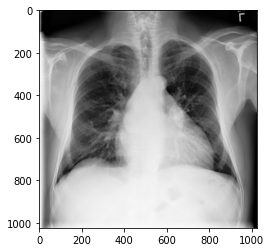

In [155]:
# verifikasi
d_nih_relabelled_path_pa = NIH_Dataset_path(imgpath="/raid/COVID19/nih-dataset/images", csvpath= "/workspace/update/torchxrayvision/torchxrayvision/nih_train_relabeled_standard-format.csv", views=["PA"])

print(len(d_nih_relabelled_path_pa))

data = d_nih_relabelled_path_pa[0]
data_image = data["img"]
data_label = data["lab"]
data_index = data["idx"]
data_path = data["image_path"]

print(data_label, data_index, data_path)


sample = data
plt.imshow(sample["img"][0], cmap="Greys_r");
dict(zip(d_nih_relabelled_path_pa.pathologies,sample["lab"]))